# Name : Maheen Shoukat
# Roll No : 21i-2719
# Section : AI-J
# Proj

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
import os
from os import listdir
from skimage.transform import resize
from skimage import color 
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [3]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw

In [3]:
# sort image names
def sort_in_Stringnums(image_name):
    return list(map(int, re.findall(r'\d+', image_name)))[0]

In [4]:
path = r"C:\Users\DELL\Documents\Semester III\Prog for AI\Proj\images"
img_nm=[]

# getting names of images only to sort 
img_nm = os.listdir(path)
len(img_nm)
# calling function
img_nm.sort(key = sort_in_Stringnums)
img_nm

['image_1.jpg',
 'image_2.jpeg',
 'image_3.JPG',
 'image_4.png',
 'image_5.png',
 'image_6.jpg',
 'image_7.png',
 'image_8.jpg',
 'image_9.jpg',
 'image_10.png',
 'image_11.jpg',
 'image_12.jpg',
 'image_13.png',
 'image_14.png',
 'image_15.jpg',
 'image_16.png',
 'image_17.jpg',
 'image_18.jpg',
 'image_19.png',
 'image_20.png',
 'image_21.jpg',
 'image_22.jpg',
 'image_23.jpeg',
 'image_24.jpg',
 'image_25.jpg',
 'image_26.jpeg',
 'image_27.jpeg',
 'image_28.jpg',
 'image_29.jpg',
 'image_30.jpg',
 'image_31.jpg',
 'image_32.jpg',
 'image_33.jpg',
 'image_34.jpg',
 'image_35.png',
 'image_36.jpg',
 'image_37.png',
 'image_38.jpg',
 'image_39.png',
 'image_40.jpg',
 'image_41.PNG',
 'image_42.jpg',
 'image_43.jpeg',
 'image_44.jpg',
 'image_45.jpeg',
 'image_46.jpg',
 'image_47.jpg',
 'image_48.jpg',
 'image_49.png',
 'image_50.jpg',
 'image_51.jpg',
 'image_52.jpg',
 'image_53.jpg',
 'image_54.jpg',
 'image_55.jpg',
 'image_56.jpg',
 'image_57.jpg',
 'image_58.jpg',
 'image_59.jpg',


In [6]:
resized_img=[]
images_data_dict={}

for image in img_nm:  
    resized_img=resize(imread(path+'\\'+image, as_gray=True), (256,128))
    images_data_dict[image]=resized_img
#     print(image)
#     imshow(resized_img)  
print(len(images_data_dict))

C:\Users\DELL\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


6992


In [7]:
import pickle
# read
with open('imagez_picklez_lumber2.pickle', 'wb') as handle:
    pickle.dump(images_data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
import pickle
# load
with open('imagez_picklez_lumber2.pickle', 'rb') as handle:
    imagez = pickle.load(handle)

In [4]:
#open
import pickle
# dict :  name and image
images_data_open = open('imagez_picklez_lumber2.pickle', 'rb')
pickle_image_dict = pickle.load(images_data_open)
# plt.imshow(pickle_image_dict['image_875.png'])

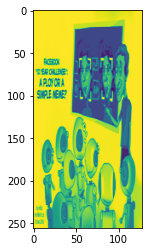

In [5]:
plt.imshow(pickle_image_dict['image_10.png'])

In [80]:
# #Label encoder
# from sklearn.preprocessing import LabelEncoder

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# # le = preprocessing.LabelEncoder()
# store_y=le.fit_transform(text['overall_sentiment'])
# store_y

array([4, 4, 2, ..., 2, 4, 2])

In [11]:
#Label encoder

sents=text['overall_sentiment']
sents={}
sents["very_positive"]=1
sents["positive"]=1
sents["very_negative"]=-1
sents["negative"]=-1
sents["neutral"]=0

text['bin_sents']=text['overall_sentiment'].map(sents)

In [12]:
text

,image_name,text_ocr,text_corrected,overall_sentiment,bin_sents
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,1
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,1
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,0
...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral,0
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral,0
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive,1
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive,1


In [13]:
store_y=text['bin_sents']

In [14]:
store_y

0       1
1       1
2       1
3       1
4       0
       ..
6987    0
6988    0
6989    1
6990    1
6991    1
Name: bin_sents, Length: 6992, dtype: int64

In [47]:
# image feature extraction #01
from skimage import filters
sobel_features={}
for i in pickle_image_dict.keys():
    edge_sobel = filters.sobel(pickle_image_dict[i])
    sobel_features[i]=(edge_sobel.flatten())    
len(sobel_features)

6992

In [48]:
image_df=pd.DataFrame(sobel_features).T

In [49]:
# image_df=image_df.join(store_y)
image_df['Sentiment']=list(store_y)
image_df

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,Sentiment
image_1.jpg,2.027168e-03,1.130627e-03,3.009383e-04,1.770008e-04,0.002753,0.004565,0.007172,0.007048,0.005166,0.007847,...,3.303383e-03,4.827195e-03,4.339222e-03,2.630109e-03,2.187632e-03,2.428472e-03,6.341331e-03,6.162404e-03,4.651514e-03,1
image_2.jpeg,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,0.000004,0.001224,0.006051,0.009268,0.012844,0.015083,...,2.492002e-03,2.492002e-03,2.491948e-03,2.444499e-03,2.527034e-03,1.990368e-03,3.126538e-04,6.211124e-07,3.925231e-17,1
image_3.JPG,2.438884e-02,3.425788e-03,1.883261e-02,4.557240e-03,0.006804,0.005136,0.002489,0.005191,0.002564,0.028656,...,6.833935e-02,2.183681e-02,2.403847e-02,4.733441e-03,2.461736e-05,2.885714e-08,1.962616e-17,9.813078e-18,4.163336e-17,1
image_4.png,3.870852e-03,1.033956e-03,1.005505e-02,8.980334e-03,0.005779,0.006474,0.005586,0.003813,0.015186,0.006507,...,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,1
image_5.png,1.802675e-03,1.842712e-03,6.297739e-04,2.299343e-03,0.001190,0.004238,0.005180,0.005086,0.003233,0.001447,...,7.850462e-17,4.388542e-17,1.177569e-16,1.177569e-16,1.177569e-16,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6988.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
image_6989.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
image_6990.png,2.805145e-03,3.570912e-03,4.156698e-03,5.546493e-03,0.006441,0.007361,0.007541,0.007514,0.007271,0.006756,...,8.092071e-17,4.388542e-17,1.177569e-16,1.177569e-16,3.925231e-17,8.326673e-17,1.144392e-16,9.813078e-17,9.813078e-17,1
image_6991.jpg,1.400821e-02,2.133398e-02,1.494507e-02,1.452769e-02,0.013562,0.012911,0.011658,0.009116,0.008977,0.008909,...,9.780378e-03,1.162278e-02,8.322474e-03,1.150586e-02,1.684472e-02,1.298342e-02,9.034637e-03,9.312261e-03,6.455374e-03,1


In [50]:
# rotation 1 -> increase dataset for negs by making new imgs/ enlarge data
# ulte pultay images ki dict
aug_1_dict={}
for rot in pickle_image_dict.keys():
    rot1 = iaa.Affine(rotate=(-50,20))
    input_rot1 = rot1.augment_image(pickle_image_dict[rot])
    images_list=[pickle_image_dict[rot], input_rot1]
    ed_sobelll = filters.sobel(input_rot1)
    aug_1_dict[rot]=ed_sobelll.flatten()
aug_1_dict

{'image_1.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_2.jpeg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_3.JPG': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_4.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_5.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_6.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_7.png': array([0.34702912, 0.35604136, 0.36505364, ..., 0.44750011, 0.43645243,
        0.42540479]),
 'image_8.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_9.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_10.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_11.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_12.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_13.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_14.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_15.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_16.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_17.jpg': array([0.        , 0.        , 0.56105928, ..., 0.14457

In [51]:
len(aug_1_dict)

6992

In [52]:
sobel_rot_1=pd.DataFrame(aug_1_dict).T
sobel_rot_1["Sentiment"]=list(store_y)
sobel_rot_1

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,Sentiment
image_1.jpg,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
image_2.jpeg,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
image_3.JPG,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.124997,0.504160,0.514243,...,0.390792,0.118082,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
image_4.png,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.021888,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
image_5.png,0.0,0.0,0.0,0.0,0.007737,0.227337,0.670031,0.542689,0.072912,0.102210,...,0.087346,0.548547,0.677574,0.229905,0.007812,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6988.jpg,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
image_6989.jpg,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0
image_6990.png,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
image_6991.jpg,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1


In [53]:
# rotation 2 -> increase dataset for negs by making new imgs/ enlarge data
# ulte pultay images ki dict
aug_2_dict={}
for rot in pickle_image_dict.keys():
    rot2 = iaa.Affine(rotate=(50,20))
    input_rot2 = rot2.augment_image(pickle_image_dict[rot])
    images_list=[pickle_image_dict[rot], input_rot2]
    ed_sobelll = filters.sobel(input_rot2)
    aug_2_dict[rot]=ed_sobelll.flatten()
aug_2_dict

{'image_1.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_2.jpeg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_3.JPG': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_4.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_5.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_6.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_7.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_8.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_9.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_10.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_11.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_12.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_13.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_14.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_15.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_16.png': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_17.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_18.jpg': array([0., 0., 0., ..., 0., 0., 0.]),
 'image_19.png': a

In [54]:
len(aug_2_dict)

6992

In [55]:
sobel_rot_2=pd.DataFrame(aug_2_dict).T
sobel_rot_2["Sentiment"]=list(store_y)
sobel_rot_2

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,Sentiment
image_1.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_2.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_3.JPG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_4.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_5.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6988.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
image_6989.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
image_6990.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_6991.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [26]:
# maxi=[]
# for i in aug_1_dict.values():
#     maxi.append(len(i))
# max(maxi)

In [23]:
# for i in aug_1_dict.keys():
#     aug_1_dict[i]= np.pad(aug_1_dict[i],(0,131072-len(aug_1_dict[i])),'constant')
# aug_1_dict

In [27]:
# aug_df= pd.DataFrame(aug_1_dict)
# aug_df.T

In [15]:
# aug_df=aug_df.T

In [16]:
# aug_df["Sentiments"]=list(text['sentiment_bin'])

In [28]:
# aug_df

In [56]:
# extract neg sentiments
# neg rots
df_nrot_neg= sobel_rot_1[(sobel_rot_1["Sentiment"]==-1)]
# df_nrot_v_neg= sobel_rot_1[(sobel_rot_1["Sentiment"]==3)]

In [57]:
df_nrot_neg

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,Sentiment
image_6.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-1
image_7.png,0.347029,0.356041,0.365054,0.378653,0.396674,0.410115,0.419128,4.327171e-01,4.461654e-01,4.551780e-01,...,0.546931,0.530445,0.508353,0.491691,0.480643,0.464170,0.4475,0.436452,0.425405,-1
image_11.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-1
image_15.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-1
image_50.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6961.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-1
image_6962.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,-1
image_6966.png,0.510510,0.510451,0.000223,0.000146,0.000416,0.000301,0.000446,5.958472e-04,6.775819e-04,1.512155e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.524835,0.525067,-1
image_6972.jpg,0.000000,0.000000,0.007782,0.239727,0.683609,0.525549,0.069603,2.775558e-17,3.925231e-17,1.962616e-17,...,0.152544,0.110869,0.034857,0.450097,0.620951,0.217554,0.0000,0.000000,0.000000,-1


In [58]:
# extract neg sentiments
# positive rots
df_prot_neg= sobel_rot_2[(sobel_rot_2["Sentiment"]==1)]
# df_prot_v_neg=sobel_rot_2[(sobel_rot_2["Sentiment"]==3)]

In [59]:
df_prot_neg

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,Sentiment
image_1.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_2.jpeg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_3.JPG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_4.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_9.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6985.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_6987.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_6990.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
image_6991.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [60]:
# big df, more data
temp_dfs_list= [image_df,df_nrot_neg, df_prot_neg]
big_data= pd.concat(temp_dfs_list)

In [61]:
big_data

,0,1,2,3,4,5,6,7,8,9,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,Sentiment
image_1.jpg,2.027168e-03,1.130627e-03,3.009383e-04,1.770008e-04,0.002753,0.004565,0.007172,0.007048,0.005166,0.007847,...,3.303383e-03,4.827195e-03,4.339222e-03,2.630109e-03,2.187632e-03,2.428472e-03,6.341331e-03,6.162404e-03,4.651514e-03,1
image_2.jpeg,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,0.000004,0.001224,0.006051,0.009268,0.012844,0.015083,...,2.492002e-03,2.492002e-03,2.491948e-03,2.444499e-03,2.527034e-03,1.990368e-03,3.126538e-04,6.211124e-07,3.925231e-17,1
image_3.JPG,2.438884e-02,3.425788e-03,1.883261e-02,4.557240e-03,0.006804,0.005136,0.002489,0.005191,0.002564,0.028656,...,6.833935e-02,2.183681e-02,2.403847e-02,4.733441e-03,2.461736e-05,2.885714e-08,1.962616e-17,9.813078e-18,4.163336e-17,1
image_4.png,3.870852e-03,1.033956e-03,1.005505e-02,8.980334e-03,0.005779,0.006474,0.005586,0.003813,0.015186,0.006507,...,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,1
image_5.png,1.802675e-03,1.842712e-03,6.297739e-04,2.299343e-03,0.001190,0.004238,0.005180,0.005086,0.003233,0.001447,...,7.850462e-17,4.388542e-17,1.177569e-16,1.177569e-16,1.177569e-16,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6985.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
image_6987.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
image_6990.png,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
image_6991.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1


In [62]:
yyyy=big_data['Sentiment']

In [63]:
yyyy

image_1.jpg       1
image_2.jpeg      1
image_3.JPG       1
image_4.png       1
image_5.png       0
                 ..
image_6985.jpg    1
image_6987.jpg    1
image_6990.png    1
image_6991.jpg    1
image_6992.jpg    1
Name: Sentiment, Length: 11783, dtype: int64

In [64]:
xxxx=big_data.drop(['Sentiment'],axis=1)
# store_y=big_data['Sentiment']

In [65]:
xxxx

,0,1,2,3,4,5,6,7,8,9,...,32758,32759,32760,32761,32762,32763,32764,32765,32766,32767
image_1.jpg,2.027168e-03,1.130627e-03,3.009383e-04,1.770008e-04,0.002753,0.004565,0.007172,0.007048,0.005166,0.007847,...,3.876809e-03,3.303383e-03,4.827195e-03,4.339222e-03,2.630109e-03,2.187632e-03,2.428472e-03,6.341331e-03,6.162404e-03,4.651514e-03
image_2.jpeg,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,0.000004,0.001224,0.006051,0.009268,0.012844,0.015083,...,2.492002e-03,2.492002e-03,2.492002e-03,2.491948e-03,2.444499e-03,2.527034e-03,1.990368e-03,3.126538e-04,6.211124e-07,3.925231e-17
image_3.JPG,2.438884e-02,3.425788e-03,1.883261e-02,4.557240e-03,0.006804,0.005136,0.002489,0.005191,0.002564,0.028656,...,3.553191e-01,6.833935e-02,2.183681e-02,2.403847e-02,4.733441e-03,2.461736e-05,2.885714e-08,1.962616e-17,9.813078e-18,4.163336e-17
image_4.png,3.870852e-03,1.033956e-03,1.005505e-02,8.980334e-03,0.005779,0.006474,0.005586,0.003813,0.015186,0.006507,...,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17
image_5.png,1.802675e-03,1.842712e-03,6.297739e-04,2.299343e-03,0.001190,0.004238,0.005180,0.005086,0.003233,0.001447,...,8.326673e-17,7.850462e-17,4.388542e-17,1.177569e-16,1.177569e-16,1.177569e-16,3.925231e-17,3.925231e-17,3.925231e-17,3.925231e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image_6985.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
image_6987.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
image_6990.png,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
image_6991.jpg,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [66]:
len(xxxx)

11783

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xxxx, yyyy, test_size=0.3, random_state= 20) # 70% training and 30% test

In [68]:
from sklearn.neighbors import KNeighborsClassifier

K_model = KNeighborsClassifier(n_neighbors=3,algorithm='brute',weights='distance')
K_model.fit(X_train,y_train)
y_pred=K_model.predict(X_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  48.021837741533666
Accuracy:  67.58132956152758
Precision Score:  54.528045765958325
Confusion Metrix: 
 [[ 108   66  196]
 [  25  147  496]
 [  46  317 2134]]
              precision    recall  f1-score   support

          -1       0.60      0.29      0.39       370
           0       0.28      0.22      0.25       668
           1       0.76      0.85      0.80      2497

    accuracy                           0.68      3535
   macro avg       0.55      0.46      0.48      3535
weighted avg       0.65      0.68      0.65      3535



In [70]:
# from sklearn.linear_model import LogisticRegression

# cl = LogisticRegression(C=20.0, max_iter=3000)
# cl.fit(X_train, y_train)
# pred2=cl.predict(X_test)

# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
# print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
# print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

F1 Score:  48.021837741533666
Accuracy:  67.58132956152758
Precision Score:  54.528045765958325
Confusion Metrix: 
 [[ 108   66  196]
 [  25  147  496]
 [  46  317 2134]]
              precision    recall  f1-score   support

          -1       0.60      0.29      0.39       370
           0       0.28      0.22      0.25       668
           1       0.76      0.85      0.80      2497

    accuracy                           0.68      3535
   macro avg       0.55      0.46      0.48      3535
weighted avg       0.65      0.68      0.65      3535



In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division= 'warn' )) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  50.121001768318116
Accuracy:  74.65346534653466
Precision Score:  68.23355345645231
Confusion Metrix: 
 [[ 160    7  203]
 [   1   21  646]
 [   3   36 2458]]
              precision    recall  f1-score   support

          -1       0.98      0.43      0.60       370
           0       0.33      0.03      0.06       668
           1       0.74      0.98      0.85      2497

    accuracy                           0.75      3535
   macro avg       0.68      0.48      0.50      3535
weighted avg       0.69      0.75      0.67      3535



In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  48.51161981447073
Accuracy:  58.61386138613861
Precision Score:  48.26949616257998
Confusion Metrix: 
 [[ 183  117   70]
 [ 179  325  164]
 [ 304  629 1564]]
              precision    recall  f1-score   support

          -1       0.27      0.49      0.35       370
           0       0.30      0.49      0.37       668
           1       0.87      0.63      0.73      2497

    accuracy                           0.59      3535
   macro avg       0.48      0.54      0.49      3535
weighted avg       0.70      0.59      0.62      3535



In [75]:
# voting 
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('KNeighborsClassifier', KNeighborsClassifier()), ('RandomForestClassifier', RandomForestClassifier()), ('GaussianNB', GaussianNB())], voting='hard', flatten_transform=True)
eclf1 = eclf1.fit(X_train,y_train)
y_pred = eclf1.predict(X_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division='warn')) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  49.097795436387386
Accuracy:  68.82602545968882
Precision Score:  51.3017667218195
Confusion Metrix: 
 [[ 160   36  174]
 [  57  106  505]
 [ 117  213 2167]]
              precision    recall  f1-score   support

          -1       0.48      0.43      0.45       370
           0       0.30      0.16      0.21       668
           1       0.76      0.87      0.81      2497

    accuracy                           0.69      3535
   macro avg       0.51      0.49      0.49      3535
weighted avg       0.64      0.69      0.66      3535



In [ ]:
# <-----------------text wala part-------------------------->

In [5]:
# working with text
text=pd.read_csv(r'C:\Users\DELL\labels.csv',index_col=0)
text.dropna(axis=1, how="all", inplace=True)
text

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


In [6]:
texxtt=[]
# print(text['text_corrected'])
text_list=text['text_corrected']
text_list

0       LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1       The best of #10 YearChallenge! Completed in le...
2       Sam Thorne @Strippin ( Follow Follow Saw every...
3                   10 Year Challenge - Sweet Dee Edition
4       10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                              ...                        
6987    Tuesday is Mardi Gras Wednesday is Valentine's...
6988    MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...
6989    LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...
6990    When I have time is a fantasy. no one has time...
6991    The starting point for every good idea is "Wha...
Name: text_corrected, Length: 6992, dtype: object

In [7]:
text_list= text['text_corrected'].values.tolist()
text_corrected=[]
for i in range(len(text_list)):
    check_list = word_tokenize(str(text_list[i]))
    #Removing Punctuations
    clean_1=[]
    for pun in check_list:
        if pun not in string.punctuation and pun != '’':
            clean_1.append(pun)
    print(clean_1)

    #Removing StopWords
    stop =set(stopwords.words('english'))
    clean_2=[]
    clean_2 = [w for w in clean_1 if not w.lower() in stop]
    clean_2=[w.lower() for w in clean_2 ]
    print(clean_2)

    #Removing all digits
    clean_3=[re.sub('[0-9]', '',m ) for m in clean_2]
    print(clean_3)

    # Remove everything except English words
    word=words.words()
    clean_4=[]
    clean_4=[w for w in clean_3 if w in word ]
    print(clean_4)  
    text_corrected.append(" ".join(clean_4)   )
text_corrected

['LOOK', 'THERE', 'MY', 'FRIEND', 'LIGHTYEAR', 'NOW', 'ALL', 'SOHALIKUT', 'TREND', 'PLAY', 'THE', '10', 'YEARS', 'CHALLENGE', 'AT', 'FACEBOOK', 'imgflip.com']
['look', 'friend', 'lightyear', 'sohalikut', 'trend', 'play', '10', 'years', 'challenge', 'facebook', 'imgflip.com']
['look', 'friend', 'lightyear', 'sohalikut', 'trend', 'play', '', 'years', 'challenge', 'facebook', 'imgflip.com']
['look', 'friend', 'trend', 'play', 'challenge']
['The', 'best', 'of', '10', 'YearChallenge', 'Completed', 'in', 'less', 'the', '4', 'years', 'Kudus', 'to', 'narendramodi', 'ji', '8:05', 'PM', '16', 'Jan', '2019', 'from', 'Mumbai', 'India']
['best', '10', 'yearchallenge', 'completed', 'less', '4', 'years', 'kudus', 'narendramodi', 'ji', '8:05', 'pm', '16', 'jan', '2019', 'mumbai', 'india']
['best', '', 'yearchallenge', 'completed', 'less', '', 'years', 'kudus', 'narendramodi', 'ji', ':', 'pm', '', 'jan', '', 'mumbai', 'india']
['best', 'less']
['Sam', 'Thorne', 'Strippin', 'Follow', 'Follow', 'Saw', 'e

['infinity', 'war', 'silence']
['REMEMBER', 'THIS', 'KID', 'THIS', 'IS', 'HIM', 'NOW', 'FEEL', 'OLD', 'YET']
['remember', 'kid', 'feel', 'old', 'yet']
['remember', 'kid', 'feel', 'old', 'yet']
['remember', 'feel', 'old', 'yet']
['WE', 'HAVE', 'A', 'HULK', 'WE', 'HAVE', 'THE', 'RIGHTS', 'TO', 'ALL', 'OUR', 'CHARACTERS']
['hulk', 'rights', 'characters']
['hulk', 'rights', 'characters']
['hulk']
['IS', 'THERE', 'AN', 'ALL-FEMALE', 'AVENGERS', 'MOVIE', 'IN', 'THE', 'WORKS', 'A', 'FORCE', 'Sounds', 'great', 'But', 'who', 'would', 'they', 'fight', 'Each', 'other', 'probably']
['all-female', 'avengers', 'movie', 'works', 'force', 'sounds', 'great', 'would', 'fight', 'probably']
['all-female', 'avengers', 'movie', 'works', 'force', 'sounds', 'great', 'would', 'fight', 'probably']
['movie', 'works', 'force', 'great', 'would', 'fight', 'probably']
['I', 'have', 'an', 'army', 'We', 'have', 'a', 'Hulk', 'I', "'ve", 'got', 'ta', 'jar', 'of', 'dirt', 'more', 'awesome', 'pictures', 'at', 'THEMETAPICT

['think', 'keep', 'party', 'low-key', 'guess', "'m", 'gon', 'na', 'thor', 'mornin', 'seems', 'differences', 'pretty', 'stark_', 'roger']
['think', 'keep', 'party', 'low-key', 'guess', "'m", 'gon', 'na', 'thor', 'mornin', 'seems', 'differences', 'pretty', 'stark_', 'roger']
['think', 'keep', 'party', 'guess', 'gon', 'na', 'pretty', 'roger']
['Captain', 'America', 'I', 'had', 'a', 'date', 'I', 'volunteer']
['captain', 'america', 'date', 'volunteer']
['captain', 'america', 'date', 'volunteer']
['captain', 'date', 'volunteer']
['HYPOCRICY', 'KI', 'B', 'KOI', 'SIMA', 'HOTI', 'HAI', 'BHALOBHNO', 'imgflip.com', 'Avengers', 'Thor']
['hypocricy', 'ki', 'b', 'koi', 'sima', 'hoti', 'hai', 'bhalobhno', 'imgflip.com', 'avengers', 'thor']
['hypocricy', 'ki', 'b', 'koi', 'sima', 'hoti', 'hai', 'bhalobhno', 'imgflip.com', 'avengers', 'thor']
['b', 'koi', 'sima', 'hoti']
['I', 'think', 'I', 'did', 'okay', 'EXPLOSION']
['think', 'okay', 'explosion']
['think', 'okay', 'explosion']
['think', 'explosion']


['happy', 'birthday', 'turns', 'today']
['ENTER', 'THE', 'Ass', 'HELP', 'I', "'VE", 'FALLEN', 'AND', 'I', 'CA', "N'T", 'BE', 'AVENGED']
['enter', 'ass', 'help', "'ve", 'fallen', 'ca', "n't", 'avenged']
['enter', 'ass', 'help', "'ve", 'fallen', 'ca', "n't", 'avenged']
['enter', 'ass', 'help', 'fallen', 'ca']
['David', '4', 'itsdxvid', 'The', 'real', 'reason', 'Marvel', 'moved', 'the', 'Infinity', 'War', 'date', 'forward', 'was', 'so', 'these', '3', 'had', 'less', 'time', 'to', 'give', 'out', 'spoilers', 'I', 'UNDERSTOOD', 'THAT', 'REFERENCE']
['david', '4', 'itsdxvid', 'real', 'reason', 'marvel', 'moved', 'infinity', 'war', 'date', 'forward', '3', 'less', 'time', 'give', 'spoilers', 'understood', 'reference']
['david', '', 'itsdxvid', 'real', 'reason', 'marvel', 'moved', 'infinity', 'war', 'date', 'forward', '', 'less', 'time', 'give', 'spoilers', 'understood', 'reference']
['real', 'reason', 'marvel', 'infinity', 'war', 'date', 'forward', 'less', 'time', 'give', 'understood', 'referenc

['baby', 'godfather', 'meme', 'eat', 'dick', 'quickmeme.com']
['baby', 'godfather', 'meme', 'eat', 'dick', 'quickmeme.com']
['baby', 'godfather', 'eat', 'dick']
['THE', 'GIRL', 'THAT', 'STOLE', 'MY', 'JUICE', 'BOX']
['girl', 'stole', 'juice', 'box']
['girl', 'stole', 'juice', 'box']
['girl', 'stole', 'juice', 'box']
['SON', 'OF', 'A', 'BITCH', 'TOLD', 'MEIT', "'S", 'NAP', 'TIME']
['son', 'bitch', 'told', 'meit', "'s", 'nap', 'time']
['son', 'bitch', 'told', 'meit', "'s", 'nap', 'time']
['son', 'bitch', 'told', 'nap', 'time']
['NOSE', 'BLEED', 'JUDGE', 'SLOW', 'PLAY', 'quickmeme.com']
['nose', 'bleed', 'judge', 'slow', 'play', 'quickmeme.com']
['nose', 'bleed', 'judge', 'slow', 'play', 'quickmeme.com']
['nose', 'bleed', 'judge', 'slow', 'play']
['WOMEN', 'GET', 'OVER', 'HERE', 'THIS', 'INSTANT', 'HMM', 'NOT', 'BAD']
['women', 'get', 'instant', 'hmm', 'bad']
['women', 'get', 'instant', 'hmm', 'bad']
['get', 'instant', 'bad']
['NO', 'NEW', 'BABY', 'GODFATHER', 'MEMES', 'DIES', 'memegenera

['watch', 'trust', 'even', 'teeth', 'bite', 'tongue', 'every']
['watch', 'trust', 'even', 'teeth', 'bite', 'tongue', 'every']
['watch', 'trust', 'even', 'teeth', 'bite', 'tongue', 'every']
['WHAT', 'I', 'ACT', 'LIKE', 'WHEN', 'I', 'SPEAK', 'SPANISH']
['act', 'like', 'speak', 'spanish']
['act', 'like', 'speak', 'spanish']
['act', 'like', 'speak']
['MEXICANS', 'LIKE', 'ME', 'THEY', 'KEPT', 'SAYING', 'I', 'WAS', 'COOL', 'THEY', 'KEPT', 'SAYING', 'I', 'WAS', 'A', 'COOLO', 'imgflip.com']
['mexicans', 'like', 'kept', 'saying', 'cool', 'kept', 'saying', 'coolo', 'imgflip.com']
['mexicans', 'like', 'kept', 'saying', 'cool', 'kept', 'saying', 'coolo', 'imgflip.com']
['like', 'kept', 'saying', 'cool', 'kept', 'saying']
['WHEN', 'YOU', 'ARE', 'TOLD', 'YOU', 'HAVE', 'TO', 'LEARN', 'TO', 'ASK', 'FOR', 'HELP', 'AND', 'YOU', 'DO', '...', 'JUST', 'TO', 'HAVE', 'EVERYONE', 'TELL', 'YOU', 'YOU', 'HAVE', 'TO', 'FIGURE', 'IT', 'OUT', 'ON', 'YOUR', 'OWN', 'imgflip.com']
['told', 'learn', 'ask', 'help', '..

['barney', 'high', 'hanging']
['BREAKING', 'Sources', 'say', 'OKC', 'will', 'sign', 'Barney', 'Stinson', 'to', 'a', '3', 'year', '75', 'Million', 'deal', 'to', 'replace', 'Kevin', 'Durant']
['breaking', 'sources', 'say', 'okc', 'sign', 'barney', 'stinson', '3', 'year', '75', 'million', 'deal', 'replace', 'kevin', 'durant']
['breaking', 'sources', 'say', 'okc', 'sign', 'barney', 'stinson', '', 'year', '', 'million', 'deal', 'replace', 'kevin', 'durant']
['breaking', 'say', 'sign', 'barney', 'year', 'million', 'deal', 'replace', 'durant']
['WITHOUT', 'ME', 'IT', "'S", 'JUST', 'AWESO']
['without', "'s", 'aweso']
['without', "'s", 'aweso']
['without']
['I', 'HAVE', 'ONE', 'RULE', 'NEW', 'IS', 'ALWAYS', 'BETTER', '...', 'ALWAYS', 'quickmeme.com']
['one', 'rule', 'new', 'always', 'better', '...', 'always', 'quickmeme.com']
['one', 'rule', 'new', 'always', 'better', '...', 'always', 'quickmeme.com']
['one', 'rule', 'new', 'always', 'better', 'always']
['AND', 'SUIT', 'UP', 'TONIGHTS', 'GOING'

['university', 'today', 'barney', 'stinson', '||', 'himym', 'give', 'five']
['university', 'today', 'barney', 'stinson', '||', 'himym', 'give', 'five']
['university', 'today', 'barney', 'give', 'five']
['WHAAAAAT', 'When', 'someone', 'says', 'they', 'hate', 'Barney', 'Stinson', 'https', '//t.co/EtA01gLCWb']
['whaaaaat', 'someone', 'says', 'hate', 'barney', 'stinson', 'https', '//t.co/eta01glcwb']
['whaaaaat', 'someone', 'says', 'hate', 'barney', 'stinson', 'https', '//t.co/etaglcwb']
['someone', 'hate', 'barney']
['WHAT', 'I', 'WANT', 'TO', 'KNOW', 'ON', 'HOW', 'I', 'MET', 'YOUR', 'MOTHER', 'Who', 'the', 'mother', 'is', 'What', 'Barney', 'does', 'for', 'a', 'living', 'Do', 'you', 'agree', 'barneystinson', 'barney', 'himym', 'howimetyourmother', 'hot', 'crazy', 'awesome', 'ny', 'life', 'lifeisgood', 'tedmosby', 'marshalleriksen']
['want', 'know', 'met', 'mother', 'mother', 'barney', 'living', 'agree', 'barneystinson', 'barney', 'himym', 'howimetyourmother', 'hot', 'crazy', 'awesome', 'n

['condition', 'extra', 'class']
['I', 'am', 'always', 'ready', 'for', 'FREE', 'FOOD', 'facebook.com/semplere', 'gata', 'CompleteGate']
['always', 'ready', 'free', 'food', 'facebook.com/semplere', 'gata', 'completegate']
['always', 'ready', 'free', 'food', 'facebook.com/semplere', 'gata', 'completegate']
['always', 'ready', 'free', 'food', 'gata']
['OH', 'SHIT', 'THINK', 'MY', 'WUDU', 'BROKE']
['oh', 'shit', 'think', 'wudu', 'broke']
['oh', 'shit', 'think', 'wudu', 'broke']
['oh', 'think', 'wudu', 'broke']
['Whole', 'Year', 'Night', 'Before', 'Exam', 'Sarcasmlol.com', 'During', 'Exam']
['whole', 'year', 'night', 'exam', 'sarcasmlol.com', 'exam']
['whole', 'year', 'night', 'exam', 'sarcasmlol.com', 'exam']
['whole', 'year', 'night', 'exam', 'exam']
['When', 'someone', 'calls', 'your', 'car', 'rice', 'even', 'though', 'it', 'has', 'a', '6.0L', 'V12', 'under', 'the', 'hood']
['someone', 'calls', 'car', 'rice', 'even', 'though', '6.0l', 'v12', 'hood']
['someone', 'calls', 'car', 'rice', 'ev

['bean', 'house', 'battlefield', 'via']
['Mr.bean', 'asking', 'for', 'likes', 'How', 'many', 'it', 'for', 'this', 'legend']
['mr.bean', 'asking', 'likes', 'many', 'legend']
['mr.bean', 'asking', 'likes', 'many', 'legend']
['many', 'legend']
['R.I.P', '1995', '2016', 'BBC', 'NEWS']
['r.i.p', '1995', '2016', 'bbc', 'news']
['r.i.p', '', '', 'bbc', 'news']
['news']
['MR', 'BEANDIDIT', 'BEFORE', 'IT', 'WAS', 'COOL']
['mr', 'beandidit', 'cool']
['mr', 'beandidit', 'cool']
['cool']
['HEY', 'WHAT', 'HAPPENED', 'TO', 'ALL', 'THE', 'MEMES']
['hey', 'happened', 'memes']
['hey', 'happened', 'memes']
['hey']
['FOREVER', 'ALONE', 'BEFORE', 'IT', 'WAS', 'COOL', 'memecenter.com', 'Mamelenler']
['forever', 'alone', 'cool', 'memecenter.com', 'mamelenler']
['forever', 'alone', 'cool', 'memecenter.com', 'mamelenler']
['forever', 'alone', 'cool']
['Where', 'did', 'all', 'your', 'money', 'go', 'Weed', '...']
['money', 'go', 'weed', '...']
['money', 'go', 'weed', '...']
['money', 'go', 'weed']
['That', 'Mom

['false', 'human', 'information', 'search', 'worst', 'singer', 'ever']
['WHAT', 'YOU', 'THINK', 'YOU', 'LOOK', 'LIKE', 'BEHIND', 'THE', 'WHEEL', 'C25', 'ULE', 'wwwHMSFRIDAY.COM', 'WHAT', 'YOU', 'ACTUALLY', 'LOOK', 'LIKE', 'BEHIND', 'THE', 'WHEEL']
['think', 'look', 'like', 'behind', 'wheel', 'c25', 'ule', 'wwwhmsfriday.com', 'actually', 'look', 'like', 'behind', 'wheel']
['think', 'look', 'like', 'behind', 'wheel', 'c', 'ule', 'wwwhmsfriday.com', 'actually', 'look', 'like', 'behind', 'wheel']
['think', 'look', 'like', 'behind', 'wheel', 'c', 'ule', 'actually', 'look', 'like', 'behind', 'wheel']
['Hi', 'prospect', 'name', 'ARE', 'YOU', 'SURE', 'memegenerator.net', 'Best', 'your', 'name']
['hi', 'prospect', 'name', 'sure', 'memegenerator.net', 'best', 'name']
['hi', 'prospect', 'name', 'sure', 'memegenerator.net', 'best', 'name']
['hi', 'prospect', 'name', 'sure', 'best', 'name']
['SHOULD', 'I', 'DRINK', 'TODAY', '...', 'OR', 'DRINK', 'TODAY', 'TOMORROW', '...', 'I', "'M", 'CONFUSED']
['

['dope']
['Me', 'I', 'should', 'keep', 'my', 'identity', 'a', 'secret', 'Me', 'to', 'me', 'but', 'has', 'he', 'heard', 'about', 'the', 'tragedy', 'of', 'Darth', 'Plagueis', 'the', 'Wise']
['keep', 'identity', 'secret', 'heard', 'tragedy', 'darth', 'plagueis', 'wise']
['keep', 'identity', 'secret', 'heard', 'tragedy', 'darth', 'plagueis', 'wise']
['keep', 'identity', 'secret', 'tragedy', 'wise']
['How', 'Not', 'To', 'Go', 'To', 'Bed', 'Angry', 'Diffuse', 'peppermint', 'and', 'wild', 'orange', 'This', 'will', 'help', 'you', 'stay', 'awake', 'so', 'you', 'can', 'plot', 'revenge', 'ESSENTIALOILSTYLE.COM']
['go', 'bed', 'angry', 'diffuse', 'peppermint', 'wild', 'orange', 'help', 'stay', 'awake', 'plot', 'revenge', 'essentialoilstyle.com']
['go', 'bed', 'angry', 'diffuse', 'peppermint', 'wild', 'orange', 'help', 'stay', 'awake', 'plot', 'revenge', 'essentialoilstyle.com']
['go', 'bed', 'angry', 'diffuse', 'peppermint', 'wild', 'orange', 'help', 'stay', 'awake', 'plot', 'revenge']
['Everyone'

['best', 'new', 'hero', 'father', 'beat', 'man', 'death', 'raping', 'five', 'year', 'old', 'daughter']
['OSCARS', '``', 'THE', 'BEST', 'MOVIE', 'OF', '2017', "''", 'from', 'MILTONLAWSON.COM']
['oscars', '``', 'best', 'movie', '2017', "''", 'miltonlawson.com']
['oscars', '``', 'best', 'movie', '', "''", 'miltonlawson.com']
['best', 'movie']
['Largehearted', 'Boy', "'s", 'List', 'of', 'Online', '``', 'Best', 'Books', 'of', '2017', "''", 'Lists']
['largehearted', 'boy', "'s", 'list', 'online', '``', 'best', 'books', '2017', "''", 'lists']
['largehearted', 'boy', "'s", 'list', 'online', '``', 'best', 'books', '', "''", 'lists']
['largehearted', 'boy', 'list', 'best']
['Mike', 'Tyson', 'bought', 'a', 'new', 'computer', 'It', 'has', 'two', 'bytes', 'and', 'no', 'memory']
['mike', 'tyson', 'bought', 'new', 'computer', 'two', 'bytes', 'memory']
['mike', 'tyson', 'bought', 'new', 'computer', 'two', 'bytes', 'memory']
['mike', 'bought', 'new', 'computer', 'two', 'memory']
['WAKE', 'UP', 'AND', '

['need', 'costume', 'face', 'scary', 'enough']
['OKAY']
['okay']
['okay']
[]
['Perspective', 'everything', 'ARHtistic', 'License.com']
['perspective', 'everything', 'arhtistic', 'license.com']
['perspective', 'everything', 'arhtistic', 'license.com']
['perspective', 'everything']
['RIJOKES', '.com', 'SOMETIMES', 'THE', 'WRONG', 'CHOICES', 'BRING', 'US', 'TO', 'THE', 'RIGHT', 'PLACES']
['rijokes', '.com', 'sometimes', 'wrong', 'choices', 'bring', 'us', 'right', 'places']
['rijokes', '.com', 'sometimes', 'wrong', 'choices', 'bring', 'us', 'right', 'places']
['sometimes', 'wrong', 'bring', 'us', 'right']
['TWINFINITE', 'BEST', 'OF', 'E3', '2017', 'gamenformer', 'BEST', 'IN', 'SHOW', '2017', 'NOMINEE', 'IGN', 'BEST', 'OF', 'E3P', '2017', 'NOMINEE', 'Is', 'Llamo', 'con', 'E3', 'CHOICE', '2017', 'GAME', 'AWARD', 'FURMESS', 'VICTORY', 'TWINFINITE', 'BEST', 'OF', 'E3', '2017', 'BEST', 'OF', 'SHOW', 'Thanks', 'for', 'all', 'the', 'support', 'for', 'Sonic', 'Mania', 'and', 'Sonic', 'Forces', 'at

['want', 'job', 'always', 'passionate', 'death']
['MY', 'HUMAN', 'BOUGHT', 'A', 'WHOLE', 'CASE', 'OF', 'MY', 'FAVORITE', 'WET', 'FOOD', 'NOW', 'I', 'CA', "N'T", 'LIKE', 'THAT', 'KIND', 'ANYMORE']
['human', 'bought', 'whole', 'case', 'favorite', 'wet', 'food', 'ca', "n't", 'like', 'kind', 'anymore']
['human', 'bought', 'whole', 'case', 'favorite', 'wet', 'food', 'ca', "n't", 'like', 'kind', 'anymore']
['human', 'bought', 'whole', 'case', 'favorite', 'wet', 'food', 'ca', 'like', 'kind']
['CAPTAIN', 'WE', "'RE", 'HEADING', 'TOWARDS', 'THE', 'LIGHTHOUSE', 'I', 'know', 'Bröther']
['captain', "'re", 'heading', 'towards', 'lighthouse', 'know', 'bröther']
['captain', "'re", 'heading', 'towards', 'lighthouse', 'know', 'bröther']
['captain', 'heading', 'towards', 'lighthouse', 'know']
['Lamps', 'are', 'fucking', 'sick', 'CHANGE', 'MY', 'MIND', 'memes']
['lamps', 'fucking', 'sick', 'change', 'mind', 'memes']
['lamps', 'fucking', 'sick', 'change', 'mind', 'memes']
['sick', 'change', 'mind']
['DOG'

['Joshua', 'JLEWDATRUTH', 'Follow', 'Gets', 'asked', '``', 'how', 'ya', 'doin', "''", 'at', 'work', 'My', 'Brain', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Do', "n't", 'say', 'it', 'Me', '``', 'Living', 'the', 'dream', "''", '12:50', 'PM', '11', 'Nov', '2018']
['joshua', 'jlewdatruth', 'follow', 'gets', 'asked', '``', 'ya', 'doin', "''", 'work', 'brain', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', '``', 'living', 'dream', "''", '12:50', 'pm', '11', 'nov', '2018']
['joshua', 'jlewdatruth', 'follow', 'gets', 'asked', '``', 'ya', 'doin', "''", 'work', 'brain', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", 'say', "n't", '

['bill', 'bill', 'account', 'manager', 'bill', 'great', 'briefs', 'bill', 'client', 'creative', 'need', 'time', 'bill', 'show', 'personal', 'client', 'entertainment', 'bill', 'smart', 'like', 'bill']
['This', 'is', 'Bill', 'Bill', 'is', 'rich', 'Bill', 'is', 'smart', 'Follow', 'your', 'dreams', 'Be', 'like', 'Bill']
['bill', 'bill', 'rich', 'bill', 'smart', 'follow', 'dreams', 'like', 'bill']
['bill', 'bill', 'rich', 'bill', 'smart', 'follow', 'dreams', 'like', 'bill']
['bill', 'bill', 'rich', 'bill', 'smart', 'follow', 'like', 'bill']
['This', 'is', 'Bill', 'Bill', 'likes', 'to', 'play', 'games', 'with', 'his', 'nephew', 'Bill', 'lets', 'him', 'win', 'almost', 'everytime', 'Bill', 'cares', 'Be', 'like', 'Bill', 'Image', 'Be', 'Like', 'Bill', 'Memes']
['bill', 'bill', 'likes', 'play', 'games', 'nephew', 'bill', 'lets', 'win', 'almost', 'everytime', 'bill', 'cares', 'like', 'bill', 'image', 'like', 'bill', 'memes']
['bill', 'bill', 'likes', 'play', 'games', 'nephew', 'bill', 'lets', 'wi

['mary', 'mary', 'get', 'education', 'men', 'mary', 'becomes', 'activist', 'mary', 'like', 'mary']
['THIS', 'IS', 'BILL', 'BILL', 'THINKS', 'HE', 'IS', 'SO', 'SMART', 'BILL', 'ALWAYS', 'TELLS', 'US', 'WHAT', 'TO', 'DO', 'BILL', 'WANTS', 'TO', 'CONTROL', 'YOUR', 'LIFE', 'BE', 'YOURSELF', 'KILL', 'BILL']
['bill', 'bill', 'thinks', 'smart', 'bill', 'always', 'tells', 'us', 'bill', 'wants', 'control', 'life', 'kill', 'bill']
['bill', 'bill', 'thinks', 'smart', 'bill', 'always', 'tells', 'us', 'bill', 'wants', 'control', 'life', 'kill', 'bill']
['bill', 'bill', 'smart', 'bill', 'always', 'us', 'bill', 'control', 'life', 'kill', 'bill']
['This', 'is', 'Bill', 'He', 'claims', 'not', 'to', 'be', 'attention', 'seeking', 'He', 'has', 'a', 'facebook', 'page', 'to', 'post', 'exclusively', 'about', 'him', 'Bill', 'needs', 'to', 'review', 'his', 'ego/id', 'balance', 'Do', "n't", 'be', 'like', 'Bill']
['bill', 'claims', 'attention', 'seeking', 'facebook', 'page', 'post', 'exclusively', 'bill', 'needs

['bill', 'gym', 'bill', 'often', 'goes', 'good', 'shape', 'bill', 'instead', 'continuously', 'posting', 'work', 'hard', 'nobody', 'follow', 'training', 'live', 'bill', 'intelligent', 'like']
['THIS', 'IS', 'BOB-BOB', 'IS', 'SMART', 'BOB', 'SAW', 'A', 'FIRE', 'AND', 'THOUGHT', 'OF', 'VISIBLE', 'LIGHT', 'BOB', 'MAYBE', 'SMART', 'WITH', 'SCIENCE', 'BUT', 'HE', 'HE', 'IS', 'NOT', 'SMART', 'WITH', 'HIS', 'LIFE', 'SKILLS']
['bob-bob', 'smart', 'bob', 'saw', 'fire', 'thought', 'visible', 'light', 'bob', 'maybe', 'smart', 'science', 'smart', 'life', 'skills']
['bob-bob', 'smart', 'bob', 'saw', 'fire', 'thought', 'visible', 'light', 'bob', 'maybe', 'smart', 'science', 'smart', 'life', 'skills']
['smart', 'bob', 'saw', 'fire', 'thought', 'visible', 'light', 'bob', 'maybe', 'smart', 'science', 'smart', 'life']
['This', 'is', 'Bill', 'Bill', 'goes', 'to', 'school', 'Bill', 'is', "n't", 'rude', 'to', 'his', 'teacher', 'because', 'he', 'knows', 'they', 'are', "n't", 'paid', 'much', 'and', 'just', 'w

['bill', 'bill', 'bill', 'always', 'chocolate', 'cause', 'bill', 'smart', 'like', 'bill']
['This', 'is', 'Bill', 'Bill', 'goes', 'on', 'a', 'vacation', 'DUBAI', 'OMG', 'XOXO', 'Bill', 'does', "n't", 'post', 'every', 'single', 'picture', 'he', 'takes', 'at', 'every', 'damn', 'point', 'instead', 'he', 'captures', 'all', 'the', 'moments', 'fir', 'himself', 'Bill', 'is', 'smart', 'Be', 'like', 'bill']
['bill', 'bill', 'goes', 'vacation', 'dubai', 'omg', 'xoxo', 'bill', "n't", 'post', 'every', 'single', 'picture', 'takes', 'every', 'damn', 'point', 'instead', 'captures', 'moments', 'fir', 'bill', 'smart', 'like', 'bill']
['bill', 'bill', 'goes', 'vacation', 'dubai', 'omg', 'xoxo', 'bill', "n't", 'post', 'every', 'single', 'picture', 'takes', 'every', 'damn', 'point', 'instead', 'captures', 'moments', 'fir', 'bill', 'smart', 'like', 'bill']
['bill', 'bill', 'goes', 'vacation', 'bill', 'post', 'every', 'single', 'picture', 'every', 'damn', 'point', 'instead', 'fir', 'bill', 'smart', 'like', '

['forget', 'tuck', 'back', 'mean', 'set', 'back', 'weekend']
['This', 'is', 'Bill', 'When', 'Bill', 'drives', 'on', 'roads', 'he', 'uses', 'his', 'indicators', 'because', 'Bill', 'Wants', 'other', 'drivers', 'to', 'know', 'where', 'the', 'fuck', 'he', 'his', 'going', 'Bill', 'is', 'smart', 'Be', 'like', 'Bill']
['bill', 'bill', 'drives', 'roads', 'uses', 'indicators', 'bill', 'wants', 'drivers', 'know', 'fuck', 'going', 'bill', 'smart', 'like', 'bill']
['bill', 'bill', 'drives', 'roads', 'uses', 'indicators', 'bill', 'wants', 'drivers', 'know', 'fuck', 'going', 'bill', 'smart', 'like', 'bill']
['bill', 'bill', 'bill', 'know', 'going', 'bill', 'smart', 'like', 'bill']
['This', 'is', 'Bill', 'Bill', 'loves', 'music', 'Bill', 'does', "n't", 'compare', 'metal', 'with', 'rock', 'or', 'jazz', 'with', 'soul', 'or', 'RnB', 'with', 'pop', 'Bill', 'just', 'enjoys', 'what', 'he', 'likes', 'the', 'most', 'Bill', 'is', 'smart.Be', 'like', 'Bill']
['bill', 'bill', 'loves', 'music', 'bill', "n't", 'c

['bill', 'bill', 'time', 'everyday', 'bill', 'smart', 'like', 'bill']
['THIS', 'IS', 'BILL', 'BILLIS', 'UPALL', 'NIGHT', 'BILL', 'WATCHES', 'GAME', 'OF', 'THRONES', 'BEFORE', 'EVERYONE', 'ELSE', 'BILL', 'DOESNT', 'SHARE', 'SPOILERS', 'SAVE', 'THE', 'WORLD', 'BELIKE', 'BILL', 'DONT', 'BE', 'LIKE', 'MOUNIR']
['bill', 'billis', 'upall', 'night', 'bill', 'watches', 'game', 'thrones', 'everyone', 'else', 'bill', 'doesnt', 'share', 'spoilers', 'save', 'world', 'belike', 'bill', 'dont', 'like', 'mounir']
['bill', 'billis', 'upall', 'night', 'bill', 'watches', 'game', 'thrones', 'everyone', 'else', 'bill', 'doesnt', 'share', 'spoilers', 'save', 'world', 'belike', 'bill', 'dont', 'like', 'mounir']
['bill', 'night', 'bill', 'game', 'everyone', 'else', 'bill', 'doesnt', 'share', 'save', 'world', 'bill', 'dont', 'like']
['ALL', 'ABOUT', 'THE', 'BENJAMINS', 'YOU', 'SAY']
['benjamins', 'say']
['benjamins', 'say']
['say']
['This', 'is', 'Bill', 'Bill', 'sees', 'something', 'on', 'the', 'internet', 't

['bill', 'bill', 'music', 'everyone', 'hear', 'listening', 'am', 'train', 'bill', 'considerate', 'like', 'bill']
['This', 'is', 'M', 'M', 'does', "n't", 'remove', 'her', 'eyebrows', 'and', 'draw', 'them', 'back', 'on', 'because', 'she', 'does', "n't", 'want', 'to', 'be', 'ridiculous', 'M', 'is', 'smart', 'Be', 'like', 'M']
["n't", 'remove', 'eyebrows', 'draw', 'back', "n't", 'want', 'ridiculous', 'smart', 'like']
["n't", 'remove', 'eyebrows', 'draw', 'back', "n't", 'want', 'ridiculous', 'smart', 'like']
['remove', 'draw', 'back', 'want', 'ridiculous', 'smart', 'like']
['ONE', 'DOES', 'NOT', 'SIMPLY', 'VOTE', 'YOU', 'MUST', 'REGISTER', 'FIRST', 'imgflip.com']
['one', 'simply', 'vote', 'must', 'register', 'first', 'imgflip.com']
['one', 'simply', 'vote', 'must', 'register', 'first', 'imgflip.com']
['one', 'simply', 'vote', 'must', 'register', 'first']
['SHELDON', 'I', 'TOLD', 'YOU', 'YOUR', 'NOT', 'THE', 'ONLY', 'HUMAN', 'HERE', 'WE', 'HAVE', 'BRAIN', 'TOO', 'imgflip.com']
['sheldon', 't

['ca', 'make', 'half', 'sandwich', 'half', 'whole', 'sandwich', 'small', 'sandwich']
['ON', 'A', 'SCALE', 'OF', '1', 'TO', '10', 'HI', 'www.aiveo.site']
['scale', '1', '10', 'hi', 'www.aiveo.site']
['scale', '', '', 'hi', 'www.aiveo.site']
['scale', 'hi']
['You', 'know', 'what', 'they', 'say', 'Revenge', 'is', 'a', 'dish', 'best', 'served', 'nude', '-Sheldon', 'Cooper', 'THE', 'BIG', 'BANG', 'THEORY', 'Thursdays', '8/7c', 'OCBS']
['know', 'say', 'revenge', 'dish', 'best', 'served', 'nude', '-sheldon', 'cooper', 'big', 'bang', 'theory', 'thursdays', '8/7c', 'ocbs']
['know', 'say', 'revenge', 'dish', 'best', 'served', 'nude', '-sheldon', 'cooper', 'big', 'bang', 'theory', 'thursdays', '/c', 'ocbs']
['know', 'say', 'revenge', 'dish', 'best', 'nude', 'cooper', 'big', 'bang', 'theory']
['THE', 'ONLY', 'TWO', 'REASONS', 'TO', 'WATCH', 'THE', 'BIG', 'BANG', 'THEORY']
['two', 'reasons', 'watch', 'big', 'bang', 'theory']
['two', 'reasons', 'watch', 'big', 'bang', 'theory']
['two', 'watch', 'big

['ca', 'talk', 'glasses']
['CLAIMS', 'TO', 'BE', 'NERDY', 'Norton', '3', 'USES', 'NORTON', 'SECURITY', 'We', 'Know', 'Memes']
['claims', 'nerdy', 'norton', '3', 'uses', 'norton', 'security', 'know', 'memes']
['claims', 'nerdy', 'norton', '', 'uses', 'norton', 'security', 'know', 'memes']
['security', 'know']
['Self', 'Proclaimed', 'Nerd', 'NED', 'Learns', 'everything', 'from', '``', 'The', 'Big', 'Bang', 'Theory', "''", 'memes.com']
['self', 'proclaimed', 'nerd', 'ned', 'learns', 'everything', '``', 'big', 'bang', 'theory', "''", 'memes.com']
['self', 'proclaimed', 'nerd', 'ned', 'learns', 'everything', '``', 'big', 'bang', 'theory', "''", 'memes.com']
['self', 'everything', 'big', 'bang', 'theory']
['SHELDON', 'BAZINGA', 'BIG', 'BANG', 'THEORY', 'STUDIO', 'AUDIENCE', 'SHIT', 'NEGRO', 'THATS', 'ALL', 'YOU', 'HAD', 'TO', 'SAY', 'பற', 'பற', 'பற', 'penny', 'பற', 'பற', 'பற', 'penny', 'penny']
['sheldon', 'bazinga', 'big', 'bang', 'theory', 'studio', 'audience', 'shit', 'negro', 'thats', 's

['heart']
['where', 'you', 'buy', 'her', 'gifts', 'and', 'she', 'gives', 'you', 'sex']
['buy', 'gifts', 'gives', 'sex']
['buy', 'gifts', 'gives', 'sex']
['buy', 'sex']
['When', 'you', 'accidentally', 'watch', 'Big', 'Bang', 'Theory', 'and', 'catch', 'yourself', 'laughing', 'Bazinga']
['accidentally', 'watch', 'big', 'bang', 'theory', 'catch', 'laughing', 'bazinga']
['accidentally', 'watch', 'big', 'bang', 'theory', 'catch', 'laughing', 'bazinga']
['accidentally', 'watch', 'big', 'bang', 'theory', 'catch', 'laughing']
['RAPID', 'APPEARANCE', 'AND', 'DISAPPEARANCE', 'OF', 'RED', 'DOT', 'ALIENS']
['rapid', 'appearance', 'disappearance', 'red', 'dot', 'aliens']
['rapid', 'appearance', 'disappearance', 'red', 'dot', 'aliens']
['rapid', 'appearance', 'disappearance', 'red', 'dot']
['SAW', 'GLASS', 'OF', 'WATER', 'PRECARIOUSLY', 'PLACED', 'ON', 'THE', 'EDGE', 'OF', 'THE', 'COUNTER', 'SUCCESSFULLY', 'KNOCKED', 'IT', 'OVER', 'made', 'on', 'imgur']
['saw', 'glass', 'water', 'precariously', 'plac

['objects', 'mirror', 'much', 'much', 'closer', 'appear', 'icanhascheezburger.com', 'c', 'hech1965', '010717']
['objects', 'mirror', 'much', 'much', 'closer', 'appear', 'icanhascheezburger.com', 'c', 'hech', '']
['mirror', 'much', 'much', 'closer', 'appear', 'c', 'hech']
['TWINKLE', 'TWINKLE', 'LITTLE', 'STAR', 'I', 'WANT', 'TO', 'HIT', 'YOU', 'WITH', 'A', 'CAR', 'THROW', 'YOU', 'OFF', 'A', 'TREE', 'SO', 'HIGH', 'HOPE', 'YOU', 'BREAK', 'YOUR', 'NECK', 'AND', 'DIE']
['twinkle', 'twinkle', 'little', 'star', 'want', 'hit', 'car', 'throw', 'tree', 'high', 'hope', 'break', 'neck', 'die']
['twinkle', 'twinkle', 'little', 'star', 'want', 'hit', 'car', 'throw', 'tree', 'high', 'hope', 'break', 'neck', 'die']
['twinkle', 'twinkle', 'little', 'star', 'want', 'hit', 'car', 'throw', 'tree', 'high', 'hope', 'break', 'neck', 'die']
['DONT', 'HATE', 'ME', 'BECAUSE', 'I', "'M", 'PURRFECT', 'HATE', 'ME', 'BECAUSE', 'I', 'GOT', 'WHITE', 'CAT', 'HAIR', 'ALL', 'OVER', 'YOUR', 'FRESHLY', 'DRY', 'CLEANED', 

['comical', 'cat', 'memes', 'entertainment']
['comical', 'cat', 'memes', 'entertainment']
['comical', 'cat', 'entertainment']
['Response', 'to', 'seeing', 'a', 'good', 'cat', 'meme']
['response', 'seeing', 'good', 'cat', 'meme']
['response', 'seeing', 'good', 'cat', 'meme']
['response', 'seeing', 'good', 'cat']
['SOON', 'GINGERS', 'WILL', 'RULE', 'quickmeme.com']
['soon', 'gingers', 'rule', 'quickmeme.com']
['soon', 'gingers', 'rule', 'quickmeme.com']
['soon', 'rule']
['I', 'THOUGHT', 'YOU', 'SAID', 'IT', 'WAS', 'COLD', 'OUT', 'HERE', 'I', 'FEEL', 'FINE', 'therroman.se']
['thought', 'said', 'cold', 'feel', 'fine', 'therroman.se']
['thought', 'said', 'cold', 'feel', 'fine', 'therroman.se']
['thought', 'said', 'cold', 'feel', 'fine']
['FLOWERS', 'AND', 'CANDY', 'HOW', 'ABOUT', 'FIRE', 'AND', 'BRIMSTONE', 'Ecom']
['flowers', 'candy', 'fire', 'brimstone', 'ecom']
['flowers', 'candy', 'fire', 'brimstone', 'ecom']
['candy', 'fire', 'brimstone']
['HUMAN', 'I', 'REQUEST', 'YOUR', 'ASSISTANCE']

['dont', 'mind', 'tra', 'pretty', 'cloud']
['HE', 'STOPPED', 'RUBBING', 'MY', 'BELLY', 'JUST', 'BEFORE', 'I', 'COULD', 'BITE', 'HIM']
['stopped', 'rubbing', 'belly', 'could', 'bite']
['stopped', 'rubbing', 'belly', 'could', 'bite']
['stopped', 'rubbing', 'belly', 'could', 'bite']
['Rare', 'photo', 'of', 'a', 'cat', 'tree', 'in', 'full', 'bloom']
['rare', 'photo', 'cat', 'tree', 'full', 'bloom']
['rare', 'photo', 'cat', 'tree', 'full', 'bloom']
['rare', 'photo', 'cat', 'tree', 'full', 'bloom']
['When', 'your', 'mom', 'told', 'you', 'it', "'s", 'just', 'babyfat', 'and', 'you', "'ll", 'grow', 'out', 'of', 'it', '..', '...', 'but', 'you', "'re", '35', 'years', 'old', 'now']
['mom', 'told', "'s", 'babyfat', "'ll", 'grow', '..', '...', "'re", '35', 'years', 'old']
['mom', 'told', "'s", 'babyfat', "'ll", 'grow', '..', '...', "'re", '', 'years', 'old']
['told', 'grow', 'old']
['MONDAY', 'FRIDAY', 'Let', "'s", 'purrrtend', 'it', "'s", 'Friday', 'cats', 'monday', 'friday', 'gameface', 'catlover'

['rotate', 'angry', 'cat', 'turn', 'happy', 'cat', 'instead', 'make', 'depressed']
['She', 'was', 'awake', 'for', '20', 'minutes', 'but', 'would', "n't", 'move', 'because', 'the', 'kitten', 'was', 'asleep', '...']
['awake', '20', 'minutes', 'would', "n't", 'move', 'kitten', 'asleep', '...']
['awake', '', 'minutes', 'would', "n't", 'move', 'kitten', 'asleep', '...']
['awake', 'would', 'move', 'kitten', 'asleep']
['i', 'is', 'good', 'at', 'ying', 'this', 'is', 'my', 'poker', 'face', 'when', 'i', 'shat', 'everywhere']
['good', 'ying', 'poker', 'face', 'shat', 'everywhere']
['good', 'ying', 'poker', 'face', 'shat', 'everywhere']
['good', 'poker', 'face', 'shat', 'everywhere']
['BIBLICAL', 'BRAVE', 'ASPLORER', 'KITTEHS', 'ON', 'A', 'QUEST', 'TO', 'FIND', 'THE', 'GARDEN', 'OF', 'EATIN']
['biblical', 'brave', 'asplorer', 'kittehs', 'quest', 'find', 'garden', 'eatin']
['biblical', 'brave', 'asplorer', 'kittehs', 'quest', 'find', 'garden', 'eatin']
['brave', 'quest', 'find', 'garden']
['WHY', '

['funny', 'cat', 'come', 'h', 'dare']
['ULTIMATE', 'CAT', 'MEMES']
['ultimate', 'cat', 'memes']
['ultimate', 'cat', 'memes']
['ultimate', 'cat']
['AMOUNT', 'OF', 'SLEEP', 'REQUIRED', 'FIVE', 'MORE', 'MINUTES', 'imgflip.com']
['amount', 'sleep', 'required', 'five', 'minutes', 'imgflip.com']
['amount', 'sleep', 'required', 'five', 'minutes', 'imgflip.com']
['amount', 'sleep', 'five']
['YOU', 'GOT', 'ME', 'RIBBONS', 'OMG', 'OMG']
['got', 'ribbons', 'omg', 'omg']
['got', 'ribbons', 'omg', 'omg']
['got']
['YOU', 'MIGHT', 'WANT', 'TO', 'READ', 'THE', 'SIGN', 'NO', 'LIFEGUARD', 'ON', 'DUTY', 'NO', 'DOGS', 'ON', 'BEACH', 'BEFORE', 'ANYMORE', 'WORDS', 'COME', 'OUT', 'OF', 'YOUR', 'MOUTH', 'imigflip.com']
['might', 'want', 'read', 'sign', 'lifeguard', 'duty', 'dogs', 'beach', 'anymore', 'words', 'come', 'mouth', 'imigflip.com']
['might', 'want', 'read', 'sign', 'lifeguard', 'duty', 'dogs', 'beach', 'anymore', 'words', 'come', 'mouth', 'imigflip.com']
['might', 'want', 'read', 'sign', 'lifeguard'

['0.p', 'hey', "'m", 'eyebrow', 'appointment', 'name', 'habik', '0.p.i', 'friends_hacaps', '9x13', 'chandler', 'bing']
['.p', 'hey', "'m", 'eyebrow', 'appointment', 'name', 'habik', '.p.i', 'friends_hacaps', 'x', 'chandler', 'bing']
['hey', 'eyebrow', 'appointment', 'name', 'x', 'chandler', 'bing']
['What', 'is', 'Chandler', 'Bing', "'s", 'job']
['chandler', 'bing', "'s", 'job']
['chandler', 'bing', "'s", 'job']
['chandler', 'bing', 'job']
['GETTING', 'OUT', 'OF', 'THE', 'FRIENDZONE', 'LIKE', 'A', 'BOSS', '9GAG.COM/GAG/806410']
['getting', 'friendzone', 'like', 'boss', '9gag.com/gag/806410']
['getting', 'friendzone', 'like', 'boss', 'gag.com/gag/']
['getting', 'like', 'boss']
['CHANDLER', 'BING', 'CROSBY', 'Could', 'it', 'BE', 'anymore', 'cold', 'outside']
['chandler', 'bing', 'crosby', 'could', 'anymore', 'cold', 'outside']
['chandler', 'bing', 'crosby', 'could', 'anymore', 'cold', 'outside']
['chandler', 'bing', 'could', 'cold', 'outside']
['YOU', 'IDIOT', 'I', "'M", 'SURE', 'YOU', "

['cry', 'mother', 'yes', 'sad', 'guy', 'stopped', 'drawing', 'deer']
['Ok', 'let', 'me', 'see', 'what', 'you', 'got', 'there', 'CONDOMS', 'You', 'do', "n't", 'know', 'how', 'long', 'we', "'re", 'gon', 'na', 'be', 'stuck', 'in', 'here', 'WE', 'may', 'have', 'to', 'repopulate', 'the', 'Earth', 'And', 'CONDOMS', 'are', 'the', 'way', 'to', 'do', 'that']
['ok', 'let', 'see', 'got', 'condoms', "n't", 'know', 'long', "'re", 'gon', 'na', 'stuck', 'may', 'repopulate', 'earth', 'condoms', 'way']
['ok', 'let', 'see', 'got', 'condoms', "n't", 'know', 'long', "'re", 'gon', 'na', 'stuck', 'may', 'repopulate', 'earth', 'condoms', 'way']
['let', 'see', 'got', 'know', 'long', 'gon', 'na', 'stuck', 'may', 'repopulate', 'earth', 'way']
['If', 'she', 'does', "n't", 'know', 'who', 'Chandler', 'Bing', 'and', 'Joey', 'Tribbianni', 'are', 'she', "'s", 'too', 'young', 'for', 'you', 'bro', 'chandlerbing', 'joeytribbiani']
["n't", 'know', 'chandler', 'bing', 'joey', 'tribbianni', "'s", 'young', 'bro', 'chandlerb

['chuck', 'street', 'look', 'ways']
['Q', 'chuck', 'norris', 'memes', 'TXHEN', 'CHUCK', 'NORRIS', 'WAS', 'BORN', 'HE', 'DROVE', 'HIS', 'MOM', 'HOME', 'FROM', 'THE', 'HOSPITAL', 'imgflip.com', 'Pinterest', '100n', '...', 'imanes', 'about', 'Chuck', 'Norris', 'on', 'MVP']
['q', 'chuck', 'norris', 'memes', 'txhen', 'chuck', 'norris', 'born', 'drove', 'mom', 'home', 'hospital', 'imgflip.com', 'pinterest', '100n', '...', 'imanes', 'chuck', 'norris', 'mvp']
['q', 'chuck', 'norris', 'memes', 'txhen', 'chuck', 'norris', 'born', 'drove', 'mom', 'home', 'hospital', 'imgflip.com', 'pinterest', 'n', '...', 'imanes', 'chuck', 'norris', 'mvp']
['q', 'chuck', 'chuck', 'born', 'drove', 'home', 'hospital', 'n', 'chuck']
['Chuck', 'Norris', 'Was', 'Here', '...', 'Via', 'Jokideo.com', 'And', 'He', 'Chose', 'Scissors']
['chuck', 'norris', '...', 'via', 'jokideo.com', 'chose', 'scissors']
['chuck', 'norris', '...', 'via', 'jokideo.com', 'chose', 'scissors']
['chuck', 'via', 'chose', 'scissors']
['WHY', 'AR

['meteor', 'shower', 'chuck', 'bar', 'soap']
['DEATH', 'ONCE', 'HAD', 'A', 'NEAR-CHUCK', 'NORRIS', 'EXPERIENCE', 'FunnyBeing.com']
['death', 'near-chuck', 'norris', 'experience', 'funnybeing.com']
['death', 'near-chuck', 'norris', 'experience', 'funnybeing.com']
['death', 'experience']
['I', 'THREW', 'A', 'GRENADE', 'AND', 'KILLED', '50', 'PEOPLE']
['threw', 'grenade', 'killed', '50', 'people']
['threw', 'grenade', 'killed', '', 'people']
['threw', 'grenade', 'people']
['CHUCK', 'NORRIS', 'ARRESTED', 'WHEN', 'CHUCK', 'NORRIS', 'UPPERCUT', 'A', 'HORSE', 'Imgflip.com']
['chuck', 'norris', 'arrested', 'chuck', 'norris', 'uppercut', 'horse', 'imgflip.com']
['chuck', 'norris', 'arrested', 'chuck', 'norris', 'uppercut', 'horse', 'imgflip.com']
['chuck', 'chuck', 'uppercut', 'horse']
['Chuck', 'Norris', 'Did', 'Not', 'Join', 'The', 'Air', 'Force', 'The', 'Air', 'Force', 'Joined', 'Chuck', 'Norris', 'fairforcememes']
['chuck', 'norris', 'join', 'air', 'force', 'air', 'force', 'joined', 'chuck'

['hate', 'country', 'music', 'whenever', 'hear', 'hoe', 'think', 'sister', 'shot']
['My', "'First", 'Loyalty', 'is', 'to', 'Family', 'and', 'Country', 'NOT', 'TRUMP', 'PLICE', 'MS', 'imgflip.com']
["'first", 'loyalty', 'family', 'country', 'trump', 'plice', 'ms', 'imgflip.com']
["'first", 'loyalty', 'family', 'country', 'trump', 'plice', 'ms', 'imgflip.com']
['loyalty', 'family', 'country', 'trump']
['Feeding', 'your', 'country', 'Sending', 'a', 'dog', 'to', 'space']
['feeding', 'country', 'sending', 'dog', 'space']
['feeding', 'country', 'sending', 'dog', 'space']
['feeding', 'country', 'sending', 'dog', 'space']
['3000', 'AND', 'STEAK', 'GET', 'ME', 'TO', 'A', 'PHONE']
['3000', 'steak', 'get', 'phone']
['', 'steak', 'get', 'phone']
['steak', 'get', 'phone']
['I', 'SEE', 'MUSIC', 'OPEN', 'THE', 'GATE', 'IT', "'S", 'COUNTRY', 'MUSIC', 'CLOSE', 'THE', 'GATE', 'OPEN', 'THE', 'GATE', 'A', 'LITTLE', 'RON', 'imgflip.com']
['see', 'music', 'open', 'gate', "'s", 'country', 'music', 'close', '

['country', 'live', 'place', 'country', 'live', 'earth']
['ONE', 'DOES', 'NOT', 'SIMPLY', 'TAKE', 'THEIR', 'HORSE', 'TO', 'THE', 'OLD', 'TOWN', 'ROAD', 'WITHOUT', 'RIDING', 'UNTIL', 'YOU', 'CA', "N'T", 'NO', 'MORE', 'made', 'with', 'mematic']
['one', 'simply', 'take', 'horse', 'old', 'town', 'road', 'without', 'riding', 'ca', "n't", 'made', 'mematic']
['one', 'simply', 'take', 'horse', 'old', 'town', 'road', 'without', 'riding', 'ca', "n't", 'made', 'mematic']
['one', 'simply', 'take', 'horse', 'old', 'town', 'road', 'without', 'riding', 'ca', 'made']
['WHEN', 'YOU', 'REALIZE', 'YOU', 'DONT', 'HAVE', 'TO', 'MOVE', 'TO', 'ALABAMA', 'TO', 'DATE', 'YOUR', 'COUSIN', 'BECAUSE', 'FIRST', 'COUSIN', 'MARRIAGE', 'IS', 'LEGAL', 'IN', 'MA']
['realize', 'dont', 'move', 'alabama', 'date', 'cousin', 'first', 'cousin', 'marriage', 'legal']
['realize', 'dont', 'move', 'alabama', 'date', 'cousin', 'first', 'cousin', 'marriage', 'legal']
['realize', 'dont', 'move', 'date', 'cousin', 'first', 'cousin', '

['today', 'mood', 'yeah']
['YOU', 'NEVER', 'COUNT', 'YOUR', 'MONEY', 'WHILE', 'YOU', "'RE", 'SITTING', 'AT', 'THE', 'TABLE', 'COUNTS', 'MONEY', 'WHILE', 'SITTING', 'AT', 'THE', 'TABLE']
['never', 'count', 'money', "'re", 'sitting', 'table', 'counts', 'money', 'sitting', 'table']
['never', 'count', 'money', "'re", 'sitting', 'table', 'counts', 'money', 'sitting', 'table']
['never', 'count', 'money', 'sitting', 'table', 'money', 'sitting', 'table']
['EACH', 'TIME', 'THAT', 'THIS', 'PHOTO', 'IS', 'SHARED', 'facebook.com/hankjrfant', 'SOMEONE', 'DISCOVERS', 'REAL', 'COUNTRY', 'MUSIC', 'Got', 'ta', 'love', 'Hank']
['time', 'photo', 'shared', 'facebook.com/hankjrfant', 'someone', 'discovers', 'real', 'country', 'music', 'got', 'ta', 'love', 'hank']
['time', 'photo', 'shared', 'facebook.com/hankjrfant', 'someone', 'discovers', 'real', 'country', 'music', 'got', 'ta', 'love', 'hank']
['time', 'photo', 'someone', 'real', 'country', 'music', 'got', 'ta', 'love', 'hank']
['This', 'country', 'girl

['country', 'music', 'hold', 'beer']
['NOT', 'BEAR', 'COUNTRY', 'HE', 'SAYS', 'EATS', 'WHOLE', 'FAMILY', 'makeameme.org']
['bear', 'country', 'says', 'eats', 'whole', 'family', 'makeameme.org']
['bear', 'country', 'says', 'eats', 'whole', 'family', 'makeameme.org']
['bear', 'country', 'eats', 'whole', 'family']
['A', 'SUCCESSFUL', 'RELATIONSHIP', 'REQURES', 'FALLING', 'IN', 'LOVE', 'MANY', 'TIMES', 'ALWAYS', 'WITH', 'THE', 'SAME', 'PERSON', '-COUNTRY', 'THANG']
['successful', 'relationship', 'requres', 'falling', 'love', 'many', 'times', 'always', 'person', '-country', 'thang']
['successful', 'relationship', 'requres', 'falling', 'love', 'many', 'times', 'always', 'person', '-country', 'thang']
['successful', 'relationship', 'falling', 'love', 'many', 'times', 'always', 'person']
['When', 'someone', 'you', 'thought', 'you', 'knew', 'puts', 'on', 'country', 'music', 'drgrayfang', 'memes', 'the', 'tribe', 'has', 'spoken']
['someone', 'thought', 'knew', 'puts', 'country', 'music', 'drgray

['ca', "n't", 'fly', '...', '...', "'m", 'deadpool', 'imgflip.com']
['ca', "n't", 'fly', '...', '...', "'m", 'deadpool', 'imgflip.com']
['ca', 'fly']
['MY', 'NAME', 'IS', 'DEADPOOL', 'FB.COM/SUPERHERO-MEMES', 'YOU', 'ATE', 'MY', 'CHIMICHANGA', 'PREPARE', 'TO', 'DIE', 'Hahahaha', 'great-MWB']
['name', 'deadpool', 'fb.com/superhero-memes', 'ate', 'chimichanga', 'prepare', 'die', 'hahahaha', 'great-mwb']
['name', 'deadpool', 'fb.com/superhero-memes', 'ate', 'chimichanga', 'prepare', 'die', 'hahahaha', 'great-mwb']
['name', 'ate', 'prepare', 'die']
['Lets', 'ride', 'My', 'unicorn', 'of', 'hell', 'imgflip.com']
['lets', 'ride', 'unicorn', 'hell', 'imgflip.com']
['lets', 'ride', 'unicorn', 'hell', 'imgflip.com']
['ride', 'unicorn', 'hell']
['FEEL', 'THE', 'LOVE', 'VALENTINE', "'S", 'DAY', 'FEB', '12', 'IMAX']
['feel', 'love', 'valentine', "'s", 'day', 'feb', '12', 'imax']
['feel', 'love', 'valentine', "'s", 'day', 'feb', '', 'imax']
['feel', 'love', 'valentine', 'day']
['SO', 'WHO', "'S", 'T

['happy', 'birthday', 'jackman', 'turns', 'today', 'jackman']
['IF', 'YOU', 'DO', "N'T", 'SEE', 'MY', 'MOVIE', 'BAD', 'THINGS', 'WILL', 'HAPPEN', 'imgflip.com']
["n't", 'see', 'movie', 'bad', 'things', 'happen', 'imgflip.com']
["n't", 'see', 'movie', 'bad', 'things', 'happen', 'imgflip.com']
['see', 'movie', 'bad', 'happen']
['AHHHHHH', '....', 'GUESS', 'WHAT', '....', 'M', 'I', "'M", 'TOUCHING', 'MYSELF', 'TONIGHT', 'made', 'on', 'imgur']
['ahhhhhh', '....', 'guess', '....', "'m", 'touching', 'tonight', 'made', 'imgur']
['ahhhhhh', '....', 'guess', '....', "'m", 'touching', 'tonight', 'made', 'imgur']
['guess', 'touching', 'tonight', 'made']
['IF', 'YOUR', 'GIRLFRIEND', 'ASKS', 'YOU', 'FOR', 'A', 'DEADPOOL', 'MOVIE', 'DATE', 'ON', 'VALENTINE', "'S", 'DAY', 'DO', "N'T", 'THINK', 'TWICE', '..', 'MARRY', 'HER', 'made', 'on', 'Imgur']
['girlfriend', 'asks', 'deadpool', 'movie', 'date', 'valentine', "'s", 'day', "n't", 'think', 'twice', '..', 'marry', 'made', 'imgur']
['girlfriend', 'asks'

['academy', 'never', 'give', 'real', 'question', 'give', 'absolutely']
['WHEN', 'YOU', 'CANT', 'EVEN', 'GET', 'A', 'LEGO', 'OSCAR']
['cant', 'even', 'get', 'lego', 'oscar']
['cant', 'even', 'get', 'lego', 'oscar']
['cant', 'even', 'get']
['OH', 'YOU', 'THOUGHT', 'I', 'WAS', 'LISTENING', 'MAY', 'I', 'OFFER', 'YOU', '``', 'WHITE', 'CAKE', "''", 'imgflip.com']
['oh', 'thought', 'listening', 'may', 'offer', '``', 'white', 'cake', "''", 'imgflip.com']
['oh', 'thought', 'listening', 'may', 'offer', '``', 'white', 'cake', "''", 'imgflip.com']
['oh', 'thought', 'listening', 'may', 'offer', 'white', 'cake']
['DICAPRIO', 'MEME', 'SORRY', 'THE', 'MARKETS', 'BEEN', 'FLOODED', 'imgrip.com']
['dicaprio', 'meme', 'sorry', 'markets', 'flooded', 'imgrip.com']
['dicaprio', 'meme', 'sorry', 'markets', 'flooded', 'imgrip.com']
['sorry', 'flooded']
['CHEERS', 'TO', 'MY', 'HATERS', 'THERE', 'IS', 'SO', 'MUCH', 'MORE', 'TO', 'COME', 'memegenerator.net']
['cheers', 'haters', 'much', 'come', 'memegenerator.net

['think', 'already', 'become', 'irrelevant', 'night', 'make', 'reaction']
['Facta', 'Book', 'Leonardo', 'DiCaprio', 'and', 'Kate', 'Winslet', 'helped', 'pay', 'the', 'nursing', 'home', 'fees', 'for', 'the', 'last', 'Titanic', 'survivor', 'so', 'she', 'would', "n't", 'have', 'to', 'sell', 'anymore', 'Titanic', 'mementos', 'to', 'raise', 'cash']
['facta', 'book', 'leonardo', 'dicaprio', 'kate', 'winslet', 'helped', 'pay', 'nursing', 'home', 'fees', 'last', 'titanic', 'survivor', 'would', "n't", 'sell', 'anymore', 'titanic', 'mementos', 'raise', 'cash']
['facta', 'book', 'leonardo', 'dicaprio', 'kate', 'winslet', 'helped', 'pay', 'nursing', 'home', 'fees', 'last', 'titanic', 'survivor', 'would', "n't", 'sell', 'anymore', 'titanic', 'mementos', 'raise', 'cash']
['book', 'pay', 'nursing', 'home', 'last', 'titanic', 'survivor', 'would', 'sell', 'titanic', 'raise', 'cash']
['How', 'you', 'feel', 'when', 'you', 'arrived', 'at', 'the', 'horse', 'show', 'How', 'you', 'feel', 'when', 'leaving', '

['ever', 'stop', 'smoking', 'weed', 'absolutely']
['mood', 'leonardo', 'dicaprio', 'hiding', 'current', 'mood']
['mood', 'leonardo', 'dicaprio', 'hiding', 'current', 'mood']
['mood', 'leonardo', 'dicaprio', 'hiding', 'current', 'mood']
['mood', 'current', 'mood']
['this', 'is', 'the', 'oscar', 'face', 'it', 'happens', 'only', 'once', 'every', '5000', 'years', 'repost', 'in', 'the', 'next', '20', 'seconds', 'or', 'you', 'will', 'never', 'have', 'oscar', 'again']
['oscar', 'face', 'happens', 'every', '5000', 'years', 'repost', 'next', '20', 'seconds', 'never', 'oscar']
['oscar', 'face', 'happens', 'every', '', 'years', 'repost', 'next', '', 'seconds', 'never', 'oscar']
['face', 'every', 'repost', 'next', 'never']
['Bahram', 'PersianThotz', 'i', 'took', 'these', 'with', 'my', 'iphone', 'x.', 'camera', 'quality', 'so', 'surreal', 'it', "'s", 'like', 'Leonardo', 'Dicaprio', 'painted', 'them', 'MemeCenter.com']
['bahram', 'persianthotz', 'took', 'iphone', 'x.', 'camera', 'quality', 'surreal'

['wish', 'someone', 'would', 'look', 'way']
['Leonardo', 'DiCaprio', 'from', 'the', '90s']
['leonardo', 'dicaprio', '90s']
['leonardo', 'dicaprio', 's']
['s']
['Me', 'throwing', 'away', 'all', 'the', 'Leonardo', 'Dicaprio', 'memes', 'I', 'made', 'in', 'case', 'he', 'lost', 'again', 'HipHopMemesDaily']
['throwing', 'away', 'leonardo', 'dicaprio', 'memes', 'made', 'case', 'lost', 'hiphopmemesdaily']
['throwing', 'away', 'leonardo', 'dicaprio', 'memes', 'made', 'case', 'lost', 'hiphopmemesdaily']
['throwing', 'away', 'made', 'case', 'lost']
['young', 'Leonardo', 'DiCaprio', 'will', 'forever', 'have', 'my', 'heart']
['young', 'leonardo', 'dicaprio', 'forever', 'heart']
['young', 'leonardo', 'dicaprio', 'forever', 'heart']
['young', 'forever', 'heart']
['Tobey', 'Maguire', 'Leonardo', 'DiCaprio', 'take', 'some', 'time', 'out', 'to', 'bowl', 'in', '1989']
['tobey', 'maguire', 'leonardo', 'dicaprio', 'take', 'time', 'bowl', '1989']
['tobey', 'maguire', 'leonardo', 'dicaprio', 'take', 'time', 

['j', 'follow', 'look', 'like', 'keeping', 'whatever', 'expensive', 'thing', 'bought', 'together']
['me', 'this', 'new', 'stock', 'photo', 'from', 'the', 'same', 'shoot', 'the', 'original', 'stock', 'photo', 'used', 'in', 'this', 'meme']
['new', 'stock', 'photo', 'shoot', 'original', 'stock', 'photo', 'used', 'meme']
['new', 'stock', 'photo', 'shoot', 'original', 'stock', 'photo', 'used', 'meme']
['new', 'stock', 'photo', 'shoot', 'original', 'stock', 'photo', 'used']
['Andrew', 'J', 'Abernathy', 'ajabernathy', 'The', 'red', 'flags', 'just', 'piled', 'up', 'and', 'piled', 'up', 'did', "n't", 'they', 'ersteck', 'shuttersto', 'Shutterstock', 'shutterstock', 'IMAGEID', '4540', 'shutterstock', '2:43', 'PM', '20', 'Nov', '2017']
['andrew', 'j', 'abernathy', 'ajabernathy', 'red', 'flags', 'piled', 'piled', "n't", 'ersteck', 'shuttersto', 'shutterstock', 'shutterstock', 'imageid', '4540', 'shutterstock', '2:43', 'pm', '20', 'nov', '2017']
['andrew', 'j', 'abernathy', 'ajabernathy', 'red', 'fl

['new', 'distracted', 'template']
['This', 'is', 'all', 'getting', 'really', 'old', 'all', 'of', 'a', 'sudden']
['getting', 'really', 'old', 'sudden']
['getting', 'really', 'old', 'sudden']
['getting', 'really', 'old', 'sudden']
['This', 'Teen', "'s", 'Sister', 'Took', 'A', 'Photo', 'Of', 'Her', 'And', 'It', 'Looks', 'Just', 'Like', 'The', '``', 'Distracted', 'Boyfriend', "''", 'Meme', 'IRL']
['teen', "'s", 'sister', 'took', 'photo', 'looks', 'like', '``', 'distracted', 'boyfriend', "''", 'meme', 'irl']
['teen', "'s", 'sister', 'took', 'photo', 'looks', 'like', '``', 'distracted', 'boyfriend', "''", 'meme', 'irl']
['teen', 'sister', 'took', 'photo', 'like', 'distracted']
['me', 'a', 'friend', 'who', 'thinks', 'the', 'ghost', 'will', 'drive', 'me', 'insane', 'my', 'dad', "'s", 'ghost', 'AM']
['friend', 'thinks', 'ghost', 'drive', 'insane', 'dad', "'s", 'ghost']
['friend', 'thinks', 'ghost', 'drive', 'insane', 'dad', "'s", 'ghost']
['friend', 'ghost', 'drive', 'insane', 'dad', 'ghost']
[

['business', 'without', 'advertising', 'limit', 'also', 'poorly', 'pay', 'business', 'small', 'ad', 'bring', 'new', 'tun', 'weekly', 'watch', 'expand', 'choose', 'right', 'advertise', 'business']
['CAN', 'I', 'GET', 'A', 'HUG']
['get', 'hug']
['get', 'hug']
['get', 'hug']
['CASH', 'ME', 'OUTSIDE', 'HOW', 'BOUT', 'NO']
['cash', 'outside', 'bout']
['cash', 'outside', 'bout']
['cash', 'outside', 'bout']
['INSIDE', 'EVERY', '``', 'BLESS', 'YOUR', 'HEART', "''", 'IS', 'A', 'TEENY', 'TINY', '``', 'F', 'CK', 'YOU', "''"]
['inside', 'every', '``', 'bless', 'heart', "''", 'teeny', 'tiny', '``', 'f', 'ck', "''"]
['inside', 'every', '``', 'bless', 'heart', "''", 'teeny', 'tiny', '``', 'f', 'ck', "''"]
['inside', 'every', 'bless', 'heart', 'teeny', 'tiny', 'f']
['_deathbattle', 'DR', 'EVIL', 'DARK', 'HELMET', 'Who', 'was', 'the', 'best', 'parody', 'villian', 'drevil', 'or', 'darkhelmet', 'austinpowers', 'spaceballs', 'deathbattle', 'parody', 'villians']
['_deathbattle', 'dr', 'evil', 'dark', 'helm

['times', 'tough', 'even', 'dr', 'evil', 'taking', 'public', 'transit']
['times', 'tough', 'even', 'dr', 'evil', 'taking', 'public', 'transit']
['times', 'tough', 'even', 'evil', 'taking', 'public', 'transit']
['Times', 'are', 'tough', 'even', 'Dr', 'Evil', 'is', 'taking', 'public', 'transit']
['times', 'tough', 'even', 'dr', 'evil', 'taking', 'public', 'transit']
['times', 'tough', 'even', 'dr', 'evil', 'taking', 'public', 'transit']
['times', 'tough', 'even', 'evil', 'taking', 'public', 'transit']
['TRUTH', '”', 'Michael', 'Wolff', 'is', 'Dr', 'Evil', '...']
['truth', '”', 'michael', 'wolff', 'dr', 'evil', '...']
['truth', '”', 'michael', 'wolff', 'dr', 'evil', '...']
['truth', 'evil']
['debatenight', 'When', 'your', 'candidate', 'is', 'dressed', 'as', 'Dr', 'Evil', '–', 'you', 'know', 'you', 'have', 'a', 'problem', '2.', 'tione']
['debatenight', 'candidate', 'dressed', 'dr', 'evil', '–', 'know', 'problem', '2.', 'tione']
['debatenight', 'candidate', 'dressed', 'dr', 'evil', '–', 'kn

[]
['i', "'ve", 'seen', 'some', 'shit', 'but', 'most', 'of', 'the', 'time', 'it', "'s", 'my', 'shit', 'memecenter.com', 'MemeCenter']
["'ve", 'seen', 'shit', 'time', "'s", 'shit', 'memecenter.com', 'memecenter']
["'ve", 'seen', 'shit', 'time', "'s", 'shit', 'memecenter.com', 'memecenter']
['seen', 'time']
['GOT', 'DRUNK', 'LAST', 'NIGHT', 'DID', "N'T", 'EAT', 'ALL', 'THE', 'FOOD', 'IN', 'MY', 'HOUSE']
['got', 'drunk', 'last', 'night', "n't", 'eat', 'food', 'house']
['got', 'drunk', 'last', 'night', "n't", 'eat', 'food', 'house']
['got', 'drunk', 'last', 'night', 'eat', 'food', 'house']
['IDRUNK', 'A', 'BOTTLE', 'AT', 'THE', 'MILK', 'FACTORY', 'CALLED', 'HORMONES', '...', 'WHAT', 'DOES', 'THAT', 'MEAN']
['idrunk', 'bottle', 'milk', 'factory', 'called', 'hormones', '...', 'mean']
['idrunk', 'bottle', 'milk', 'factory', 'called', 'hormones', '...', 'mean']
['bottle', 'milk', 'factory', 'mean']
['IT', "'S", 'OKAY']
["'s", 'okay']
["'s", 'okay']
[]
['THOUGHT', 'I', 'ONLY', 'HAD', 'ONE', 'BE

['cant', 'spell', 'feminism', 'opening', 'mon', 'sal', 'without', 'e', 'n']
['I', 'DO', "N'T", 'ALWAYS', '``', 'ALLY', "''", 'MYSELF', 'WITH', 'OTHERS', 'POLITICALLY', '...', '...', 'BUT', 'WHEN', 'I', 'DO', 'IT', "'S", "'NEVER", 'WITH', 'DOUCHE', 'TELLING', 'ME', 'I', 'NEED', 'TO', '``', 'SHUT', 'UP', 'AND', 'LISTEN', "''"]
["n't", 'always', '``', 'ally', "''", 'others', 'politically', '...', '...', "'s", "'never", 'douche', 'telling', 'need', '``', 'shut', 'listen', "''"]
["n't", 'always', '``', 'ally', "''", 'others', 'politically', '...', '...', "'s", "'never", 'douche', 'telling', 'need', '``', 'shut', 'listen', "''"]
['always', 'ally', 'politically', 'douche', 'telling', 'need', 'shut', 'listen']
['women', 'being', 'abused', 'and', 'killed', 'in', 'iran', 'there', 'is', 'a', 'guy', 'sitting', 'on', 'the', 'bus', 'with', 'his', 'legs', 'two', 'inches', 'apart']
['women', 'abused', 'killed', 'iran', 'guy', 'sitting', 'bus', 'legs', 'two', 'inches', 'apart']
['women', 'abused', 'kil

['list', 'pod', 'es', 'think', 'right']
['LEFT', 'THE', 'KITCHEN', 'TOO', 'MANY', 'TIMES', 'quickmeme.com']
['left', 'kitchen', 'many', 'times', 'quickmeme.com']
['left', 'kitchen', 'many', 'times', 'quickmeme.com']
['left', 'kitchen', 'many', 'times']
['A', 'MAN', 'TOLD', 'ME', 'TO', 'HAVE', 'A', 'GOOD', 'DAY', 'TTRIGGERED']
['man', 'told', 'good', 'day', 'ttriggered']
['man', 'told', 'good', 'day', 'ttriggered']
['man', 'told', 'good', 'day']
['What', 'if', 'I', 'told', 'you', 'you', 'are', "n't", 'a', 'true', 'feminist', 'unless', 'you', "'re", 'intersectional', 'quickmeme.com']
['told', "n't", 'true', 'feminist', 'unless', "'re", 'intersectional', 'quickmeme.com']
['told', "n't", 'true', 'feminist', 'unless', "'re", 'intersectional', 'quickmeme.com']
['told', 'true', 'feminist', 'unless', 'intersectional']
['RAPE', 'CULTURE', 'IT', "'S", 'WHAT', 'EVERY', 'OXYMORONIC', 'FEMINIST', 'IS', 'WEARING', 'THIS', 'YEAR', 'Quickmeme.com']
['rape', 'culture', "'s", 'every', 'oxymoronic', 'fem

['state', 'domestic', 'abuse', 'decriminalized', 'russia', 'feminist', 'memes', 'land', 'jail', 'time', 'fist']
['state', 'domestic', 'abuse', 'decriminalized', 'russia', 'feminist', 'memes', 'land', 'jail', 'time', 'fist']
['state', 'domestic', 'abuse', 'russia', 'feminist', 'land', 'jail', 'time', 'fist']
['I', 'DONT', 'KNOW', 'WHAT', 'IS', 'WRONG', 'ABOUT', 'BEING', 'GERMAN', 'VIA', '9GAG.COM', 'AND', 'AT', 'THIS', 'POINT', 'I', 'AM', 'AFRAID', 'TO', 'ASK']
['dont', 'know', 'wrong', 'german', 'via', '9gag.com', 'point', 'afraid', 'ask']
['dont', 'know', 'wrong', 'german', 'via', 'gag.com', 'point', 'afraid', 'ask']
['dont', 'know', 'wrong', 'german', 'via', 'point', 'afraid', 'ask']
['I', 'AVOID', 'WEARING', 'TIGHT', 'CLOTHES', 'WHEN', 'I', "'M", 'KICKING', 'BUTT', 'AT', 'MY', 'MARTIAL', 'ARTS', 'CLASS', 'f', 'spoiltmodernwaman', 'spoiltwoman']
['avoid', 'wearing', 'tight', 'clothes', "'m", 'kicking', 'butt', 'martial', 'arts', 'class', 'f', 'spoiltmodernwaman', 'spoiltwoman']
['avo

['guy', 'gives', 'compliment', 'asks', 'talk', 'real', 'quick', 'say', '``', 'thank', 'u', "''", 'say', 'ok', 'great', 'day', 'miss']
['guy', 'gives', 'compliment', 'asks', 'talk', 'real', 'quick', 'say', '``', 'thank', 'u', "''", 'say', 'ok', 'great', 'day', 'miss']
['guy', 'compliment', 'talk', 'real', 'quick', 'say', 'thank', 'u', 'say', 'great', 'day', 'miss']
['WHAT', 'ARE', 'FEMINISTS', 'BURNING', 'IN', '2017', 'THE', 'LATEST', 'MILITANT', 'TRENDS', 'MANCHEGO', 'CHEESE', 'TOO', 'MUCH', 'MAN', 'IN', 'IT', 'MANDOLINS', 'TOO', 'MUCH', 'MAN', 'IN', 'THEM', 'THE', 'DOOR', 'THAT', 'GUY', 'HELD', 'OPEN', 'BURN', 'ALL', 'THE', 'DOORS', 'BRAS', 'STILL', 'AT', 'IT', 'BEUK', 'BECKY', 'BARNICOAT']
['feminists', 'burning', '2017', 'latest', 'militant', 'trends', 'manchego', 'cheese', 'much', 'man', 'mandolins', 'much', 'man', 'door', 'guy', 'held', 'open', 'burn', 'doors', 'bras', 'still', 'beuk', 'becky', 'barnicoat']
['feminists', 'burning', '', 'latest', 'militant', 'trends', 'manchego', '

['feminist', 'nazi', 'thinks', 'image', 'hysterical', 'woman', 'unfair', 'stereotype', 'probably', 'get', 'hysterical', 'meme', 'buket', 'quickmeme.com']
['feminist', 'nazi', 'thinks', 'image', 'hysterical', 'woman', 'unfair', 'stereotype', 'probably', 'get', 'hysterical', 'meme', 'buket', 'quickmeme.com']
['feminist', 'image', 'hysterical', 'woman', 'unfair', 'stereotype', 'probably', 'get', 'hysterical']
['Hey', 'girl', 'Keep', 'your', 'laws', 'off', 'my', 'body', 'but', 'keep', 'your', 'hands', 'on', 'it']
['hey', 'girl', 'keep', 'laws', 'body', 'keep', 'hands']
['hey', 'girl', 'keep', 'laws', 'body', 'keep', 'hands']
['hey', 'girl', 'keep', 'body', 'keep']
['Hey', 'girl', 'Gender', 'is', 'a', 'social', 'construct', 'but', 'everyone', 'likes', 'to', 'cuddle']
['hey', 'girl', 'gender', 'social', 'construct', 'everyone', 'likes', 'cuddle']
['hey', 'girl', 'gender', 'social', 'construct', 'everyone', 'likes', 'cuddle']
['hey', 'girl', 'gender', 'social', 'construct', 'everyone', 'cuddl

['general', 'rule', 'holding', 'need', 'feminism', 'replace', 'need', 'feminism', 'need', 'therapy', 'everything', 'suddenly', 'sense', 'need', 'feminism', 'still', 'spend', 'day', 'trying', 'unlearn', 'harmful', 'stop']
['WHEN', 'U', 'DECIDE', 'TO', 'ATTEND', 'A', 'LOCAL', '``', 'LGBTQIAWTF', "''", 'EVENT', 'AGAINST', 'YR', 'BETTER', 'JUDGEMENT', '+A', 'HETEROSEXUAL', '``', 'AGENDER', "''", 'MAN', 'REFERS', 'TO', 'YOU', 'AS', '``', 'QUEER', "''", 'AFTER', 'YOU', 'SAY', 'YOU', "'RE", 'A', 'LESBIAN', 'SO', 'YOU', 'LOSE', 'IT', 'AND', 'SAY', 'YOU', "'RE", 'A', 'WOMANBORNWOMAN/RADICAL', 'FEMINIST/FEMALE', 'SEPARATIST/GENDER', 'ATHEIST', 'WHEN', 'SOMEONE', 'ASKS', 'FOR', 'UR', 'PRONOUNS']
['u', 'decide', 'attend', 'local', '``', 'lgbtqiawtf', "''", 'event', 'yr', 'better', 'judgement', '+a', 'heterosexual', '``', 'agender', "''", 'man', 'refers', '``', 'queer', "''", 'say', "'re", 'lesbian', 'lose', 'say', "'re", 'womanbornwoman/radical', 'feminist/female', 'separatist/gender', 'atheist', 

['check', 'see', 'whole', 'squad', 'turning', 'without', 'need', 'nobody', 'trust']
['IF', 'A', 'BOY', 'A', 'GIRL', 'ARE', 'TOGETHER', 'AT', 'A', 'PUBLIC', 'PLACE', 'THAT', 'DOES', 'NOT', 'MEAN', 'THEY', 'ARE', 'LOVERS', 'THEY', 'CAN', 'BE', 'BEST', 'FRIENDS', 'TOO']
['boy', 'girl', 'together', 'public', 'place', 'mean', 'lovers', 'best', 'friends']
['boy', 'girl', 'together', 'public', 'place', 'mean', 'lovers', 'best', 'friends']
['boy', 'girl', 'together', 'public', 'place', 'mean', 'best']
['There', "'s", 'always', 'them', '3', 'best', 'friends', 'The', 'wild', 'one', 'the', 'one', 'who', 'got', 'that', 'IDGAF', 'attitude', 'and', 'the', 'cute', 'innocent', 'one']
["'s", 'always', '3', 'best', 'friends', 'wild', 'one', 'one', 'got', 'idgaf', 'attitude', 'cute', 'innocent', 'one']
["'s", 'always', '', 'best', 'friends', 'wild', 'one', 'one', 'got', 'idgaf', 'attitude', 'cute', 'innocent', 'one']
['always', 'best', 'wild', 'one', 'one', 'got', 'attitude', 'cute', 'innocent', 'one']
[

['careful', 'confide']
['When', 'your', 'mom', 'yells', 'at', 'you', 'in', 'front', 'of', 'your', 'friends']
['mom', 'yells', 'front', 'friends']
['mom', 'yells', 'front', 'friends']
['front']
['Best', 'Friend', 'memions.com', 'I', 'insult', 'you', 'because', 'I', 'love', 'you']
['best', 'friend', 'memions.com', 'insult', 'love']
['best', 'friend', 'memions.com', 'insult', 'love']
['best', 'friend', 'insult', 'love']
['YOU', 'CANT', 'HAVE', 'FAKE', 'FRIENDS', 'Opening', 'IF', 'YOU', 'DO', "N'T", 'HAVE', 'ANY', 'memegenerator.net']
['cant', 'fake', 'friends', 'opening', "n't", 'memegenerator.net']
['cant', 'fake', 'friends', 'opening', "n't", 'memegenerator.net']
['cant', 'fake', 'opening']
['WE', "'VE", 'BEEN', 'FRIENDS', 'FOR', 'SO', 'LONG', 'I', 'CA', "N'T", 'REMEMBER', 'WHICH', 'ONE', 'OF', 'US', 'IS', 'THE', 'BAD', 'INFLUENCE']
["'ve", 'friends', 'long', 'ca', "n't", 'remember', 'one', 'us', 'bad', 'influence']
["'ve", 'friends', 'long', 'ca', "n't", 'remember', 'one', 'us', 'bad',

['sleep', 'friend', 'goes', 'bed', 'without', 'giving', 'blanket']
['sleep', 'friend', 'goes', 'bed', 'without', 'giving', 'blanket']
['sleep', 'friend', 'goes', 'bed', 'without', 'giving', 'blanket']
['u', 'ever', 'sit', 'down', 'n', 'think', 'about', 'ur', 'friends', 'n', 'how', 'much', 'they', 'have', 'impacted', 'ur', 'life', 'and', 'how', 'much', 'they', 'mean', 'to', 'u', 'and', 'u', 'just', '...', 'loldamn.com']
['u', 'ever', 'sit', 'n', 'think', 'ur', 'friends', 'n', 'much', 'impacted', 'ur', 'life', 'much', 'mean', 'u', 'u', '...', 'loldamn.com']
['u', 'ever', 'sit', 'n', 'think', 'ur', 'friends', 'n', 'much', 'impacted', 'ur', 'life', 'much', 'mean', 'u', 'u', '...', 'loldamn.com']
['u', 'ever', 'sit', 'n', 'think', 'ur', 'n', 'much', 'impacted', 'ur', 'life', 'much', 'mean', 'u', 'u']
['I', 'HOPE', 'WE', "'RE", 'FRIENDS', 'UNTIL', 'WE', 'DIE', 'THEN', 'I', 'HOPE', 'WE', 'STAY', 'GHOST', 'FRIENDS', 'AND', 'WALK', 'THROUGH', 'WALLS', 'AND', 'SCARE', 'THE', 'SHIT', 'OUT', 'OF',

['looking', 'horrifically', 'dark', 'sorry', 'done', 'felt', 'inspired', 'new', 'video']
['I', 'can', 'Do', 'I', "'m", 'not', 'great', 'at', 'the', 'advice', 'Can', 'I', 'interest', 'you', 'in', 'a', 'sarcastic', 'comment']
["'m", 'great', 'advice', 'interest', 'sarcastic', 'comment']
["'m", 'great', 'advice', 'interest', 'sarcastic', 'comment']
['great', 'advice', 'interest', 'sarcastic', 'comment']
['Me', 'and', 'my', 'friends', 'on', 'our', 'way', 'to', 'Walgreens', 'Get', 'in', 'Loser', 'we', "'re", 'going', 'shoplifting']
['friends', 'way', 'walgreens', 'get', 'loser', "'re", 'going', 'shoplifting']
['friends', 'way', 'walgreens', 'get', 'loser', "'re", 'going', 'shoplifting']
['way', 'get', 'loser', 'going', 'shoplifting']
['me', 'when', 'I', 'walk', 'into', 'my', 'best', 'friends', 'house', 'I', "'m", 'here', 'your', 'life', "'s", 'just', 'got', 'better']
['walk', 'best', 'friends', 'house', "'m", 'life', "'s", 'got', 'better']
['walk', 'best', 'friends', 'house', "'m", 'life', 

['rip', 'rest', 'peace', 'gene', 'wilder', 'rip']
['ISIS', 'ARE', 'MUSLIM', 'TERRORISTS', 'ISIS', 'ARE', 'CIA', 'AGENTS', 'BOMB', 'SYRIA', 'BOMB', 'SYRIA', 'SO', 'YOU', "'RE", 'TELLING', 'ME', 'THE', 'WORLD', "'S", 'MOST', 'POWERFUL', 'ARMIES', 'JUST', 'CA', "N'T", 'DEFEAT', '25', 'MEN', 'IN', 'TOYOTAS']
['isis', 'muslim', 'terrorists', 'isis', 'cia', 'agents', 'bomb', 'syria', 'bomb', 'syria', "'re", 'telling', 'world', "'s", 'powerful', 'armies', 'ca', "n't", 'defeat', '25', 'men', 'toyotas']
['isis', 'muslim', 'terrorists', 'isis', 'cia', 'agents', 'bomb', 'syria', 'bomb', 'syria', "'re", 'telling', 'world', "'s", 'powerful', 'armies', 'ca', "n't", 'defeat', '', 'men', 'toyotas']
['bomb', 'bomb', 'telling', 'world', 'powerful', 'ca', 'defeat', 'men']
['Why', 'we', 'need', 'BEST', 'FRIENDS', 'Because', 'they', 'laugh', 'at', 'our', 'stupid', 'jokes', 'Because', 'they', 'give', 'us', 'advice', 'Because', 'they', 'are', 'there', 'for', 'us']
['need', 'best', 'friends', 'laugh', 'stupid

['looking', 'section', 'people']
['When', 'you', "'re", 'too', 'shy', 'to', 'talk', 'to', 'your', 'crush', 'and', 'you', 'ask', 'your', 'friends', 'for', 'advice', 'A', 'friend', "'s", 'advice', 'A', 'best', 'friend', "'s", 'advice', 'That', "'s", 'okay', 'Give', 'it', 'time', 'STOP', 'BEING', 'A', 'LITTLE', 'BITCH']
["'re", 'shy', 'talk', 'crush', 'ask', 'friends', 'advice', 'friend', "'s", 'advice', 'best', 'friend', "'s", 'advice', "'s", 'okay', 'give', 'time', 'stop', 'little', 'bitch']
["'re", 'shy', 'talk', 'crush', 'ask', 'friends', 'advice', 'friend', "'s", 'advice', 'best', 'friend', "'s", 'advice', "'s", 'okay', 'give', 'time', 'stop', 'little', 'bitch']
['shy', 'talk', 'crush', 'ask', 'advice', 'friend', 'advice', 'best', 'friend', 'advice', 'give', 'time', 'stop', 'little', 'bitch']
['R.I.P.GENE', 'WILDER', 'The', 'Contou', 'JUNE', '11', '1933', 'AUGUST', '29', '2016', 'YOU', 'WILL', 'ALWAYS', 'BE', 'REMEMBERED', 'FOR', 'YOUR', 'COMEDIC', 'GENIUS', 'THROUGH', 'YOUR', 'MOVIE

['joe', 'pays', 'homage', 'gene', 'wilder', 'best', 'way']
['joe', 'pays', 'homage', 'gene', 'wilder', 'best', 'way']
['joe', 'homage', 'gene', 'wilder', 'best', 'way']
['I', "'m", 'going', 'to', 'tell', 'you', 'what', 'my', 'religion', 'is', 'Do', 'unto', 'others', 'as', 'you', 'would', 'have', 'them', 'do', 'unto', 'you', 'Period', 'Terminato', 'Finito', '...', 'I', 'have', 'no', 'other', 'religion', 'I', 'feel', 'very', 'Jewish', 'and', 'I', 'feel', 'very', 'grateful', 'to', 'be', 'Jewish', 'But', 'I', 'do', "n't", 'believe', 'in', 'God', 'or', 'anything', 'to', 'do', 'with', 'the', 'Jewish', 'religion', 'Gene', 'Wilder', 'We', "'ll", 'always', 'remember', 'Gene', 'Wilder', '1933-2016']
["'m", 'going', 'tell', 'religion', 'unto', 'others', 'would', 'unto', 'period', 'terminato', 'finito', '...', 'religion', 'feel', 'jewish', 'feel', 'grateful', 'jewish', "n't", 'believe', 'god', 'anything', 'jewish', 'religion', 'gene', 'wilder', "'ll", 'always', 'remember', 'gene', 'wilder', '1933-

['see', 'bat', 'crazy', 'please', 'share', 'funny']
['I', "'M", 'CONDESCENDING', 'THAT', 'MEANS', 'I', 'TALK', 'DOWN', 'TO', 'YOU']
["'m", 'condescending', 'means', 'talk']
["'m", 'condescending', 'means', 'talk']
['condescending', 'talk']
['I', "'M", 'GON', 'NA', 'DRINK', 'THESE', 'BEFORE', 'YOU', 'GO', 'TO', 'BED', 'led', 'Bull', 'PE', 'NOW', 'I', 'CAN', 'WATCH', 'YOU', 'SLEEP', 'ALL', 'NIGHT']
["'m", 'gon', 'na', 'drink', 'go', 'bed', 'led', 'bull', 'pe', 'watch', 'sleep', 'night']
["'m", 'gon', 'na', 'drink', 'go', 'bed', 'led', 'bull', 'pe', 'watch', 'sleep', 'night']
['gon', 'na', 'drink', 'go', 'bed', 'led', 'bull', 'watch', 'sleep', 'night']
['YOUR', 'CRAZY', 'EX', 'GIRLFRIEND', 'KNOCKING', 'ON', 'YOUR', 'DOOR', 'BE', 'LIKE', '..', 'I', 'love', 'you', 'Imgflip.com']
['crazy', 'ex', 'girlfriend', 'knocking', 'door', 'like', '..', 'love', 'imgflip.com']
['crazy', 'ex', 'girlfriend', 'knocking', 'door', 'like', '..', 'love', 'imgflip.com']
['crazy', 'ex', 'knocking', 'door', 'like

['marry', 'get', 'wife', 'nurse', 'chef', 'ride', 'die', 'private', 'investigator', 'one']
['HEY', 'GIRLFRIEND']
['hey', 'girlfriend']
['hey', 'girlfriend']
['hey']
['TOOK', 'GIRLFRIEND', 'OUT', 'FOR', 'DRINKS', 'LAST', 'NIGHT', 'FOR', 'HER', 'BIRTHDAY', 'FORGOT', 'TO', 'WRITE', 'HAPPY', 'BIRTHDAY', 'ON', 'HER', 'FACEBOOK', 'quickmeme.com']
['took', 'girlfriend', 'drinks', 'last', 'night', 'birthday', 'forgot', 'write', 'happy', 'birthday', 'facebook', 'quickmeme.com']
['took', 'girlfriend', 'drinks', 'last', 'night', 'birthday', 'forgot', 'write', 'happy', 'birthday', 'facebook', 'quickmeme.com']
['took', 'last', 'night', 'birthday', 'forgot', 'write', 'happy', 'birthday']
['I', 'HAVE', 'A', 'GF']
['gf']
['gf']
[]
['Being', 'called', 'cute', 'all', 'the', 'time', 'But', 'you', "'re", 'still', 'single', '...']
['called', 'cute', 'time', "'re", 'still', 'single', '...']
['called', 'cute', 'time', "'re", 'still', 'single', '...']
['cute', 'time', 'still', 'single']
['HE', 'WILL', 'NEVER'

['everything', 'home', 'husband', 'get', 'pants', 'squishy']
['when', 'his', 'point', 'is', 'valid', 'and', 'you', 'just', 'kinda', 'sit', 'there', 'like']
['point', 'valid', 'kinda', 'sit', 'like']
['point', 'valid', 'kinda', 'sit', 'like']
['point', 'valid', 'sit', 'like']
['when', 'u', 'had', 'a', 'bad', 'day', 'u', 'finally', 'see', 'bae']
['u', 'bad', 'day', 'u', 'finally', 'see', 'bae']
['u', 'bad', 'day', 'u', 'finally', 'see', 'bae']
['u', 'bad', 'day', 'u', 'finally', 'see', 'bae']
['Girlfriend', 'acts', 'annoying', 'Boyfriend', 'gets', 'annoyed', 'Girlfriend', 'imgflip.com', 'True', 'story']
['girlfriend', 'acts', 'annoying', 'boyfriend', 'gets', 'annoyed', 'girlfriend', 'imgflip.com', 'true', 'story']
['girlfriend', 'acts', 'annoying', 'boyfriend', 'gets', 'annoyed', 'girlfriend', 'imgflip.com', 'true', 'story']
['annoying', 'true', 'story']
['God', 'bless', 'my', 'girlfriend', 'She', "'s", 'trying']
['god', 'bless', 'girlfriend', "'s", 'trying']
['god', 'bless', 'girlfriend

['keep', 'telling']
['When', 'your', 'girlfriend', 'is', 'silent', 'during', 'sex', 'Do', 'the', 'roar']
['girlfriend', 'silent', 'sex', 'roar']
['girlfriend', 'silent', 'sex', 'roar']
['silent', 'sex', 'roar']
['COMPLAINS', 'THAT', 'YOUR', 'SEX', 'DRIVE', 'IS', 'TOO', 'HIGH', 'AND', 'CALLS', 'IT', 'A', 'TURN', 'OFF', 'CHEATS', 'ON', 'YOU', 'memegenerator.net']
['complains', 'sex', 'drive', 'high', 'calls', 'turn', 'cheats', 'memegenerator.net']
['complains', 'sex', 'drive', 'high', 'calls', 'turn', 'cheats', 'memegenerator.net']
['sex', 'drive', 'high', 'turn']
['MAKES', 'A', 'HOT', 'GIRL', 'LAUGH', 'BY', 'ASKING', 'HER', 'OUT']
['makes', 'hot', 'girl', 'laugh', 'asking']
['makes', 'hot', 'girl', 'laugh', 'asking']
['hot', 'girl', 'laugh']
['When', 'they', 'say', 'there', "'s", 'plenty', 'of', 'fish', 'in', 'the', 'sea']
['say', "'s", 'plenty', 'fish', 'sea']
['say', "'s", 'plenty', 'fish', 'sea']
['say', 'plenty', 'fish', 'sea']
['Me', 'as', 'a', 'girlfriend', 'Why', 'are', "n't", 'y

['old', 'new', 'guy', 'staring', 'different', 'girl', 'walking']
['MUSIC', 'FROM', 'THE', '80S', '70S', 'ME', 'MODERN', 'MUSIC']
['music', '80s', '70s', 'modern', 'music']
['music', 's', 's', 'modern', 'music']
['music', 's', 's', 'modern', 'music']
['I', "'m", 'like', 'dropping', 'hints', 'that', 'I', "'m", 'interested', 'in', 'marrying', 'her', 'KOURTNEY', 'KIME', 'TAKE', 'NEW', 'YORK', 'E', 'interested', 'in', 'm', 'marrying', 'you']
["'m", 'like', 'dropping', 'hints', "'m", 'interested', 'marrying', 'kourtney', 'kime', 'take', 'new', 'york', 'e', 'interested', 'marrying']
["'m", 'like', 'dropping', 'hints', "'m", 'interested', 'marrying', 'kourtney', 'kime', 'take', 'new', 'york', 'e', 'interested', 'marrying']
['like', 'dropping', 'interested', 'marrying', 'take', 'new', 'york', 'e', 'interested', 'marrying']
['Andrew', 'J', 'Abernathy', 'Bajabernathy', 'Follow', 'Looking', 'up', 'stock', 'photos', 'for', 'work', 'and', 'I', 'think', 'I', 'found', '``', 'distracted', 'bf', "''", '

['know', 'model']
['GABRIEL', 'BORIC', 'GIORGIO', 'JACKSON', 'CIVIL', 'WAR', 'CAPTAIN', 'AMERICA', 'MAY', '6', '2016']
['gabriel', 'boric', 'giorgio', 'jackson', 'civil', 'war', 'captain', 'america', 'may', '6', '2016']
['gabriel', 'boric', 'giorgio', 'jackson', 'civil', 'war', 'captain', 'america', 'may', '', '']
['boric', 'civil', 'war', 'captain', 'may']
['IF', 'DIRECTV', 'CANCELS', 'HISTORY', 'CHANNEL', 'ALIENS', 'WILL', 'NOT', 'BE', 'HAPPY', 'HD', 'HD', 'HISTORY.COM']
['directv', 'cancels', 'history', 'channel', 'aliens', 'happy', 'hd', 'hd', 'history.com']
['directv', 'cancels', 'history', 'channel', 'aliens', 'happy', 'hd', 'hd', 'history.com']
['history', 'channel', 'happy']
['BREAD', 'GOES', 'IN', 'TOAST', 'COMES', 'OUT', 'ALIENS', 'H.', 'HISTORY.COM', 'quickmeme.com']
['bread', 'goes', 'toast', 'comes', 'aliens', 'h.', 'history.com', 'quickmeme.com']
['bread', 'goes', 'toast', 'comes', 'aliens', 'h.', 'history.com', 'quickmeme.com']
['bread', 'goes', 'toast', 'comes']
['HISTO

['inequality', 'ing', 'us', 'jacket', 'since', 'burlap', 'spack', 'cost', 'h']
['When', 'Daft', 'recorded', 'an', 'interview', 'with', 'Giorgio', 'Moroder', 'godfather', 'of', 'electronic', 'music', 'for', 'their', 'song', '``', 'Giorgio', 'by', 'Moroder', "''", 'they', 'used', 'microphones', 'from', '60s', 'to', '00s', 'so', 'when', 'he', 'spoke', 'of', 'a', 'period', 'in', 'his', 'life', 'it', 'would', 'be', 'recorded', 'with', 'a', 'microphone', 'that', 'existed', 'within', 'the', 'same', 'time-frame']
['daft', 'recorded', 'interview', 'giorgio', 'moroder', 'godfather', 'electronic', 'music', 'song', '``', 'giorgio', 'moroder', "''", 'used', 'microphones', '60s', '00s', 'spoke', 'period', 'life', 'would', 'recorded', 'microphone', 'existed', 'within', 'time-frame']
['daft', 'recorded', 'interview', 'giorgio', 'moroder', 'godfather', 'electronic', 'music', 'song', '``', 'giorgio', 'moroder', "''", 'used', 'microphones', 's', 's', 'spoke', 'period', 'life', 'would', 'recorded', 'micro

['seen', 'twilight', 'none', 'godfather']
['NOSE', 'BLEED', 'JUDGE', 'SLOW', 'PLAY', 'quickmeme.com']
['nose', 'bleed', 'judge', 'slow', 'play', 'quickmeme.com']
['nose', 'bleed', 'judge', 'slow', 'play', 'quickmeme.com']
['nose', 'bleed', 'judge', 'slow', 'play']
['need', 'contract', 'signed', 'by', 'April', '3', 'let', 'me', 'make', 'an', 'offer', 'you', 'ca', "n't", 'refuse']
['need', 'contract', 'signed', 'april', '3', 'let', 'make', 'offer', 'ca', "n't", 'refuse']
['need', 'contract', 'signed', 'april', '', 'let', 'make', 'offer', 'ca', "n't", 'refuse']
['need', 'contract', 'let', 'make', 'offer', 'ca', 'refuse']
['NO', 'NEW', 'BABY', 'GODFATHER', 'MEMES', 'DIES', 'memegenerator.net']
['new', 'baby', 'godfather', 'memes', 'dies', 'memegenerator.net']
['new', 'baby', 'godfather', 'memes', 'dies', 'memegenerator.net']
['new', 'baby', 'godfather']
['THERE', "'S", '3', 'THINGS', 'YOU', 'SHOULD', 'KNOW', 'ABOUT', 'ME', '1', 'MY', 'CIRCLE', 'IS', 'SMALL', '2', 'I', "'M", 'LOYAL', 'TO', 

['godfather', 'city', 'look', 'boy', 'sigh']
['When', 'people', 'repost', 'your', 'meme', 'so', 'many', 'times', 'that', 'it', 'changes', 'resolution', 'from', '1080p', 'to', '140p', 'Look', 'how', 'they', 'massacred', 'my', 'boy', 'crying', 'in', 'godfather']
['people', 'repost', 'meme', 'many', 'times', 'changes', 'resolution', '1080p', '140p', 'look', 'massacred', 'boy', 'crying', 'godfather']
['people', 'repost', 'meme', 'many', 'times', 'changes', 'resolution', 'p', 'p', 'look', 'massacred', 'boy', 'crying', 'godfather']
['people', 'repost', 'many', 'times', 'resolution', 'p', 'p', 'look', 'boy', 'crying', 'godfather']
['WHEN', 'YOU', 'COME', 'HOME', 'AFTER', 'TAKING', 'THE', 'EXAM', 'AND', 'YOU', 'KNOW', 'YOU', 'FUCKED', 'IT', 'UP', 'BADLY', 'The', 'Godfather-Exam']
['come', 'home', 'taking', 'exam', 'know', 'fucked', 'badly', 'godfather-exam']
['come', 'home', 'taking', 'exam', 'know', 'fucked', 'badly', 'godfather-exam']
['come', 'home', 'taking', 'exam', 'know', 'badly']
['Whe

['smash', 'dog', 'watching']
['GIVE', 'THE', 'MAN', 'A', 'NAME', 'EXCEPT', 'CHUCK', 'NORRIS', 'Memegenerator.net']
['give', 'man', 'name', 'except', 'chuck', 'norris', 'memegenerator.net']
['give', 'man', 'name', 'except', 'chuck', 'norris', 'memegenerator.net']
['give', 'man', 'name', 'except', 'chuck']
['GREYJOY', 'GREYSAD']
['greyjoy', 'greysad']
['greyjoy', 'greysad']
[]
['THE', 'REASONJONSNOW', 'IS', 'STILL', 'ALIVE', 'George', 'R.R', 'Martin', 'PRISUXO.com', 'The', 'Internet', 'Scavengers']
['reasonjonsnow', 'still', 'alive', 'george', 'r.r', 'martin', 'prisuxo.com', 'internet', 'scavengers']
['reasonjonsnow', 'still', 'alive', 'george', 'r.r', 'martin', 'prisuxo.com', 'internet', 'scavengers']
['still', 'alive', 'martin']
['99', 'PROBLEMS', 'BUT', 'A', 'WITCH', 'AI', "N'T", 'ONE']
['99', 'problems', 'witch', 'ai', "n't", 'one']
['', 'problems', 'witch', 'ai', "n't", 'one']
['witch', 'ai', 'one']
['Game', 'of', 'Thrones', 'season', '8', 'could', 'potentially', 'not', 'air', 'unti

['beginning', 'episode', 'thrones', 'memes', 'end', 'episode']
['beginning', 'episode', 'thrones', 'memes', 'end', 'episode']
['beginning', 'episode', 'end', 'episode']
['CAN', 'THEY', 'SWIM', 'APART', 'FROM', 'THE', 'ONE', 'WHO', 'DIVED', 'DOWN', 'TO', 'ATTACH', 'THE', 'CHAINS', 'TO', 'VISERION', 'NO']
['swim', 'apart', 'one', 'dived', 'attach', 'chains', 'viserion']
['swim', 'apart', 'one', 'dived', 'attach', 'chains', 'viserion']
['swim', 'apart', 'one', 'attach']
['THE', 'BRAINS', 'THE', 'LOOKS', 'THE', 'MUSCLE', 'WILDCARD']
['brains', 'looks', 'muscle', 'wildcard']
['brains', 'looks', 'muscle', 'wildcard']
['brains', 'muscle']
['Only', 'a', 'fool', 'would', 'trust', 'Littlefinger']
['fool', 'would', 'trust', 'littlefinger']
['fool', 'would', 'trust', 'littlefinger']
['fool', 'would', 'trust']
['Anyone', 'can', 'be', 'killed', 'Apart', 'from', 'me', 'daenerys', 'jon', 'and', 'Tyrion', 'because', 'that', 'would', 'affect', 'the', 'show', 'rating']
['anyone', 'killed', 'apart', 'daen

['let', 'dogs']
['LOCKUP', 'THE', 'CHICKENS', 'AND', 'FUCK', 'THE', 'KING', 'I', "'M", 'BACK']
['lockup', 'chickens', 'fuck', 'king', "'m", 'back']
['lockup', 'chickens', 'fuck', 'king', "'m", 'back']
['lockup', 'king', 'back']
['I', "'M", 'GOING', 'TO', 'EAT', 'EVERY', 'FUCKING', 'CHICKEN', 'HOUNL', 'KF', 'Think', 'I', "'ll", 'take', 'two', 'chickens']
["'m", 'going', 'eat', 'every', 'fucking', 'chicken', 'hounl', 'kf', 'think', "'ll", 'take', 'two', 'chickens']
["'m", 'going', 'eat', 'every', 'fucking', 'chicken', 'hounl', 'kf', 'think', "'ll", 'take', 'two', 'chickens']
['going', 'eat', 'every', 'chicken', 'think', 'take', 'two']
['ThronesMemes', 'OMG', 'HE', "'S", 'AMAZING', 'WITH', 'KIDS', 'TOO']
['thronesmemes', 'omg', "'s", 'amazing', 'kids']
['thronesmemes', 'omg', "'s", 'amazing', 'kids']
['amazing']
['JON', 'I', 'NEED', 'TO', 'GO', 'NOW', 'Rajkanwar', 'Chopra', 'GAME', 'OF', 'LAUGHS', 'fb.com/GameOfLaughs', 'DANY', 'PLEASE', 'STAY']
['jon', 'need', 'go', 'rajkanwar', 'chopra'

['son', 'daughter', 'join']
['Jon', 'Snow', 'everytime', 'he', 'gets', 'rid', 'of', 'one', 'title', 'and', 'they', 'give', 'him', 'a', 'higher', 'one', 'boredpanda.com']
['jon', 'snow', 'everytime', 'gets', 'rid', 'one', 'title', 'give', 'higher', 'one', 'boredpanda.com']
['jon', 'snow', 'everytime', 'gets', 'rid', 'one', 'title', 'give', 'higher', 'one', 'boredpanda.com']
['snow', 'rid', 'one', 'title', 'give', 'higher', 'one']
['So', 'now', 'we', 'have', 'the', 'truth', 'Do', "n't", 'Know', 'What', 'You', 'Got', 'Till', 'It', "'s", 'Gone']
['truth', "n't", 'know', 'got', 'till', "'s", 'gone']
['truth', "n't", 'know', 'got', 'till', "'s", 'gone']
['truth', 'know', 'got', 'till', 'gone']
['KISSED', 'MY', 'BROTHER', 'A', 'COUPLE', 'TIMES', 'OH', '...', 'THAT', "'S", 'CUTE']
['kissed', 'brother', 'couple', 'times', 'oh', '...', "'s", 'cute']
['kissed', 'brother', 'couple', 'times', 'oh', '...', "'s", 'cute']
['brother', 'couple', 'times', 'oh', 'cute']
['WHEN', 'I', 'HEAR', 'STRANGERS', 

['nice', 'always', 'end', 'school', 'year', 'try', 'kill', 'harry', 'despite', 'really', 'harry', 'education', 'featured', 'fan', 'artist']
['NAME']
['name']
['name']
['name']
['BEST', 'FRIEND', 'GOT', 'THE', 'GIRL', 'SO', 'I', 'NAILED', 'HIS', 'SISTER']
['best', 'friend', 'got', 'girl', 'nailed', 'sister']
['best', 'friend', 'got', 'girl', 'nailed', 'sister']
['best', 'friend', 'got', 'girl', 'sister']
['BEEN', 'PISSED', 'AT', 'HARRY', 'POTTER', 'FOR', 'YEARS', 'TAKES', 'IT', 'OUT', 'ON', 'THE', 'STARKS']
['pissed', 'harry', 'potter', 'years', 'takes', 'starks']
['pissed', 'harry', 'potter', 'years', 'takes', 'starks']
['harry', 'potter']
['Best', 'Collection', 'of', 'Harry', 'Potter', 'Memes', 'funny', 'Memes', 'NSFW', 'Harry', 'Potter']
['best', 'collection', 'harry', 'potter', 'memes', 'funny', 'memes', 'nsfw', 'harry', 'potter']
['best', 'collection', 'harry', 'potter', 'memes', 'funny', 'memes', 'nsfw', 'harry', 'potter']
['best', 'collection', 'harry', 'potter', 'funny', 'harry'

['tommy', 'tommy', 'yes', 'papa', 'killing', 'muggles', 'papa', 'telling', 'papa', 'open', 'mouth', 'riddle']
['Not', 'having', 'a', 'mother', 'does', 'not', 'mean', 'you', 'can', 'always', 'wear', 'the', 'same', 'shirt']
['mother', 'mean', 'always', 'wear', 'shirt']
['mother', 'mean', 'always', 'wear', 'shirt']
['mother', 'mean', 'always', 'wear', 'shirt']
['IF', 'YOU', 'DO', "N'T", 'GET', 'MY', 'HARRY', 'POTTER', 'PUNS', 'THEN', 'THERE', "'S", 'SOMETHING', 'SIRIUSLY', 'RON', 'WITH', 'YOU']
["n't", 'get', 'harry', 'potter', 'puns', "'s", 'something', 'siriusly', 'ron']
["n't", 'get', 'harry', 'potter', 'puns', "'s", 'something', 'siriusly', 'ron']
['get', 'harry', 'potter', 'something']
['I', "'M", 'GOING', 'TO', 'BED', 'CAN', 'I', 'SLYTHERIN']
["'m", 'going', 'bed', 'slytherin']
["'m", 'going', 'bed', 'slytherin']
['going', 'bed']
['Hagrid', 'Not', 'revealing', 'Hogwarts', 'secrets', 'Dragons']
['hagrid', 'revealing', 'hogwarts', 'secrets', 'dragons']
['hagrid', 'revealing', 'hogwart

['know', 'bathroom', 'th', 'floor', 'good', 'place', 'bath', 'know', 'mean']
['Merlin', "'s", 'beard', 'Cho', 'Cho', 'Sorry', 'I', 'had', 'a', 'flashback']
['merlin', "'s", 'beard', 'cho', 'cho', 'sorry', 'flashback']
['merlin', "'s", 'beard', 'cho', 'cho', 'sorry', 'flashback']
['merlin', 'beard', 'cho', 'cho', 'sorry']
['FOR', 'YEARS', 'I', 'THOUGHT', 'MOANING', 'MYRTLE', 'WAS', 'PLAYED', 'BY', 'DANIEL', 'RADCLIFFE', 'IN', 'A', 'WIG']
['years', 'thought', 'moaning', 'myrtle', 'played', 'daniel', 'radcliffe', 'wig']
['years', 'thought', 'moaning', 'myrtle', 'played', 'daniel', 'radcliffe', 'wig']
['thought', 'moaning', 'myrtle', 'wig']
['Harry', '...', 'you', 'have', 'your', 'mother', "'s", 'eyes', '...', 'MY', 'LIFE', 'IS', 'A', 'LIE', 'COMIX', 'ED.COM']
['harry', '...', 'mother', "'s", 'eyes', '...', 'life', 'lie', 'comix', 'ed.com']
['harry', '...', 'mother', "'s", 'eyes', '...', 'life', 'lie', 'comix', 'ed.com']
['harry', 'mother', 'life', 'lie']
['Potter', 'Face', 'www.desmotivac

['today', 'learned', 'harry', 'potter', 'middle', 'name']
['Has', 'anyone', 'else', 'noticed', 'that', 'Dean', 'is', 'always', 'there', 'when', 'Ron', 'and', 'Hermione', 'are', 'having', 'a', 'moment']
['anyone', 'else', 'noticed', 'dean', 'always', 'ron', 'hermione', 'moment']
['anyone', 'else', 'noticed', 'dean', 'always', 'ron', 'hermione', 'moment']
['anyone', 'else', 'dean', 'always', 'moment']
['Gets', 'Invisibility', 'Cloak', 'Sneaks', 'into', 'the', 'Library']
['gets', 'invisibility', 'cloak', 'sneaks', 'library']
['gets', 'invisibility', 'cloak', 'sneaks', 'library']
['invisibility', 'cloak', 'library']
['FRIENDSHIP', 'I', 'do', "n't", 'have', 'any', 'friends', 'though']
['friendship', "n't", 'friends', 'though']
['friendship', "n't", 'friends', 'though']
['friendship', 'though']
['is', 'this', 'a', 'pair', 'of', 'socks']
['pair', 'socks']
['pair', 'socks']
['pair']
['i', 'hate', 'when', 'velociraptors', 'i', 'hate', 'when', 'velociraptors', 'i', 'hate', 'when', 'voldemort', '

[]
['AMERICA', 'WHEN', 'THE', 'PENTAGON', 'PAPERS', 'LEAD', 'TO', 'WPA', 'memegenerator.net']
['america', 'pentagon', 'papers', 'lead', 'wpa', 'memegenerator.net']
['america', 'pentagon', 'papers', 'lead', 'wpa', 'memegenerator.net']
['pentagon', 'lead']
['I', 'TAUGHT', 'STEVE', 'HARVEY', 'HOW', 'TO', 'READ']
['taught', 'steve', 'harvey', 'read']
['taught', 'steve', 'harvey', 'read']
['taught', 'read']
['HAPPY', 'FRIDAY', 'EVERYONE', 'MY', 'BAD', '...', 'I', 'MEANT', 'THURSDAY']
['happy', 'friday', 'everyone', 'bad', '...', 'meant', 'thursday']
['happy', 'friday', 'everyone', 'bad', '...', 'meant', 'thursday']
['happy', 'everyone', 'bad', 'meant']
['Queen', 'Elizabeth', 'dresses', 'like', 'she', "'s", 'about', 'to', 'go', 'to', 'prom', 'with', 'Steve', 'Harvey', 'naurut.blogspot.com']
['queen', 'elizabeth', 'dresses', 'like', "'s", 'go', 'prom', 'steve', 'harvey', 'naurut.blogspot.com']
['queen', 'elizabeth', 'dresses', 'like', "'s", 'go', 'prom', 'steve', 'harvey', 'naurut.blogspot.co

['dressed', 'like']
['remember', 'mr.', 'potato', 'head', 'this', 'is', 'him', 'now', 'feel', 'old', 'yet']
['remember', 'mr.', 'potato', 'head', 'feel', 'old', 'yet']
['remember', 'mr.', 'potato', 'head', 'feel', 'old', 'yet']
['remember', 'potato', 'head', 'feel', 'old', 'yet']
['San', 'Antonio', 'woman', 'uses', 'coupons', 'to', 'help', 'Hurricane', 'Harvey', 'victims']
['san', 'antonio', 'woman', 'uses', 'coupons', 'help', 'hurricane', 'harvey', 'victims']
['san', 'antonio', 'woman', 'uses', 'coupons', 'help', 'hurricane', 'harvey', 'victims']
['san', 'woman', 'help', 'hurricane']
['YALL', 'STILL', 'PAYING', 'ME', 'RIGHT']
['yall', 'still', 'paying', 'right']
['yall', 'still', 'paying', 'right']
['still', 'paying', 'right']
['Steve', 'Harvey', 'Steve', 'Harvey', 'stop', 'sending', 'me', 'this', 'shit', 'adam', 'the', 'creator']
['steve', 'harvey', 'steve', 'harvey', 'stop', 'sending', 'shit', 'adam', 'creator']
['steve', 'harvey', 'steve', 'harvey', 'stop', 'sending', 'shit', 'adam

['face', 'make', 'announce', 'wrong', 'winner']
['When', 'you', 'laugh', 'at', 'Elon', 'Musk', 'memes', 'but', 'you', "'re", 'Elon', 'Musk', 'That', "'s", 'not', 'Elon', 'that', "'s", 'Steve', 'Harvey', 'Lol', 'PLEASE', 'SUB', '2', 'PEWDS']
['laugh', 'elon', 'musk', 'memes', "'re", 'elon', 'musk', "'s", 'elon', "'s", 'steve', 'harvey', 'lol', 'please', 'sub', '2', 'pewds']
['laugh', 'elon', 'musk', 'memes', "'re", 'elon', 'musk', "'s", 'elon', "'s", 'steve', 'harvey', 'lol', 'please', 'sub', '', 'pewds']
['laugh', 'musk', 'musk', 'please', 'sub']
['When', 'you', 'like', 'a', 'meme', 'but', 'realize', 'its', 'about', 'you', 'more', 'over', 'Steve', 'harvey']
['like', 'meme', 'realize', 'steve', 'harvey']
['like', 'meme', 'realize', 'steve', 'harvey']
['like', 'realize']
['When', 'your', 'best', 'friend', "'s", 'parents', 'say', '``', 'you', "'re", 'not', 'a', 'guest', 'anymore']
['best', 'friend', "'s", 'parents', 'say', '``', "'re", 'guest', 'anymore']
['best', 'friend', "'s", 'parents

['face', 'pms', 'post', 'monica', 'syndrome', 'imgflip.com']
['face', 'pms', 'post', 'monica', 'syndrome', 'imgflip.com']
['face', 'post', 'syndrome']
['THE', 'VERY', 'LAST', 'PERSON', 'WHO', 'SHOULD', 'BE', 'THE', 'FIRST', 'WOMAN', 'PRESIDENT', 'imgflip.com']
['last', 'person', 'first', 'woman', 'president', 'imgflip.com']
['last', 'person', 'first', 'woman', 'president', 'imgflip.com']
['last', 'person', 'first', 'woman', 'president']
['DRINK', 'THE', 'KOOL-AID', 't', 'MY', 'CHILDREN', 'imgiip.com']
['drink', 'kool-aid', 'children', 'imgiip.com']
['drink', 'kool-aid', 'children', 'imgiip.com']
['drink']
['THANKS', 'ALOT', 'AMERICA', 'HILLARY', "'S", 'HOME', 'EVERY', 'NIGHT', 'NOW']
['thanks', 'alot', 'america', 'hillary', "'s", 'home', 'every', 'night']
['thanks', 'alot', 'america', 'hillary', "'s", 'home', 'every', 'night']
['thanks', 'home', 'every', 'night']
['TOM', 'BRADY', 'DESTROYS', 'HIS', 'PHONE', 'AND', 'HE', "'S", 'GUILTY', 'HILLARY', 'DESTROYS', 'A', 'SERVER', 'AND', 'SHE'

['look']
['WOULD', 'YOU', 'SUPPORT', 'TRUMP', 'IF', 'HE', 'PICKED', 'HIS', 'FRIEND', 'HILLARY', 'FOR', 'HIS', 'VICE', 'PRESIDENT']
['would', 'support', 'trump', 'picked', 'friend', 'hillary', 'vice', 'president']
['would', 'support', 'trump', 'picked', 'friend', 'hillary', 'vice', 'president']
['would', 'support', 'trump', 'picked', 'friend', 'vice', 'president']
['FIRST', 'GENTLEMAN', '”', 'I', "'M", 'IN', 'readyforhillary']
['first', 'gentleman', '”', "'m", 'readyforhillary']
['first', 'gentleman', '”', "'m", 'readyforhillary']
['first', 'gentleman']
['Utubewayarmy', 'Utubewayarmy', '15m', 'WeekendAtHillarys', 'ClintonCollapse', 'Hillarys', 'Health', 'Hillary', 'Clinton', 'HILLARY', 'SUPPORTERS', 'BE', 'LIKE', 'SHE', "'S", 'FINE', 'JUST', 'TAKING', 'A', 'LITTLE', 'NAP']
['utubewayarmy', 'utubewayarmy', '15m', 'weekendathillarys', 'clintoncollapse', 'hillarys', 'health', 'hillary', 'clinton', 'hillary', 'supporters', 'like', "'s", 'fine', 'taking', 'little', 'nap']
['utubewayarmy', 'u

['good', 'luck', 'blow']
['HILLARY', 'CLINTON', 'SUPPORTERS', 'ARE', 'LIKE', 'CHRISTMAS', 'LIGHTS', 'HALF', 'DONT', 'WORK', 'AND', 'THE', 'OTHER', 'HALF', 'ARENT', 'VERY', 'BRIGHT', '-Jacob']
['hillary', 'clinton', 'supporters', 'like', 'christmas', 'lights', 'half', 'dont', 'work', 'half', 'arent', 'bright', '-jacob']
['hillary', 'clinton', 'supporters', 'like', 'christmas', 'lights', 'half', 'dont', 'work', 'half', 'arent', 'bright', '-jacob']
['like', 'half', 'dont', 'work', 'half', 'arent', 'bright']
['HILLARY', 'CLINTON', 'YOU', 'MEAN', 'SATAN', 'IN', 'A', 'PANT', 'SUIT', 'memes.com']
['hillary', 'clinton', 'mean', 'satan', 'pant', 'suit', 'memes.com']
['hillary', 'clinton', 'mean', 'satan', 'pant', 'suit', 'memes.com']
['mean', 'satan', 'pant', 'suit']
['THE', 'WAR', 'CRIMINAL', 'PROS', 'NOT', 'DONALD', 'TRUMP', 'CONS', 'IS', 'HILLARY', 'CLINTON']
['war', 'criminal', 'pros', 'donald', 'trump', 'cons', 'hillary', 'clinton']
['war', 'criminal', 'pros', 'donald', 'trump', 'cons', 'h

['like', 'agree', 'crooked']
['I', "'ll", 'just', 'blame', 'Hillary', 'and', 'the', 'America', 'de', 'believe', 'me', 'and', 'the', 'Americans', 'will', 'believe', 'me', 'It', 'works', 'for', 'this', 'idiot', 'so', 'why', 'not']
["'ll", 'blame', 'hillary', 'america', 'de', 'believe', 'americans', 'believe', 'works', 'idiot']
["'ll", 'blame', 'hillary', 'america', 'de', 'believe', 'americans', 'believe', 'works', 'idiot']
['blame', 'de', 'believe', 'believe', 'works', 'idiot']
['LOOK', 'AT', 'ME', 'I', "'M", 'THE', 'PRESIDENT', 'NOW', 'made', 'on', 'imgur']
['look', "'m", 'president', 'made', 'imgur']
['look', "'m", 'president', 'made', 'imgur']
['look', 'president', 'made']
['LOOKING', 'BACK', 'YOU', 'HAVE', 'TO', 'WONDER', 'HOW', 'THE', 'RUSSIANS', 'TRICKED', 'DONNA', 'BRAZILE', 'INTO', 'GIVING', 'HILLARY', 'DEBATE', 'QUESTIONS', 'Do', 'we', 'love', 'Sean', 'Hannity', 'or', 'what']
['looking', 'back', 'wonder', 'russians', 'tricked', 'donna', 'brazile', 'giving', 'hillary', 'debate', 

['give', 'cute', 'crooked', 'sent', 'rambunctious', 'reptilian', 'museum']
['WOULD', 'YOU', 'PREFER', 'DONALD', 'MemesHappen']
['would', 'prefer', 'donald', 'memeshappen']
['would', 'prefer', 'donald', 'memeshappen']
['would', 'prefer']
['WE', 'CAN', 'END', 'RACISM', 'IF', 'WE', 'END', 'A', 'RACE', 'Hitler', "'s", 'a', 'savage', '.....', 'funny', 'lol', 'Imao', 'Imfao', 'hilarious', 'laugh', 'laughing', 'tweegram', 'fun', 'friends', 'photooftheday', 'friend', 'wacky', 'crazy', 'silly', 'witty', 'instahappy', 'joke', 'jokes', 'joking', 'epic', 'instagood', 'instafun', 'funnypictures', 'haha', 'humor']
['end', 'racism', 'end', 'race', 'hitler', "'s", 'savage', '.....', 'funny', 'lol', 'imao', 'imfao', 'hilarious', 'laugh', 'laughing', 'tweegram', 'fun', 'friends', 'photooftheday', 'friend', 'wacky', 'crazy', 'silly', 'witty', 'instahappy', 'joke', 'jokes', 'joking', 'epic', 'instagood', 'instafun', 'funnypictures', 'haha', 'humor']
['end', 'racism', 'end', 'race', 'hitler', "'s", 'savage

['hitler', 'love', 'memegenerator.net']
['hitler', 'love', 'memegenerator.net']
['love']
['SO', 'I', 'CAN', 'CALL', 'SOMEONE', 'HITLER', 'BUT', 'HITLER', 'MEMES', 'ARE', 'NOT', 'FUNNY', 'memegenerator.net']
['call', 'someone', 'hitler', 'hitler', 'memes', 'funny', 'memegenerator.net']
['call', 'someone', 'hitler', 'hitler', 'memes', 'funny', 'memegenerator.net']
['call', 'someone', 'funny']
['HA', 'YOU', 'THOUGHT', 'HITLER', 'WAS', 'BAD', 'WELL', 'WHO', 'THINKS', 'ANTISEMITISM', 'IS', 'JEWISH', 'PEOPLE', 'FAULT']
['ha', 'thought', 'hitler', 'bad', 'well', 'thinks', 'antisemitism', 'jewish', 'people', 'fault']
['ha', 'thought', 'hitler', 'bad', 'well', 'thinks', 'antisemitism', 'jewish', 'people', 'fault']
['ha', 'thought', 'bad', 'well', 'people', 'fault']
['HITLER', 'HERE', 'HITLER', 'THERE', 'HITLER', 'LURKING', 'EVERYWHERE']
['hitler', 'hitler', 'hitler', 'lurking', 'everywhere']
['hitler', 'hitler', 'hitler', 'lurking', 'everywhere']
['everywhere']
['ANYONE', 'ELSE', 'TIRED', 'OF',

['even', 'literally', 'less', 'desirable', 'valentine', 'day', 'fun', 'fact']
['Everyone', 'Hitler', 'is', 'the', 'most', 'evil', 'person', 'ever', 'How', 'could', 'someone', 'just', 'kill', '6', 'million', 'people', 'Stalin', 'w/SovietToucan', 'сука', 'блять', 'by', 'Soviet', 'Toucan', 'MORE', 'MEMES']
['everyone', 'hitler', 'evil', 'person', 'ever', 'could', 'someone', 'kill', '6', 'million', 'people', 'stalin', 'w/soviettoucan', 'сука', 'блять', 'soviet', 'toucan', 'memes']
['everyone', 'hitler', 'evil', 'person', 'ever', 'could', 'someone', 'kill', '', 'million', 'people', 'stalin', 'w/soviettoucan', 'сука', 'блять', 'soviet', 'toucan', 'memes']
['everyone', 'evil', 'person', 'ever', 'could', 'someone', 'kill', 'million', 'people', 'soviet', 'toucan']
['SCISSORS', 'BEALPAPER', 'ImgAce.com']
['scissors', 'bealpaper', 'imgace.com']
['scissors', 'bealpaper', 'imgace.com']
['scissors']
['Fascism', 'is', 'cured', 'by', 'reading', 'and', 'racism', 'is', 'cured', 'by', 'travelling', '-Mig

['thinking', 'oh']
['NEVER', 'FORGET', 'THE', 'FACT', 'ADOLF', 'HITLER', 'WAS', 'TIME', 'MAGAZINE', "'S", '``', 'MAN', 'OF', 'THE', 'YEAR', '”', 'IN', '1938', 'SIA', 'The', 'Free', 'Thought', 'Prglect.com', 'MORAL', 'OF', 'THE', 'STORY', 'MAINSTREAM', 'MEDIA', 'IS', 'NOT', 'ALWAYS', 'RELIABLE', 'For', 'more', 'memes', 'checkout', 'thenwowillfail.com', 'Danish']
['never', 'forget', 'fact', 'adolf', 'hitler', 'time', 'magazine', "'s", '``', 'man', 'year', '”', '1938', 'sia', 'free', 'thought', 'prglect.com', 'moral', 'story', 'mainstream', 'media', 'always', 'reliable', 'memes', 'checkout', 'thenwowillfail.com', 'danish']
['never', 'forget', 'fact', 'adolf', 'hitler', 'time', 'magazine', "'s", '``', 'man', 'year', '”', '', 'sia', 'free', 'thought', 'prglect.com', 'moral', 'story', 'mainstream', 'media', 'always', 'reliable', 'memes', 'checkout', 'thenwowillfail.com', 'danish']
['never', 'forget', 'fact', 'time', 'magazine', 'man', 'year', 'free', 'thought', 'moral', 'story', 'media', 'al

['make', 'friend', 'neo', 'dot', 'see', 'falling', 'level']
['When', 'you', 'realize', 'you', 'did', "n't", 'post', 'any', 'Hitler', 'memes', 'on', 'his', 'birthday', 'yesterday', 'GET', 'THE', 'TIME', 'MACHINE', 'Oh', 'nein', 'here', 'We', 'go', 'again']
['realize', "n't", 'post', 'hitler', 'memes', 'birthday', 'yesterday', 'get', 'time', 'machine', 'oh', 'nein', 'go']
['realize', "n't", 'post', 'hitler', 'memes', 'birthday', 'yesterday', 'get', 'time', 'machine', 'oh', 'nein', 'go']
['realize', 'post', 'birthday', 'yesterday', 'get', 'time', 'machine', 'oh', 'go']
['MEIN', 'DARLING', 'JEW', 'MUST', 'BE', 'THIS', 'TALLTO', 'REICHT', 'made', 'on', 'imagur']
['mein', 'darling', 'jew', 'must', 'tallto', 'reicht', 'made', 'imagur']
['mein', 'darling', 'jew', 'must', 'tallto', 'reicht', 'made', 'imagur']
['mein', 'darling', 'must', 'made']
['YO', 'AUSCHWITZ', 'WAS', 'A', 'SOCIAL', 'EXPERIMENT', 'BRO', 'CHILL', 'STOP', 'TRYING', 'ME', 'FOR', 'WAR', 'CRIMES', 'THERE', "'S", 'A', 'CAMERA', 'R

['people', 'believe', 'anything', 'say', 'like', 'god', 'beard', 'say', 'like', 'could', 'literally', 'say', 'ass', 'cancer', 'people', 'believe', 'breaking', 'news', 'eating', 'ass', 'cancer']
['I', 'THINKI', 'SPEAK', 'FOR', 'ALL', 'OF', 'US', 'WHEN', 'I', 'SAY', 'HOW', 'CHALLENGED', 'WE', 'ARE', 'BY', 'YOUR', 'UNIQUE', 'AND', 'REFRESHING', 'POINT', 'OF', 'VIEW', 'quickmeme.com']
['thinki', 'speak', 'us', 'say', 'challenged', 'unique', 'refreshing', 'point', 'view', 'quickmeme.com']
['thinki', 'speak', 'us', 'say', 'challenged', 'unique', 'refreshing', 'point', 'view', 'quickmeme.com']
['speak', 'us', 'say', 'unique', 'refreshing', 'point', 'view']
['I', 'WAS', 'TROLLING', 'BEFORE', 'TROLLING', 'WAS', 'CALLED', 'TROLLING']
['trolling', 'trolling', 'called', 'trolling']
['trolling', 'trolling', 'called', 'trolling']
['trolling', 'trolling', 'trolling']
['IT', 'WAS', 'MEEEEEE']
['meeeeee']
['meeeeee']
[]
['IM', 'FINE', 'WHY', 'DO', 'YOU', 'ASK', 'memegenerator.net']
['im', 'fine', 'ask'

['give', 'proudly', 'full', 'auto', 'gun', 'movie']
['IS', 'THE', 'BEDROCK', 'OF', 'MY', 'LIFE', 'ERODING', 'BENEATH', 'ME', 'ERODING']
['bedrock', 'life', 'eroding', 'beneath', 'eroding']
['bedrock', 'life', 'eroding', 'beneath', 'eroding']
['bedrock', 'life', 'beneath']
['JIM', 'CARREY', "'S", 'BEST', 'MOVIE', 'IS', 'THE', 'NUMBER', '23', 'made', 'on', 'imgur']
['jim', 'carrey', "'s", 'best', 'movie', 'number', '23', 'made', 'imgur']
['jim', 'carrey', "'s", 'best', 'movie', 'number', '', 'made', 'imgur']
['best', 'movie', 'number', 'made']
['Jim', 'Carrey', 'Jim', 'Carrey', 'Whoever', 'invented', 'marriage', 'was', 'creepy', 'as', 'hell', 'Like', 'I', 'love', 'you', 'so', 'much', 'I', "'m", 'gon', 'na', 'get', 'the', 'government', 'involved', 'so', 'you', 'ca', "n't", 'leave']
['jim', 'carrey', 'jim', 'carrey', 'whoever', 'invented', 'marriage', 'creepy', 'hell', 'like', 'love', 'much', "'m", 'gon', 'na', 'get', 'government', 'involved', 'ca', "n't", 'leave']
['jim', 'carrey', 'jim',

['live', 'society', 'define', 'society', 'made', 'gang', 'weed', 'aggregate', 'people', 'living', 'together', 'less', 'ordered', 'community', 'half', 'people', 'living', 'society', 'actual', 'people']
['To', 'practice', 'for', 'his', 'role', 'in', 'the', 'new', 'Joker', 'film', 'Jaoquin', 'Phoenix', 'became', 'a', 'gamer', 'and', 'lived', 'in', 'society', 'for', '984', 'days']
['practice', 'role', 'new', 'joker', 'film', 'jaoquin', 'phoenix', 'became', 'gamer', 'lived', 'society', '984', 'days']
['practice', 'role', 'new', 'joker', 'film', 'jaoquin', 'phoenix', 'became', 'gamer', 'lived', 'society', '', 'days']
['practice', 'role', 'new', 'joker', 'film', 'phoenix', 'lived', 'society', 'days']
['12', 'YEAR', 'OLD', 'ME', 'HOW', 'BAD', 'COULD', 'BRACES', 'HURT', '13', 'YEAR', 'OLD', 'ME', 'WAN', 'NA', 'KNOW', 'HOW', 'I', 'GOT', 'THESE', 'SCARS', 'imgflip.com']
['12', 'year', 'old', 'bad', 'could', 'braces', 'hurt', '13', 'year', 'old', 'wan', 'na', 'know', 'got', 'scars', 'imgflip.com']

['tell', 'smoker', 'smoking', 'unhealthy', 'nobody', 'bats', 'eye', 'tell', 'fat', 'person', 'fat', 'unhealthy', 'everybody', 'loses', 'minds']
['tell', 'smoker', 'smoking', 'unhealthy', 'nobody', 'bats', 'eye', 'tell', 'fat', 'person', 'fat', 'unhealthy', 'everybody', 'loses', 'minds']
['tell', 'smoker', 'smoking', 'unhealthy', 'nobody', 'bats', 'eye', 'tell', 'fat', 'person', 'fat', 'unhealthy', 'everybody']
['BATMAN', 'VS', 'SUPERMAN', 'FANS', 'ARE', 'THE', 'NEW', 'TWILIGHT', 'FANS', 'I', 'found', 'this', 'meme', 'and', 'wanted', 'to', 'see', 'what', 'our', 'fan', 'would', 'think', 'about', 'it', 'The', 'Joker']
['batman', 'vs', 'superman', 'fans', 'new', 'twilight', 'fans', 'found', 'meme', 'wanted', 'see', 'fan', 'would', 'think', 'joker']
['batman', 'vs', 'superman', 'fans', 'new', 'twilight', 'fans', 'found', 'meme', 'wanted', 'see', 'fan', 'would', 'think', 'joker']
['batman', 'superman', 'new', 'twilight', 'found', 'see', 'fan', 'would', 'think', 'joker']
['LSD', 'Cocaine', 'H

['die', 'money', 'gon', 'na', 'come', 'live', 'people', 'judge', 'person', 'want', 'stay', 'keep', 'smiling', 'like', 'joker', 'heath', 'ledger']
['Impractical', 'jokers', 'is', 'fucking', 'hilarious']
['impractical', 'jokers', 'fucking', 'hilarious']
['impractical', 'jokers', 'fucking', 'hilarious']
['impractical', 'hilarious']
['Never', 'rub', 'another', 'man', "'s", 'rhubarb']
['never', 'rub', 'another', 'man', "'s", 'rhubarb']
['never', 'rub', 'another', 'man', "'s", 'rhubarb']
['never', 'rub', 'another', 'man', 'rhubarb']
['LOOKS', 'KINDA', 'COOL', '10MFH.COM', 'BUT', 'THIS', 'RONALD', 'MCDONALD', 'MOVIE', 'SEEMS', 'A', 'LITTLE', 'DARK']
['looks', 'kinda', 'cool', '10mfh.com', 'ronald', 'mcdonald', 'movie', 'seems', 'little', 'dark']
['looks', 'kinda', 'cool', 'mfh.com', 'ronald', 'mcdonald', 'movie', 'seems', 'little', 'dark']
['cool', 'movie', 'little', 'dark']
['SPEND', 'HOURS', 'STUCK', 'IN', 'TRAFFIC', 'EVERY', 'SINGLE', 'DAY', 'AND', 'NOBODY', 'BATS', 'AN', 'EYE', 'HELD', 'U

['magic', 'get', 'wet', 'without', 'water', 'wicked', 'bleed', 'without', 'injury', 'make', 'boneless', 'thing', 'hard', 'joker', 'truth']
['I', 'was', 'told', 'I', 'was', 'dangerous', 'I', 'asked', 'why', 'Their', 'response', 'was', '``', 'because', 'you', 'do', "n't", 'need', 'anyone', "''", 'Ismiled', 'whisper']
['told', 'dangerous', 'asked', 'response', '``', "n't", 'need', 'anyone', "''", 'ismiled', 'whisper']
['told', 'dangerous', 'asked', 'response', '``', "n't", 'need', 'anyone', "''", 'ismiled', 'whisper']
['told', 'dangerous', 'response', 'need', 'anyone', 'whisper']
['WE', 'HATE', 'TRUMP', 'BECAUSE', 'HE', 'IS', 'RACIST', 'OU', 'HATED', 'OBAMA', 'BECAUSE', 'YOU', 'ARE', 'RACIST', 'The', 'common', 'Sense', 'Conservative', 'Nope', 'You', 'Hate', 'Trump', 'Because', 'He', 'says', 'Things', 'That', 'Hurt', 'Your', 'Feelings', 'And', 'Shatter', 'Your', 'Delusions', 'We', 'Hated', 'Obama', 'Because', 'He', 'Was', 'One', 'Of', 'You']
['hate', 'trump', 'racist', 'ou', 'hated', 'obam

['know', 'kim', 'kim', 'heir', 'son', 'kim', 'tried', 'sneak', 'japan', 'could', 'go', 'twitter', 'sarcasm', 'follow']
['I', 'can', 'show', 'you', 'the', 'world', '...']
['show', 'world', '...']
['show', 'world', '...']
['show', 'world']
['Sad', 'Useless', 'Humor', 'sadanduseless', 'It', "'s", '2019', 'and', 'Trump', 'Kim', 'out', 'here', 'still', 'dressing', 'like', 'they', 'got', 'scooped', 'up', 'in', 'the', "'03", 'draft', '11:19', 'AM', '27', 'Feb', '2019']
['sad', 'useless', 'humor', 'sadanduseless', "'s", '2019', 'trump', 'kim', 'still', 'dressing', 'like', 'got', 'scooped', "'03", 'draft', '11:19', '27', 'feb', '2019']
['sad', 'useless', 'humor', 'sadanduseless', "'s", '', 'trump', 'kim', 'still', 'dressing', 'like', 'got', 'scooped', "'", 'draft', ':', '', 'feb', '']
['sad', 'useless', 'humor', 'trump', 'kim', 'still', 'dressing', 'like', 'got', 'scooped', 'draft']
['I', 'CAN', 'SHOW', 'YOU', 'THE', 'WORLD', 'SADANDUSELESS.COM']
['show', 'world', 'sadanduseless.com']
['show', 

['kim', 'un', 'ready', 'war']
['240', '000', 'LBS', 'OF', 'FOOD', 'I', "'LL", 'BE', 'FINE', 'WITHOUT']
['240', '000', 'lbs', 'food', "'ll", 'fine', 'without']
['', '', 'lbs', 'food', "'ll", 'fine', 'without']
['food', 'fine', 'without']
['when', 'you', 'anexated', 'USA', 'and', 'destroy', 'allamericans', 'MemeCenter.com', 'and', 'you', 'realise', 'that', 'was', 'just', 'a', 'dream']
['anexated', 'usa', 'destroy', 'allamericans', 'memecenter.com', 'realise', 'dream']
['anexated', 'usa', 'destroy', 'allamericans', 'memecenter.com', 'realise', 'dream']
['destroy', 'dream']
['When', 'Kim', 'Jong', 'Un', 'nukes', 'Japan', 'and', 'destroys', 'anime', 'forever', 'What', 'can', 'I', 'say', 'except', 'you', "'re", 'welcome']
['kim', 'jong', 'un', 'nukes', 'japan', 'destroys', 'anime', 'forever', 'say', 'except', "'re", 'welcome']
['kim', 'jong', 'un', 'nukes', 'japan', 'destroys', 'anime', 'forever', 'say', 'except', "'re", 'welcome']
['kim', 'un', 'japan', 'anime', 'forever', 'say', 'except', 

['ago', 'wanting', 'kill', 'black', 'bastard', 'disturbing', 'incident', 'past', 'think', 'defy', 'council', 'master', 'shall', 'must']
['IF', 'YOU', 'DECLINE', 'I', 'WILL', 'FIND', 'YOU', 'AND', 'I', 'WILL', 'KILL', 'YOU']
['decline', 'find', 'kill']
['decline', 'find', 'kill']
['decline', 'find', 'kill']
['MAKES', 'FIRST', 'PRANK', 'PHONE', 'CALL', 'www.CleanMemes.com', 'LIAM', 'NEESON']
['makes', 'first', 'prank', 'phone', 'call', 'www.cleanmemes.com', 'liam', 'neeson']
['makes', 'first', 'prank', 'phone', 'call', 'www.cleanmemes.com', 'liam', 'neeson']
['first', 'prank', 'phone', 'call']
['I', 'DO', "N'T", 'KNOW', 'WHO', 'YOU', 'ARE', 'BUT', 'I', 'WILL', 'FIND', 'YOU', 'AND', 'I', 'WILL', 'KILL', 'YOU', 'YOU', "'RE", 'RIGHT', 'YOU', 'DO', "N'T", 'KNOW', 'WHO', 'THIS', 'IS', 'The', 'Internet', 'Scavengers', 'PMSLWeb.com']
["n't", 'know', 'find', 'kill', "'re", 'right', "n't", 'know', 'internet', 'scavengers', 'pmslweb.com']
["n't", 'know', 'find', 'kill', "'re", 'right', "n't", 'kno

['always', 'get', 'revenge']
['ANTAGONIST', 'SAYS', 'HE', 'DOES', "N'T", 'BELIEVE', 'IN', 'GOD', 'LIAM', 'AGREES', 'WITH', 'HIM', 'quickmeme.com']
['antagonist', 'says', "n't", 'believe', 'god', 'liam', 'agrees', 'quickmeme.com']
['antagonist', 'says', "n't", 'believe', 'god', 'liam', 'agrees', 'quickmeme.com']
['antagonist', 'believe', 'god']
['THERE', 'WAS', 'THIS', 'BUG', 'IN', 'MY', 'ROOM', 'ANDI', 'THOUGHT', 'YOU', 'CA', "N'T", 'FUCK', 'OFF', 'THIS', 'IS', 'MY', 'ROOM']
['bug', 'room', 'andi', 'thought', 'ca', "n't", 'fuck', 'room']
['bug', 'room', 'andi', 'thought', 'ca', "n't", 'fuck', 'room']
['bug', 'room', 'thought', 'ca', 'room']
['HARRY', 'NIALLS', 'VS', 'LIAM', 'NIKE']
['harry', 'nialls', 'vs', 'liam', 'nike']
['harry', 'nialls', 'vs', 'liam', 'nike']
['harry']
['NO', 'TEXT', 'BACK', 'FOR', 'HALF', 'AN', 'HOUR', "'DISSAPOINTED", 'P', 'X', 'quickmeme.com']
['text', 'back', 'half', 'hour', "'dissapointed", 'p', 'x', 'quickmeme.com']
['text', 'back', 'half', 'hour', "'dissapo

['weird', 'one', 'hand', 'everything', 'one', 'hand', 'like', 'hold', 'pencil', 'truth']
['LIAM', 'LOOKS', 'LIKE', 'A', 'FATHER', 'OF', '2', 'TODDLERS', 'AND', 'A', 'PISSED', 'TEEN', 'IG', 'LOUDE', 'STYLES', 'SLARI', 'im', 'cold']
['liam', 'looks', 'like', 'father', '2', 'toddlers', 'pissed', 'teen', 'ig', 'loude', 'styles', 'slari', 'im', 'cold']
['liam', 'looks', 'like', 'father', '', 'toddlers', 'pissed', 'teen', 'ig', 'loude', 'styles', 'slari', 'im', 'cold']
['like', 'father', 'teen', 'cold']
['LiamMc_01', 'If', 'ur', 'arguing', 'with', 'a', 'girl', 'an', 'u', 'think', 'it', "'s", 'just', 'between', 'u', 'n', 'her', 'then', 'ur', 'obviously', 'unaware', 'of', 'the', 'demon', 'squad', 'groupchat', 'bc', 'it', "'s", '16', 'against', '1', 'The', 'group', 'chat', 'is', 'the', 'modern', 'day', 'burn', 'book', 'mybestiesays']
['liammc_01', 'ur', 'arguing', 'girl', 'u', 'think', "'s", 'u', 'n', 'ur', 'obviously', 'unaware', 'demon', 'squad', 'groupchat', 'bc', "'s", '16', '1', 'group', '

['band', 'win', 'brit', 'think']
['I', "'m", 'so', 'happy', 'that', 'Miley', 'and', 'Liam', 'are', 'together', 'again']
["'m", 'happy', 'miley', 'liam', 'together']
["'m", 'happy', 'miley', 'liam', 'together']
['happy', 'together']
['WHERE', "'S", 'LIAM', 'LIAM', "'S", 'MYCHUBBY', 'GAYBOY', 'makeameme.org']
["'s", 'liam', 'liam', "'s", 'mychubby', 'gayboy', 'makeameme.org']
["'s", 'liam', 'liam', "'s", 'mychubby', 'gayboy', 'makeameme.org']
[]
['World', 'of', 'Puns', 'PUNS', 'Puns_Only', 'They', 'should', 'make', 'another', 'Taken', 'movie', 'about', 'Liam', 'Neeson', 'being', 'under-appteciated', 'for', 'trying', 'to', 'keep', 'his', 'family', 'safe', '``', 'Taken', '4', 'Granted', "''", 'Twitter', 'Puns_', 'Only']
['world', 'puns', 'puns', 'puns_only', 'make', 'another', 'taken', 'movie', 'liam', 'neeson', 'under-appteciated', 'trying', 'keep', 'family', 'safe', '``', 'taken', '4', 'granted', "''", 'twitter', 'puns_']
['world', 'puns', 'puns', 'puns_only', 'make', 'another', 'taken',

['lord']
['IM', 'SORRY', 'I', 'CANT', 'HEAR', 'YOU', 'VIA', '9GAG.COM', 'OVER', 'THE', 'SOUND', 'OF', 'MY', 'FABULOUSNESS']
['im', 'sorry', 'cant', 'hear', 'via', '9gag.com', 'sound', 'fabulousness']
['im', 'sorry', 'cant', 'hear', 'via', 'gag.com', 'sound', 'fabulousness']
['sorry', 'cant', 'hear', 'via', 'sound', 'fabulousness']
['WE', 'WILL', 'GO', 'THROUGH', 'THE', 'MINES', '”', 'Gandalf', 'ingflip.com']
['go', 'mines', '”', 'gandalf', 'ingflip.com']
['go', 'mines', '”', 'gandalf', 'ingflip.com']
['go', 'mines']
['It', 'is', 'not', 'our', 'fight', 'Are', 'we', 'not', 'part', 'of', 'this', 'world', 'No', 'we', 'are', 'not', 'even', 'in', 'the', 'book']
['fight', 'part', 'world', 'even', 'book']
['fight', 'part', 'world', 'even', 'book']
['fight', 'part', 'world', 'even', 'book']
['I', "'m", 'never', 'late']
["'m", 'never', 'late']
["'m", 'never', 'late']
['never', 'late']
['I', 'rewatched', 'the', 'Lord', 'of', 'the', 'Rings', 'trilogy', 'last', 'weekend', 'Yes', 'In', 'one', 'day',

['hot', 'chocolate', 'ons', 'used', 'coffee', 'ten', 'quote', 'name', 'give', 'name', 'coffee', 'master', 'shall', 'give', 'mine']
['I', 'anal', 'center', 'Tu', '``', 'Gasp', '``', 'They', 'have', 'cookies', "''", '1.and', 'they', "'re", 'not', 'sharing', '...', "''"]
['anal', 'center', 'tu', '``', 'gasp', '``', 'cookies', "''", '1.and', "'re", 'sharing', '...', "''"]
['anal', 'center', 'tu', '``', 'gasp', '``', 'cookies', "''", '.and', "'re", 'sharing', '...', "''"]
['anal', 'center', 'tu', 'gasp']
['One', 'does', 'not', 'simply', 'send', 'soldiers', 'to', 'their', 'death', 'and', 'just', 'eat', 'at', 'the', 'same', 'time', 'Oh', 'really', 'son', 'these', 'tomatoes', 'are', 'good', 'by', 'the', 'way', 'memecenter.com', 'MemeCenter']
['one', 'simply', 'send', 'soldiers', 'death', 'eat', 'time', 'oh', 'really', 'son', 'tomatoes', 'good', 'way', 'memecenter.com', 'memecenter']
['one', 'simply', 'send', 'soldiers', 'death', 'eat', 'time', 'oh', 'really', 'son', 'tomatoes', 'good', 'way', 

['wormtongue', 'trusted', 'guy', 'named', 'wormtongue', 'quickmeme.com']
['wormtongue', 'trusted', 'guy', 'named', 'wormtongue', 'quickmeme.com']
['guy']
['Another', 'great', 'actor', 'who', 'wasted', 'his', 'life', 'on', 'drugs', 'and', 'alcohol']
['another', 'great', 'actor', 'wasted', 'life', 'drugs', 'alcohol']
['another', 'great', 'actor', 'wasted', 'life', 'drugs', 'alcohol']
['another', 'great', 'actor', 'wasted', 'life', 'alcohol']
['You', 'were', 'the', 'chosen', 'one', 'You', 'are', 'a', 'bold', 'one']
['chosen', 'one', 'bold', 'one']
['chosen', 'one', 'bold', 'one']
['chosen', 'one', 'bold', 'one']
['Gemini', 'Gollum/Smeagol', 'Is', 'either', 'plotting', 'or', 'thinking', 'about', 'food', 'Never', 'actually', 'tells', 'you', 'where', 'things', 'are', 'going', 'Literally', 'two', 'different', 'people', 'Their', 'own', 'worst', 'enemy']
['gemini', 'gollum/smeagol', 'either', 'plotting', 'thinking', 'food', 'never', 'actually', 'tells', 'things', 'going', 'literally', 'two', 'd

['box', 'came', 'must', 'come', 'us']
['Do', 'I', 'look', 'like', 'someone', 'who', 'cares', 'what', 'God', 'thinks']
['look', 'like', 'someone', 'cares', 'god', 'thinks']
['look', 'like', 'someone', 'cares', 'god', 'thinks']
['look', 'like', 'someone', 'god']
['IF', 'YOU', 'BRING', 'ME', 'COFFEE', 'WITHOUT', 'HAVING', 'TO', 'ASK', 'THEN', 'I', 'LOVE', 'YOU', 'Coffee']
['bring', 'coffee', 'without', 'ask', 'love', 'coffee']
['bring', 'coffee', 'without', 'ask', 'love', 'coffee']
['bring', 'coffee', 'without', 'ask', 'love', 'coffee']
['I', 'MISS', 'YOU']
['miss']
['miss']
['miss']
['Big', 'Butt', 'Ok', 'my', 'butt', 'may', 'be', 'big', 'but', 'there', 'is', 'no', 'song', 'about', 'your', 'flat', 'one', 'Fb.com/MinionQuote', 'DespicableMeMinions.org']
['big', 'butt', 'ok', 'butt', 'may', 'big', 'song', 'flat', 'one', 'fb.com/minionquote', 'despicablememinions.org']
['big', 'butt', 'ok', 'butt', 'may', 'big', 'song', 'flat', 'one', 'fb.com/minionquote', 'despicablememinions.org']
['big',

['rough', 'week', 'positive', 'note', 'need', 'bail', 'money', 'hide']
['When', 'a', 'girl', 'tells', 'you', 'about', 'her', 'problems', 'it', 'does', 'not', 'means', 'that', 'she', "'s", 'complaining', 'it', 'means', 'she', 'trusts', 'you', '3']
['girl', 'tells', 'problems', 'means', "'s", 'complaining', 'means', 'trusts', '3']
['girl', 'tells', 'problems', 'means', "'s", 'complaining', 'means', 'trusts', '']
['girl']
['To', 'do', 'list', '1-', 'Go', 'to', 'pet', 'store', '2-', 'Buy', 'bird', 'seeds', '3-', 'Ask', 'how', 'long', 'it', 'will', 'take', 'for', 'the', 'bird', 'to', 'grow', '4-', 'wait', 'for', 'the', 'reaction']
['list', '1-', 'go', 'pet', 'store', '2-', 'buy', 'bird', 'seeds', '3-', 'ask', 'long', 'take', 'bird', 'grow', '4-', 'wait', 'reaction']
['list', '-', 'go', 'pet', 'store', '-', 'buy', 'bird', 'seeds', '-', 'ask', 'long', 'take', 'bird', 'grow', '-', 'wait', 'reaction']
['list', 'go', 'pet', 'store', 'buy', 'bird', 'ask', 'long', 'take', 'bird', 'grow', 'wait', '

['admit', 'door', 'pull']
['WHEN', 'CLEANING', 'MY', 'ROOM', '1', 'Cleaning', '30', 'Complaining', '69', 'injecting', 'heroin', 'GO', 'into', 'my', 'ass', 'and', 'crying']
['cleaning', 'room', '1', 'cleaning', '30', 'complaining', '69', 'injecting', 'heroin', 'go', 'ass', 'crying']
['cleaning', 'room', '', 'cleaning', '', 'complaining', '', 'injecting', 'heroin', 'go', 'ass', 'crying']
['cleaning', 'room', 'cleaning', 'heroin', 'go', 'ass', 'crying']
['YOURE', 'AT', 'GAME', 'STOP', 'AND', 'THIS', 'DUDE', 'SLAPS', 'YOUR', 'GIRLS', 'ASS', 'WHAT', 'DO', 'YOU', 'DO', 'memegenerator.net']
['youre', 'game', 'stop', 'dude', 'slaps', 'girls', 'ass', 'memegenerator.net']
['youre', 'game', 'stop', 'dude', 'slaps', 'girls', 'ass', 'memegenerator.net']
['game', 'stop', 'dude', 'ass']
['Sometimes', 'I', 'shit', 'in', 'the', 'shower', 'and', 'then', 'use', 'my', 'feet', 'to', 'smash', 'it', 'all', 'down', 'the', 'drain']
['sometimes', 'shit', 'shower', 'use', 'feet', 'smash', 'drain']
['sometimes', 

['god', 'real', 'made', 'first', 'minion']
['When', 'your', 'parents', 'told', 'you', 'the', 'divorce', 'was', "n't", 'your', 'fault', 'they', 'lied']
['parents', 'told', 'divorce', "n't", 'fault', 'lied']
['parents', 'told', 'divorce', "n't", 'fault', 'lied']
['told', 'divorce', 'fault', 'lied']
['What', "'s", 'four', 'inches', 'long', 'and', 'drives', 'a', 'woman', 'crazy', 'A', 'freakin', 'empty', 'toilet', 'roll']
["'s", 'four', 'inches', 'long', 'drives', 'woman', 'crazy', 'freakin', 'empty', 'toilet', 'roll']
["'s", 'four', 'inches', 'long', 'drives', 'woman', 'crazy', 'freakin', 'empty', 'toilet', 'roll']
['four', 'long', 'woman', 'crazy', 'empty', 'toilet', 'roll']
['I', 'DO', "N'T", 'MIND', 'COMING', 'TO', 'WORK', 'BUT', 'THIS', 'EIGHT', 'HOUR', 'WAIT', 'TO', 'GO', 'HOME', 'IS', 'JUST', 'BULLSHIT', '29', 'Minion', 'Memes', 'about', 'Work']
["n't", 'mind', 'coming', 'work', 'eight', 'hour', 'wait', 'go', 'home', 'bullshit', '29', 'minion', 'memes', 'work']
["n't", 'mind', 'comi

['dear', 'thank', 'serving', 'hot', 'dogs', 'think', 'could', 'order', 'straight', 'face']
['DE', 'AR', 'officers', 'I', 'HAVE', 'A', 'LIST', 'OF', 'PEOPLE', 'i', 'keep', 'in', 'my', 'freezer']
['de', 'ar', 'officers', 'list', 'people', 'keep', 'freezer']
['de', 'ar', 'officers', 'list', 'people', 'keep', 'freezer']
['de', 'ar', 'list', 'people', 'keep', 'freezer']
['Police', 'knock', 'knock', "''", 'Me', 'Who', 'is', 'it', 'Police', 'Police', 'Me', 'wat', 'do', 'u', 'want', 'Police', 'to', 'talk', 'Me', 'How', 'many', 'ru', 'Police', '2', 'Me', 'talk', 'to', 'each', 'other', 'gapbagap.com', 'Minion', 'memes', 'are', 'blowing', 'up']
['police', 'knock', 'knock', "''", 'police', 'police', 'wat', 'u', 'want', 'police', 'talk', 'many', 'ru', 'police', '2', 'talk', 'gapbagap.com', 'minion', 'memes', 'blowing']
['police', 'knock', 'knock', "''", 'police', 'police', 'wat', 'u', 'want', 'police', 'talk', 'many', 'ru', 'police', '', 'talk', 'gapbagap.com', 'minion', 'memes', 'blowing']
['polic

['stop', 'waiting', 'prince', 'charming', 'get', 'find', 'poor', 'idiot', 'may', 'stuck', 'tree', 'something', 'fb.com/minion', 'quotes', 'despicablememinions.org']
['stop', 'waiting', 'prince', 'charming', 'get', 'find', 'poor', 'idiot', 'may', 'stuck', 'tree', 'something', 'fb.com/minion', 'quotes', 'despicablememinions.org']
['stop', 'waiting', 'prince', 'charming', 'get', 'find', 'poor', 'idiot', 'may', 'stuck', 'tree', 'something']
['GETTING', 'OLDER', 'SUCKS', 'I', 'USED', 'TO', 'WAKE', 'UP', 'FEELING', 'LIKE', 'A', 'MILLION', 'DOLLARS', 'NOW', 'IT', 'IS', 'MORE', 'LIKE', 'A', 'BIUNCED', 'CHECK']
['getting', 'older', 'sucks', 'used', 'wake', 'feeling', 'like', 'million', 'dollars', 'like', 'biunced', 'check']
['getting', 'older', 'sucks', 'used', 'wake', 'feeling', 'like', 'million', 'dollars', 'like', 'biunced', 'check']
['getting', 'older', 'used', 'wake', 'feeling', 'like', 'million', 'like', 'check']
['I', 'HAVE', 'BEEN', 'ON', 'A', 'DIET', 'FOR', 'TWO', 'WEEKS', 'AND', 'ALL'

['okay', 'hate', 'men', 'smoke', 'thats', 'cool', '..', "n't", 'prefer', 'women', 'smoke', 'stop', 'judging', 'woman', 'choices', 'misogynist', 'pig', "n't", 'know', "'s", 'going']
['okay', 'hate', 'men', 'smoke', 'thats', 'cool', '..', "n't", 'prefer', 'women', 'smoke', 'stop', 'judging', 'woman', 'choices', 'misogynist', 'pig', "n't", 'know', "'s", 'going']
['hate', 'men', 'smoke', 'thats', 'cool', 'prefer', 'smoke', 'stop', 'woman', 'misogynist', 'pig', 'know', 'going']
['YOU', 'CLAIM', 'TO', 'WANT', 'TO', 'MAKE', 'AMERICA', 'GREAT', 'BUT', 'YOUR', 'RACISM', 'MISOGYNY', 'AND', 'INABILITY', 'TO', 'SEE', 'ANYONE', 'ELSE', "'S", 'POINT', 'OF', 'VIEW', 'WOULD', 'DETERMINE', 'THAT', 'TO', 'BE', 'A', 'LIE', 'imgflip.com']
['claim', 'want', 'make', 'america', 'great', 'racism', 'misogyny', 'inability', 'see', 'anyone', 'else', "'s", 'point', 'view', 'would', 'determine', 'lie', 'imgflip.com']
['claim', 'want', 'make', 'america', 'great', 'racism', 'misogyny', 'inability', 'see', 'anyone', 

['know', 'love']
['WHAT', 'DO', 'YOU', 'CALL', 'A', 'FAT', 'CHINESE', 'PROSTITUTE', 'Tnfiw', 'instacomedy', 'CHUN', 'KI', 'HO']
['call', 'fat', 'chinese', 'prostitute', 'tnfiw', 'instacomedy', 'chun', 'ki', 'ho']
['call', 'fat', 'chinese', 'prostitute', 'tnfiw', 'instacomedy', 'chun', 'ki', 'ho']
['call', 'fat', 'prostitute', 'chun', 'ho']
['I', 'LIKE', 'TO', 'START', 'MY', 'MORNING', 'WITH', 'A', 'BOWL', 'OF', 'MALE', 'TEARS']
['like', 'start', 'morning', 'bowl', 'male', 'tears']
['like', 'start', 'morning', 'bowl', 'male', 'tears']
['like', 'start', 'morning', 'bowl', 'male']
['when', 'the', 'topic', 'of', 'misogyny', 'comes', 'up', 'and', 'people', 'change', 'the', 'subject', 'it', 'trivialozes', 'misogyny.-', 'Greta', 'Christina', 'The', 'way', 'of', 'the', 'heathen']
['topic', 'misogyny', 'comes', 'people', 'change', 'subject', 'trivialozes', 'misogyny.-', 'greta', 'christina', 'way', 'heathen']
['topic', 'misogyny', 'comes', 'people', 'change', 'subject', 'trivialozes', 'misogyny

['god', 'men', 'good', 'obedient', 'would', 'found', 'world', 'made', 'earth', 'round']
['0000', '...', 'that', 'was', 'misogyny', 'was', "n't", 'it', 'ICANHASACHEEZBURGER.COM']
['0000', '...', 'misogyny', "n't", 'icanhasacheezburger.com']
['', '...', 'misogyny', "n't", 'icanhasacheezburger.com']
['misogyny']
['CHUCK', 'NORRIS', 'CATCHES', 'ALL', 'THE', 'POKEMON', 'Occorre', 'FROM', 'A', 'LANDLINE']
['chuck', 'norris', 'catches', 'pokemon', 'occorre', 'landline']
['chuck', 'norris', 'catches', 'pokemon', 'occorre', 'landline']
['chuck', 'landline']
['Yup', 'still', 'fabulous', 'THEFRESHPICKLE']
['yup', 'still', 'fabulous', 'thefreshpickle']
['yup', 'still', 'fabulous', 'thefreshpickle']
['still', 'fabulous']
['The', 'face', 'you', 'make', 'when', 'they', "'re", 'chanting', "'USA", 'and', 'you', 'ca', "n't", 'join', 'in', 'because', 'you', 'do', "n't", 'know', 'how', 'to', 'spell', 'it']
['face', 'make', "'re", 'chanting', "'usa", 'ca', "n't", 'join', "n't", 'know', 'spell']
['face', 'm

['discrimination', 'misogynistic', 'patriarchy', 'men', 'also', 'blame', 'misogyny']
['Date', 'I', "'m", 'a', 'radical', 'feminist', 'Me', 'trying', 'to', 'impress', 'her', 'l', "'m", 'stupid', 'and', 'sexist', 'OneKoreanBoi/muhnamegeoff']
['date', "'m", 'radical', 'feminist', 'trying', 'impress', 'l', "'m", 'stupid', 'sexist', 'onekoreanboi/muhnamegeoff']
['date', "'m", 'radical', 'feminist', 'trying', 'impress', 'l', "'m", 'stupid', 'sexist', 'onekoreanboi/muhnamegeoff']
['date', 'radical', 'feminist', 'trying', 'impress', 'l', 'stupid']
['Ava_flav', 'legal_feminista', 'Men', 'when', 'I', 'talk', 'about', 'them', 'the', 'exact', 'same', 'way', 'they', "'ve", 'been', 'talking', 'about', 'women', 'for', 'centuries']
['ava_flav', 'legal_feminista', 'men', 'talk', 'exact', 'way', "'ve", 'talking', 'women', 'centuries']
['ava_flav', 'legal_feminista', 'men', 'talk', 'exact', 'way', "'ve", 'talking', 'women', 'centuries']
['men', 'talk', 'exact', 'way', 'talking']
['I', 'AM', 'A', 'GAMER',

['hide', 'bomb', 'home', 'press', 'remote']
['When', 'you', "'re", 'about', 'to', 'be', 'drafted', 'into', 'the', 'military', 'VANITY', 'FAIR', '``', 'Call', 'me', 'Caitlyn', "''", 'USA', '935']
["'re", 'drafted', 'military', 'vanity', 'fair', '``', 'call', 'caitlyn', "''", 'usa', '935']
["'re", 'drafted', 'military', 'vanity', 'fair', '``', 'call', 'caitlyn', "''", 'usa', '']
['military', 'vanity', 'fair', 'call']
['A', 'group', 'of', 'backbenchers', 'forced', 'to', 'sit', 'in', 'the', 'first', 'row', 'RVCJ', 'as', 'a', 'punishment', 'for', 'not', 'completing', 'the', 'assignment']
['group', 'backbenchers', 'forced', 'sit', 'first', 'row', 'rvcj', 'punishment', 'completing', 'assignment']
['group', 'backbenchers', 'forced', 'sit', 'first', 'row', 'rvcj', 'punishment', 'completing', 'assignment']
['group', 'forced', 'sit', 'first', 'row', 'punishment', 'assignment']
['ONLY', 'OUR', 'PM', 'KNOWS', 'WHERE', 'THE', 'CAMERA', 'IS', '9th', 'EAST', 'ASIA', 'Nay', 'Pyi', 'Taw']
['pm', 'knows'

['busy', 'speak', 'next', 'hill', 'speech']
['If', 'traveling', 'was', 'free', 'you', "'d", 'never', 'see', 'me', 'again', 'True', 'story', 'BuddyBits']
['traveling', 'free', "'d", 'never', 'see', 'true', 'story', 'buddybits']
['traveling', 'free', "'d", 'never', 'see', 'true', 'story', 'buddybits']
['traveling', 'free', 'never', 'see', 'true', 'story']
['I', "'M", 'TOO', 'BUSY', 'TO', 'SPEAK', 'TAKING', 'SELFIES', 'FOR', 'PRISMA']
["'m", 'busy', 'speak', 'taking', 'selfies', 'prisma']
["'m", 'busy', 'speak', 'taking', 'selfies', 'prisma']
['busy', 'speak', 'taking']
['Congress', 'INCIndia', '19m', 'The', 'Accidental', 'Chowdar', 'Chori', 'Chori', 'Chupke', 'Chupke', '``', 'LoveNotHate', 'Are', 'you', 'Anil', 'Ambani', 'Cos', 'I', 'want', 'to', 'be', 'your', 'chowkidar', 'HAPPY', 'VALENTINES', 'DAY']
['congress', 'incindia', '19m', 'accidental', 'chowdar', 'chori', 'chori', 'chupke', 'chupke', '``', 'lovenothate', 'anil', 'ambani', 'cos', 'want', 'chowkidar', 'happy', 'valentines', 'da

['government', 'decided', 'include', 'new', 'backward', 'classes', 'list', 'government', 'inclusion', 'new', 'central', 'list']
['Narendra', 'Modi', 'has', 'officially', 'become', 'the', 'most', 'followed', 'leader', 'on', 'Social', 'Media', 'He', 'has', 'defeated', 'the', 'likes', 'of', 'Trump', 'and', 'Putin', 'in', 'online', 'popularity']
['narendra', 'modi', 'officially', 'become', 'followed', 'leader', 'social', 'media', 'defeated', 'likes', 'trump', 'putin', 'online', 'popularity']
['narendra', 'modi', 'officially', 'become', 'followed', 'leader', 'social', 'media', 'defeated', 'likes', 'trump', 'putin', 'online', 'popularity']
['officially', 'become', 'leader', 'social', 'media', 'trump', 'popularity']
['THE', 'UNION', 'CABINET', 'HEADED', 'BY', 'THE', 'PRIME', 'MINISTER', 'SRI', 'NARENDRA', 'MODI', 'APPROVED', 'AN', 'ORDINANCE', 'LAUGHING', 'TO', 'ALLOW', 'COURTS', 'TO', 'PRONOUNCE', 'THE', 'DEATH', 'PENALTY', 'TO', 'THOSE', 'CONVICTED', 'OF', 'RAPING', 'CHILDREN', 'UP', 'TO', 

['wish', 'taken', 'blue', 'one']
['WHAT', 'THE', 'HELL', 'HAPPENED', 'LAST', 'NIGHT', 'quickmeme.com']
['hell', 'happened', 'last', 'night', 'quickmeme.com']
['hell', 'happened', 'last', 'night', 'quickmeme.com']
['hell', 'last', 'night']
['What', 'if', 'Isold', 'you', 'Propane']
['isold', 'propane']
['isold', 'propane']
['propane']
['Mount', 'Rainier', 'is', 'so', 'tall', 'that', 'it', 'actually', 'casts', 'a', 'shadow', 'when', 'the', 'sun', 'rises', 'WHAT', 'IF', 'I', 'TOLD', 'YOU', 'THAT', 'ALL', 'MOUNTAINS', 'CAST', 'SHADOWS', 'MEMEFUL.COM']
['mount', 'rainier', 'tall', 'actually', 'casts', 'shadow', 'sun', 'rises', 'told', 'mountains', 'cast', 'shadows', 'memeful.com']
['mount', 'rainier', 'tall', 'actually', 'casts', 'shadow', 'sun', 'rises', 'told', 'mountains', 'cast', 'shadows', 'memeful.com']
['mount', 'tall', 'actually', 'shadow', 'sun', 'told', 'cast']
['What', 'if', 'I', 'told', 'you', '...', 'Esko', 'has', "n't", 'had', 'a', 'Mountain', 'Dew', 'in', 'two', 'weeks', '..',

['home', 'bear', 'told', 'read', 'top', 'line', 'wrong']
['What', 'If', 'I', 'Told', 'You', 'They', 'Are', "n't", 'Even', 'Working', 'on', 'The', 'Gifmaker', 'memecenter.com', 'MemeCenter']
['told', "n't", 'even', 'working', 'gifmaker', 'memecenter.com', 'memecenter']
['told', "n't", 'even', 'working', 'gifmaker', 'memecenter.com', 'memecenter']
['told', 'even', 'working']
['MORPHEUS', 'FROM', 'THE', 'MATRIX', '1999', 'memegenerator.net']
['morpheus', 'matrix', '1999', 'memegenerator.net']
['morpheus', 'matrix', '', 'memegenerator.net']
['matrix']
['What', 'if', 'I', 'told', 'you', 'That', 'you', 'are', 'about', 'to', 'take', 'an', 'arrow', 'to', 'the', 'knees', 'memecenter.com', 'Memetenter']
['told', 'take', 'arrow', 'knees', 'memecenter.com', 'memetenter']
['told', 'take', 'arrow', 'knees', 'memecenter.com', 'memetenter']
['told', 'take', 'arrow']
['Morpheus', 'the', 'sausage']
['morpheus', 'sausage']
['morpheus', 'sausage']
['sausage']
['Most', 'people', 'realize', 'that', 'the', '

['tag']
['FOUND', 'AN', 'OLD', 'BABY', 'PIC', 'OF', 'YOU', 'OPERTY', 'OF', 'HAPPY', 'BIRTHDAY', 'BRIANT', 'MemesHappen']
['found', 'old', 'baby', 'pic', 'operty', 'happy', 'birthday', 'briant', 'memeshappen']
['found', 'old', 'baby', 'pic', 'operty', 'happy', 'birthday', 'briant', 'memeshappen']
['found', 'old', 'baby', 'pic', 'happy', 'birthday']
['BECOMES', 'A', 'MEME']
['becomes', 'meme']
['becomes', 'meme']
['becomes']
['STOPS', 'DROPS', 'AND', 'ROLLS', 'INTO', 'ANOTHER', 'FIRE']
['stops', 'drops', 'rolls', 'another', 'fire']
['stops', 'drops', 'rolls', 'another', 'fire']
['another', 'fire']
['BUY', 'ANY', '2', 'PINS', 'GET', '1', 'RANDOM', 'PIN', 'FREE']
['buy', '2', 'pins', 'get', '1', 'random', 'pin', 'free']
['buy', '', 'pins', 'get', '', 'random', 'pin', 'free']
['buy', 'get', 'random', 'pin', 'free']
['GOES', 'SURFING', 'FOR', 'THE', 'FIRST', 'TIME', 'HURRICANE']
['goes', 'surfing', 'first', 'time', 'hurricane']
['goes', 'surfing', 'first', 'time', 'hurricane']
['goes', 'firs

['video', 'game', 'tutorial']
['FALLS', 'ASLEEP', 'IN', 'CLASS', 'Bad', 'luck', 'brian', 'memes', 'before', 'WET', 'DREAM', 'Bad', 'luck', 'brian', 'memes', 'now', 'the', 'number', '3', 'Bad', 'luck', 'Brian']
['falls', 'asleep', 'class', 'bad', 'luck', 'brian', 'memes', 'wet', 'dream', 'bad', 'luck', 'brian', 'memes', 'number', '3', 'bad', 'luck', 'brian']
['falls', 'asleep', 'class', 'bad', 'luck', 'brian', 'memes', 'wet', 'dream', 'bad', 'luck', 'brian', 'memes', 'number', '', 'bad', 'luck', 'brian']
['asleep', 'class', 'bad', 'luck', 'wet', 'dream', 'bad', 'luck', 'number', 'bad', 'luck']
['CUTTING', 'YOU', "'RE", 'DOING', 'IT', 'WRONG', 'imgflip.com', 'Friendly', 'reminder', 'that', 'you', "'re", 'doing', 'it', 'wrong', 'Gym', 'Memes']
['cutting', "'re", 'wrong', 'imgflip.com', 'friendly', 'reminder', "'re", 'wrong', 'gym', 'memes']
['cutting', "'re", 'wrong', 'imgflip.com', 'friendly', 'reminder', "'re", 'wrong', 'gym', 'memes']
['cutting', 'wrong', 'friendly', 'reminder', 'wrong

['dating', 'blind', 'girl', 'start', 'seeing', 'people']
['MOM', 'GETS', 'SON', 'FIRST', 'PET']
['mom', 'gets', 'son', 'first', 'pet']
['mom', 'gets', 'son', 'first', 'pet']
['son', 'first', 'pet']
['USES', 'EYE', 'DROPS', 'SUPER', 'GLUE']
['uses', 'eye', 'drops', 'super', 'glue']
['uses', 'eye', 'drops', 'super', 'glue']
['eye', 'super', 'glue']
['GETS', 'GROUPED', 'WITH', 'THE', 'FOUR', 'HOTTEST', 'MEME', 'GIRLS', 'CLAIMED', 'BY', 'THE', 'OVERLY', 'ATTACHED', 'ONE']
['gets', 'grouped', 'four', 'hottest', 'meme', 'girls', 'claimed', 'overly', 'attached', 'one']
['gets', 'grouped', 'four', 'hottest', 'meme', 'girls', 'claimed', 'overly', 'attached', 'one']
['grouped', 'four', 'overly', 'attached', 'one']
['GETS', 'CIRCUMCISED', 'WAKES', 'UP', 'WITHA', 'VAGINA']
['gets', 'circumcised', 'wakes', 'witha', 'vagina']
['gets', 'circumcised', 'wakes', 'witha', 'vagina']
['wakes', 'vagina']
['HEY', 'BRIAN', '03/20/2008', 'HOW', 'DOES', 'PIE', 'SOUND', 'FOR', 'DESSERT', 'emegenerator.net']
['he

['swimming', 'jellies', 'frighteous', 'righteous', 'memegenerator.net']
['swimming', 'jellies', 'frighteous', 'righteous', 'memegenerator.net']
['swimming', 'righteous']
['Disney', 'PIXAR', 'FINDING', 'the', 'will', 'to', 'live']
['disney', 'pixar', 'finding', 'live']
['disney', 'pixar', 'finding', 'live']
['finding', 'live']
['When', 'you', 'realize', 'that', 'Bory', 'wo', "n't", 'remember', 'that', 'she', 'got', 'raped']
['realize', 'bory', 'wo', "n't", 'remember', 'got', 'raped']
['realize', 'bory', 'wo', "n't", 'remember', 'got', 'raped']
['realize', 'wo', 'remember', 'got']
['HAVE', 'YOU', 'SEEN', 'MY', 'SON', '...', 'NEMO', 'memegenerator.net']
['seen', 'son', '...', 'nemo', 'memegenerator.net']
['seen', 'son', '...', 'nemo', 'memegenerator.net']
['seen', 'son']
['OHH', 'LOOK', 'MOM', "'S", 'LAST', 'NERVE', 'I', 'WANT', 'TO', 'TOUCH', 'IT']
['ohh', 'look', 'mom', "'s", 'last', 'nerve', 'want', 'touch']
['ohh', 'look', 'mom', "'s", 'last', 'nerve', 'want', 'touch']
['look', 'last'

['let', 'watch', 'movie', 'take', 'one', 'take', 'finding']
['IF', 'LIAM', 'NEESON', 'HAD', 'VOICED', 'NEMO', "'S", 'DAD', 'FINDING', 'NEMO', 'WOULD', 'HAVE', 'BEEN', 'A', 'VERY', 'DIFFERENT', 'STORY', 'WeKnowMemes']
['liam', 'neeson', 'voiced', 'nemo', "'s", 'dad', 'finding', 'nemo', 'would', 'different', 'story', 'weknowmemes']
['liam', 'neeson', 'voiced', 'nemo', "'s", 'dad', 'finding', 'nemo', 'would', 'different', 'story', 'weknowmemes']
['voiced', 'dad', 'finding', 'would', 'different', 'story']
['I', "'M", 'NEVER', 'GON', 'NA', 'DRINK', 'AGAIN', 'OH', 'LOOK', 'ALCOHOL']
["'m", 'never', 'gon', 'na', 'drink', 'oh', 'look', 'alcohol']
["'m", 'never', 'gon', 'na', 'drink', 'oh', 'look', 'alcohol']
['never', 'gon', 'na', 'drink', 'oh', 'look', 'alcohol']
['My', 'dentist', 'hasa', 'sense', 'of', 'humor', '...', 'you', 'should', 'probably', 'go', 'to', 'The', 'Meta', 'Picture.com', 'laughoutloud-club', 'Finding', 'Nemo', 'Tank']
['dentist', 'hasa', 'sense', 'humor', '...', 'probably', 

['fill', 'make', 'hate', 'already', 'made', 'great', 'occupy']
['MY', 'TOAST', 'GOT', 'BURNT', 'THIS', 'MORNING', 'THANKS', 'OBAMA']
['toast', 'got', 'burnt', 'morning', 'thanks', 'obama']
['toast', 'got', 'burnt', 'morning', 'thanks', 'obama']
['toast', 'got', 'burnt', 'morning', 'thanks']
['BABE', 'COME', 'TO', 'BED', 'HOLD', 'UP', 'ROMNEY', 'IS', 'TALKING', 'SHIT', 'ON', 'FACEBOOK', 'MORE', 'FUNNY', 'PICTURES', 'AT', 'FUNNYPICSPLUS.COM']
['babe', 'come', 'bed', 'hold', 'romney', 'talking', 'shit', 'facebook', 'funny', 'pictures', 'funnypicsplus.com']
['babe', 'come', 'bed', 'hold', 'romney', 'talking', 'shit', 'facebook', 'funny', 'pictures', 'funnypicsplus.com']
['babe', 'come', 'bed', 'hold', 'talking', 'funny']
['BREAKING', 'NEWS', 'MICHELLE', 'OBAMA', 'ARRESTED', 'IN', 'NORTH', 'CAROLINA', 'FOR', 'TRYING', 'TO', 'USE', 'A', 'WOMANS', 'BATHROOM']
['breaking', 'news', 'michelle', 'obama', 'arrested', 'north', 'carolina', 'trying', 'use', 'womans', 'bathroom']
['breaking', 'news', 

['republican', 'saying', 'time', 'stop', 'divisive', 'come', 'together', 'respect']
['I', 'SMELL', '...', 'WEED', 'memegenerator.net']
['smell', '...', 'weed', 'memegenerator.net']
['smell', '...', 'weed', 'memegenerator.net']
['smell', 'weed']
['actty', 'THE', 'PEOPLE', 'MAD', 'AT', 'MALIA', 'OBAMA', 'FOR', 'DRINKING', 'WINE', 'AND', 'WEARING', 'A', 'BATHING', 'SUIT', 'AT', 'AGE', '20', 'ARE', 'THE', 'SAME', 'PEOPLE', 'WHO', 'EXCUSE', 'BRETT', 'KAVANAUGH', 'FOR', 'DRINKING', 'BEER', 'AND', 'ASSAULTING', 'A', 'WOMAN', 'AT', 'AGE', '17', 'Zach', 'Bomstein', 'y', 'ZackBornstein', 'Via', 'act.tv']
['actty', 'people', 'mad', 'malia', 'obama', 'drinking', 'wine', 'wearing', 'bathing', 'suit', 'age', '20', 'people', 'excuse', 'brett', 'kavanaugh', 'drinking', 'beer', 'assaulting', 'woman', 'age', '17', 'zach', 'bomstein', 'zackbornstein', 'via', 'act.tv']
['actty', 'people', 'mad', 'malia', 'obama', 'drinking', 'wine', 'wearing', 'bathing', 'suit', 'age', '', 'people', 'excuse', 'brett', 'ka

['yes', 'president', 'obama', 'memeshappen']
['yes', 'president', 'obama', 'memeshappen']
['yes', 'president']
['Wiretapper', 'in', 'Chief']
['wiretapper', 'chief']
['wiretapper', 'chief']
['chief']
['My', 'nigga', 'went', 'from', 'president', 'Obama', 'to', 'Barack', 'el', 'Pablo', 'Follow', 'us', 'on', 'Facebook', 'Link', 'in', 'bio', 'meme_liciouss']
['nigga', 'went', 'president', 'obama', 'barack', 'el', 'pablo', 'follow', 'us', 'facebook', 'link', 'bio', 'meme_liciouss']
['nigga', 'went', 'president', 'obama', 'barack', 'el', 'pablo', 'follow', 'us', 'facebook', 'link', 'bio', 'meme_liciouss']
['went', 'president', 'el', 'pablo', 'follow', 'us', 'link']
['THE', 'WORLD.IS', 'GONA', 'MISS', 'THIS', 'GUY']
['world.is', 'gona', 'miss', 'guy']
['world.is', 'gona', 'miss', 'guy']
['miss', 'guy']
['Obama', 'I', 'kept', 'my', 'side', 'otour', 'deal', 'with', 'this', 'awesome', 'endorsing', 'speech', 'I', 'gave', 'you', 'NOW', 'PAY-UP', 'I', 'WANT', 'THE', 'MONEY', 'CUBAN', 'CIGARS', 'AND'

['today', 'milestone', 'cigarette', 'free', 'made']
['OBAMA', 'LOGIC', 'DOESNT', 'TRUST', 'BACKGROUND', 'CHECKS', 'HERE', 'BUT813', 'TRUSTS', 'BACKGROUND', 'CHECKS', 'HERE']
['obama', 'logic', 'doesnt', 'trust', 'background', 'checks', 'but813', 'trusts', 'background', 'checks']
['obama', 'logic', 'doesnt', 'trust', 'background', 'checks', 'but', 'trusts', 'background', 'checks']
['logic', 'doesnt', 'trust', 'background', 'but', 'background']
['One', 'does', 'not', 'simply', 'blame', 'Obama', 'for', 'US', 'Gov', 'Shutdown', 'When', 'the', 'Republicans', 'are', 'the', 'ones', 'to', 'blame', 'memecenter.com', 'MemeCenter']
['one', 'simply', 'blame', 'obama', 'us', 'gov', 'shutdown', 'republicans', 'ones', 'blame', 'memecenter.com', 'memecenter']
['one', 'simply', 'blame', 'obama', 'us', 'gov', 'shutdown', 'republicans', 'ones', 'blame', 'memecenter.com', 'memecenter']
['one', 'simply', 'blame', 'us', 'shutdown', 'blame']
['I', 'LOVE', 'YOUBARRY', 'I', 'LOVE', 'YOU', 'TOO', 'SPONGEBOB', '

['friend', 'emotional', 'breakdown', 'really', 'bad', 'comforting', 'people', 'stand', 'like']
['THERE', "'S", 'SOMETHING', 'NOT', 'QUITE', 'RIGHT', 'ABOUT', 'THE', 'NEW', 'GUY', 'imgflip.com']
["'s", 'something', 'quite', 'right', 'new', 'guy', 'imgflip.com']
["'s", 'something', 'quite', 'right', 'new', 'guy', 'imgflip.com']
['something', 'quite', 'right', 'new', 'guy']
['sorry', 'sir', 'no', 'anime', 'allowed']
['sorry', 'sir', 'anime', 'allowed']
['sorry', 'sir', 'anime', 'allowed']
['sorry', 'sir', 'anime']
['COME', 'AT', 'ME', 'BRO']
['come', 'bro']
['come', 'bro']
['come']
['you', 'cant', 'put', 'me', 'in', 'jail', 'im', 'not', 'even', 'black', 'Sgt', 'Mcnugget', 'Reinvented', 'by', 'BannedClubPenguin', 'for', 'iFunny', 'ifunny.co']
['cant', 'put', 'jail', 'im', 'even', 'black', 'sgt', 'mcnugget', 'reinvented', 'bannedclubpenguin', 'ifunny', 'ifunny.co']
['cant', 'put', 'jail', 'im', 'even', 'black', 'sgt', 'mcnugget', 'reinvented', 'bannedclubpenguin', 'ifunny', 'ifunny.co']
['c

['despite', 'bill', 'could', 'shake', 'nagging', 'suspicion', 'might', 'adopted']
['My', 'reaction', 'to', 'everything', 'bc', 'I', "'ve", 'killed', 'all', 'my', 'brain', 'cells', 'and', 'it', 'takes', 'me', 'a', 'minute', 'to', 'process', 'even', 'the', 'simplest', 'of', 'situations']
['reaction', 'everything', 'bc', "'ve", 'killed', 'brain', 'cells', 'takes', 'minute', 'process', 'even', 'simplest', 'situations']
['reaction', 'everything', 'bc', "'ve", 'killed', 'brain', 'cells', 'takes', 'minute', 'process', 'even', 'simplest', 'situations']
['reaction', 'everything', 'brain', 'minute', 'process', 'even']
['When', 'you', 'go', 'to', 'clubpenguin.com', 'and', 'it', 'redirects', 'you', 'to', 'clubpenguinisland.com', 'CW', 'How', 'dare', 'you', 'stand', 'where', 'he', 'stood']
['go', 'clubpenguin.com', 'redirects', 'clubpenguinisland.com', 'cw', 'dare', 'stand', 'stood']
['go', 'clubpenguin.com', 'redirects', 'clubpenguinisland.com', 'cw', 'dare', 'stand', 'stood']
['go', 'dare', 'stan

['club', 'penguin', 'membership', 'see', 'someone', 'fun', 'igloo', 'sorry', 'sort', 'peasant', 'joke', 'rich', 'understand']
['The', 'perfect', 'penguin', 'does', "n't", 'exi', 'nick', 'Bask', 'in', 'his', 'Thiccness']
['perfect', 'penguin', "n't", 'exi', 'nick', 'bask', 'thiccness']
['perfect', 'penguin', "n't", 'exi', 'nick', 'bask', 'thiccness']
['perfect', 'penguin', 'nick', 'bask']
['THIS', 'STARTS', 'WITH', 'SOCIALLY', 'AWESOME', 'PENGUIN', 'SHARING', 'A', 'POSITIVE', 'SOCIAL', 'INTERACTION', 'AND', 'THEN', 'ENDS', 'WITH', 'SOCIALLY', 'AWKWARD', 'PENGUIN', 'AND', 'A', 'NEGATIVE', 'SOCIAL', 'INTERACTION', 'SIMILAR', 'TO', 'ABOVE']
['starts', 'socially', 'awesome', 'penguin', 'sharing', 'positive', 'social', 'interaction', 'ends', 'socially', 'awkward', 'penguin', 'negative', 'social', 'interaction', 'similar']
['starts', 'socially', 'awesome', 'penguin', 'sharing', 'positive', 'social', 'interaction', 'ends', 'socially', 'awkward', 'penguin', 'negative', 'social', 'interaction', 

['loose', 'phone', 'week', 'find']
['Ordinary', 'confirming', 'members', 'of', 'society', 'exi', 'th', 'premise', 'FAAAAAAAAAAAAAAAAAAA']
['ordinary', 'confirming', 'members', 'society', 'exi', 'th', 'premise', 'faaaaaaaaaaaaaaaaaaa']
['ordinary', 'confirming', 'members', 'society', 'exi', 'th', 'premise', 'faaaaaaaaaaaaaaaaaaa']
['ordinary', 'confirming', 'society', 'th', 'premise']
['feels', 'Dope', 'man']
['feels', 'dope', 'man']
['feels', 'dope', 'man']
['dope', 'man']
['AHHHH', 'Dom', 'I', 'do', "n't", 'want', 'to', 'live', 'any', 'more', 'imgflip.com']
['ahhhh', 'dom', "n't", 'want', 'live', 'imgflip.com']
['ahhhh', 'dom', "n't", 'want', 'live', 'imgflip.com']
['dom', 'want', 'live']
['STEALING', 'A', 'MEME', 'HAVING', 'YOUR', 'MEME', 'STOLEN', 'imgflip.com']
['stealing', 'meme', 'meme', 'stolen', 'imgflip.com']
['stealing', 'meme', 'meme', 'stolen', 'imgflip.com']
['stealing', 'stolen']
['WHEN', 'MY', 'UNCLEVER', 'TIDE', 'POD', 'MEME', 'GETS', '2470', 'VIEWS/46', 'UPVOTES', 'LAN

['loo', 'view', 'mystery', 'dumper', 'lays', 'cable', 'mike', "'s", 'stack', 'find', 'bastard', 'shat', 'e', 'chimney', 'homeowner', "'s", 'flue', 'poo', 'horror', 'memecenter.com', 'householder', 'mike', 'simon', 'dean', 'wojak', 'furious', 'simon', 'sundaysport.co', 'foul-bowelled', 'hooligan', 'unloaded', 'neighbour', 'ran', 'said', 'big', 'steaming', 'shit', "'d", 'seen', 'wee', 'ned', 'scottish', 'ruffian', 'freshly', 'hatting', 'chimney', 'swept', 'chimney', 'carpet.filter', 'photo', 'phone', 'mike', 'len', 'opened', 'door', 'well', 'looking', 'incredible', 'forward', 'making', 'bad', 'landed', 'grate', '``', 'wee', 'bastard', "'s", 'shite', 'first', 'real', 'place', 'fire', 'year', 'temperatures', 'bastard', 'took', 'turn', 'rig', 'south', 'front', 'fire', "'s", 'home', 'city', 'way', "'ll", 'brush', 'aberdeen', 'hell', 'going', 'say', 'insurance', 'och-a', 'nedhat', 'doon', 'chimney', '``', 'get', 'hands', 'young', 'bastard', 'lil', 'kiek', 'oik', 'unleashed', 'hard', "'ll", 'n

['bae', 'need', 'work', 'relationship', 'cat']
['you', 'ca', "n't", 'just', 'post', 'pepe', 'memes', 'all', 'the', 'time', '``', 'that', "'s", 'where', 'you', "'re", 'wrong', 'kiddo', "''", 'THE', 'RED', 'PILLING', 'WILL', 'CONTINUE', 'UNTIL', 'MORAL', 'IMPROVES']
['ca', "n't", 'post', 'pepe', 'memes', 'time', '``', "'s", "'re", 'wrong', 'kiddo', "''", 'red', 'pilling', 'continue', 'moral', 'improves']
['ca', "n't", 'post', 'pepe', 'memes', 'time', '``', "'s", "'re", 'wrong', 'kiddo', "''", 'red', 'pilling', 'continue', 'moral', 'improves']
['ca', 'post', 'time', 'wrong', 'red', 'continue', 'moral']
['AVENGERS', '2']
['avengers', '2']
['avengers', '']
[]
['STOP', 'WITH', 'THE', 'CAPTAIN', "'S", 'LOG', 'JOKES', 'ALREADY', 'imgflip.com']
['stop', 'captain', "'s", 'log', 'jokes', 'already', 'imgflip.com']
['stop', 'captain', "'s", 'log', 'jokes', 'already', 'imgflip.com']
['stop', 'captain', 'log', 'already']
['THE', 'FACT', 'THAT', 'NO', 'ONE', 'UNDERSTANDS', 'YOU', 'DOES', "N'T", 'MEAN'

['thank', 'glad', 'see', 'someone', 'little', 'civil', 'decency']
['THERE', "'S", 'THE', 'DOOR', 'Now', 'get', 'the', 'fuck', 'out', 'IMGLOLS.com']
["'s", 'door', 'get', 'fuck', 'imglols.com']
["'s", 'door', 'get', 'fuck', 'imglols.com']
['door', 'get']
['Captain', 'Picard', 'Spock', 'and', 'Gandalf', 'walk', 'into', 'a', 'bar', '...', 'ey']
['captain', 'picard', 'spock', 'gandalf', 'walk', 'bar', '...', 'ey']
['captain', 'picard', 'spock', 'gandalf', 'walk', 'bar', '...', 'ey']
['captain', 'walk', 'bar', 'ey']
['I', 'like', 'my', 'women', 'like', 'I', 'like', 'my', 'Earl', 'Grey', '...', 'Hot']
['like', 'women', 'like', 'like', 'earl', 'grey', '...', 'hot']
['like', 'women', 'like', 'like', 'earl', 'grey', '...', 'hot']
['like', 'like', 'like', 'earl', 'grey', 'hot']
['WHY', 'THE', 'FUCK', 'Downloading', 'update', 'data', '...', 'Do', 'not', 'turn', 'off', 'the', 'system', 'DOES', 'MY', 'DIGITAL', 'COPY', 'NOT', 'HAVE', 'ALL', 'THE', 'UPDATES', 'INCLUDED', 'quickmeme.com']
['fuck', 'd

['red', 'blue', 'mine']
['WE', 'DONTLIKE', 'YOUR', 'ILLEGAL', 'OCCUPATION', 'OF', 'CRIMEA', 'WE', 'DO', "N'T", 'LIKE', 'YOUR', 'ILLEGAL', 'OCCUPATION', 'OF', 'HAWAI', 'I.', 'imgp.com']
['dontlike', 'illegal', 'occupation', 'crimea', "n't", 'like', 'illegal', 'occupation', 'hawai', 'i.', 'imgp.com']
['dontlike', 'illegal', 'occupation', 'crimea', "n't", 'like', 'illegal', 'occupation', 'hawai', 'i.', 'imgp.com']
['illegal', 'occupation', 'like', 'illegal', 'occupation']
['LOOKS', 'LIKE', 'I', "'M", 'HAVING', 'TURKEY', 'FOR', 'CHRISTMAS', '©', 'MEME_ADDICT', 'Twitter']
['looks', 'like', "'m", 'turkey', 'christmas', '©', 'meme_addict', 'twitter']
['looks', 'like', "'m", 'turkey', 'christmas', '©', 'meme_addict', 'twitter']
['like', 'turkey', 'twitter']
['THAT', 'MOMENT', 'YOU', 'THINK', 'ABOUT', 'UPGRADING', 'TO', 'A', 'RICHER', 'OLD', 'WHITE', 'GUY', 'imgiip.com']
['moment', 'think', 'upgrading', 'richer', 'old', 'white', 'guy', 'imgiip.com']
['moment', 'think', 'upgrading', 'richer', 'o

['admire', 'woman', 'clothing']
['TO', 'MEME', 'OR', 'NOT', 'TO', 'MEME', 'A', 'SUA']
['meme', 'meme', 'sua']
['meme', 'meme', 'sua']
[]
['VLADIMIR', 'PUTIN', 'NOT', 'KNOWN', 'FOR', 'GIVING', 'A', 'FUCK']
['vladimir', 'putin', 'known', 'giving', 'fuck']
['vladimir', 'putin', 'known', 'giving', 'fuck']
['known', 'giving']
['GO', 'TO', 'BED', 'NO', 'WHATCH', 'U', 'SAY', 'SORRY', 'SORRY', 'LOOK', 'I', "'M", 'SLEEPING', 'SNORE', 'SNORE']
['go', 'bed', 'whatch', 'u', 'say', 'sorry', 'sorry', 'look', "'m", 'sleeping', 'snore', 'snore']
['go', 'bed', 'whatch', 'u', 'say', 'sorry', 'sorry', 'look', "'m", 'sleeping', 'snore', 'snore']
['go', 'bed', 'u', 'say', 'sorry', 'sorry', 'look', 'sleeping', 'snore', 'snore']
['BRACE', 'YOURSELVES', 'MemeCenter.com', 'DICAPRIO', 'OSCAR', 'MEMES', 'ARE', 'COMING']
['brace', 'memecenter.com', 'dicaprio', 'oscar', 'memes', 'coming']
['brace', 'memecenter.com', 'dicaprio', 'oscar', 'memes', 'coming']
['brace', 'coming']
['WHAT', 'WILL', 'YOU', 'HAVE', 'FOR', 

['pretty', 'clear', 'would', 'rather', 'puppet', 'white', 'house', 'real', 'president', 'third', 'debate', 'occupy', 'trump', 'little', 'puppet', 'image', 'occupy', 'page']
['I', 'wish', 'someone', 'would', 'look', 'at', 'me', 'the', 'way', 'Donald', 'Trump', 'looks', 'at', 'Vladmir', 'Putin', '.....', 'the', 'look', 'of', 'love']
['wish', 'someone', 'would', 'look', 'way', 'donald', 'trump', 'looks', 'vladmir', 'putin', '.....', 'look', 'love']
['wish', 'someone', 'would', 'look', 'way', 'donald', 'trump', 'looks', 'vladmir', 'putin', '.....', 'look', 'love']
['wish', 'someone', 'would', 'look', 'way', 'trump', 'look', 'love']
['putin', 'was', 'fairly', 'elected', 'And', 'Other', 'Hilarious', 'Jokes', 'You', 'Can', 'Tell', 'Yourself', 'Volume', 'II']
['putin', 'fairly', 'elected', 'hilarious', 'jokes', 'tell', 'volume', 'ii']
['putin', 'fairly', 'elected', 'hilarious', 'jokes', 'tell', 'volume', 'ii']
['fairly', 'hilarious', 'tell', 'volume']
['When', 'someone', 'walks', 'in', 'as', '

['listen', 'puja', 'yeah', 'must', 'perform']
['A', 'VOTE', 'FOR', 'TRUMP', 'IS', 'A', 'VOTE', 'FOR', 'PUTIN', '2009', 'www.ProtectOurElections.Org']
['vote', 'trump', 'vote', 'putin', '2009', 'www.protectourelections.org']
['vote', 'trump', 'vote', 'putin', '', 'www.protectourelections.org']
['vote', 'trump', 'vote']
['VLAD', 'I', "'LL", 'GNE', 'YOU', 'ANYTHING', 'TO', 'MAKE', 'THESE', 'INVESTIGATIONS', 'GO', 'AWAY', 'MemeCenter.com', 'Donald', 'you', "'re", 'already', 'given', 'everything', '...', 'Your', 'country', 'your', 'soul', 'what', 'else', 'can', 'you', 'give']
['vlad', "'ll", 'gne', 'anything', 'make', 'investigations', 'go', 'away', 'memecenter.com', 'donald', "'re", 'already', 'given', 'everything', '...', 'country', 'soul', 'else', 'give']
['vlad', "'ll", 'gne', 'anything', 'make', 'investigations', 'go', 'away', 'memecenter.com', 'donald', "'re", 'already', 'given', 'everything', '...', 'country', 'soul', 'else', 'give']
['anything', 'make', 'go', 'away', 'already', 'giv

['racist', 'name']
['What', 'do', 'you', 'call', 'a', 'redneck', 'bursting', 'into', 'flames', 'A', 'Fire', 'Cracker']
['call', 'redneck', 'bursting', 'flames', 'fire', 'cracker']
['call', 'redneck', 'bursting', 'flames', 'fire', 'cracker']
['call', 'fire', 'cracker']
['THE', '``', 'TOLERANT', '”', 'LEFT', 'TURNING', 'POINT', 'USA', 'AGREE', 'WITH', 'THEM', 'OR', 'YOU', "'RE", 'A', 'RACIST', 'SEXIST', 'XENOPHOBIC', 'BIGOT', 'Pretty', 'Much', '...']
['``', 'tolerant', '”', 'left', 'turning', 'point', 'usa', 'agree', "'re", 'racist', 'sexist', 'xenophobic', 'bigot', 'pretty', 'much', '...']
['``', 'tolerant', '”', 'left', 'turning', 'point', 'usa', 'agree', "'re", 'racist', 'sexist', 'xenophobic', 'bigot', 'pretty', 'much', '...']
['tolerant', 'left', 'turning', 'point', 'agree', 'racist', 'bigot', 'pretty', 'much']
['WHAT', 'DO', 'YOU', 'CALLA', 'BLACK', 'PERSON', 'ON', 'THE', 'MOON', 'amon', 'ANASTRONAUT', 'YOU', 'RACIST', 'BASTARD', 'The', 'Greatest', 'Memes', 'in', 'the', 'World', 'F

['lost', 'must']
['Calling', 'the', 'kettle', '``', 'black', "''", 'justtonyburkethings', 'here', "'s", 'a', 'non-racist', 'meme', 'with', 'the', 'word', '``', 'black', "''", 'in', 'it', 'you', 'would', "n't", 'read', 'about', 'it']
['calling', 'kettle', '``', 'black', "''", 'justtonyburkethings', "'s", 'non-racist', 'meme', 'word', '``', 'black', "''", 'would', "n't", 'read']
['calling', 'kettle', '``', 'black', "''", 'justtonyburkethings', "'s", 'non-racist', 'meme', 'word', '``', 'black', "''", 'would', "n't", 'read']
['calling', 'kettle', 'black', 'word', 'black', 'would', 'read']
['THIS', 'IS', 'MY', 'WATERMELON', 'THERE', 'ARE', 'MANY', 'LIKE', 'IT', 'BUT', 'THIS', 'ONE', 'IS', 'MINE']
['watermelon', 'many', 'like', 'one', 'mine']
['watermelon', 'many', 'like', 'one', 'mine']
['watermelon', 'many', 'like', 'one', 'mine']
['Donald', 'Trump', 'is', 'the', 'most', 'racist', 'president', 'in', 'history', 'Jefferson', "'s", 'slaves', 'SABC', 'Am', 'I', 'a', 'joke', 'to', 'you', 'When'

['racist', 'hate', 'human', 'race']
['racist', 'hate', 'human', 'race']
['racist', 'hate', 'human', 'race']
['SAY', 'CHRIS', 'BENOIT', 'AGAIN', 'I', 'DARE', 'YOU', 'imgflip.com']
['say', 'chris', 'benoit', 'dare', 'imgflip.com']
['say', 'chris', 'benoit', 'dare', 'imgflip.com']
['say', 'dare']
['THEM', 'DIRTY', 'ASS', 'KIDS', 'CAN', 'WHIP', 'NEA-NEA', 'BUT', 'CANT', 'READ', 'A', "FUCK'N", 'DR.SUESS', 'BOOK', 'AT', '10', 'YEARS', 'OLD', 'imgflip.com']
['dirty', 'ass', 'kids', 'whip', 'nea-nea', 'cant', 'read', "fuck'n", 'dr.suess', 'book', '10', 'years', 'old', 'imgflip.com']
['dirty', 'ass', 'kids', 'whip', 'nea-nea', 'cant', 'read', "fuck'n", 'dr.suess', 'book', '', 'years', 'old', 'imgflip.com']
['dirty', 'ass', 'whip', 'cant', 'read', 'book', 'old']
['What', "'s", 'my', 'favorite', 'color', 'CAMO']
["'s", 'favorite', 'color', 'camo']
["'s", 'favorite', 'color', 'camo']
['favorite', 'color']
['Who', 'would', 'have', 'guessed', 'that', 'this', 'Would', 'grow', 'up', 'to', 'be', 'this'

['dear', 'god', 'please', 'make', 'jerry', 'say', 'something', 'racist']
['Do', "n't", 'be', 'racist', 'Hate', 'everyone']
["n't", 'racist', 'hate', 'everyone']
["n't", 'racist', 'hate', 'everyone']
['racist', 'hate', 'everyone']
['WHEN', 'YOUR', 'DAUGHTERS', 'FIRST', 'CRUSHI', 'IS', 'A', 'LITTLE', 'NEGRO', 'BOY']
['daughters', 'first', 'crushi', 'little', 'negro', 'boy']
['daughters', 'first', 'crushi', 'little', 'negro', 'boy']
['first', 'little', 'negro', 'boy']
['NO', 'ONE', 'IS', 'BORN', 'RACIST', 'IT', "'S", 'TAUGHT', 'QUIT', 'TEACHING', 'IT']
['one', 'born', 'racist', "'s", 'taught', 'quit', 'teaching']
['one', 'born', 'racist', "'s", 'taught', 'quit', 'teaching']
['one', 'born', 'racist', 'taught', 'quit', 'teaching']
['how', 'u', 'feel', 'when', 'u', 'drop', 'a', 'dank', 'meme', 'on', 'the', 'timeline', 'and', 'nobody', 'even', 'likes', 'it', 'Yuuup', 'So', 'the', 'audience', 'is', 'a', 'bunch', 'of', 'hoes']
['u', 'feel', 'u', 'drop', 'dank', 'meme', 'timeline', 'nobody', 'ev

['see', 'relative', 'spotted', 'gf', 'day', 'manvi', 'sarin', 'yourquote.in']
['see', 'relative', 'spotted', 'gf', 'day', 'manvi', 'sarin', 'yourquote.in']
['see', 'relative', 'spotted', 'day']
['I', 'DONT', 'KNOW', 'WHO', 'YOU', 'ARE', 'BUT', 'I', 'WILL', 'FIND', 'YOU', 'AND', 'EMPOWER', 'YOU']
['dont', 'know', 'find', 'empower']
['dont', 'know', 'find', 'empower']
['dont', 'know', 'find', 'empower']
['2030', 'Rahul', 'Gandhi', 'for', 'PM', 'Election', 'ANI', 'bebabaUnder', 'Process', 'Bcbaba']
['2030', 'rahul', 'gandhi', 'pm', 'election', 'ani', 'bebabaunder', 'process', 'bcbaba']
['', 'rahul', 'gandhi', 'pm', 'election', 'ani', 'bebabaunder', 'process', 'bcbaba']
['election', 'ani', 'process']
['CRYPTOCURRENCY', 'CREATED', 'IN', 'BLOUSE', 'OF', 'VEG', 'SELLER', 'RAHUL', 'GANDHI']
['cryptocurrency', 'created', 'blouse', 'veg', 'seller', 'rahul', 'gandhi']
['cryptocurrency', 'created', 'blouse', 'veg', 'seller', 'rahul', 'gandhi']
['blouse', 'seller']
['Rahul', 'Gandhi', 'caught', 'st

['killing', 'corruption', 'like', 'dream', 'congress']
['I', 'now', 'invite', 'Mr.', 'Rahul', 'Ghandi', 'to', 'give', 'his', 'Adress', 'to', 'the', 'Nation', "''", '``', '105', 'Tughlak', 'lane', 'now', 'Delhi', 'thank', 'you', "''"]
['invite', 'mr.', 'rahul', 'ghandi', 'give', 'adress', 'nation', "''", '``', '105', 'tughlak', 'lane', 'delhi', 'thank', "''"]
['invite', 'mr.', 'rahul', 'ghandi', 'give', 'adress', 'nation', "''", '``', '', 'tughlak', 'lane', 'delhi', 'thank', "''"]
['invite', 'give', 'nation', 'lane', 'thank']
['PAPPUSODUFFER', 'AMUL', 'IS', 'THE', 'TASTE', 'OF', 'INDIA', 'PAPPU', 'IS', 'THE', 'WASTE', 'OF', 'INDIA', 'makeameme.org']
['pappusoduffer', 'amul', 'taste', 'india', 'pappu', 'waste', 'india', 'makeameme.org']
['pappusoduffer', 'amul', 'taste', 'india', 'pappu', 'waste', 'india', 'makeameme.org']
['taste', 'waste']
['PAPPUSODUFFER', 'HE', 'IS', 'AN', 'EXPERT', 'WITHOUT', 'KNOWLEDGE', 'makeameme.org']
['pappusoduffer', 'expert', 'without', 'knowledge', 'makeamem

['cartoon', 'credit', 'smile', 'please']
['I', 'do', "n't", 'know', 'who', 'you', 'are', 'But', 'I', "'ll", 'find', 'you', 'and', 'empower', 'you']
["n't", 'know', "'ll", 'find', 'empower']
["n't", 'know', "'ll", 'find', 'empower']
['know', 'find', 'empower']
['RAHUL', 'GANDHI', "'S", 'REACTION', 'WHEN', 'HE', 'SEES', 'HIS', 'OWN', 'SPEECHES', 'ON', 'YOUTUBE', 'http', '//chuornot.netcurate.com/stories/rahul-gandhi-meme']
['rahul', 'gandhi', "'s", 'reaction', 'sees', 'speeches', 'youtube', 'http', '//chuornot.netcurate.com/stories/rahul-gandhi-meme']
['rahul', 'gandhi', "'s", 'reaction', 'sees', 'speeches', 'youtube', 'http', '//chuornot.netcurate.com/stories/rahul-gandhi-meme']
['reaction']
['HEY', 'GIRL', 'DO', 'U', 'LIKE', 'ICE', 'quickmeme.com']
['hey', 'girl', 'u', 'like', 'ice', 'quickmeme.com']
['hey', 'girl', 'u', 'like', 'ice', 'quickmeme.com']
['hey', 'girl', 'u', 'like', 'ice']
['1/1024TH', 'NAVY', 'SEAL']
['1/1024th', 'navy', 'seal']
['/th', 'navy', 'seal']
['navy', 'seal']


['cat', 'seal']
['Adorable', 'puppy', 'seal', 'Weird', 'Wor']
['adorable', 'puppy', 'seal', 'weird', 'wor']
['adorable', 'puppy', 'seal', 'weird', 'wor']
['adorable', 'puppy', 'seal', 'weird']
['THE', 'NUMBER', 'OF', 'DIFFERENT', 'SEAL', 'MEMES', 'IS', 'TOO', 'DAMN', 'HIGH', 'made', 'on', 'Imgur']
['number', 'different', 'seal', 'memes', 'damn', 'high', 'made', 'imgur']
['number', 'different', 'seal', 'memes', 'damn', 'high', 'made', 'imgur']
['number', 'different', 'seal', 'damn', 'high', 'made']
['We', "'ll", 'pay', 'you', '2', '000', 'per', 'kilo', 'How', 'much', 'is', 'a', 'kilo', '2.2', 'Pounds', 'Mr.', 'Seal']
["'ll", 'pay', '2', '000', 'per', 'kilo', 'much', 'kilo', '2.2', 'pounds', 'mr.', 'seal']
["'ll", 'pay', '', '', 'per', 'kilo', 'much', 'kilo', '.', 'pounds', 'mr.', 'seal']
['pay', 'per', 'kilo', 'much', 'kilo', 'seal']
['TO', 'ALL', 'THAT', 'WANT-A-GF', 'VIA', '9GAG.COM', 'WHY', 'THE', 'FUCK', 'YOU', 'DONT', 'GO', 'OUT', 'AND', 'FIND', 'ONE', 'VIA9GAG.COM']
['want-a-gf', 

['seal']
['WHEN', 'YOU', 'WAKE', 'UP', 'AND', 'REMEMBER', 'YOU', 'HAVE', 'SCHOOL', 'imgflip.com']
['wake', 'remember', 'school', 'imgflip.com']
['wake', 'remember', 'school', 'imgflip.com']
['wake', 'remember', 'school']
['Inaone', 'horse', 'open', 'GAYYYY', 'Homophobic', 'Seal', 'Memes', 'Memes', 'Pics', '2019']
['inaone', 'horse', 'open', 'gayyyy', 'homophobic', 'seal', 'memes', 'memes', 'pics', '2019']
['inaone', 'horse', 'open', 'gayyyy', 'homophobic', 'seal', 'memes', 'memes', 'pics', '']
['horse', 'open', 'seal']
['ANTARTICAS', 'TOP', 'PREDATOR', 'REALIZES', 'YOU', 'ARE', 'WEAKER', 'AND', 'TRIES', 'TO', 'FEED', 'YOU', 'memegenerator.net']
['antarticas', 'top', 'predator', 'realizes', 'weaker', 'tries', 'feed', 'memegenerator.net']
['antarticas', 'top', 'predator', 'realizes', 'weaker', 'tries', 'feed', 'memegenerator.net']
['top', 'predator', 'feed']
['HAVE', 'DREAM', 'WHERE', 'I', 'KILL', 'SOME', 'DUDE', 'AND', 'HAPHAZARDLY', 'GET', 'RID', 'OF', 'THE', 'BODY', 'WAKE', 'UP', 'AND

['crush', 'ask', 'friend', 'number']
['SECURITY', 'SEAL', 'FOR', 'UR', 'PROTECTION', 'quickmeme.com', 'Security', 'seal', 'memes', 'quickmeme']
['security', 'seal', 'ur', 'protection', 'quickmeme.com', 'security', 'seal', 'memes', 'quickmeme']
['security', 'seal', 'ur', 'protection', 'quickmeme.com', 'security', 'seal', 'memes', 'quickmeme']
['security', 'seal', 'ur', 'protection', 'security', 'seal']
['Six-year-old', 'disabled', 'boy', 'an', 'becomes', 'Navy', 'SEAL', 'for', 'a', 'day']
['six-year-old', 'disabled', 'boy', 'becomes', 'navy', 'seal', 'day']
['six-year-old', 'disabled', 'boy', 'becomes', 'navy', 'seal', 'day']
['disabled', 'boy', 'becomes', 'navy', 'seal', 'day']
['They', 'said', 'I', 'could', 'become', 'anything', 'Solbecame', 'a', 'Snowball', 'http', '//dudelol.com', 'p=49312', 'Dudelol.com']
['said', 'could', 'become', 'anything', 'solbecame', 'snowball', 'http', '//dudelol.com', 'p=49312', 'dudelol.com']
['said', 'could', 'become', 'anything', 'solbecame', 'snowball'

['deserve', 'equal', 'like', 'comment']
['PRACTICE', 'SAFE', 'SEX', 'Tie', 'your', 'partner', 'to', 'the', 'bed', 'so', 'they', 'wo', "n't", 'fall', 'off', 'Duty', 'IMAGINATIONS', 'www.facebook.com/Dirty.Imagination', 'More', 'at', 'Dirty', 'Imaginations']
['practice', 'safe', 'sex', 'tie', 'partner', 'bed', 'wo', "n't", 'fall', 'duty', 'imaginations', 'www.facebook.com/dirty.imagination', 'dirty', 'imaginations']
['practice', 'safe', 'sex', 'tie', 'partner', 'bed', 'wo', "n't", 'fall', 'duty', 'imaginations', 'www.facebook.com/dirty.imagination', 'dirty', 'imaginations']
['practice', 'safe', 'sex', 'tie', 'partner', 'bed', 'wo', 'fall', 'duty', 'dirty']
['MAKES', 'SEXIST', 'JOKE', 'IS', 'HALF', 'SERIOUS', 'quickmeme.com']
['makes', 'sexist', 'joke', 'half', 'serious', 'quickmeme.com']
['makes', 'sexist', 'joke', 'half', 'serious', 'quickmeme.com']
['joke', 'half', 'serious']
['IF', 'YOU', 'DID', "N'T", 'WANT', 'THE', 'MEN', "'S", 'RIGHTS', 'MOVEMENT', 'TO', 'GROW', 'YOU', 'SHOULD', "N

['racist', 'university', 'page', 'major']
['When', 'you', 'unplug', 'your', 'dying', 'grandpa', 'to', 'charge', 'your', 'Switch', 'nderscores', 'The', 'future', 'is', 'now', 'old', 'man']
['unplug', 'dying', 'grandpa', 'charge', 'switch', 'nderscores', 'future', 'old', 'man']
['unplug', 'dying', 'grandpa', 'charge', 'switch', 'nderscores', 'future', 'old', 'man']
['unplug', 'dying', 'grandpa', 'charge', 'switch', 'future', 'old', 'man']
['Does', "n't", 'believe', 'in', 'Climate', 'Change', 'Believes', 'in', 'Noah', "'s", 'Ark', 'pence', 'fuckpence', 'impeach', 'idiot', 'lol', 'whitehouse', 'new', 'inthecloset', 'funny', 'memes', 'sexist', 'creep', 'gross', 'science', 'mother', 'RepostIt_app']
["n't", 'believe', 'climate', 'change', 'believes', 'noah', "'s", 'ark', 'pence', 'fuckpence', 'impeach', 'idiot', 'lol', 'whitehouse', 'new', 'inthecloset', 'funny', 'memes', 'sexist', 'creep', 'gross', 'science', 'mother', 'repostit_app']
["n't", 'believe', 'climate', 'change', 'believes', 'noah

['husband', 'everythingiask', 'ask', '10', 'sexist', 'memes', 'probably', 'stop', 'using', 'complex']
['husband', 'everythingiask', 'ask', '', 'sexist', 'memes', 'probably', 'stop', 'using', 'complex']
['husband', 'ask', 'probably', 'stop', 'complex']
['BUT', 'I', "'M", 'SUCH', 'A', 'NICE', 'GUY', 'memegenerator.net']
["'m", 'nice', 'guy', 'memegenerator.net']
["'m", 'nice', 'guy', 'memegenerator.net']
['nice', 'guy']
['I', "'M", 'NOT', 'ALWAYS', 'SEXIST', 'AND', 'RACIST', 'BUT', 'WHEN', 'I', 'AM', 'I', "'M", 'DRIVING']
["'m", 'always', 'sexist', 'racist', "'m", 'driving']
["'m", 'always', 'sexist', 'racist', "'m", 'driving']
['always', 'racist', 'driving']
['Girls', 'drool', 'over', 'guys', 'and', 'nobody', 'bats', 'an', 'eye', 'Guys', 'drool', 'over', 'girls', 'and', 'everybody', 'loses', 'their', 'minds', 'quickmeme.com']
['girls', 'drool', 'guys', 'nobody', 'bats', 'eye', 'guys', 'drool', 'girls', 'everybody', 'loses', 'minds', 'quickmeme.com']
['girls', 'drool', 'guys', 'nobody', 

['liberal', 'logic', 'eat', 'dinner', 'wife', 'eat', 'dinner', 'unfaithful', 'actually', 'cheat', 'wife', 'nobody', 'business']
['WHEN', 'WE', 'SEE', 'SOMETHING', 'AWESOME', 'WE', 'SAY', '``', 'OH', 'DAD', "''", '.WHEN', 'WE', 'WANT', 'TO', 'OFFEND', 'OTHERS', 'WE', 'SAY', '``', 'OH', 'MOM', "''", 'memes.com']
['see', 'something', 'awesome', 'say', '``', 'oh', 'dad', "''", '.when', 'want', 'offend', 'others', 'say', '``', 'oh', 'mom', "''", 'memes.com']
['see', 'something', 'awesome', 'say', '``', 'oh', 'dad', "''", '.when', 'want', 'offend', 'others', 'say', '``', 'oh', 'mom', "''", 'memes.com']
['see', 'something', 'awesome', 'say', 'oh', 'dad', 'want', 'offend', 'say', 'oh']
['Calling', 'it', 'now', 'this', 'is', 'how', 'all', 'these', 'hours', 'are', 'going', 'to', 'dress', 'up', 'this', 'Halloween']
['calling', 'hours', 'going', 'dress', 'halloween']
['calling', 'hours', 'going', 'dress', 'halloween']
['calling', 'going', 'dress']
['YOUR', 'MOVE', 'ROBOTS', 'imgflip.com']
['move',

['realize', 'spring', 'break', 'memegenerator.net']
['realize', 'spring', 'break', 'memegenerator.net']
['realize', 'spring', 'break']
['Life', 'is', 'this', 'I', 'like', 'this']
['life', 'like']
['life', 'like']
['life', 'like']
['THE', 'ONLY', 'TIME', 'SUCCESS', "''", 'COME', 'BEFORE', '``', 'WORK', "''", 'IS', 'IN', 'THE', 'DICTIONARY', "''", 'THE', 'APPJUICE']
['time', 'success', "''", 'come', '``', 'work', "''", 'dictionary', "''", 'appjuice']
['time', 'success', "''", 'come', '``', 'work', "''", 'dictionary', "''", 'appjuice']
['time', 'success', 'come', 'work', 'dictionary']
['NEVER', 'LET', 'THE', 'BULLSHIT', 'STRESS', 'YOU', 'The', 'Success', 'Club']
['never', 'let', 'bullshit', 'stress', 'success', 'club']
['never', 'let', 'bullshit', 'stress', 'success', 'club']
['never', 'let', 'stress', 'success', 'club']
['DO', "N'T", 'PLAY', 'THE', 'ODDS', 'PLAY', 'THE', 'MAN', "''", 'imgflip.com']
["n't", 'play', 'odds', 'play', 'man', "''", 'imgflip.com']
["n't", 'play', 'odds', 'play'

['wa', 'play', 'play', 'lotto', 'got', 'better', 'chance', 'winning']
['BE', 'WITH', 'SOMEONE', 'YOU', 'CAN', 'BUILD', 'AN', 'EMPIRE', 'WITH', 'NIT', 'JUST', 'SOMEONE', 'YOU', 'MAKE', 'LOVE', 'TO']
['someone', 'build', 'empire', 'nit', 'someone', 'make', 'love']
['someone', 'build', 'empire', 'nit', 'someone', 'make', 'love']
['someone', 'build', 'empire', 'nit', 'someone', 'make', 'love']
['SAYS', 'THEY', "'VE", 'BEEN', 'REBUILDING', 'FOR', '5', 'YEARS', 'SCOTTYBLACKCOMB', 'DOES', 'IT', 'IN', '5', 'DAYS', 'Make', 'a', 'Memet']
['says', "'ve", 'rebuilding', '5', 'years', 'scottyblackcomb', '5', 'days', 'make', 'memet']
['says', "'ve", 'rebuilding', '', 'years', 'scottyblackcomb', '', 'days', 'make', 'memet']
['days', 'make']
['I', 'DO', "N'T", 'KNOW', 'HOW', 'TO', 'PUT', 'THIS', 'BUT', 'I', "'M", 'A', 'KIND', 'OF', 'A', 'BIG', 'DEAL']
["n't", 'know', 'put', "'m", 'kind', 'big', 'deal']
["n't", 'know', 'put', "'m", 'kind', 'big', 'deal']
['know', 'put', 'kind', 'big', 'deal']
['Life', '

['thing', 'tingling']
['IT', "'S", 'WEIRD', 'BUT', 'I', 'LIKE', 'IT']
["'s", 'weird', 'like']
["'s", 'weird', 'like']
['weird', 'like']
['HOLD', 'ON', 'A', 'SEC', 'IMA', 'RUB', 'THESE', 'ROCKS']
['hold', 'sec', 'ima', 'rub', 'rocks']
['hold', 'sec', 'ima', 'rub', 'rocks']
['hold', 'sec', 'rub']
['I', 'HAVE', 'THIS', 'STRANGE', 'FEELING', 'A', 'BONER', 'AND', 'CHILLS', 'AT', 'THE', 'SAME', 'TIME']
['strange', 'feeling', 'boner', 'chills', 'time']
['strange', 'feeling', 'boner', 'chills', 'time']
['strange', 'feeling', 'boner', 'time']
['THAT', 'FEELING', 'WHEN', 'YOU', 'WAKE', 'UP', 'VIA', '9GAG.COM', 'AND', 'YOU', "'RE", 'NOT', 'SPIDER-MAN', 'ANYMORE']
['feeling', 'wake', 'via', '9gag.com', "'re", 'spider-man', 'anymore']
['feeling', 'wake', 'via', 'gag.com', "'re", 'spider-man', 'anymore']
['feeling', 'wake', 'via']
['HERE', 'ARE', 'YOUR', 'OPTIONS', '1', 'YOU', 'I', "'M", 'SPIDERMAN']
['options', '1', "'m", 'spiderman']
['options', '', "'m", 'spiderman']
[]
['THE', 'AUDIENCE', 'DOES'

['spent', 'first', 'hour', 'taking', 'ideal', 'male', 'body', 'time', 'invest']
['LET', 'ME', 'TELL', 'YOU', 'WHY', 'THATS', 'BULLSHIT', 'imgflip.com']
['let', 'tell', 'thats', 'bullshit', 'imgflip.com']
['let', 'tell', 'thats', 'bullshit', 'imgflip.com']
['let', 'tell', 'thats']
['r/todayilearned', 'u/thecheckeredflick•', '10h', 'TIL', 'that', 'in', '2015', 'two', 'men', 'sold', 'a', 'fake', 'Goya', 'painting', 'for', '€1.5', 'million', 'only', 'to', 'find', 'out', 'all', 'the', 'money', 'paid', 'was', 'counterfeit']
['r/todayilearned', 'u/thecheckeredflick•', '10h', 'til', '2015', 'two', 'men', 'sold', 'fake', 'goya', 'painting', '€1.5', 'million', 'find', 'money', 'paid', 'counterfeit']
['r/todayilearned', 'u/thecheckeredflick•', 'h', 'til', '', 'two', 'men', 'sold', 'fake', 'goya', 'painting', '€.', 'million', 'find', 'money', 'paid', 'counterfeit']
['h', 'til', 'two', 'men', 'sold', 'fake', 'painting', 'million', 'find', 'money', 'counterfeit']
['THE', 'FIRST', 'TIME', 'DEADPOOL',

['get', 'job', 'get', 'like', 'printing', 'money']
['The', 'floor', 'is', 'country', 'music', 'MemeCenter.com']
['floor', 'country', 'music', 'memecenter.com']
['floor', 'country', 'music', 'memecenter.com']
['floor', 'country', 'music']
['When', 'the', 'Spider', 'accepts', 'your', 'generous', 'proposal']
['spider', 'accepts', 'generous', 'proposal']
['spider', 'accepts', 'generous', 'proposal']
['spider', 'generous', 'proposal']
['Call', 'me', 'A.B', 'AlannaBennett', 'I', 'just', 'came', 'out', 'to', 'my', 'mom', 'as', 'bi', 'AND', 'THEN', 'SHE', 'CAME', 'OUT', 'TO', 'ME', 'AS', 'BI']
['call', 'a.b', 'alannabennett', 'came', 'mom', 'bi', 'came', 'bi']
['call', 'a.b', 'alannabennett', 'came', 'mom', 'bi', 'came', 'bi']
['call', 'came', 'came']
['AM', 'NOT', 'SPIDERMAN', 'AM', 'SPODERMAN']
['spiderman', 'spoderman']
['spiderman', 'spoderman']
[]
['When', 'you', 'do', "n't", 'know', 'how', 'to', 'pronounce', 'meme', 'Spider-Man', 'May', 'MAY', 'Poor', 'Spider-Man']
["n't", 'know', 'prono

['yo', 'like', 'ball', 'sports', 'put', 'sports', 'ball', 'play', 'sports', 'ball']
['MISSING', 'LAST', 'SEEN', 'END', 'OF', '3RD', 'QUARTER', '2']
['missing', 'last', 'seen', 'end', '3rd', 'quarter', '2']
['missing', 'last', 'seen', 'end', 'rd', 'quarter', '']
['missing', 'last', 'seen', 'end', 'quarter']
['I', 'could', "n't", 'figure', 'out', 'why', 'the', 'ball', 'was', 'getting', 'bigger', '...', 'Then', 'it', 'hit', 'me', 'ROFLRAZZI.COM']
['could', "n't", 'figure', 'ball', 'getting', 'bigger', '...', 'hit', 'roflrazzi.com']
['could', "n't", 'figure', 'ball', 'getting', 'bigger', '...', 'hit', 'roflrazzi.com']
['could', 'figure', 'ball', 'getting', 'bigger', 'hit']
['CRABBIES', 'POB', 'COME', 'AT', 'ME', 'BRO', 'imgflip.com']
['crabbies', 'pob', 'come', 'bro', 'imgflip.com']
['crabbies', 'pob', 'come', 'bro', 'imgflip.com']
['pob', 'come']
['TIGHT', 'ENDS', 'RETIRING', 'EARLY', 'GROKKOWSKI', 'HERNANDEZ', '8781', 'IT', "'S", 'A', 'PATRIOTS', 'THING']
['tight', 'ends', 'retiring', 'e

['hey', 'girl', 'meniscus', 'comedy', 'central', 'wan', 'na', 'tear', 'derrick', 'rose', 'sports', 'basketball']
['NBAMEMES', 'BWANT', '24', 'CKET', 'HOW', 'KOBE', 'SEES', 'DWIGHT']
['nbamemes', 'bwant', '24', 'cket', 'kobe', 'sees', 'dwight']
['nbamemes', 'bwant', '', 'cket', 'kobe', 'sees', 'dwight']
[]
['I', "'m", 'calling', 'out', 'sick', 'until', 'my', 'bracket', 'is', 'busted', 'someecards']
["'m", 'calling', 'sick', 'bracket', 'busted', 'someecards']
["'m", 'calling', 'sick', 'bracket', 'busted', 'someecards']
['calling', 'sick', 'bracket', 'busted']
['I', 'CAN', 'COUNT', 'TO', 'POTATO', '2', 'JUSTCAPSHUNZ.com']
['count', 'potato', '2', 'justcapshunz.com']
['count', 'potato', '', 'justcapshunz.com']
['count', 'potato']
['I', "'M", 'THE', 'MICHAEL', 'JORDAN', 'OF', 'GETTING', 'ON', 'PEOPLES', 'NERVES', 'memegenerator.net', 'Follow', 'us', 'for', 'more', 'funny', 'Sports', 'Memes']
["'m", 'michael', 'jordan', 'getting', 'peoples', 'nerves', 'memegenerator.net', 'follow', 'us', 'fu

['person', 'miss', 'percy', 'harvin', 'morethan', 'seattle', 'nel', 'memes', 'geno', 'smith']
['person', 'miss', 'percy', 'harvin', 'morethan', 'seattle', 'nel', 'memes', 'geno', 'smith']
['person', 'miss', 'smith']
['My', 'job', 'is', 'not', 'to', 'be', 'easy', 'on', 'people', 'My', 'job', 'is', 'to', 'make', 'them', 'better', 'Steve', 'Jobs']
['job', 'easy', 'people', 'job', 'make', 'better', 'steve', 'jobs']
['job', 'easy', 'people', 'job', 'make', 'better', 'steve', 'jobs']
['job', 'easy', 'people', 'job', 'make', 'better']
['SO', 'INSTEAD', 'OF', 'QUIETLY', 'HELPING', 'THE', 'FBI', 'TO', 'GET', 'TERRORIST', 'DATA', 'YOU', 'FORCE', 'THEM', 'TO', 'HIRE', 'A', 'PRIVATE', 'HACKER', 'AND', 'NOW', 'THE', 'WORLD', 'KNOWS', 'IT', "'S", 'HACKABLE', '...', 'YOU', "'RE", 'FIRED', 'Imgflip.com']
['instead', 'quietly', 'helping', 'fbi', 'get', 'terrorist', 'data', 'force', 'hire', 'private', 'hacker', 'world', 'knows', "'s", 'hackable', '...', "'re", 'fired', 'imgflip.com']
['instead', 'quietl

['legend', 'waking', 'time', 'bill', 'mark']
['Never', 'cut', 'a', 'tree', 'down', 'in', 'the', 'winter', 'time', 'Never', 'make', 'a', 'negative', 'decision', 'in', 'the', 'low', 'time', 'Never', 'make', 'your', 'most', 'important', 'decisions', 'when', 'you', 'are', 'in', 'your', 'worst', 'moods', 'Wait', 'Be', 'patient', 'The', 'storm', 'will', 'pass', 'The', 'spring', 'will', 'come', '–', 'Steve', 'Jobs', 'Lessons', 'Taught', 'BYLIFE', '3']
['never', 'cut', 'tree', 'winter', 'time', 'never', 'make', 'negative', 'decision', 'low', 'time', 'never', 'make', 'important', 'decisions', 'worst', 'moods', 'wait', 'patient', 'storm', 'pass', 'spring', 'come', '–', 'steve', 'jobs', 'lessons', 'taught', 'bylife', '3']
['never', 'cut', 'tree', 'winter', 'time', 'never', 'make', 'negative', 'decision', 'low', 'time', 'never', 'make', 'important', 'decisions', 'worst', 'moods', 'wait', 'patient', 'storm', 'pass', 'spring', 'come', '–', 'steve', 'jobs', 'lessons', 'taught', 'bylife', '']
['never'

['going', 'die', 'best', 'way', 'know', 'avoid', 'trap', 'thinking', 'something', 'lose', 'already', 'naked', 'reason', 'follow']
['SAYS', 'FLASH', 'IS', 'DEAD', 'DIES', 'BEFORE', 'FLASH', 'DOES', 'STARECAT.COM']
['says', 'flash', 'dead', 'dies', 'flash', 'starecat.com']
['says', 'flash', 'dead', 'dies', 'flash', 'starecat.com']
['flash', 'dead', 'flash']
['Steve', 'Jobs', 'walks', 'around', 'Heaven', 'with', 'his', 'shirt', 'off', 'Share', 'if', 'you', 'agree', 'Share', 'You', 'agree']
['steve', 'jobs', 'walks', 'around', 'heaven', 'shirt', 'share', 'agree', 'share', 'agree']
['steve', 'jobs', 'walks', 'around', 'heaven', 'shirt', 'share', 'agree', 'share', 'agree']
['around', 'heaven', 'shirt', 'share', 'agree', 'share', 'agree']
['The', 'first', 'job', 'was', 'created', 'by', 'Dr', 'Steve', 'Jobs', 'in', '1944', 'when', 'he', 'needed', 'help', 'with', 'his', 'MacBook', 'Just', 'to', 'think', 'how', 'this', 'would', 'affect', 'the', 'unemployment', 'rate']
['first', 'job', 'created',

['goes', 'dont', 'sell', 'aid', 'third', 'world', 'success']
['GETTING', 'MARRIED', 'BEFORE', 'HAVING', 'A', 'BABY']
['getting', 'married', 'baby']
['getting', 'married', 'baby']
['getting', 'married', 'baby']
['FINALLY', 'GOT', 'SOME', 'PUBIC', 'HAIR', 'imgflip.com']
['finally', 'got', 'pubic', 'hair', 'imgflip.com']
['finally', 'got', 'pubic', 'hair', 'imgflip.com']
['finally', 'got', 'pubic', 'hair']
['RAN', 'INTO', 'MY', 'EX', 'SHE', 'GOT', 'FAT']
['ran', 'ex', 'got', 'fat']
['ran', 'ex', 'got', 'fat']
['ran', 'ex', 'got', 'fat']
['Remember', 'Success', 'Kid', 'MemeCenter.com', 'This', 'is', 'him', 'now', 'Feel', 'old', 'yet', 'Memes', 'never', 'end']
['remember', 'success', 'kid', 'memecenter.com', 'feel', 'old', 'yet', 'memes', 'never', 'end']
['remember', 'success', 'kid', 'memecenter.com', 'feel', 'old', 'yet', 'memes', 'never', 'end']
['remember', 'success', 'feel', 'old', 'yet', 'never', 'end']
['WIFE', 'GOT', 'DENTAL', 'SURGERY', 'PLAYING', 'PEEK-A-B00', 'WITH', 'MOM', 'CANT

['remember', 'olden', 'days', 'warm', 'lap', 'curse', 'technology']
['Apple', 'our', 'device', 'is', 'too', 'thin', 'to', 'fit', 'a', 'LAN', 'port', 'Let', "'s", 'just', 'get', 'rid', 'of', 'it', 'Fujitsu', 'LOL', 'hold', 'my', 'sake', 'baka-gaijin']
['apple', 'device', 'thin', 'fit', 'lan', 'port', 'let', "'s", 'get', 'rid', 'fujitsu', 'lol', 'hold', 'sake', 'baka-gaijin']
['apple', 'device', 'thin', 'fit', 'lan', 'port', 'let', "'s", 'get', 'rid', 'fujitsu', 'lol', 'hold', 'sake', 'baka-gaijin']
['apple', 'device', 'thin', 'fit', 'lan', 'port', 'let', 'get', 'rid', 'hold', 'sake']
['NO', 'TECHNOLOGY', 'IN', 'THE', 'CLASSROOM', 'THIS', 'IS', 'WHY', 'WE', 'CA', "N'T", 'HAVE', 'NICE', 'THINGS', 'imgflip.com']
['technology', 'classroom', 'ca', "n't", 'nice', 'things', 'imgflip.com']
['technology', 'classroom', 'ca', "n't", 'nice', 'things', 'imgflip.com']
['technology', 'classroom', 'ca', 'nice']
['THERE', "'S", 'AN', 'OLD', 'STORY', 'ABOUT', 'THE', 'PERSON', 'WHO', 'WISHED', 'THEIR', 'C

['baby', 'forget', 'senior', 'discount', 'think', 'think', 'think', 'really']
['TRACKING', 'MY', 'COOKIES', 'YOU', 'WILL', 'NEVER', 'GET', 'MY', 'RECIPE', 'INTERNET']
['tracking', 'cookies', 'never', 'get', 'recipe', 'internet']
['tracking', 'cookies', 'never', 'get', 'recipe', 'internet']
['never', 'get', 'recipe']
['DO', "N'T", 'WORRY', 'I', "'M", 'FROM', 'TECH', 'SUPPORT', 'memecenter.com', 'Memetentera']
["n't", 'worry', "'m", 'tech', 'support', 'memecenter.com', 'memetentera']
["n't", 'worry', "'m", 'tech', 'support', 'memecenter.com', 'memetentera']
['worry', 'tech', 'support']
['WITH', 'THIS', 'TECHNOLOGY', 'WE', 'WILL', 'BRING', 'THE', 'UNITED', 'STATES', 'TO', 'ITS', 'KNEES', 'Watch', 'out', 'USA', 'its', 'a', 'floppy', 'disk', 'with', '1.44mb', 'of', 'destruction']
['technology', 'bring', 'united', 'states', 'knees', 'watch', 'usa', 'floppy', 'disk', '1.44mb', 'destruction']
['technology', 'bring', 'united', 'states', 'knees', 'watch', 'usa', 'floppy', 'disk', '.mb', 'destruc

['information', 'technology', 'even', 'homer', 'figure']
['How', 'I', 'feel', 'after', 'helping', 'my', 'parents', 'with', 'technology', 'And', 'I', 'only', 'called', 'my', 'dad', 'an', 'idiot', 'three', 'times']
['feel', 'helping', 'parents', 'technology', 'called', 'dad', 'idiot', 'three', 'times']
['feel', 'helping', 'parents', 'technology', 'called', 'dad', 'idiot', 'three', 'times']
['feel', 'helping', 'technology', 'dad', 'idiot', 'three', 'times']
['IT', 'IS', 'WORKING', 'ON', 'IT', "''", 'FALSE.I.T', 'CONTAINS', 'NEITHER', 'INFORMATION', 'NOR', 'TECHNOLOGY', 'makeameme.org']
['working', "''", 'false.i.t', 'contains', 'neither', 'information', 'technology', 'makeameme.org']
['working', "''", 'false.i.t', 'contains', 'neither', 'information', 'technology', 'makeameme.org']
['working', 'neither', 'information', 'technology']
['HIGHER', 'EDUCATION', 'IS', 'GREAT', 'ESPECIALLY', 'FOR', 'STEMS', 'FIELDS', 'AND', 'YOU', 'SHOULD', 'DEFINITELY', 'PURSUE', 'IT', 'BUT', 'STAY', 'AWAY', 'F

['create', 'great', 'meme', 'mind', 'ca', "n't", 'find', 'editing', 'software', 'make', "'m", 'limited', 'technology', 'time']
['create', 'great', 'meme', 'mind', 'ca', "n't", 'find', 'editing', 'software', 'make', "'m", 'limited', 'technology', 'time']
['create', 'great', 'mind', 'ca', 'find', 'make', 'limited', 'technology', 'time']
['LET', "'S", 'STOP', 'THE', 'MUSIC', 'TO', 'TELL', 'YOU', 'ABOUT', 'OUR', 'NON-STOP', 'MUSIC']
['let', "'s", 'stop', 'music', 'tell', 'non-stop', 'music']
['let', "'s", 'stop', 'music', 'tell', 'non-stop', 'music']
['let', 'stop', 'music', 'tell', 'music']
['PLEASE', 'TELL', 'ME', 'HOW', 'KNOWLEDGE', 'YOU', 'ARE', 'ABOUT', 'ALL', 'THE', 'THINGS', 'I', 'SELL', 'FOR', 'A', 'LIVING']
['please', 'tell', 'knowledge', 'things', 'sell', 'living']
['please', 'tell', 'knowledge', 'things', 'sell', 'living']
['please', 'tell', 'knowledge', 'sell', 'living']
['WHEN', 'THE', 'DOUGHNUT', 'DELIVERY', 'TRUCK', 'FOMGTA', 'HAS', 'A', 'TAIL', 'LIGHT', 'OUT']
['doughnut', 

['open', 'new', 'window', 'middle', 'winter']
['wonderytho', 'FOLLOW', 'When', 'scientists', 'blame', 'teenage', 'depression', 'completely', 'on', 'technology', 'and', 'social', 'media', 'Hey', 'give', 'a', 'little', 'credit', 'to', 'our', 'public', 'schools', 'Meirl', 'meirl', 'funny', 'memes', 'notes']
['wonderytho', 'follow', 'scientists', 'blame', 'teenage', 'depression', 'completely', 'technology', 'social', 'media', 'hey', 'give', 'little', 'credit', 'public', 'schools', 'meirl', 'meirl', 'funny', 'memes', 'notes']
['wonderytho', 'follow', 'scientists', 'blame', 'teenage', 'depression', 'completely', 'technology', 'social', 'media', 'hey', 'give', 'little', 'credit', 'public', 'schools', 'meirl', 'meirl', 'funny', 'memes', 'notes']
['follow', 'blame', 'teenage', 'depression', 'completely', 'technology', 'social', 'media', 'hey', 'give', 'little', 'credit', 'public', 'funny']
['20', 'years', 'later', 'and', 'all', 'of', 'these', 'things', 'fit', 'in', 'your', 'pocket', 'nfigueiroa

['know', 'really', 'people', 'trying', 'get', 'free', 'karma', 'third', 'every', 'major', 'sport', 'championship', 'made', 'really', 'every', 'time']
['YOU', "'RE", 'TELLING', 'ME', 'YOU', 'BUY', 'WATER', 'BECAUSE', 'IT', "'S", 'GOING', 'TO', 'RAIN', 'TOO', 'MUCH', '9GAG.COM/GAG/5707656', 'Skeptical', 'Third', 'World', 'Kid', 'on', 'Hurricane', 'Sandy', 'http', '//9gag.com/gag/5707656']
["'re", 'telling', 'buy', 'water', "'s", 'going', 'rain', 'much', '9gag.com/gag/5707656', 'skeptical', 'third', 'world', 'kid', 'hurricane', 'sandy', 'http', '//9gag.com/gag/5707656']
["'re", 'telling', 'buy', 'water', "'s", 'going', 'rain', 'much', 'gag.com/gag/', 'skeptical', 'third', 'world', 'kid', 'hurricane', 'sandy', 'http', '//gag.com/gag/']
['telling', 'buy', 'water', 'going', 'rain', 'much', 'skeptical', 'third', 'world', 'hurricane', 'sandy']
['U', 'MEAN', 'TO', 'TELL', 'ME', 'NOBODY', 'NOTICE', 'I', 'ONLY', 'HAD', '3', 'FINGERS', 'imgflip.com']
['u', 'mean', 'tell', 'nobody', 'notice', '3', 

['ship', 'unsinkable', 'iceberg', 'hold', 'beer']
['TITANIC', 'SANK', 'MUST', 'BE', 'THOSE', 'OBESE', 'CHILDREN', 'mememaker.net']
['titanic', 'sank', 'must', 'obese', 'children', 'mememaker.net']
['titanic', 'sank', 'must', 'obese', 'children', 'mememaker.net']
['titanic', 'sank', 'must', 'obese']
['ON', 'THE', 'TITANIC', 'JACK', 'SIR', 'IS', 'THE', 'SHIP', 'SINKING', 'CAPT', 'NO', 'ITS', 'DOING', 'A', 'FUCKING', 'WHEELY', 'YOU', 'DONT', 'SAY', 'MEMES', 'FUNNY', 'PICS', 'FRABZ.COM']
['titanic', 'jack', 'sir', 'ship', 'sinking', 'capt', 'fucking', 'wheely', 'dont', 'say', 'memes', 'funny', 'pics', 'frabz.com']
['titanic', 'jack', 'sir', 'ship', 'sinking', 'capt', 'fucking', 'wheely', 'dont', 'say', 'memes', 'funny', 'pics', 'frabz.com']
['titanic', 'jack', 'sir', 'ship', 'sinking', 'wheely', 'dont', 'say', 'funny']
['I', 'JUST', 'SAW', 'LEONARDO', 'DICAPRIO', 'DIE', 'IN', 'TITANIC', 'MEMEGENEOKERLUND.COM']
['saw', 'leonardo', 'dicaprio', 'die', 'titanic', 'memegeneokerlund.com']
['saw'

['titanic', 'sunk', '2022', 'sorry', 'sir', 'women', 'children', 'first', "'s", "ma'am"]
['titanic', 'sunk', '', 'sorry', 'sir', 'women', 'children', 'first', "'s", "ma'am"]
['titanic', 'sunk', 'sorry', 'sir', 'first']
['i', 'did', "n't", 'know', 'voldemort', 'was', 'in', 'titanic', 'ROFLRAZZI.COM']
["n't", 'know', 'voldemort', 'titanic', 'roflrazzi.com']
["n't", 'know', 'voldemort', 'titanic', 'roflrazzi.com']
['know', 'titanic']
['Legend', 'has', 'it', 'the', 'titanic', 'sank', 'with', '300', 'unseen', 'memes', 'onboard', 'Me']
['legend', 'titanic', 'sank', '300', 'unseen', 'memes', 'onboard']
['legend', 'titanic', 'sank', '', 'unseen', 'memes', 'onboard']
['legend', 'titanic', 'sank', 'unseen']
['No', 'Jack', '....', 'I', "'ll", 'never', 'let', 'go', '..']
['jack', '....', "'ll", 'never', 'let', 'go', '..']
['jack', '....', "'ll", 'never', 'let', 'go', '..']
['jack', 'never', 'let', 'go']
['NICE', 'JOB', 'SEARS', 'nice', 'job', 'sears-titanic', 'sinking', 'Meme', 'Genrator']
['nice'

['jack', 'yelling', 'scene', 'titanic', 'wrong']
['YOUR', 'FACE', 'WHEN', 'YOU', 'REALIZE', 'TI', 'FAT', 'GUY', 'IN', 'TITANIC', 'IS', 'WEARING', 'A', 'VINTAGE', 'WATCHMEN', 'SHIRT']
['face', 'realize', 'ti', 'fat', 'guy', 'titanic', 'wearing', 'vintage', 'watchmen', 'shirt']
['face', 'realize', 'ti', 'fat', 'guy', 'titanic', 'wearing', 'vintage', 'watchmen', 'shirt']
['face', 'realize', 'ti', 'fat', 'guy', 'titanic', 'wearing', 'vintage', 'shirt']
['WHEN', 'TRUMP', 'VISITS', 'A', 'STATE', 'THAT', 'DIDNT', 'VOTE', 'FOR', 'HIM', 'IN', 'THE', '2016', 'ELECTION']
['trump', 'visits', 'state', 'didnt', 'vote', '2016', 'election']
['trump', 'visits', 'state', 'didnt', 'vote', '', 'election']
['trump', 'state', 'didnt', 'vote', 'election']
['TESTIS', 'POSTPONED', 'FOR', 'A', 'WEEK', 'YOU', '12', 'HOURS', 'OF', 'STUDYING', 'imgflip.com']
['testis', 'postponed', 'week', '12', 'hours', 'studying', 'imgflip.com']
['testis', 'postponed', 'week', '', 'hours', 'studying', 'imgflip.com']
['testis', '

['sand', 'picture', 'jerry', 'wearing', 'red', 'shirt']
['When', 'u', 'had', 'an', 'argument', 'with', 'your', 'emo', 'roommate', 'and', 'he', 'goes', 'upstairs', 'with', 'some', 'rope', 'and', 'five', 'minutes', 'later', 'u', 'hear', 'a', 'chair', 'falling', 'to', 'the', 'floor']
['u', 'argument', 'emo', 'roommate', 'goes', 'upstairs', 'rope', 'five', 'minutes', 'later', 'u', 'hear', 'chair', 'falling', 'floor']
['u', 'argument', 'emo', 'roommate', 'goes', 'upstairs', 'rope', 'five', 'minutes', 'later', 'u', 'hear', 'chair', 'falling', 'floor']
['u', 'argument', 'roommate', 'goes', 'upstairs', 'rope', 'five', 'later', 'u', 'hear', 'chair', 'falling', 'floor']
['Some', 'relationships', 'are', 'like', 'Tom', 'and', 'Jerry', 'They', 'tease', 'eachother', 'Knock', 'down', 'eachother', 'irritate', 'eachother', 'but', 'ca', "n't", 'live', 'without', 'eachother', 'Gr8', 'ppl', 'Gr8', 'thoughts']
['relationships', 'like', 'tom', 'jerry', 'tease', 'eachother', 'knock', 'eachother', 'irritate',

['great', 'wall', 'official', 'trailer', 'movie']
['WHEN', 'A', 'DRAFT', 'DODGER', 'BECOMES', 'YOUR', 'COMMANDER-IN-', 'CHIEF']
['draft', 'dodger', 'becomes', 'commander-in-', 'chief']
['draft', 'dodger', 'becomes', 'commander-in-', 'chief']
['draft', 'dodger', 'becomes', 'chief']
['DONALD', 'TRUMP', 'DONALD', 'T.', 'DON', 'T.', 'DO', "N'T", 'GLAD', 'WE', 'HAD', 'THIS', 'TALK', 'imgflip.com']
['donald', 'trump', 'donald', 't.', 't.', "n't", 'glad', 'talk', 'imgflip.com']
['donald', 'trump', 'donald', 't.', 't.', "n't", 'glad', 'talk', 'imgflip.com']
['trump', 'glad', 'talk']
['DONALD', 'CLINTON']
['donald', 'clinton']
['donald', 'clinton']
[]
['STAGE', '1-', 'ACTION', 'COMPLETE', 'STAGE', '32-MAKE', 'IT', 'STICK']
['stage', '1-', 'action', 'complete', 'stage', '32-make', 'stick']
['stage', '-', 'action', 'complete', 'stage', '-make', 'stick']
['stage', 'action', 'complete', 'stage', 'stick']
['BREAKING', 'TRUMP', 'SIGNS', 'EXECUTIVE', 'ORDER', 'GIVING', 'TOM', 'BRADY', 'AND', 'THE', 'N

['say', 'everything', 'news', 'yes', 'boss']
['See', 'the', 'difference']
['see', 'difference']
['see', 'difference']
['see', 'difference']
['SAYS', 'HE', 'ALONE', 'IS', 'TOUGH', 'ENOUGH', 'TO', 'DEFEAT', 'ISIS', 'STILL', 'TOO', 'CHICKENSHIT', 'TO', 'RELEASE', 'HIS', 'TAX', 'RETURNS']
['says', 'alone', 'tough', 'enough', 'defeat', 'isis', 'still', 'chickenshit', 'release', 'tax', 'returns']
['says', 'alone', 'tough', 'enough', 'defeat', 'isis', 'still', 'chickenshit', 'release', 'tax', 'returns']
['alone', 'tough', 'enough', 'defeat', 'still', 'release', 'tax']
['When', 'you', 'login', 'to', 'your', 'neighbours', 'router', 'using', '``', '1234', "''"]
['login', 'neighbours', 'router', 'using', '``', '1234', "''"]
['login', 'neighbours', 'router', 'using', '``', '', "''"]
['login', 'router']
['I', 'WANT', 'YOU', 'ON', 'MY', 'SIDE', 'OF', 'THE', 'WALL', 'To', 'From']
['want', 'side', 'wall']
['want', 'side', 'wall']
['want', 'side', 'wall']
['I', "'d", 'executive', 'order', 'you', 'in', 

['x-men', '..', 'mythological', 'creatures', 'disguise', 'imgilip.com']
['x-men', '..', 'mythological', 'creatures', 'disguise', 'imgilip.com']
['mythological', 'disguise']
['YOU', 'KNOW', 'WHEN', 'YOU', 'FINDA', 'FANFICTION', 'AUTHOR', 'THAT', 'YOU', 'LOVE', 'AND', 'YOU', "'RE", 'BASICALLY', 'OBSESSED', 'AND', 'THEN', 'THEY', 'MAKE', 'A', 'STORY', 'WITH', 'THAT', 'ONE', 'SHIPPING', 'THAT', 'CHANGES', 'EVERYTHING', 'Ingil', 'po']
['know', 'finda', 'fanfiction', 'author', 'love', "'re", 'basically', 'obsessed', 'make', 'story', 'one', 'shipping', 'changes', 'everything', 'ingil', 'po']
['know', 'finda', 'fanfiction', 'author', 'love', "'re", 'basically', 'obsessed', 'make', 'story', 'one', 'shipping', 'changes', 'everything', 'ingil', 'po']
['know', 'author', 'love', 'basically', 'make', 'story', 'one', 'shipping', 'everything', 'po']
['X-MEN', 'EX-MEN', 'imgflip.com']
['x-men', 'ex-men', 'imgflip.com']
['x-men', 'ex-men', 'imgflip.com']
[]
['HAVE', 'YOU', 'EVER', 'WONDERED', 'WHY', 'TH

['one', 'must', 'ever', 'know', 'really', 'protect', 'city', 'must', 'wear', 'mask', 'one', 'ever', 'know', 'secret', 'screw', 'iron', 'man']
['THAT', 'AWKWARD', 'MOMENT', 'WHEN', 'YOUR', 'POWER', 'BUT', 'YOU', 'DIE', 'INA', 'PLANE', 'CRASH', 'YOUR', 'POWER', 'MAKES', 'EXPLOSIONS', 'BUT', 'YOU', 'DIE', 'IN', 'AN', 'EXPLOSION', 'YOU', 'CA', "N'T", 'DIE', '...', 'BUT', 'YOU', 'DIE']
['awkward', 'moment', 'power', 'die', 'ina', 'plane', 'crash', 'power', 'makes', 'explosions', 'die', 'explosion', 'ca', "n't", 'die', '...', 'die']
['awkward', 'moment', 'power', 'die', 'ina', 'plane', 'crash', 'power', 'makes', 'explosions', 'die', 'explosion', 'ca', "n't", 'die', '...', 'die']
['awkward', 'moment', 'power', 'die', 'plane', 'crash', 'power', 'die', 'explosion', 'ca', 'die', 'die']
['OBVIOUSLY', 'WOLVERINE', 'ISNT', 'HAPPY', 'WITH', 'MY', 'X-MEN', 'REVIEW']
['obviously', 'wolverine', 'isnt', 'happy', 'x-men', 'review']
['obviously', 'wolverine', 'isnt', 'happy', 'x-men', 'review']
['obviousl

['unrealistic', 'mean', 'wolverine', 'never']
['X-MEN', 'VS', 'AVENGERS', 'MOVIE', 'Avengersmeme', 'RUSK', '...', 'TAKE', 'MY', 'MONEY', '~Deadpool']
['x-men', 'vs', 'avengers', 'movie', 'avengersmeme', 'rusk', '...', 'take', 'money', '~deadpool']
['x-men', 'vs', 'avengers', 'movie', 'avengersmeme', 'rusk', '...', 'take', 'money', '~deadpool']
['movie', 'rusk', 'take', 'money']
['X-MEN', 'X-MEN', '2', 'X-MEN', '3', 'NERD.NATION._', 'X-MEN', 'ORIGINS', 'X-MEN', 'FIRST', 'CLASS', 'THE', 'WOLVERINE', 'X-MEN', 'DAYS', 'OF', 'FOTURE', 'PAST', '..', 'X-MEN', 'APOCALYPSE', 'LOGAN']
['x-men', 'x-men', '2', 'x-men', '3', 'nerd.nation._', 'x-men', 'origins', 'x-men', 'first', 'class', 'wolverine', 'x-men', 'days', 'foture', 'past', '..', 'x-men', 'apocalypse', 'logan']
['x-men', 'x-men', '', 'x-men', '', 'nerd.nation._', 'x-men', 'origins', 'x-men', 'first', 'class', 'wolverine', 'x-men', 'days', 'foture', 'past', '..', 'x-men', 'apocalypse', 'logan']
['first', 'class', 'wolverine', 'days', 'pas

[]
['When', 'yo', 'girl', 'sends', 'nudes']
['yo', 'girl', 'sends', 'nudes']
['yo', 'girl', 'sends', 'nudes']
['yo', 'girl']
['FACEBOOK', 'NOW', 'HIRING', 'NO', 'NEED', 'TO', 'APPLY', 'WE', 'ALREADY', 'HAVE', 'ALL', 'YOUR', 'DETAILS', 'imgflip.com']
['facebook', 'hiring', 'need', 'apply', 'already', 'details', 'imgflip.com']
['facebook', 'hiring', 'need', 'apply', 'already', 'details', 'imgflip.com']
['need', 'apply', 'already']
['REAL', 'MEN', 'TESTIFY', 'BEFORE', 'CONGRESS', 'WITHOUT', 'A', 'BOOSTER', 'SEAT', 'imgflip.com']
['real', 'men', 'testify', 'congress', 'without', 'booster', 'seat', 'imgflip.com']
['real', 'men', 'testify', 'congress', 'without', 'booster', 'seat', 'imgflip.com']
['real', 'men', 'testify', 'congress', 'without', 'booster', 'seat']
['MISUSES', 'PEOPLE', "'S", 'PERSONAL', 'DATA', 'GETS', 'CAUGHT', 'imgflip.com']
['misuses', 'people', "'s", 'personal', 'data', 'gets', 'caught', 'imgflip.com']
['misuses', 'people', "'s", 'personal', 'data', 'gets', 'caught', 'im

['congress', 'finally', 'get', 'question', 'mark', 'long', 'time', 'moment', 'little', 'green', 'friend']
['Mark', 'Zuckerberg', 'stable', 'release', 'consults', 'with', 'beta', 'Mark', 'Zuckerberg', 'and', 'Mark', 'Zuckerberg', 'v1.0', 'Zuckerberg', 'Memes']
['mark', 'zuckerberg', 'stable', 'release', 'consults', 'beta', 'mark', 'zuckerberg', 'mark', 'zuckerberg', 'v1.0', 'zuckerberg', 'memes']
['mark', 'zuckerberg', 'stable', 'release', 'consults', 'beta', 'mark', 'zuckerberg', 'mark', 'zuckerberg', 'v.', 'zuckerberg', 'memes']
['mark', 'stable', 'release', 'beta', 'mark', 'mark']
['DEAR', 'MARK', 'ZUCKERBERG', 'Cru', 'Chamish', 'YOU', 'MAY', 'DO', 'MANY', 'THINGS', 'BUT', 'I', 'REQUEST', 'FOR', 'PLEASE', 'REMOVE', 'BLOCK', 'OPTION', 'IN', 'FB', 'WHAT', "'S", 'APP', 'MANY', 'BOYS', 'ARE', 'SUFFERING', 'A', 'LOT', '..', 'Dear', 'Mark', 'Zuckerberg', 'pls', 'thamizh']
['dear', 'mark', 'zuckerberg', 'cru', 'chamish', 'may', 'many', 'things', 'request', 'please', 'remove', 'block', 'opti

['mark', 'zuckerberg', 'dropping', 'senior', 'executives', 'uk', 'parliament']
['mark', 'zuckerberg', 'dropping', 'senior', 'executives', 'uk', 'parliament']
['mark', 'dropping', 'senior', 'parliament']
['Facebook', 'founder', 'and', 'CEO', 'Mark', 'Zuckerberg', 'pauses', 'during', 'Senate', 'testimony', 'for', 'a', 'drink', 'of', 'water', '2018']
['facebook', 'founder', 'ceo', 'mark', 'zuckerberg', 'pauses', 'senate', 'testimony', 'drink', 'water', '2018']
['facebook', 'founder', 'ceo', 'mark', 'zuckerberg', 'pauses', 'senate', 'testimony', 'drink', 'water', '']
['founder', 'mark', 'senate', 'testimony', 'drink', 'water']
['When', 'you', 'ask', 'Mark', 'Zuckerberg', 'why', 'he', 'unpublished', 'your', 'meme', 'page']
['ask', 'mark', 'zuckerberg', 'unpublished', 'meme', 'page']
['ask', 'mark', 'zuckerberg', 'unpublished', 'meme', 'page']
['ask', 'mark', 'unpublished', 'page']
['Mark', 'Zuckerberg', 'always', 'looks', 'like', 'the', 'guy', 'in', 'a', 'zombie', 'movie', 'who', "'s", 'bee

['wow', 'private', 'mark', 'unofficial']
['I', 'JUST', 'FARTED', 'THAT', "'S", 'AS', 'CLOSE', 'TO', 'ME', 'GIVING', 'A', 'SHIT', 'AS', 'YOU', "'RE", 'GOING', 'TO', 'GET']
['farted', "'s", 'close', 'giving', 'shit', "'re", 'going', 'get']
['farted', "'s", 'close', 'giving', 'shit', "'re", 'going', 'get']
['close', 'giving', 'going', 'get']
['Lt', 'Commander', 'Zuck', 'in', 'court', 'after', 'his', 'plan', 'to', 'study', 'humans', 'in', 'greater', 'detail', 'backfires', 'Mr.', 'Data', 'Accumulator', 'r/pics', 'EvanOfThe', 'Yukon', '1d', 'ago', '111912', 'points', '1113', 'comments']
['lt', 'commander', 'zuck', 'court', 'plan', 'study', 'humans', 'greater', 'detail', 'backfires', 'mr.', 'data', 'accumulator', 'r/pics', 'evanofthe', 'yukon', '1d', 'ago', '111912', 'points', '1113', 'comments']
['lt', 'commander', 'zuck', 'court', 'plan', 'study', 'humans', 'greater', 'detail', 'backfires', 'mr.', 'data', 'accumulator', 'r/pics', 'evanofthe', 'yukon', 'd', 'ago', '', 'points', '', 'comments

['want', 'go', 'also', 'want', 'stay', 'memecutecatshu.com']
['want', 'go', 'also', 'want', 'stay', 'memecutecatshu.com']
['want', 'go', 'also', 'want', 'stay']
['YOU', 'SAID', 'YOU', 'DID', "N'T", 'WANT', 'ANY', 'DESSERT', 'THE', 'FACT', 'THAT', 'YOU', 'ATE', '75', 'OF', 'MY', 'DESSERT', 'DETERMINED', 'THAT', 'WAS', 'A', 'LIE']
['said', "n't", 'want', 'dessert', 'fact', 'ate', '75', 'dessert', 'determined', 'lie']
['said', "n't", 'want', 'dessert', 'fact', 'ate', '', 'dessert', 'determined', 'lie']
['said', 'want', 'dessert', 'fact', 'ate', 'dessert', 'determined', 'lie']
['Barney', 'high', 'as', 'fuck', 'thinking', 'hes', 'can', 'read', 'aliens', 'minds', 'and', 'shit', 'Memecenter.com', 'memecenter']
['barney', 'high', 'fuck', 'thinking', 'hes', 'read', 'aliens', 'minds', 'shit', 'memecenter.com', 'memecenter']
['barney', 'high', 'fuck', 'thinking', 'hes', 'read', 'aliens', 'minds', 'shit', 'memecenter.com', 'memecenter']
['barney', 'high', 'thinking', 'read']
['Kill', 'me', 'Kill',

['patriarchal', 'misogyny']
['Mark', 'Zuckerberg', 'I', 'asked', 'only', 'that', 'you', 'sell', 'me', 'your', 'information', 'and', 'obediently', 'follow', 'my', 'word', 'ZuckerbergMemes']
['mark', 'zuckerberg', 'asked', 'sell', 'information', 'obediently', 'follow', 'word', 'zuckerbergmemes']
['mark', 'zuckerberg', 'asked', 'sell', 'information', 'obediently', 'follow', 'word', 'zuckerbergmemes']
['mark', 'sell', 'information', 'obediently', 'follow', 'word']
['When', 'your', 'song', 'comes', 'on', 'friendss_']
['song', 'comes', 'friendss_']
['song', 'comes', 'friendss_']
['song', 'comes']
['Me']
[]
[]
[]
['The', '2', 'white', 'actors', 'in', 'Black', 'Panther', 'also', 'played', 'Gollum', 'Bilbo', 'Baggins', 'Meaning', 'they', 'are', 'the', 'two', 'Tolkien', 'white', 'guys', 'of', 'the', 'movie.ifunny.co']
['2', 'white', 'actors', 'black', 'panther', 'also', 'played', 'gollum', 'bilbo', 'baggins', 'meaning', 'two', 'tolkien', 'white', 'guys', 'movie.ifunny.co']
['', 'white', 'actors'

['becomes', 'f', 'k', 'wrong']
['COWBOYS', 'FANS', 'BRAG', 'ABOUT', 'THEIR', 'SUPER', 'BOWLS', 'SUPER', 'BO', 'XXVIII', 'CHAMPION', 'BUT', 'DONT', 'HAVE', 'TECHNOLOGY', 'and', 'increm', 'TO', 'WATCH', 'THEM', 'VIDLO', 'REVIEW']
['cowboys', 'fans', 'brag', 'super', 'bowls', 'super', 'bo', 'xxviii', 'champion', 'dont', 'technology', 'increm', 'watch', 'vidlo', 'review']
['cowboys', 'fans', 'brag', 'super', 'bowls', 'super', 'bo', 'xxviii', 'champion', 'dont', 'technology', 'increm', 'watch', 'vidlo', 'review']
['brag', 'super', 'bowls', 'super', 'bo', 'champion', 'dont', 'technology', 'watch', 'review']
['Tom', 'Jerry', 'Logic', 'Naked', 'all', 'day', 'Wearing', 'clothes', 'in', 'beach']
['tom', 'jerry', 'logic', 'naked', 'day', 'wearing', 'clothes', 'beach']
['tom', 'jerry', 'logic', 'naked', 'day', 'wearing', 'clothes', 'beach']
['jerry', 'logic', 'naked', 'day', 'wearing', 'clothes', 'beach']
['NO', 'PLEASE', 'TELL', 'ME', 'ABOUT', 'YOUR', 'CRAMPS']
['please', 'tell', 'cramps']
['plea

['headache', 'migraine', 'hypertension', 'stress', 'minion']
['Well', 'actually', 'it', "'s", 'only', 'mansplanning', 'if', 'It', "'s", 'come', 'from', 'ye', 'manplain', 'region', 'of', 'France', 'Otherwise', 'it', "'s", 'just', 'sparkling', 'misogyny']
['well', 'actually', "'s", 'mansplanning', "'s", 'come', 'ye', 'manplain', 'region', 'france', 'otherwise', "'s", 'sparkling', 'misogyny']
['well', 'actually', "'s", 'mansplanning', "'s", 'come', 'ye', 'manplain', 'region', 'france', 'otherwise', "'s", 'sparkling', 'misogyny']
['well', 'actually', 'come', 'ye', 'region', 'otherwise', 'sparkling', 'misogyny']
['ANONYMOUS', 'OPINION', 'NEBOME', 'KING', 'ARTHUR', 'LEGEND', 'OF', 'THE', 'SWORD', 'IS', 'AN', 'ENTERTAINING', 'MOVIE', 'AND', 'MY', 'FAVOURITE', 'MOVIE', 'FROM', '2017']
['anonymous', 'opinion', 'nebome', 'king', 'arthur', 'legend', 'sword', 'entertaining', 'movie', 'favourite', 'movie', '2017']
['anonymous', 'opinion', 'nebome', 'king', 'arthur', 'legend', 'sword', 'entertaining

['chuck', 'long', 'time', 'busy', 'tea']
['I', 'HAD', 'THE', 'PERFECT', 'MEME', 'FOR', 'THIS', 'BUT', 'HILLARY', 'DELETED', 'IT', 'imgflip.com']
['perfect', 'meme', 'hillary', 'deleted', 'imgflip.com']
['perfect', 'meme', 'hillary', 'deleted', 'imgflip.com']
['perfect']
['REMEMBER', 'THAT', 'TIME', 'YOU', 'COLLUDED', 'WITH', 'RUSSIA', 'BUT', 'LOST', 'THE', 'ELECTION', 'SO', 'YOU', 'ACCUSED', 'TRUMP', 'OF', 'COLLUDING', 'WITH', 'RUSSIA', 'BUT', 'THEN', 'EVERYONE', 'FOUND', 'OUT', 'IT', 'WAS', 'REALLY', 'YOU', 'THAT', 'WAS', 'AWESOME', 'imgflip.com']
['remember', 'time', 'colluded', 'russia', 'lost', 'election', 'accused', 'trump', 'colluding', 'russia', 'everyone', 'found', 'really', 'awesome', 'imgflip.com']
['remember', 'time', 'colluded', 'russia', 'lost', 'election', 'accused', 'trump', 'colluding', 'russia', 'everyone', 'found', 'really', 'awesome', 'imgflip.com']
['remember', 'time', 'russia', 'lost', 'election', 'accused', 'trump', 'russia', 'everyone', 'found', 'really', 'awesom

['try', 'rob', 'ex', 'bf', 'memecenter.com', 'whole', 'squad', 'helping']
['try', 'rob', 'ex', 'bf', 'memecenter.com', 'whole', 'squad', 'helping']
['try', 'rob', 'ex', 'whole', 'squad', 'helping']
['MemeCenter.com', 'WHEN', 'YOU', 'GET', 'PAID', 'AT', 'THE', 'END', 'OF', 'THE', 'MONTH']
['memecenter.com', 'get', 'paid', 'end', 'month']
['memecenter.com', 'get', 'paid', 'end', 'month']
['get', 'end', 'month']
['One', 'problem', 'with', 'hiring', 'women', 'is', 'that', 'they', "'re", 'frail', 'and', 'breakable', 'Is', 'it', 'possible', 'you', "'re", 'thinking', 'about', 'lightbulbs', 'Or', 'your', 'hip']
['one', 'problem', 'hiring', 'women', "'re", 'frail', 'breakable', 'possible', "'re", 'thinking', 'lightbulbs', 'hip']
['one', 'problem', 'hiring', 'women', "'re", 'frail', 'breakable', 'possible', "'re", 'thinking', 'lightbulbs', 'hip']
['one', 'problem', 'frail', 'breakable', 'possible', 'thinking', 'hip']
['Lecturer', 'Who', 'needs', 'extra', 'sheet', 'Class', 'topper', 'be', 'like']

['live', 'early', 'tribal', 'community', 'bottom', 'cave', 'painting']
['People', 'The', 'drake', 'meme', 'is', 'the', 'only', 'meme', 'that', 'has', 'survived', 'for', 'more', 'than', '2', 'weeks', 'SARCO', 'made', 'WIDE', 'mund', 'Am', 'l', 'a', 'joke', 'to', 'you']
['people', 'drake', 'meme', 'meme', 'survived', '2', 'weeks', 'sarco', 'made', 'wide', 'mund', 'l', 'joke']
['people', 'drake', 'meme', 'meme', 'survived', '', 'weeks', 'sarco', 'made', 'wide', 'mund', 'l', 'joke']
['people', 'drake', 'made', 'wide', 'mund', 'l', 'joke']
['YOU', "'RE", 'NEVER', 'TO', 'OLD', 'TO', 'DO', 'GOOFY', 'STUFF']
["'re", 'never', 'old', 'goofy', 'stuff']
["'re", 'never', 'old', 'goofy', 'stuff']
['never', 'old', 'goofy', 'stuff']
['Young', 'Leonardo', 'DiCaprio', 'can', 'we', 'take', 'a', 'moment', 'and', 'appreciate', 'Leo']
['young', 'leonardo', 'dicaprio', 'take', 'moment', 'appreciate', 'leo']
['young', 'leonardo', 'dicaprio', 'take', 'moment', 'appreciate', 'leo']
['young', 'take', 'moment', '

['smile', 'today', 'tomarrow', 'could', 'worse']
['smile', 'today', 'tomarrow', 'could', 'worse']
['smile', 'today', 'could', 'worse']
['When', 'you', 'realize', 'LoTR', 'memes', 'have', 'now', 'been', 'around', 'for', 'a', 'long', 'time', 'I', 'was', 'there', '3', '000', 'memes', 'ago', '....']
['realize', 'lotr', 'memes', 'around', 'long', 'time', '3', '000', 'memes', 'ago', '....']
['realize', 'lotr', 'memes', 'around', 'long', 'time', '', '', 'memes', 'ago', '....']
['realize', 'around', 'long', 'time', 'ago']
['She', '``', 'I', 'do', "n't", 'like', 'FRIENDS', "''", 'me', 'JoeyTribbbianii', 'Would', 'you', 'rather', 'drown', 'or', 'be', 'burned', 'alive']
['``', "n't", 'like', 'friends', "''", 'joeytribbbianii', 'would', 'rather', 'drown', 'burned', 'alive']
['``', "n't", 'like', 'friends', "''", 'joeytribbbianii', 'would', 'rather', 'drown', 'burned', 'alive']
['like', 'would', 'rather', 'drown', 'burned', 'alive']
['HAPPY-WISHES.NET', 'TRUST', 'ON', 'GIRLS', 'NO', 'CHANCE']
['hap

['ran', 'time', 'welcome']
['Posting', 'Anti-Feminist', 'memes', 'on', 'r/dankmemes', 'Posting', 'Anti-Feminist', 'memes', 'on', 'r/feminism', 'Gay', 'r/feminism', 'Mods', 'lesbian', 'probably', 'banned', 'me', 'due', 'to', 'a', 'comment', 'Let', 'the', 'war', 'begin', 'then']
['posting', 'anti-feminist', 'memes', 'r/dankmemes', 'posting', 'anti-feminist', 'memes', 'r/feminism', 'gay', 'r/feminism', 'mods', 'lesbian', 'probably', 'banned', 'due', 'comment', 'let', 'war', 'begin']
['posting', 'anti-feminist', 'memes', 'r/dankmemes', 'posting', 'anti-feminist', 'memes', 'r/feminism', 'gay', 'r/feminism', 'mods', 'lesbian', 'probably', 'banned', 'due', 'comment', 'let', 'war', 'begin']
['posting', 'posting', 'gay', 'probably', 'due', 'comment', 'let', 'war', 'begin']
['I', 'CAN', 'SEE', 'NOW', 'I', 'CAN', 'NAZI', 'picturesandbadpuns.tumblr.com', 'YU', 'NO', 'GO', 'TO', 'DAMNLOL.COM']
['see', 'nazi', 'picturesandbadpuns.tumblr.com', 'yu', 'go', 'damnlol.com']
['see', 'nazi', 'picturesandba

['game', 'actually', 'lord', 'later']
['Bran', 'PLEASE', 'DONTGO', 'I', 'MADE', 'COOKIES', 'memegenerator.net']
['bran', 'please', 'dontgo', 'made', 'cookies', 'memegenerator.net']
['bran', 'please', 'dontgo', 'made', 'cookies', 'memegenerator.net']
['bran', 'please', 'made']
['WECANT', 'STOP', 'HERE', 'THIS', 'IS', 'JORDAN', 'COUNTRY', 'memegeneraor.net']
['wecant', 'stop', 'jordan', 'country', 'memegeneraor.net']
['wecant', 'stop', 'jordan', 'country', 'memegeneraor.net']
['stop', 'jordan', 'country']
['I', 'WANT', 'THE', '7', 'KINGDOMS', 'BEST', 'I', 'CAN', 'DO', 'IS', '3']
['want', '7', 'kingdoms', 'best', '3']
['want', '', 'kingdoms', 'best', '']
['want', 'best']
['DID', 'YOU', 'KNOW', '..', '1', 'OUT', 'OF', '3', 'HILLARY', 'SUPPORTERS', 'ARE', 'JUST', 'AS', 'STUPID', 'AS', 'THE', 'OTHER', '2']
['know', '..', '1', '3', 'hillary', 'supporters', 'stupid', '2']
['know', '..', '', '', 'hillary', 'supporters', 'stupid', '']
['know', 'stupid']
['MOTHER', 'OF', 'HUMANS', 'TOO', 'MAINSTR

['ROW', 'ROW', 'ROW', 'YOUR', 'NO']
['row', 'row', 'row']
['row', 'row', 'row']
['row', 'row', 'row']
['DARTH', 'BAKER', '``', 'YOU', 'DO', "N'T", 'KNOW', 'THE', 'FLOUR', 'OF', 'THE', 'DARK', 'SIDE', "''", 'ORGANIC', 'Flour']
['darth', 'baker', '``', "n't", 'know', 'flour', 'dark', 'side', "''", 'organic', 'flour']
['darth', 'baker', '``', "n't", 'know', 'flour', 'dark', 'side', "''", 'organic', 'flour']
['baker', 'know', 'flour', 'dark', 'side', 'organic', 'flour']
['SO', 'NICE', 'BECOMES', 'BEST', 'MEME', 'ÖFALL', 'TIME', 'IN', 'ONE', 'DAY']
['nice', 'becomes', 'best', 'meme', 'öfall', 'time', 'one', 'day']
['nice', 'becomes', 'best', 'meme', 'öfall', 'time', 'one', 'day']
['nice', 'becomes', 'best', 'time', 'one', 'day']
['LEM', 'ME', 'GET', 'THIS', 'STRAIGHT', 'URTELLING', 'TE', 'THAT', 'TOMORROW', 'IS', 'THE', 'FIRST', 'DAY', 'OF', 'SCHOOL']
['lem', 'get', 'straight', 'urtelling', 'te', 'tomorrow', 'first', 'day', 'school']
['lem', 'get', 'straight', 'urtelling', 'te', 'tomorrow',

['duke', 'follow', 'white']
['Sorry', 'you', 'blew', 'your', 'whole', 'paycheck', 'on', 'rent', 'and', 'utilities', 'somee', 'cards']
['sorry', 'blew', 'whole', 'paycheck', 'rent', 'utilities', 'somee', 'cards']
['sorry', 'blew', 'whole', 'paycheck', 'rent', 'utilities', 'somee', 'cards']
['sorry', 'whole', 'rent']
['THOMAS', 'WAYNE', 'The', '``', 'Bat', "''", 'man', 'Lmfao', 'Joker']
['thomas', 'wayne', '``', 'bat', "''", 'man', 'lmfao', 'joker']
['thomas', 'wayne', '``', 'bat', "''", 'man', 'lmfao', 'joker']
['bat', 'man', 'joker']
['I', "'M", 'A', 'JOKER', 'I', "'M", 'A', 'SMOKER', 'I', "'M", 'A', 'MIDNIGHT', 'TOKER', 'I', "'M", 'A', 'LIAR', 'I', "'M", 'A', 'LEAKER', 'I', "'M", 'A', 'D.C.', 'STINKER']
["'m", 'joker', "'m", 'smoker', "'m", 'midnight', 'toker', "'m", 'liar', "'m", 'leaker', "'m", 'd.c.', 'stinker']
["'m", 'joker', "'m", 'smoker', "'m", 'midnight', 'toker', "'m", 'liar', "'m", 'leaker', "'m", 'd.c.', 'stinker']
['joker', 'smoker', 'midnight', 'liar', 'leaker', 'stinker

['best', 'comic', 'villain', 'film', 'history']
['What', 'I', 'think', 'I', 'look', 'like', 'in', 'a', 'suit', 'What', 'actually', 'look', 'like']
['think', 'look', 'like', 'suit', 'actually', 'look', 'like']
['think', 'look', 'like', 'suit', 'actually', 'look', 'like']
['think', 'look', 'like', 'suit', 'actually', 'look', 'like']
['IF', 'YOU', 'WANT', 'TO', 'EXPOSE', 'FAKE', 'FRIENDS', 'AND', 'HATERS', 'aa', 'START', 'EXPOSING', 'YOUR', 'BLESSINGS', 'AND', 'FAVOR', 'AND', 'SEE', 'WHO', 'CLAPS', 'FOR', 'YOU', 'ITZ', 'ALL', 'LOVE']
['want', 'expose', 'fake', 'friends', 'haters', 'aa', 'start', 'exposing', 'blessings', 'favor', 'see', 'claps', 'itz', 'love']
['want', 'expose', 'fake', 'friends', 'haters', 'aa', 'start', 'exposing', 'blessings', 'favor', 'see', 'claps', 'itz', 'love']
['want', 'expose', 'fake', 'aa', 'start', 'favor', 'see', 'love']
['If', 'you', 'do', "n't", 'sign', 'my', 'paycheck']
["n't", 'sign', 'paycheck']
["n't", 'sign', 'paycheck']
['sign']
['ALWAYS', 'ON', 'TIME'

['father', 'big', 'empire', 'unable', 'manage', 'left', 'without', 'anyone', 'currently', 'secret', 'location', 'come', 'back', 'special', 'new', 'personality', 'batman']
['-CAT', 'WHAT', "'S", 'YOUR', 'OPINION', 'ON', 'BRITAIN', 'LEAVING', 'THE', 'EUP', '-I', 'THINK', 'YOU', 'SHOULD', 'REPEATEDLY', 'ASK', 'TO', 'LEAVE', 'THEN', 'WHEN', 'THE', 'DOOR', 'OPENS', 'JUST', 'SIT', 'THERE', 'AND', 'STARE', 'AT', 'IT', 'THAT', "'S", 'WHAT', 'I', 'WOULD', 'DO']
['-cat', "'s", 'opinion', 'britain', 'leaving', 'eup', '-i', 'think', 'repeatedly', 'ask', 'leave', 'door', 'opens', 'sit', 'stare', "'s", 'would']
['-cat', "'s", 'opinion', 'britain', 'leaving', 'eup', '-i', 'think', 'repeatedly', 'ask', 'leave', 'door', 'opens', 'sit', 'stare', "'s", 'would']
['opinion', 'leaving', 'think', 'repeatedly', 'ask', 'leave', 'door', 'sit', 'stare', 'would']
['This', 'is', 'Bill', 'Bill', 'likes', 'football', 'Bill', 'does', "n't", 'argue', 'about', 'who', "'s", 'better', 'between', 'Ronaldo', 'and', 'Messi'

['feminists', 'think', 'mras', 'look', 'like', '...', 'math', 'minis', 'could', 'possibly', 'think', 'better', 'looking', 'feminists']
['feminists', 'think', 'mras', 'look', 'like', '...', 'math', 'minis', 'could', 'possibly', 'think', 'better', 'looking', 'feminists']
['think', 'look', 'like', 'math', 'could', 'possibly', 'think', 'better', 'looking']
['Country', 'roads', 'take', 'me', 'home', 'to', 'the', 'place', 'I', 'belong', 'Me', 'deep', 'inhale', 'WEST', 'VIRGINIAAAA']
['country', 'roads', 'take', 'home', 'place', 'belong', 'deep', 'inhale', 'west', 'virginiaaaa']
['country', 'roads', 'take', 'home', 'place', 'belong', 'deep', 'inhale', 'west', 'virginiaaaa']
['country', 'take', 'home', 'place', 'belong', 'deep', 'inhale', 'west']
['When', 'you', 'meet', 'your', 'Godfather', 'and', 'he', 'just', 'did', 'laundry', 'MeMe+', 'delicious']
['meet', 'godfather', 'laundry', 'meme+', 'delicious']
['meet', 'godfather', 'laundry', 'meme+', 'delicious']
['meet', 'godfather', 'laundry', 'd

['ago']
['Felt', 'Cute', 'might', 'nuke', 'USA', 'later', 'IDK']
['felt', 'cute', 'might', 'nuke', 'usa', 'later', 'idk']
['felt', 'cute', 'might', 'nuke', 'usa', 'later', 'idk']
['felt', 'cute', 'might', 'nuke', 'later']
['nan']
['nan']
['nan']
['nan']
['WELCOME', 'TO', 'TECHNOLOGY', 'WHERE', 'THINGS', 'ARE', 'BROKEN', 'REASONS', 'ARE', 'MADE', 'UP', 'AND', 'WE', 'STOPPED', 'CARING', 'Makeamemes.co']
['welcome', 'technology', 'things', 'broken', 'reasons', 'made', 'stopped', 'caring', 'makeamemes.co']
['welcome', 'technology', 'things', 'broken', 'reasons', 'made', 'stopped', 'caring', 'makeamemes.co']
['welcome', 'technology', 'broken', 'made', 'stopped']
['TECHNICALLY', 'HILLARY', 'CLINTON', 'IS', 'NOW', 'TURNING', 'POINT', 'USA', 'PART', 'OF', 'THE', '3.9', 'UNEMPLOYMENT', 'RATE']
['technically', 'hillary', 'clinton', 'turning', 'point', 'usa', 'part', '3.9', 'unemployment', 'rate']
['technically', 'hillary', 'clinton', 'turning', 'point', 'usa', 'part', '.', 'unemployment', 'rate'

['open', 'turns', 'music']
["S'all", 'good', 'Just', 'chilling', 'with', 'a', 'cat', 'and', 'a', 'monkey']
["s'all", 'good', 'chilling', 'cat', 'monkey']
["s'all", 'good', 'chilling', 'cat', 'monkey']
['good', 'chilling', 'cat', 'monkey']
['A', 'photographer', 'took', 'pictures', 'of', 'pepes', 'before', 'and', 'after', 'she', 'called', 'them', 'beautiful']
['photographer', 'took', 'pictures', 'pepes', 'called', 'beautiful']
['photographer', 'took', 'pictures', 'pepes', 'called', 'beautiful']
['photographer', 'took', 'beautiful']
['FINALLY', 'i', 'understand', 'why', 'we', 'have', 'a', 'dog']
['finally', 'understand', 'dog']
['finally', 'understand', 'dog']
['finally', 'understand', 'dog']
['The', 'distracted', 'boyfriend', "''", 'reversed']
['distracted', 'boyfriend', "''", 'reversed']
['distracted', 'boyfriend', "''", 'reversed']
['distracted', 'reversed']
['IF', 'I', 'WANTED', 'YOUR', 'OPINION', 'I', "'D", 'UNTIE', 'YOU', 'AND', 'TAKE', 'MY', 'DICK', 'OUT', 'OF', 'YOUR', 'MOUTH']
['

['use', 'wand', 'harry']
['I', "'VE", 'ALREADY', 'READ', 'THE', 'WHOLE', 'BOOK', 'IT', 'SAYS', '``', 'PET', 'ME', "''"]
["'ve", 'already', 'read', 'whole', 'book', 'says', '``', 'pet', "''"]
["'ve", 'already', 'read', 'whole', 'book', 'says', '``', 'pet', "''"]
['already', 'read', 'whole', 'book', 'pet']
['that', 'moment', 'you', 'realize', 'Memedroid', 'your', 'girlfriend', 'wants', 'to', 'play', 'darksouls', 'with', 'you', 'willingly']
['moment', 'realize', 'memedroid', 'girlfriend', 'wants', 'play', 'darksouls', 'willingly']
['moment', 'realize', 'memedroid', 'girlfriend', 'wants', 'play', 'darksouls', 'willingly']
['moment', 'realize', 'play', 'willingly']
['KIDS', 'ADULTS', 'LEGENDS', 'Somalia', 'is', 'better', 'than', 'Kerala', 'Uttar', 'Pradesh', 'is', 'better', 'than', 'Kerala', 'Madhya', 'Pradesh', 'is', 'better', 'than', 'America']
['kids', 'adults', 'legends', 'somalia', 'better', 'kerala', 'uttar', 'pradesh', 'better', 'kerala', 'madhya', 'pradesh', 'better', 'america']
['k

['ig', 'theblerdvision', 'justice.league.memes', 'prefer', 'real', 'joker', '...', 'said', '...', 'real', 'joker', 'becn16', 'perfection', 'follow', 'theblerdvision', 'real', 'question', '...', 'want', 'see', 'jaredleto', "'s", 'joker', 'part', 'legionofdoom', 'aqualad', 'aka', 'blerd']
['ig', 'theblerdvision', 'justice.league.memes', 'prefer', 'real', 'joker', '...', 'said', '...', 'real', 'joker', 'becn', 'perfection', 'follow', 'theblerdvision', 'real', 'question', '...', 'want', 'see', 'jaredleto', "'s", 'joker', 'part', 'legionofdoom', 'aqualad', 'aka', 'blerd']
['prefer', 'real', 'joker', 'said', 'real', 'joker', 'perfection', 'follow', 'real', 'question', 'want', 'see', 'joker', 'part', 'aka']
['COME', 'OVERTOMYSPACE', 'AND', 'TWITTER', 'MY', 'YAH000', 'TIL', 'I', 'GOOGLE', 'ON', 'YOUR', 'FACEBOOK']
['come', 'overtomyspace', 'twitter', 'yah000', 'til', 'google', 'facebook']
['come', 'overtomyspace', 'twitter', 'yah', 'til', 'google', 'facebook']
['come', 'twitter', 'yah', 'til']

['would', 'stop', 'could', 'stop', 'lying']
['STEVE', 'HARVEY', 'SHOULD', 'HOST', 'THE', 'OSCARS', 'WOD', 'WAT', 'MAYBE', 'LEONARDO', 'DICAPRIO', 'WILL', 'WIN', 'ONE', 'MEMES.COM']
['steve', 'harvey', 'host', 'oscars', 'wod', 'wat', 'maybe', 'leonardo', 'dicaprio', 'win', 'one', 'memes.com']
['steve', 'harvey', 'host', 'oscars', 'wod', 'wat', 'maybe', 'leonardo', 'dicaprio', 'win', 'one', 'memes.com']
['host', 'wod', 'wat', 'maybe', 'win', 'one']
['I', "'M", 'NOT', 'RACIST', 'MY', 'SHADOW', 'IS', 'BLACK']
["'m", 'racist', 'shadow', 'black']
["'m", 'racist', 'shadow', 'black']
['racist', 'shadow', 'black']
['Spiderman', 'Never', 'heard', 'of', 'her']
['spiderman', 'never', 'heard']
['spiderman', 'never', 'heard']
['never']
['The', 'Mather', 'WE', "'LL", 'CALL', 'THE', 'FRANCHISE', 'DOMINO', "'S", 'PIZZA', 'AND', 'MAKE', 'AN', 'OFFER', 'THEY', 'CA', "N'T", 'REFUSE', '03', '16', 'PARMESAN', 'BREAD', 'BITES', 'FOR', '1', 'AND', '2-MEDIUM', '2-TOPPING', 'PIZZAS', 'FOR', '5.99', 'EACH', 'THE

['stop', 'come', 'back']
['Ishall', 'not', 'tolerate', 'such', 'rubbish', 'Good', 'day', 'sir']
['ishall', 'tolerate', 'rubbish', 'good', 'day', 'sir']
['ishall', 'tolerate', 'rubbish', 'good', 'day', 'sir']
['tolerate', 'rubbish', 'good', 'day', 'sir']
['Hello', 'I', "'m", 'Emma', 'Watson', '..', 'No', 'You', 'are', 'dumb', 'feminist', 'owned', 'like', 'and', 'share']
['hello', "'m", 'emma', 'watson', '..', 'dumb', 'feminist', 'owned', 'like', 'share']
['hello', "'m", 'emma', 'watson', '..', 'dumb', 'feminist', 'owned', 'like', 'share']
['hello', 'emma', 'dumb', 'feminist', 'like', 'share']
['\ufeffTHAT', 'MOMENT', 'WHEN', 'THE', 'COFFEE', 'FINALLY', 'KICKS', 'IN']
['\ufeffthat', 'moment', 'coffee', 'finally', 'kicks']
['\ufeffthat', 'moment', 'coffee', 'finally', 'kicks']
['moment', 'coffee', 'finally']
['Liam', 'is', 'in', 'studio', 'is', 'posting', 'pics', 'from', 'the', 'studio', 'probably', 'finished', 'some', 'songs', 'not', 'releasing', 'music', 'still', 'Do', "n't", 'make', 'm

['big', 'bang', 'theory', 'best', 'show', 'ever', 'false', 'big', 'bang', 'theory', 'show']
['THE', 'PROBLEM', 'WITH', 'THE', 'WORLDIS', 'THAT', 'THE', 'INTELLIGENT', 'PEOPLE', 'ARE', 'FULL', 'OF', 'DOUBTS', 'WHILE', 'THE', 'STUPID', 'AONES', 'ARE', 'FULL', 'OF', 'CONFIDENCE', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'bukowski', 'intelligent']
['problem', 'worldis', 'intelligent', 'people', 'full', 'doubts', 'stupid', 'aones', 'full', 'confidence', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'bukowski', 'intelligent']
['problem', 'worldis', 'intelligent', 'people', 'full', 'doubts', 'stupid', 'aones', 'full', 'confidence', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'bukowski', 'intelligent']
['problem', '

['original', 'betrayal', 'split']
['my', 'fave', 'part', 'of', '``', 'the', 'godfather', "''", 'is', 'when', 'his', 'mustache', 'turns', 'into', 'a', 'tree', 'STARECAT.COM']
['fave', 'part', '``', 'godfather', "''", 'mustache', 'turns', 'tree', 'starecat.com']
['fave', 'part', '``', 'godfather', "''", 'mustache', 'turns', 'tree', 'starecat.com']
['part', 'godfather', 'mustache', 'turns', 'tree']
['Rahul', 'Gandhi', 'after', 'winning', 'general', 'elections', 'It', "'s", 'magic', 'It', "'s", 'magic', 'Nojoto', 'Internet', 'Jockey']
['rahul', 'gandhi', 'winning', 'general', 'elections', "'s", 'magic', "'s", 'magic', 'nojoto', 'internet', 'jockey']
['rahul', 'gandhi', 'winning', 'general', 'elections', "'s", 'magic', "'s", 'magic', 'nojoto', 'internet', 'jockey']
['winning', 'general', 'magic', 'magic', 'jockey']
['STEVE', 'JOBS', 'APPLE', 'II', 'XEROX']
['steve', 'jobs', 'apple', 'ii', 'xerox']
['steve', 'jobs', 'apple', 'ii', 'xerox']
['apple']
['OH', 'SWEET', 'THIS', 'WALL', 'HAS', 'FR

['copy', 'paste', 'copy', 'paste']
['POCEHA', 'PSMD', '30WP', 'Can', 'woman', 'become', 'a', 'president', 'of', 'Russia', 'Россия', '1', 'DEMO', 'OP', 'No', 'Because', 'i', "'m", 'not', 'a', 'woman']
['poceha', 'psmd', '30wp', 'woman', 'become', 'president', 'russia', 'россия', '1', 'demo', 'op', "'m", 'woman']
['poceha', 'psmd', 'wp', 'woman', 'become', 'president', 'russia', 'россия', '', 'demo', 'op', "'m", 'woman']
['woman', 'become', 'president', 'russia', 'woman']
['Gay', 'Hitler', 'Is', 'Fabulous']
['gay', 'hitler', 'fabulous']
['gay', 'hitler', 'fabulous']
['gay', 'fabulous']
['My', 'ex', 'girlfriends', 'birthday', 'is', 'in', '2', 'days', 'and', 'she', "'s", 'all', 'I', 'can', 'think', 'about', 'Should', 'I', 'reach', 'out', 'and', 'wish', 'her', 'a', 'happy', 'birthday', 'whisper']
['ex', 'girlfriends', 'birthday', '2', 'days', "'s", 'think', 'reach', 'wish', 'happy', 'birthday', 'whisper']
['ex', 'girlfriends', 'birthday', '', 'days', "'s", 'think', 'reach', 'wish', 'happy',

['cheating', 'bill', 'painful', 'somebody', 'else', 'f', 'spouse', 'p']
['Jack', 'Black', 'walks', 'by', 'couple', 'accidently', 'turns', 'them', 'into', "'Distracted", 'Boyfriend', 'meme']
['jack', 'black', 'walks', 'couple', 'accidently', 'turns', "'distracted", 'boyfriend', 'meme']
['jack', 'black', 'walks', 'couple', 'accidently', 'turns', "'distracted", 'boyfriend', 'meme']
['jack', 'black', 'couple', 'accidently', 'turns']
['SOME', 'WOMEN', 'PLAY', 'MORE', 'MIND', 'GAMES', 'THAN', 'PROFESSORK', 'THEN', 'WONDER', 'WHY', 'THEY', 'HAVE', 'SO', 'MANY', 'X', 'MEN']
['women', 'play', 'mind', 'games', 'professork', 'wonder', 'many', 'x', 'men']
['women', 'play', 'mind', 'games', 'professork', 'wonder', 'many', 'x', 'men']
['play', 'mind', 'wonder', 'many', 'x', 'men']
['me', 'at', '3', 'in', 'the', 'morning', '2', 'year', 'old', 'vine', 'comp', 'on', 'youtube']
['3', 'morning', '2', 'year', 'old', 'vine', 'comp', 'youtube']
['', 'morning', '', 'year', 'old', 'vine', 'comp', 'youtube']
[

['hello', 'yes', 'tsouk', 'aliens', 'home']
['hello', 'yes', 'tsouk', 'aliens', 'home']
['hello', 'yes', 'home']
['Never', 'thought', 'I', "'d", 'die', 'fighting', 'side', 'by', 'side', 'with', 'an', 'Orc', 'What', 'about', 'side', 'by', 'side', 'with', 'a', 'friend', 'Aye', 'I', 'could', 'do', 'that']
['never', 'thought', "'d", 'die', 'fighting', 'side', 'side', 'orc', 'side', 'side', 'friend', 'aye', 'could']
['never', 'thought', "'d", 'die', 'fighting', 'side', 'side', 'orc', 'side', 'side', 'friend', 'aye', 'could']
['never', 'thought', 'die', 'fighting', 'side', 'side', 'orc', 'side', 'side', 'friend', 'aye', 'could']
['IF', 'JACK', 'SURVIVED', 'TITANIC']
['jack', 'survived', 'titanic']
['jack', 'survived', 'titanic']
['jack', 'titanic']
['David', 'S.', 'David', 'S.', 'AE_Davids', 'A', 'great', 'moment', 'in', 'movie', 'history', 'is', 'when', 'Harvey', 'ca', "n't", 'recognize', 'The', 'Joker', 'until', 'he', 'takes', 'off', 'his', 'surgery', 'mask', 'pmwhiphop', 'Epic', 'moment',

['see', 'ur', 'ex', 'happy', 'sneak', 'back', 'life', 'ruin']
['THANK', 'YOU', 'BEING', 'THE', 'KIND', 'OF', 'FRIEND', 'WHO', 'WILL', 'LAUGH', 'DURING', 'THE', 'EULOGY', 'AT', 'MY', 'FUNERAL', 'BECAUSE', 'YOU', 'KNEW', 'THE', 'REAL', 'STORY', 'imgflip.com']
['thank', 'kind', 'friend', 'laugh', 'eulogy', 'funeral', 'knew', 'real', 'story', 'imgflip.com']
['thank', 'kind', 'friend', 'laugh', 'eulogy', 'funeral', 'knew', 'real', 'story', 'imgflip.com']
['thank', 'kind', 'friend', 'laugh', 'eulogy', 'funeral', 'knew', 'real', 'story']
['W', 'AND', 'I', 'SAID', 'UNTO', 'THEM', 'DONT', 'MAKE', 'THE', 'SUPERSUIT', 'GREEN-OR', 'ANIMATED', 'imgflip.com']
['w', 'said', 'unto', 'dont', 'make', 'supersuit', 'green-or', 'animated', 'imgflip.com']
['w', 'said', 'unto', 'dont', 'make', 'supersuit', 'green-or', 'animated', 'imgflip.com']
['w', 'said', 'unto', 'dont', 'make', 'animated']
['IF', 'I', 'CANT', 'FINISH', 'THIS', 'GAME', 'OF', 'SUDOKU', '3', '9', 'I', 'WILL', 'DECLARE', 'WAR', 'ON', 'SOUTH'

['sex']
['bigbangtheory.updates', 'Where', "'s", 'the', 'rest', 'of', 'the', 'robot', 'Tonly', 'built', 'the', 'arm', "'Cause", 'that', "'s", 'all', 'you', 'needed', 'right']
['bigbangtheory.updates', "'s", 'rest', 'robot', 'tonly', 'built', 'arm', "'cause", "'s", 'needed', 'right']
['bigbangtheory.updates', "'s", 'rest', 'robot', 'tonly', 'built', 'arm', "'cause", "'s", 'needed', 'right']
['rest', 'robot', 'built', 'arm', 'right']
['Russo', 'Brothers', 'say', 'the', 'Avengers', '4', 'Title', 'was', 'said', 'in', 'a', 'previous', 'Marvel', 'Movie', 'That', 'up', 'there', 'that', "'s", 'the', 'endgame', 'How', 'were', 'you', 'guys', 'planning', 'on', 'beating', 'that']
['russo', 'brothers', 'say', 'avengers', '4', 'title', 'said', 'previous', 'marvel', 'movie', "'s", 'endgame', 'guys', 'planning', 'beating']
['russo', 'brothers', 'say', 'avengers', '', 'title', 'said', 'previous', 'marvel', 'movie', "'s", 'endgame', 'guys', 'planning', 'beating']
['say', 'title', 'said', 'previous', 'ma

['knock', 'knock', 'patriot', 'humor']
['BACK', 'IN', 'MY', 'DAY', 'WE', 'NEVER', 'WENT', 'TO', 'A', 'BAR', 'TO', 'MEET', 'WOMEN', '...', 'WE', 'WENT', 'TO', 'A', 'KITCHEN', 'The', 'Internet', 'Scavengers-', 'PMSLWeb.com']
['back', 'day', 'never', 'went', 'bar', 'meet', 'women', '...', 'went', 'kitchen', 'internet', 'scavengers-', 'pmslweb.com']
['back', 'day', 'never', 'went', 'bar', 'meet', 'women', '...', 'went', 'kitchen', 'internet', 'scavengers-', 'pmslweb.com']
['back', 'day', 'never', 'went', 'bar', 'meet', 'went', 'kitchen']
['I', 'DO', "N'T", 'ALWAYS', 'MAKE', 'LISTS', 'BUT', 'WHEN', 'I', 'DO', 'THEY', 'ARE', 'THE', 'BEST']
["n't", 'always', 'make', 'lists', 'best']
["n't", 'always', 'make', 'lists', 'best']
['always', 'make', 'best']
['IT', 'JUST', 'STOPPED', 'WORKING', 'AND', 'THE', 'LAST', 'THING', 'YOU', 'DID', 'WAS', 'NOTHING']
['stopped', 'working', 'last', 'thing', 'nothing']
['stopped', 'working', 'last', 'thing', 'nothing']
['stopped', 'working', 'last', 'thing', 'no

['godfather', 'god', 'father', 'imagine', 'god', 'saying', 'nice', 'immortal', 'soul', 'got', 'would', 'pity', 'something', 'theology', 'wrong']
['AMITHE', 'ONLY', 'ONE', 'HERE', 'WHO', 'BELIEVES', 'THAT', 'VIA', '9GAG.COM', 'YET', 'AGAIN', 'THIS', 'GUY', 'STOLE', 'THE', 'SHOW']
['amithe', 'one', 'believes', 'via', '9gag.com', 'yet', 'guy', 'stole', 'show']
['amithe', 'one', 'believes', 'via', 'gag.com', 'yet', 'guy', 'stole', 'show']
['one', 'via', 'yet', 'guy', 'stole', 'show']
['Check', 'out', 'Mark', 'Zuckerberg', 'trying', 'water', 'for', 'the', 'first', 'time', 'black.humorist']
['check', 'mark', 'zuckerberg', 'trying', 'water', 'first', 'time', 'black.humorist']
['check', 'mark', 'zuckerberg', 'trying', 'water', 'first', 'time', 'black.humorist']
['check', 'mark', 'trying', 'water', 'first', 'time']
['BUT', 'THE', 'RED', 'BUTTON', 'LOOKED', 'SO', 'FUN', 'Imgflip.com']
['red', 'button', 'looked', 'fun', 'imgflip.com']
['red', 'button', 'looked', 'fun', 'imgflip.com']
['red', 'but

['finish', 'last', 'place', 'year', 'central']
['I', 'DO', "N'T", 'WANT', 'THE', 'TOYS', 'THAT', 'CAME', 'IN', 'THE', 'BOX', 'I', 'WANT', 'THE', 'BOX', 'mematic.net']
["n't", 'want', 'toys', 'came', 'box', 'want', 'box', 'mematic.net']
["n't", 'want', 'toys', 'came', 'box', 'want', 'box', 'mematic.net']
['want', 'came', 'box', 'want', 'box']
['WHY', 'DONT', 'YOU', 'HAVE', 'A', 'SEAT', 'AND', 'EXPLAIN', 'TO', 'ME', 'WHYO', 'FOUND', 'THESE', 'PICTURES', 'OF', 'MYSELF', 'ON', 'THE', 'INTERNET', 'GANHASCREEZBURGER.COM']
['dont', 'seat', 'explain', 'whyo', 'found', 'pictures', 'internet', 'ganhascreezburger.com']
['dont', 'seat', 'explain', 'whyo', 'found', 'pictures', 'internet', 'ganhascreezburger.com']
['dont', 'seat', 'explain', 'whyo', 'found']
['Feeling', 'Cute', '...', 'Might', 'Battle', 'the', 'Night', 'King', 'later', 'IDK', 'Ainhoa', 'pcb']
['feeling', 'cute', '...', 'might', 'battle', 'night', 'king', 'later', 'idk', 'ainhoa', 'pcb']
['feeling', 'cute', '...', 'might', 'battle', 

['even', 'wonder', 'unit']
['Ok', 'two', 'more', 'then', 'i', 'really', 'got', 'ta', 'go', 'ineken', 'Heineken']
['ok', 'two', 'really', 'got', 'ta', 'go', 'ineken', 'heineken']
['ok', 'two', 'really', 'got', 'ta', 'go', 'ineken', 'heineken']
['two', 'really', 'got', 'ta', 'go']
['MADE', 'A', 'MISTAKE', 'ADMITTED', 'HIS', 'FAULT', 'AND', 'APOLOGIZED', 'GOT', 'MOCKED', 'LIED', 'SEVERAL', 'TIMES', 'DENIED', 'EVERYTHING', 'OKAY', 'LET', "'S", 'VOTE', 'FOR', 'HER', "''"]
['made', 'mistake', 'admitted', 'fault', 'apologized', 'got', 'mocked', 'lied', 'several', 'times', 'denied', 'everything', 'okay', 'let', "'s", 'vote', "''"]
['made', 'mistake', 'admitted', 'fault', 'apologized', 'got', 'mocked', 'lied', 'several', 'times', 'denied', 'everything', 'okay', 'let', "'s", 'vote', "''"]
['made', 'mistake', 'admitted', 'fault', 'got', 'lied', 'several', 'times', 'everything', 'let', 'vote']
['WHEN', 'YOU', "'RE", 'MAKING', 'IT', 'WITH', 'YOUR', 'WIFE', 'AND', 'YOUR', 'KID', 'WALKS', 'IN', 'imgf

['obama', 'meeting', 'putin', 'susan', 'rice', 'russian', 'attorney', 'g20', 'mike', 'rilling', 'media', 'outrage']
['obama', 'meeting', 'putin', 'susan', 'rice', 'russian', 'attorney', 'g', 'mike', 'rilling', 'media', 'outrage']
['meeting', 'rice', 'attorney', 'g', 'mike', 'media', 'outrage']
['This', 'portrait', 'is', 'not', 'of', 'the', 'worst', 'president', 'ever', 'This', 'is', 'not', 'even', 'of', 'the', 'worst', 'president', 'of', 'this', 'century', 'imgflip.com']
['portrait', 'worst', 'president', 'ever', 'even', 'worst', 'president', 'century', 'imgflip.com']
['portrait', 'worst', 'president', 'ever', 'even', 'worst', 'president', 'century', 'imgflip.com']
['portrait', 'worst', 'president', 'ever', 'even', 'worst', 'president', 'century']
['GIRLS', 'KEEP', 'BEING', 'MEME', 'TO', 'ME']
['girls', 'keep', 'meme']
['girls', 'keep', 'meme']
['keep']
['FOR', 'JUST', '50', 'CENTS', 'YOU', 'COULD', 'SAVE', 'A', 'CHILD', "'S", 'LIFE', 'VIA', '9GAG.COM', 'BEST', 'I', "CAN'DOIS", '25', '

['group', 'free', 'expert', 'advice', 'titty']
['HERE', "'S", 'A', 'PHONE', 'WITH', 'A', 'MANDATORY', '2', 'YEAR', 'CONTRACT', 'WILL', 'BE', 'OBSOLETE', 'IN', '1', 'YEAR', 'PROBLEM']
["'s", 'phone', 'mandatory', '2', 'year', 'contract', 'obsolete', '1', 'year', 'problem']
["'s", 'phone', 'mandatory', '', 'year', 'contract', 'obsolete', '', 'year', 'problem']
['phone', 'mandatory', 'year', 'contract', 'obsolete', 'year', 'problem']
['PERCEPTION', 'IS', 'YOUR', 'HIND', 'HAKING', 'UP', 'WHAT', 'YOU', 'SEE', 'OR', 'READ', 'CLARIFICATION', 'FROM', 'THE', 'SOURCE', 'WILL', 'HELP', 'YOU', 'GET', 'OUT', 'OF', 'STUCK', 'ON', 'STUPID', 'Skeptical', 'Baby', 'Meme', 'Imgflip']
['perception', 'hind', 'haking', 'see', 'read', 'clarification', 'source', 'help', 'get', 'stuck', 'stupid', 'skeptical', 'baby', 'meme', 'imgflip']
['perception', 'hind', 'haking', 'see', 'read', 'clarification', 'source', 'help', 'get', 'stuck', 'stupid', 'skeptical', 'baby', 'meme', 'imgflip']
['perception', 'hind', 'see'

['ladies', 'may', 'present', 'gay']
['That', 'Friend', 'That', 'Friend', 'Girlfriend', 'is', 'temporary', 'Right', 'hand', 'is', 'permanent']
['friend', 'friend', 'girlfriend', 'temporary', 'right', 'hand', 'permanent']
['friend', 'friend', 'girlfriend', 'temporary', 'right', 'hand', 'permanent']
['friend', 'friend', 'temporary', 'right', 'hand', 'permanent']
['HOME', 'IS', 'WHERE', 'MY', 'CATS', 'ARE', 'FunnyCatMemes', 'From', 'Funny', 'Cat', 'Memes']
['home', 'cats', 'funnycatmemes', 'funny', 'cat', 'memes']
['home', 'cats', 'funnycatmemes', 'funny', 'cat', 'memes']
['home', 'funny', 'cat']
['A', 'DEMOCRAT', 'CONNECTION', 'DIRECTLY', 'TO', 'PUTIN', 'CLINTON', 'GAVE', 'A', '500', '000', 'SPEECH', 'IN', 'RUSSIA', 'WHILE', 'HILLARY', 'WAS', 'SECRETARY', 'OF', 'STATE', 'No', 'Democrat', 'outrage', 'then', 'HAPPY', 'HAYRRIDE']
['democrat', 'connection', 'directly', 'putin', 'clinton', 'gave', '500', '000', 'speech', 'russia', 'hillary', 'secretary', 'state', 'democrat', 'outrage', 'happy'

['kissing', 'another', 'dude', 'ca', 'say', 'anything', 'cause', 'husband']
['AGE', '10', 'AGE:20', 'I', 'hate', 'pink', 'and', 'dresses', 'and', 'girly', 'things', 'cumcell']
['age', '10', 'age:20', 'hate', 'pink', 'dresses', 'girly', 'things', 'cumcell']
['age', '', 'age:', 'hate', 'pink', 'dresses', 'girly', 'things', 'cumcell']
['age', 'hate', 'pink', 'girly']
['This', 'is', 'Bill', 'Bill', 'thinks', 'his', 'an', 'authoritarian', 'on', 'what', 'should', 'be', 'posted', 'on', 'social', 'media', 'Bill', 'should', 'mind', 'his', 'own', 'f', 'business', 'and', 'not', 'care', 'about', 'what', 'others', 'post', 'Do', "n't", 'be', 'like', 'Bill', 'Be', 'yourself', "Facebook/Don'Be", 'Like', 'Bill']
['bill', 'bill', 'thinks', 'authoritarian', 'posted', 'social', 'media', 'bill', 'mind', 'f', 'business', 'care', 'others', 'post', "n't", 'like', 'bill', "facebook/don'be", 'like', 'bill']
['bill', 'bill', 'thinks', 'authoritarian', 'posted', 'social', 'media', 'bill', 'mind', 'f', 'business',

['happy', 'seal', 'finish', 'writing', 'paper', 'happy', 'close', '800', 'tabs', 'go', 'bed', 'walk', 'freezing', 'classroom', 'get', 'new', 'iphone', '100', 'degree', 'sunshine', 'peel', 'plastic', 'cover']
['happy', 'seal', 'finish', 'writing', 'paper', 'happy', 'close', '', 'tabs', 'go', 'bed', 'walk', 'freezing', 'classroom', 'get', 'new', 'iphone', '', 'degree', 'sunshine', 'peel', 'plastic', 'cover']
['happy', 'seal', 'finish', 'writing', 'paper', 'happy', 'close', 'go', 'bed', 'walk', 'freezing', 'classroom', 'get', 'new', 'degree', 'sunshine', 'peel', 'plastic', 'cover']
['Son', 'Dad', 'why', 'is', 'my', 'sister', 'called', "'Being", 'mad', 'at', 'your', 'dad', 'Dad', 'Because', 'your', 'mom', 'loves', 'being', 'mad', 'at', 'your', 'dad', 'Son', 'Thanks', 'dad', 'Dad', 'No', 'problem', "'Woman", 'in', 'orange', 'dress']
['son', 'dad', 'sister', 'called', "'being", 'mad', 'dad', 'dad', 'mom', 'loves', 'mad', 'dad', 'son', 'thanks', 'dad', 'dad', 'problem', "'woman", 'orange', 'd

['erik', 'andrade', 'yesterday', '8:21', 'nice', 'meeting', 'sterling', 'brown', 'milwaukee', 'bucks', 'work', 'morning', 'lol', 'fearthedeer']
['erik', 'andrade', 'yesterday', ':', 'nice', 'meeting', 'sterling', 'brown', 'milwaukee', 'bucks', 'work', 'morning', 'lol', 'fearthedeer']
['yesterday', 'nice', 'meeting', 'sterling', 'brown', 'work', 'morning']
['GIORGIO', 'CHIELLINI', 'IS', 'SO', 'TALENTED', 'THAT', 'FOOTBALL', 'TROLLS', 'MEMES', 'OF', 'FOOTBALL', 'IN', 'BETWEEN', 'THE', 'MATCH', 'HE', 'CHECKED', 'WHETHER', 'THE', 'CAMERAMAN', 'WERE', 'DOING', 'THEIR', 'JOB', 'PROPERLY', 'OR', 'NOT', 'Lolé', 'Via', '--', 'World', 'Of', 'Football']
['giorgio', 'chiellini', 'talented', 'football', 'trolls', 'memes', 'football', 'match', 'checked', 'whether', 'cameraman', 'job', 'properly', 'lolé', 'via', '--', 'world', 'football']
['giorgio', 'chiellini', 'talented', 'football', 'trolls', 'memes', 'football', 'match', 'checked', 'whether', 'cameraman', 'job', 'properly', 'lolé', 'via', '--', 

["'s", 'always', 'next', 'year.and', 'next', 'year', 'year']
["'s", 'always', 'next', 'year.and', 'next', 'year', 'year']
['always', 'next', 'next', 'year', 'year']
['WOW', 'THAT', "'LL", 'NEVER', 'HAPPEN', 'imgflip.com']
['wow', "'ll", 'never', 'happen', 'imgflip.com']
['wow', "'ll", 'never', 'happen', 'imgflip.com']
['wow', 'never', 'happen']
['YOU', 'LET', 'HER', 'IN', 'THE', 'KITCHEN', 'WHY', 'memegenerator.net']
['let', 'kitchen', 'memegenerator.net']
['let', 'kitchen', 'memegenerator.net']
['let', 'kitchen']
['stee', 'on', 'IHESE', 'CROCS', 'You', "'re", 'getting', 'this', 'glock', 'ifunny.co']
['stee', 'ihese', 'crocs', "'re", 'getting', 'glock', 'ifunny.co']
['stee', 'ihese', 'crocs', "'re", 'getting', 'glock', 'ifunny.co']
['getting']
['SAUDI', 'ARABIA', 'DONATED', 'TENS', 'OF', 'MILLIONS', 'DIRECTLY', 'TO', 'THE', 'CLINTONS', 'HOW', 'COME', 'THEY', 'ARE', 'NOT', 'ACCUSED', 'OF', 'TRYING', 'TO', 'INFLUENCE', 'THE', 'OUTCOME', 'OF', 'THE', 'ELECTION', "''"]
['saudi', 'arabia', 

['hate', 'people', 'house', 'ask', '“', 'bathroom', 'pee', 'yard']
['hate', 'people', 'house', 'ask', '“', 'bathroom', 'pee', 'yard']
['hate', 'people', 'house', 'ask', 'bathroom', 'pee', 'yard']
['HOW', 'TO', 'BE', 'RIGHT', 'in', 'a', 'world', 'gone', 'wrong']
['right', 'world', 'gone', 'wrong']
['right', 'world', 'gone', 'wrong']
['right', 'world', 'gone', 'wrong']
['YOU', 'DO', "N'T", 'OWN', 'A', 'TV', 'WHATS', 'ALL', 'OF', 'YOUR', 'FURNITURE', 'POINTED', 'AT']
["n't", 'tv', 'whats', 'furniture', 'pointed']
["n't", 'tv', 'whats', 'furniture', 'pointed']
['whats', 'furniture', 'pointed']
['GREW', 'UP', 'WITH', 'STEVE', 'JOBS', 'WHO', 'DIDNT', 'HAVE', 'TIME', 'FOR', 'CHARITY', 'MEX', '519']
['grew', 'steve', 'jobs', 'didnt', 'time', 'charity', 'mex', '519']
['grew', 'steve', 'jobs', 'didnt', 'time', 'charity', 'mex', '']
['grew', 'didnt', 'time', 'charity']
['When', 'you', "'re", 'Steve', 'Harvey', 'But', 'you', 'look', 'like', 'mr', 'Potato', 'Head']
["'re", 'steve', 'harvey', 'look'

['told', 'one']
['CFC', 'KEY', 'GOAL', 'IS', 'ONE', 'MILLION', 'DOLLARS', 'OK', 'THAT', "'S", 'NOT', 'GOING', 'TO', 'HAPPENACAA', 'IT', "'S", 'ACTUALLY', '1', '440.00']
['cfc', 'key', 'goal', 'one', 'million', 'dollars', 'ok', "'s", 'going', 'happenacaa', "'s", 'actually', '1', '440.00']
['cfc', 'key', 'goal', 'one', 'million', 'dollars', 'ok', "'s", 'going', 'happenacaa', "'s", 'actually', '', '.']
['key', 'goal', 'one', 'million', 'going', 'actually']
['WHEN', 'A', 'GUY', 'ASKS', 'YOU', 'FOR', 'YOUR', 'NAME', 'A', 'GIRL', 'HAS', 'NO', 'NAME', 'imgflip.com']
['guy', 'asks', 'name', 'girl', 'name', 'imgflip.com']
['guy', 'asks', 'name', 'girl', 'name', 'imgflip.com']
['guy', 'name', 'girl', 'name']
['Chuck', 'Norris', 'frequently', 'donates', 'blood', 'to', 'the', 'Red', 'Cross', 'Just', 'never', 'his', 'own']
['chuck', 'norris', 'frequently', 'donates', 'blood', 'red', 'cross', 'never']
['chuck', 'norris', 'frequently', 'donates', 'blood', 'red', 'cross', 'never']
['chuck', 'frequentl

['hey', 'potter', 'look', 'like', 'got', 'nice', 'ass', 'ca', 'wait', 'try']
['I', 'do', "n't", 'know', 'if', 'you', 'got', 'any', 'of', 'that', '...', 'But', 'I', "'d", 'really', 'like', 'a', 'copy', 'Chandler', 'Bing', 'O', 'm', '~Ellie']
["n't", 'know', 'got', '...', "'d", 'really', 'like', 'copy', 'chandler', 'bing', '~ellie']
["n't", 'know', 'got', '...', "'d", 'really', 'like', 'copy', 'chandler', 'bing', '~ellie']
['know', 'got', 'really', 'like', 'copy', 'chandler', 'bing']
['When', 'you', 'upvote', 'a', 'meme', 'and', 'Then', 'remember', 'you', 'are', 'causing', 'this', 'meme', 'to', 'become', 'normie']
['upvote', 'meme', 'remember', 'causing', 'meme', 'become', 'normie']
['upvote', 'meme', 'remember', 'causing', 'meme', 'become', 'normie']
['remember', 'causing', 'become']
['THIS', 'IS', 'THE', 'I', "'M", 'WHITE', 'BUT', 'MY', 'KIDS', 'WONT', 'BE', "''", 'HAIRDO']
["'m", 'white', 'kids', 'wont', "''", 'hairdo']
["'m", 'white', 'kids', 'wont', "''", 'hairdo']
['white', 'wont',

['knock', 'knock', 'allan', 'allan', 'pile', 'pile', 'pile', 'pile', 'bank', 'bank']
['What', "'s", 'the', 'female', 'equivelant', 'of', 'a', 'Bromance', 'A', 'Hoemance', 'youre', 'cards', 'someecards.com']
["'s", 'female', 'equivelant', 'bromance', 'hoemance', 'youre', 'cards', 'someecards.com']
["'s", 'female', 'equivelant', 'bromance', 'hoemance', 'youre', 'cards', 'someecards.com']
['female']
['I', "'M", 'HUNGRY', 'BUT', 'MY', 'BOWL', "'S", 'ONLY', '90', 'FULL']
["'m", 'hungry', 'bowl', "'s", '90', 'full']
["'m", 'hungry', 'bowl', "'s", '', 'full']
['hungry', 'bowl', 'full']
['THERE', 'ARE', 'NO', 'STRINGS', 'ON', 'ME', 'HOW', 'ABOUT', 'WE', 'DO', 'SOMETHING', 'ABOUT', 'THAT', 'SHOOTS', 'WEB', 'AT', 'ULTRON', 'MemeCenter.com', 'X-MEN', 'X-MEN', 'ARRIVE', 'WOLVERINE', '``', 'THE', 'HELL', 'IS', 'THAT', "''", 'TONY', 'GAVE', 'SIRI', 'A', 'BODY', 'AND', 'NOW', 'SHE', "'S", 'ON', 'HER', 'PERIOD']
['strings', 'something', 'shoots', 'web', 'ultron', 'memecenter.com', 'x-men', 'x-men', 'a

['justin', 'trudeau', 'supports', 'clubbing', 'baby', 'seals', 'google']
['justin', 'trudeau', 'supports', 'clubbing', 'baby', 'seals', 'google']
['clubbing', 'baby']
['So', 'you', 'want', 'to', 'be', 'a', 'Navy', 'SEAL', 'https', '//t.co/GmnaHAVSOS']
['want', 'navy', 'seal', 'https', '//t.co/gmnahavsos']
['want', 'navy', 'seal', 'https', '//t.co/gmnahavsos']
['want', 'navy', 'seal']
['HILLARY', '``', 'DID', 'SHE', 'JUST', 'GIVE', 'YOUR', 'SPEECH', "''", 'MICHELLE', '``', 'YES', 'AND', 'THEY', 'LOVED', 'IT', "''", 'mematic.net']
['hillary', '``', 'give', 'speech', "''", 'michelle', '``', 'yes', 'loved', "''", 'mematic.net']
['hillary', '``', 'give', 'speech', "''", 'michelle', '``', 'yes', 'loved', "''", 'mematic.net']
['give', 'speech', 'yes']
['AL', 'NESNAYLONAL', 'INTERNAT', 'SANOICO', 'SATIONAL', 'INTERNATION', 'DIEGOS', 'CON', 'IL', 'DINO', 'INTERNATT', 'INTERNATIO', 'CO', 'The', 'best', 'part', 'about', 'this', 'movie', 'has', 'been', 'for', 'me', 'knowing', 'that', 'at', 'an', '

['people', 'people', 'history', 'anyone', 'ark']
['I', 'WANT', 'BELLY', 'RUBS', 'BUT', 'ONLY', 'EXACTLY', '2', 'FunnyCat', 'Memes.xyz', 'AND', 'THEN', 'I', "'LL", 'BITE']
['want', 'belly', 'rubs', 'exactly', '2', 'funnycat', 'memes.xyz', "'ll", 'bite']
['want', 'belly', 'rubs', 'exactly', '', 'funnycat', 'memes.xyz', "'ll", 'bite']
['want', 'belly', 'exactly', 'bite']
['HAVE', 'YOU', 'SEEN', 'MY', 'SON', 'HIS', 'NAME', 'IS', 'WILL', 'imgflip.com']
['seen', 'son', 'name', 'imgflip.com']
['seen', 'son', 'name', 'imgflip.com']
['seen', 'son', 'name']
['FUCK', 'THE', 'POLICE']
['fuck', 'police']
['fuck', 'police']
['police']
['when', 'you', 'cook', 'for', 'yourself', 'and', 'melt', 'cheese', 'on', 'bread', 'This', 'is', 'some', 'serious', 'gourmet', 'shit', 'Living', 'alone', 'is', "n't", 'so', 'glorious']
['cook', 'melt', 'cheese', 'bread', 'serious', 'gourmet', 'shit', 'living', 'alone', "n't", 'glorious']
['cook', 'melt', 'cheese', 'bread', 'serious', 'gourmet', 'shit', 'living', 'alone

['took', 'arm', 'arm']
['I', 'HAVE', 'CLAIMED', 'THIS', 'TINY', 'HUMAN', 'FOR', 'MYSELF', 'YOU', 'MAY', 'LEAVE', 'NOW']
['claimed', 'tiny', 'human', 'may', 'leave']
['claimed', 'tiny', 'human', 'may', 'leave']
['tiny', 'human', 'may', 'leave']
['OKOK', 'SOLISTEN-LISTEN', 'I', 'CRIED', 'AND', 'THE', 'NEXT', 'THING', 'I', 'KNOW', 'IS', 'I', 'HAVE', 'A', 'TITTY', 'IN', 'MY', 'MOUTH', 'memecenter.com', 'MameCenter']
['okok', 'solisten-listen', 'cried', 'next', 'thing', 'know', 'titty', 'mouth', 'memecenter.com', 'mamecenter']
['okok', 'solisten-listen', 'cried', 'next', 'thing', 'know', 'titty', 'mouth', 'memecenter.com', 'mamecenter']
['cried', 'next', 'thing', 'know', 'titty', 'mouth']
['Troll', 'Bollywood', 'Memes', 'ACCORDING', 'TO', 'READERS', 'POLL', 'MODI', 'BEAT', 'OBAMA', 'AND', 'IS', 'NOW', '..', 'TIME', 'PERSON', 'OF', 'THE', 'YEAR', '2016', 'Troll', 'Bollywood', 'fb.com/officialtrollbollywood', 'Narendra', 'Modi']
['troll', 'bollywood', 'memes', 'according', 'readers', 'poll', 

['el', 'feeling', 'cute', 'might', 'get', 'high', 'stare']
['Normal', 'soldier', 'dies', 'German', 'soldier', '``', 'Strike', 'me', 'down', 'and', 'i', 'will', 'be', 'more', 'powerful', 'than', 'you', 'could', 'possibly', 'imagine', "''", 'German', 'Technology']
['normal', 'soldier', 'dies', 'german', 'soldier', '``', 'strike', 'powerful', 'could', 'possibly', 'imagine', "''", 'german', 'technology']
['normal', 'soldier', 'dies', 'german', 'soldier', '``', 'strike', 'powerful', 'could', 'possibly', 'imagine', "''", 'german', 'technology']
['normal', 'soldier', 'german', 'soldier', 'strike', 'powerful', 'could', 'possibly', 'imagine', 'german', 'technology']
['I', 'do', "n't", 'always', 'blow', 'three', 'goal', 'leads', 'But', 'when', 'I', 'do', 'I', 'do', 'it', 'in', 'the', 'playoffs']
["n't", 'always', 'blow', 'three', 'goal', 'leads', 'playoffs']
["n't", 'always', 'blow', 'three', 'goal', 'leads', 'playoffs']
['always', 'blow', 'three', 'goal']
['THE', 'MOST', 'RACIST', 'ADVERT', 'OF

['sesame', 'street', 'leaves', 'letter', 'type', 'minority', 'locked', 'oven']
['THEY', 'TOLD', 'ME', 'TO', 'GO', 'BACK', 'TO', 'HEALTHCARE.GOV', 'CAUTION', 'CHILDREN', 'AT', 'PLAY', '74-7827']
['told', 'go', 'back', 'healthcare.gov', 'caution', 'children', 'play', '74-7827']
['told', 'go', 'back', 'healthcare.gov', 'caution', 'children', 'play', '-']
['told', 'go', 'back', 'caution', 'play']
['When', 'the', 'rest', 'of', 'the', 'country', 'stops', 'to', 'see', 'what', 'Kentucky', 'is', 'up', 'to', 'and', 'it', "'s", 'this', 'guy', '...', 'LE', 'COMTOTOY', '12', 'MAN', 'FORCED', 'TO', 'EAT', 'BEARD', 'NEWS', 'ANDERSON', 'COUNTY']
['rest', 'country', 'stops', 'see', 'kentucky', "'s", 'guy', '...', 'le', 'comtotoy', '12', 'man', 'forced', 'eat', 'beard', 'news', 'anderson', 'county']
['rest', 'country', 'stops', 'see', 'kentucky', "'s", 'guy', '...', 'le', 'comtotoy', '', 'man', 'forced', 'eat', 'beard', 'news', 'anderson', 'county']
['rest', 'country', 'see', 'guy', 'man', 'forced', 'ea

['fair', 'warning', 'know', 'one', 'day', 'gon', 'na', 'snap', 'right']
['Canic', 'abo', 'paynesenterprise', 'liam', 'payne', 'R', '2011', '||', '2017', 'honestly', 'i', 'wish', 'i', 'could', 'calculate', 'how', 'much', 'money', 'i', 'have', 'spent', 'on', 'these', 'boys']
['canic', 'abo', 'paynesenterprise', 'liam', 'payne', 'r', '2011', '||', '2017', 'honestly', 'wish', 'could', 'calculate', 'much', 'money', 'spent', 'boys']
['canic', 'abo', 'paynesenterprise', 'liam', 'payne', 'r', '', '||', '', 'honestly', 'wish', 'could', 'calculate', 'much', 'money', 'spent', 'boys']
['r', 'honestly', 'wish', 'could', 'calculate', 'much', 'money', 'spent']
['HELLO', 'AMEICA', 'IS', 'YOUR', 'REFRIGERATOR', 'RUNNING', 'Getting', 'Tired', 'Of', 'Your', 'SHIT', 'MAN', 'memecenter.com', 'MemeCenter']
['hello', 'ameica', 'refrigerator', 'running', 'getting', 'tired', 'shit', 'man', 'memecenter.com', 'memecenter']
['hello', 'ameica', 'refrigerator', 'running', 'getting', 'tired', 'shit', 'man', 'memecen

['sake', 'said', 'chili', 'powder', 'tomfoolery']
['I', "'m", 'not', 'saying', 'you', 'should', 'vote', 'for', 'Bernie', 'Sanders', 'But', 'you', 'should', 'vote', 'for', 'Bernie', 'Sanders', 'H.com', 'HISTORY.COM']
["'m", 'saying', 'vote', 'bernie', 'sanders', 'vote', 'bernie', 'sanders', 'h.com', 'history.com']
["'m", 'saying', 'vote', 'bernie', 'sanders', 'vote', 'bernie', 'sanders', 'h.com', 'history.com']
['saying', 'vote', 'sanders', 'vote', 'sanders']
['My', 'face', 'when', 'my', 'parents', 'ask', '``', 'How', 'was', 'your', 'exam', "''"]
['face', 'parents', 'ask', '``', 'exam', "''"]
['face', 'parents', 'ask', '``', 'exam', "''"]
['face', 'ask', 'exam']
['Kim', 'Jong', 'Un', 'meets', 'with', 'North', 'Korea', 'heads', 'of', 'state', '``', 'I', 'only', 'accept', 'the', 'mightiest', 'of', 'fascists', "''"]
['kim', 'jong', 'un', 'meets', 'north', 'korea', 'heads', 'state', '``', 'accept', 'mightiest', 'fascists', "''"]
['kim', 'jong', 'un', 'meets', 'north', 'korea', 'heads', 'sta

['woman', 'president']
['When', 'you', "'re", 'level', '1496', 'in', 'Wii', 'Sports', 'boxing', 'I', "'m", 'something', 'of', 'a', 'champion', 'myself']
["'re", 'level', '1496', 'wii', 'sports', 'boxing', "'m", 'something', 'champion']
["'re", 'level', '', 'wii', 'sports', 'boxing', "'m", 'something', 'champion']
['level', 'sports', 'boxing', 'something', 'champion']
['When', 'someone', 'says', 'I', 'wo', "n't", 'be', 'able', 'to', 'eat', 'all', 'those', 'wings', '``', "''", 'Things', 'are', 'only', 'impossible', 'until', 'they', 'are', 'not', "''", '—', 'Jean-Luc', 'Picard', 'lotw_wingking']
['someone', 'says', 'wo', "n't", 'able', 'eat', 'wings', '``', "''", 'things', 'impossible', "''", '—', 'jean-luc', 'picard', 'lotw_wingking']
['someone', 'says', 'wo', "n't", 'able', 'eat', 'wings', '``', "''", 'things', 'impossible', "''", '—', 'jean-luc', 'picard', 'lotw_wingking']
['someone', 'wo', 'able', 'eat', 'impossible']
['MOAB-MOTHER', 'OF', 'ALL', 'BOMBS', 'joelljerrett', 'MOAB', 'DATH

["'m", 'king', 'world', 'ааааан', 'w000000000000']
["'m", 'king', 'world', 'ааааан', 'w']
['king', 'world', 'w']
['SITS', 'IN', 'THE', 'MIDDLE', 'OF', 'THE', 'FLOOR', 'YOUR', 'FAULT', 'IF', 'YOU', 'STEP', 'ON', 'HIM']
['sits', 'middle', 'floor', 'fault', 'step']
['sits', 'middle', 'floor', 'fault', 'step']
['middle', 'floor', 'fault', 'step']
['I', "'m", 'going', 'camping', 'For', 'the', 'rest', 'of', 'my', 'fucking', 'life', 'Memecentet.com', 'MemeCenter']
["'m", 'going', 'camping', 'rest', 'fucking', 'life', 'memecentet.com', 'memecenter']
["'m", 'going', 'camping', 'rest', 'fucking', 'life', 'memecentet.com', 'memecenter']
['going', 'rest', 'life']
['I', "'m", 'not', 'great', 'at', 'advice', 'can', 'I', 'interest', 'you', 'in', 'a', 'sarcastic', 'comment', '-Chandler', 'Bing', 'Whisper']
["'m", 'great', 'advice', 'interest', 'sarcastic', 'comment', '-chandler', 'bing', 'whisper']
["'m", 'great', 'advice', 'interest', 'sarcastic', 'comment', '-chandler', 'bing', 'whisper']
['great', 

['oh', 'used', 'wrong']
['I', 'REALLY', 'MISS', 'POSTING', 'Qre.com', 'Capital', 'ANTI-HILLARY', 'MEMES']
['really', 'miss', 'posting', 'qre.com', 'capital', 'anti-hillary', 'memes']
['really', 'miss', 'posting', 'qre.com', 'capital', 'anti-hillary', 'memes']
['really', 'miss', 'posting', 'capital']
['cause', 'this', 'is', 'THRILLER', 'cataddictsanony-mouse', 'www.facebook.com/cat.addicts']
['cause', 'thriller', 'cataddictsanony-mouse', 'www.facebook.com/cat.addicts']
['cause', 'thriller', 'cataddictsanony-mouse', 'www.facebook.com/cat.addicts']
['cause', 'thriller']
['Am', 'I', 'an', 'Avenger', 'now', 'Sure', 'Joe']
['avenger', 'sure', 'joe']
['avenger', 'sure', 'joe']
['avenger', 'sure', 'joe']
['Tell', 'Bibi', 'it', 'was', 'all', 'me']
['tell', 'bibi']
['tell', 'bibi']
['tell', 'bibi']
['Hit', 'like', 'if', 'u', 'Remember', 'this', 'episode', 'o', '_DekhBha', 'Tom', 'Jerry']
['hit', 'like', 'u', 'remember', 'episode', '_dekhbha', 'tom', 'jerry']
['hit', 'like', 'u', 'remember', 'epi

['troll', 'man', 'advised', 'ban', 'rupee', 'aa', 'het', 'one', 'thousand', 'take', 'moment', 'thank', 'appreciate', 'troll', 'name', 'anil']
['THE', 'TITANIC', 'IS', 'AN', 'UNSINKABLE', 'SHIP', 'The', 'Titanic']
['titanic', 'unsinkable', 'ship', 'titanic']
['titanic', 'unsinkable', 'ship', 'titanic']
['titanic', 'unsinkable', 'ship', 'titanic']
['THOSE', 'WHO', 'KNOW', 'DO', 'NOT', 'TALK', 'THOSE', 'WHO', 'TALK', 'DO', 'NOT', 'KNOW', 'STOP', 'TALKING', 'MEDITATE', 'IN', 'SILENCE', 'BLUNT', 'YOUR', 'SHARPNESS', 'REALEASE', 'YOUR', 'WORRIES', 'HARMONIZE', 'YOUR', 'INNER', 'LIGHT', 'AND', 'BECOME', 'ONE', 'WITH', 'THE', 'DUST', "''", '-DEADPOOL']
['know', 'talk', 'talk', 'know', 'stop', 'talking', 'meditate', 'silence', 'blunt', 'sharpness', 'realease', 'worries', 'harmonize', 'inner', 'light', 'become', 'one', 'dust', "''", '-deadpool']
['know', 'talk', 'talk', 'know', 'stop', 'talking', 'meditate', 'silence', 'blunt', 'sharpness', 'realease', 'worries', 'harmonize', 'inner', 'light', '

['robot', 'mark', 'senator', 'insist', 'human', 'could', 'ask', 'walk', 'demonstrate', 'mark', 'people', 'talking']
['BUT', 'I', "'M", 'SUCH', 'A', 'NICE', 'GUY', 'memegenerator.net']
["'m", 'nice', 'guy', 'memegenerator.net']
["'m", 'nice', 'guy', 'memegenerator.net']
['nice', 'guy']
['DEADPOOL', 'CHRISTMAS', 'MOVIE', 'TITLE', 'REPORTEDLY', 'SET', 'TO', 'BE', "'THE", 'DEADPOOL', 'BEFORE', 'CHRISTMAS']
['deadpool', 'christmas', 'movie', 'title', 'reportedly', 'set', "'the", 'deadpool', 'christmas']
['deadpool', 'christmas', 'movie', 'title', 'reportedly', 'set', "'the", 'deadpool', 'christmas']
['movie', 'title', 'reportedly', 'set']
['I', 'LOVE', 'IT', 'BUT', 'THERE', 'ARE', 'A', 'FEW', 'MORE', 'CHANGES', 'I', 'THINK', 'WE', 'SHOULD', 'MAKE', 'HAS', 'TO', 'REDESIGN', 'ENTIRE', 'PROJECT']
['love', 'changes', 'think', 'make', 'redesign', 'entire', 'project']
['love', 'changes', 'think', 'make', 'redesign', 'entire', 'project']
['love', 'think', 'make', 'redesign', 'entire', 'project']
[

['m', 'joe', 'seen', 'love', 'joe', 'country', 'run', 'joe', 'tank', 'posted']
['BUT', 'I', "'M", 'NOT', 'A', 'LIES', 'FROM', 'A', 'SEXIST']
["'m", 'lies', 'sexist']
["'m", 'lies', 'sexist']
[]
['Beware', 'Whom', 'You', 'Call', 'Ugly', 'in', 'High', 'School', 'Then', 'Now']
['beware', 'call', 'ugly', 'high', 'school']
['beware', 'call', 'ugly', 'high', 'school']
['beware', 'call', 'ugly', 'high', 'school']
['I', 'wonder', 'why', 'FORGOT', 'WHERE', 'UPUT', 'MJOLNIR', 'e', 'THEN', 'IT', 'CAME', 'TO', 'ME', '...', 'they', 'call', 'him', 'Hawkeve']
['wonder', 'forgot', 'uput', 'mjolnir', 'e', 'came', '...', 'call', 'hawkeve']
['wonder', 'forgot', 'uput', 'mjolnir', 'e', 'came', '...', 'call', 'hawkeve']
['wonder', 'forgot', 'e', 'came', 'call']
['2000-putin', 'wins', '2008', 'and', '2012-putin', 'wins', '2018-putin', 'wins', 'again']
['2000-putin', 'wins', '2008', '2012-putin', 'wins', '2018-putin', 'wins']
['-putin', 'wins', '', '-putin', 'wins', '-putin', 'wins']
[]
['KNOCK', 'KNOCK', 'W

['drink', 'water', 'one', 'bats', 'eye', 'buy', 'boat', 'everyone', 'loses', 'minds']
['drink', 'water', 'one', 'bats', 'eye', 'buy', 'boat', 'everyone', 'loses', 'minds']
['drink', 'water', 'one', 'bats', 'eye', 'buy', 'boat', 'everyone']
['SANDWICH', 'MAKING', 'The', 'only', 'job', 'that', 'is', 'suitable', 'for', 'women', 'and', 'niggers', 'DIY.DESPAIR.COM']
['sandwich', 'making', 'job', 'suitable', 'women', 'niggers', 'diy.despair.com']
['sandwich', 'making', 'job', 'suitable', 'women', 'niggers', 'diy.despair.com']
['sandwich', 'making', 'job', 'suitable']
['WHEN', 'A', 'NIGGA', 'TRIES', 'TO', 'TALK', 'ON', 'INTELLECTUAL', 'THINGS', 'imgflip.com', 'HAPPY-WISHES.NET']
['nigga', 'tries', 'talk', 'intellectual', 'things', 'imgflip.com', 'happy-wishes.net']
['nigga', 'tries', 'talk', 'intellectual', 'things', 'imgflip.com', 'happy-wishes.net']
['talk', 'intellectual']
['FALCONS', 'NFC', 'CHAMPIONSHIP', 'T-SHIRTS', 'GET', 'HERE', 'WEDNESDAY']
['falcons', 'nfc', 'championship', 't-shirt

['maximum', 'effort']
['BEST', 'OF', '2018', 'April', 'POLITICS.THEONION.COM', 'Comey', "'What", 'Can', 'I', 'Say', 'I', "'m", 'just', 'a', 'catty', 'bitch', 'from', 'new', 'Jersey', 'and', 'I', 'live', 'for', 'drama']
['best', '2018', 'april', 'politics.theonion.com', 'comey', "'what", 'say', "'m", 'catty', 'bitch', 'new', 'jersey', 'live', 'drama']
['best', '', 'april', 'politics.theonion.com', 'comey', "'what", 'say', "'m", 'catty', 'bitch', 'new', 'jersey', 'live', 'drama']
['best', 'say', 'catty', 'bitch', 'new', 'jersey', 'live', 'drama']
['I', 'DO', "N'T", 'KNOW', 'THE', 'LIMITS', 'OF', 'OUR', 'TECHNOLOGY', 'THIS', 'THING', 'WILL', 'NEVER', 'BE', 'REPLACED', 'memecenter.com', 'MemeCenters']
["n't", 'know', 'limits', 'technology', 'thing', 'never', 'replaced', 'memecenter.com', 'memecenters']
["n't", 'know', 'limits', 'technology', 'thing', 'never', 'replaced', 'memecenter.com', 'memecenters']
['know', 'technology', 'thing', 'never']
['I', "'M", 'NOT', 'SURE', 'WHO', 'LOVES', 'CU

['two', 'hate', 'world', 'people', 'intolerant', 'people', 'culture', 'dutch']
['I', 'do', 'not', 'want', 'pizza', 'I', 'want', 'my', 'oscar']
['want', 'pizza', 'want', 'oscar']
['want', 'pizza', 'want', 'oscar']
['want', 'pizza', 'want']
['JIM', 'CARREY', 'SAYS', 'GUN', 'OWNERS', 'ARE', '``', 'HEARTLESS', 'MOTHERF', 'ERS', "''", '...', 'DetAmerica', 'WHILE', 'HE', 'BRINGS', 'ALONG', 'AN', 'ARMED', 'BODYGUARD', 'WHEN', 'HE', "'S", 'OUT', 'IN', 'PUBLIC', 'SHARE', 'IF', 'YOU', 'ARE', 'SICK', 'OF', 'HOLLYWOOD', 'HYPOCRITES']
['jim', 'carrey', 'says', 'gun', 'owners', '``', 'heartless', 'motherf', 'ers', "''", '...', 'detamerica', 'brings', 'along', 'armed', 'bodyguard', "'s", 'public', 'share', 'sick', 'hollywood', 'hypocrites']
['jim', 'carrey', 'says', 'gun', 'owners', '``', 'heartless', 'motherf', 'ers', "''", '...', 'detamerica', 'brings', 'along', 'armed', 'bodyguard', "'s", 'public', 'share', 'sick', 'hollywood', 'hypocrites']
['gun', 'heartless', 'ers', 'along', 'armed', 'bodyguard

['makes', 'timeline', 'mandatory', 'reil', 'way', 'avoid', 'use', 'inernet', 'explorer']
['makes', 'timeline', 'mandatory', 'reil', 'way', 'avoid', 'use', 'inernet', 'explorer']
['mandatory', 'way', 'avoid', 'use', 'explorer']
['INSISTS', 'LIBERALS', 'SHOULD', 'ACCEPT', 'THAT', 'THE', 'ELECTION', 'IS', 'OVER', 'TRUMP', 'STILL', 'USES', 'HILLARY', 'MEMES', 'TO', 'ARGUE', 'EVERY', 'ISSUE', 'imgflip.com']
['insists', 'liberals', 'accept', 'election', 'trump', 'still', 'uses', 'hillary', 'memes', 'argue', 'every', 'issue', 'imgflip.com']
['insists', 'liberals', 'accept', 'election', 'trump', 'still', 'uses', 'hillary', 'memes', 'argue', 'every', 'issue', 'imgflip.com']
['accept', 'election', 'trump', 'still', 'argue', 'every', 'issue']
['WhatsAppText.com', 'I', 'need', "'Add", 'Mitro', 'button', 'THIS', 'PICTURE', 'WAS', 'TWEETED', 'BY', 'MEAIndia']
['whatsapptext.com', 'need', "'add", 'mitro', 'button', 'picture', 'tweeted', 'meaindia']
['whatsapptext.com', 'need', "'add", 'mitro', 'butto

['coming', 'get', 'rid', 'stupid', 'doggy']
['WHEN', 'PETTING', 'CATS', '...', 'BE', 'SURE', 'NOT', 'TO', 'ACTIVATE', 'THEIR', 'MURDER', 'BUTTON', 'FOUND', 'AT', 'LOLZombie.com']
['petting', 'cats', '...', 'sure', 'activate', 'murder', 'button', 'found', 'lolzombie.com']
['petting', 'cats', '...', 'sure', 'activate', 'murder', 'button', 'found', 'lolzombie.com']
['sure', 'activate', 'murder', 'button', 'found']
['I', "'LL", 'START', 'A', 'FIGHT', 'WHEN', 'YOU', 'DEFEND', 'YOURSELF', 'I', "'LL", 'CALL', 'THE', 'COPS', 'imgflip.com']
["'ll", 'start', 'fight', 'defend', "'ll", 'call', 'cops', 'imgflip.com']
["'ll", 'start', 'fight', 'defend', "'ll", 'call', 'cops', 'imgflip.com']
['start', 'fight', 'defend', 'call']
['CALLING', 'ISSUES', 'LIKE', 'DOMESTIC', 'VIOLENCE', 'THAT', 'AFFECT', 'WOMEN', 'DISPROPORTIONATELY', '``', 'WOMEN', "'S", 'ISSUES', 'IS', 'SEXIST', 'quickmeme.com']
['calling', 'issues', 'like', 'domestic', 'violence', 'affect', 'women', 'disproportionately', '``', 'women', 

['barney', 'dating', 'advice', 'two', 'date', 'girl', 'already']
['Talking', 'to', 'my', 'kids', 'about', 'mileven', 'mikesmemes.O', 'They', 'called', 'it', 'the', 'ship', 'of', 'dreams', '..', 'And', 'it', 'was', '...', 'It', 'really', 'was']
['talking', 'kids', 'mileven', 'mikesmemes.o', 'called', 'ship', 'dreams', '..', '...', 'really']
['talking', 'kids', 'mileven', 'mikesmemes.o', 'called', 'ship', 'dreams', '..', '...', 'really']
['talking', 'ship', 'really']
['When', 'someone', 'ask', 'me', 'why', 'I', 'do', "n't", 'go', 'outside', 'Gif', 'edited', 'by', 'Le_Humor', 'We', 'have', 'technology', '....']
['someone', 'ask', "n't", 'go', 'outside', 'gif', 'edited', 'le_humor', 'technology', '....']
['someone', 'ask', "n't", 'go', 'outside', 'gif', 'edited', 'le_humor', 'technology', '....']
['someone', 'ask', 'go', 'outside', 'gif', 'technology']
['EXCUSE', 'ME', 'DID', 'YOU', 'SEE', 'MY', 'FATHER', 'memecenter.com', 'MemeCenter']
['excuse', 'see', 'father', 'memecenter.com', 'memece

['friend', 'door', 'use']
['I', "'M", 'CONFUSED', 'Which', 'CP', 'did', 'you', 'want']
["'m", 'confused', 'cp', 'want']
["'m", 'confused', 'cp', 'want']
['confused', 'want']
['LET', 'ME', 'PUT', 'MY', 'WAND', '...', 'WHERE', 'THE', 'MAGIC', 'HAPPENS', '9gag.com/narkys']
['let', 'put', 'wand', '...', 'magic', 'happens', '9gag.com/narkys']
['let', 'put', 'wand', '...', 'magic', 'happens', 'gag.com/narkys']
['let', 'put', 'wand', 'magic']
['When', 'your', 'body', 'looks', 'like', 'shit', 'BODY', 'CARE', 'Jayzco', 'Thope', 'the', 'meme', 'is', "n't", 'dead', 'yet', 'Jim', 'Carrey', 'meme']
['body', 'looks', 'like', 'shit', 'body', 'care', 'jayzco', 'thope', 'meme', "n't", 'dead', 'yet', 'jim', 'carrey', 'meme']
['body', 'looks', 'like', 'shit', 'body', 'care', 'jayzco', 'thope', 'meme', "n't", 'dead', 'yet', 'jim', 'carrey', 'meme']
['body', 'like', 'body', 'care', 'dead', 'yet']
['The', 'dead', 'are', 'coming', 'to', 'kill', 'everyone', 'in', 'Winterfell', 'Tormund', 'The', 'big', 'woman'

['wonder', 'kill', 'uncle', 'free', 'aunt', 'eat']
['The', 'actual', 'quality', 'of', 'Mr.bean', 'memes', 'that', 'will', 'come', 'out', 'soon']
['actual', 'quality', 'mr.bean', 'memes', 'come', 'soon']
['actual', 'quality', 'mr.bean', 'memes', 'come', 'soon']
['actual', 'quality', 'come', 'soon']
['YOU', 'LOVE', 'ME', 'YOU', 'REALLY', 'LOVE', 'ME', 'quickmeme.com']
['love', 'really', 'love', 'quickmeme.com']
['love', 'really', 'love', 'quickmeme.com']
['love', 'really', 'love']
['HAPPY', 'BIRTHDAY', 'DICKY', 'OH', 'MY', 'BAD.', 'DAVE']
['happy', 'birthday', 'dicky', 'oh', 'bad.', 'dave']
['happy', 'birthday', 'dicky', 'oh', 'bad.', 'dave']
['happy', 'birthday', 'dicky', 'oh']
['LEONARDO', 'DICAPRIO', 'OSCAR', 'MEMES', 'SO', 'HOT', 'RIGHT', 'NOW']
['leonardo', 'dicaprio', 'oscar', 'memes', 'hot', 'right']
['leonardo', 'dicaprio', 'oscar', 'memes', 'hot', 'right']
['hot', 'right']
['ALL', 'THESE', 'RACIST', 'MEMES', 'ARE', 'REALLY', 'GETTING', 'TO', 'ME.memegenerator.net']
['racist', 'm

['epic', 'battle', 'good', 'evil', 'briefly', 'interrupted', 'sound', 'opener', 'selector', 'select']
['When', 'you', 'take', 'her', 'pants', 'off', 'and', 'suddenly', 'the', 'whole', 'room', 'starts', 'smelling', 'like', 'the', 'dumpster', 'behind', 'Long', 'John', 'Silvers®']
['take', 'pants', 'suddenly', 'whole', 'room', 'starts', 'smelling', 'like', 'dumpster', 'behind', 'long', 'john', 'silvers®']
['take', 'pants', 'suddenly', 'whole', 'room', 'starts', 'smelling', 'like', 'dumpster', 'behind', 'long', 'john', 'silvers®']
['take', 'pants', 'suddenly', 'whole', 'room', 'smelling', 'like', 'behind', 'long']
['IS', 'SORE', 'FROM', 'WHOLE', 'DAY', 'OF', 'EXERCISE', 'ME', 'OUCH', 'MYMUSCLES_', 'ME', 'TO', 'ME', 'DO', 'IT', 'AGAIN']
['sore', 'whole', 'day', 'exercise', 'ouch', 'mymuscles_']
['sore', 'whole', 'day', 'exercise', 'ouch', 'mymuscles_']
['sore', 'whole', 'day', 'exercise', 'ouch']
['DO', "N'T", 'BE', 'FOOLED', 'BY', 'THE', 'KNIGHTHOOD', 'I', 'GOT', 'I', "'M", 'STILL', 'DAVOS

['bitch', 'follow', 'v', 'got', 'whole', 'class', 'sick', 'g']
['WHO', 'DID', 'THIS', 'Kill', 'me', 'plz', '8']
['kill', 'plz', '8']
['kill', 'plz', '']
['kill']
['WE', 'OBSERVE', 'MARK', 'ZUCKERBERG', 'ATTEMPT', 'SUICIDE', 'BY', 'DRINKING', 'WATER', 'TO', 'GET', 'OUT', 'OF', 'THIS', 'MESS', 'AS', 'WE', 'ALL', 'KNOW', 'ROBOTS', 'SHORTCIRCUIT', 'WHEN', 'WET', 'imgflip.com']
['observe', 'mark', 'zuckerberg', 'attempt', 'suicide', 'drinking', 'water', 'get', 'mess', 'know', 'robots', 'shortcircuit', 'wet', 'imgflip.com']
['observe', 'mark', 'zuckerberg', 'attempt', 'suicide', 'drinking', 'water', 'get', 'mess', 'know', 'robots', 'shortcircuit', 'wet', 'imgflip.com']
['observe', 'mark', 'attempt', 'suicide', 'drinking', 'water', 'get', 'mess', 'know', 'wet']
['“', 'I', 'start', 'where', 'the', 'last', 'man', 'left', 'off.', '”', 'Thomas', 'Edison', 'Visit', 'www.cettechnology.com/memes', 'for', 'more', 'quotes', '©', 'techsolmarketing.com', 'Free', 'for', 'use', 'without', 'modification']


['original', 'distracted', 'template', 'distracted', 'template', 'half', 'naked', 'get', 'many', 'guy']
['YOU', 'WISH', 'YOUR.MAN', 'WAS', 'ME', '..']
['wish', 'your.man', '..']
['wish', 'your.man', '..']
['wish']
['When', 'you', 'type', '``', 'send', 'nudes', "''", 'but', 'it', 'auto', 'corrects', 'to', '``', 'send', 'nukes', "''", '20', 'Vladimir', 'Putin', 'Memes', 'You', 'Should', 'Totally', 'See', 'Sayinglmages.com']
['type', '``', 'send', 'nudes', "''", 'auto', 'corrects', '``', 'send', 'nukes', "''", '20', 'vladimir', 'putin', 'memes', 'totally', 'see', 'sayinglmages.com']
['type', '``', 'send', 'nudes', "''", 'auto', 'corrects', '``', 'send', 'nukes', "''", '', 'vladimir', 'putin', 'memes', 'totally', 'see', 'sayinglmages.com']
['type', 'send', 'auto', 'send', 'totally', 'see']
['YOU', 'DO', "N'T", 'WATCH', 'FRIENDS', 'Imgflip.com']
["n't", 'watch', 'friends', 'imgflip.com']
["n't", 'watch', 'friends', 'imgflip.com']
['watch']
['THIS', 'MAN', 'IS', 'AT', 'THIS', 'MAN', 'IS', 'A

['wall', 'send', 'back']
['THE', 'BRIDE', 'GOT', 'COLD', 'FEET', 'THIS', 'SHIT', 'IS', 'GOING', 'DOWN', 'WHETHER', 'YOU', 'LIKE', 'IT', 'OR', 'NOT', 'aanmபம்']
['bride', 'got', 'cold', 'feet', 'shit', 'going', 'whether', 'like', 'aanmபம்']
['bride', 'got', 'cold', 'feet', 'shit', 'going', 'whether', 'like', 'aanmபம்']
['bride', 'got', 'cold', 'going', 'whether', 'like']
['THAT', 'SON', 'OF', 'A', 'BITCH', 'TOOK', 'WHATS', 'MINE', 'YOU', 'BRING', 'HIM', 'AND', 'MY', 'NOSE', 'BACK', 'HERE', 'NOW', 'MEMEBASE.com']
['son', 'bitch', 'took', 'whats', 'mine', 'bring', 'nose', 'back', 'memebase.com']
['son', 'bitch', 'took', 'whats', 'mine', 'bring', 'nose', 'back', 'memebase.com']
['son', 'bitch', 'took', 'whats', 'mine', 'bring', 'nose', 'back']
['British', 'troops', 'attempt', 'to', 'attack', 'Fort', 'Duquesne', 'during', 'the', 'French', 'and', 'Indian', 'war', '1758', 'colorized']
['british', 'troops', 'attempt', 'attack', 'fort', 'duquesne', 'french', 'indian', 'war', '1758', 'colorized'

['mr.', 'bean', "'s", 'family', 'expectation', 'reality']
['mr.', 'bean', "'s", 'family', 'expectation', 'reality']
['bean', 'family', 'expectation', 'reality']
['I', 'am', 'therefore', 'leaving', 'immediately', 'for', 'Nepal', 'where', 'I', 'intend', 'to', 'live', 'as', 'a', 'goat']
['therefore', 'leaving', 'immediately', 'nepal', 'intend', 'live', 'goat']
['therefore', 'leaving', 'immediately', 'nepal', 'intend', 'live', 'goat']
['therefore', 'leaving', 'immediately', 'intend', 'live', 'goat']
['WHAT', 'WE', 'THINK', 'HE', 'DRIVES']
['think', 'drives']
['think', 'drives']
['think']
['That', 'moment', 'when', 'you', 'realize', 'that', 'Even', 'Mr.', 'Bean', 'had', 'a', 'girlfriend', 'but', 'you', "'re", 'still', 'single']
['moment', 'realize', 'even', 'mr.', 'bean', 'girlfriend', "'re", 'still', 'single']
['moment', 'realize', 'even', 'mr.', 'bean', 'girlfriend', "'re", 'still', 'single']
['moment', 'realize', 'even', 'bean', 'still', 'single']
['Mr', 'Bean', 'is', "'person", 'of', 'i

['bill', 'bill', 'bill', 'post', 'day', 'bill', 'keep', 'private', 'like', 'bill']
['This', 'is', 'Bill', 'www.nishantdas.net', 'Bill', 'loves', 'to', 'comment', 'on', 'every', 'sneeze', 'of', 'peacefuls', 'Bill', 'avoids', 'commenting', 'on', 'pathankot', 'runs', 'away', 'when', 'asked', 'about', 'Malda', 'Bill', 'is', 'smart', 'Be', 'like', 'Bill']
['bill', 'www.nishantdas.net', 'bill', 'loves', 'comment', 'every', 'sneeze', 'peacefuls', 'bill', 'avoids', 'commenting', 'pathankot', 'runs', 'away', 'asked', 'malda', 'bill', 'smart', 'like', 'bill']
['bill', 'www.nishantdas.net', 'bill', 'loves', 'comment', 'every', 'sneeze', 'peacefuls', 'bill', 'avoids', 'commenting', 'pathankot', 'runs', 'away', 'asked', 'malda', 'bill', 'smart', 'like', 'bill']
['bill', 'bill', 'comment', 'every', 'sneeze', 'bill', 'away', 'bill', 'smart', 'like', 'bill']
['THE', 'BEST', 'THING', 'ABOUT', 'DATING', 'A', 'BILLS', 'FAN', 'IS', 'THAT', 'YOU', 'KNOW', 'SHE', 'AI', "N'T", 'LOOKING', 'FOR', 'A', 'RING']


['baby', 'treat', 'like', 'homework', 'slam', 'table', 'night', 'long']
['Are', 'you', 'trying', 'to', 'scare', 'me', 'Cause', 'youre', 'succeeding', 'GIFSec.com']
['trying', 'scare', 'cause', 'youre', 'succeeding', 'gifsec.com']
['trying', 'scare', 'cause', 'youre', 'succeeding', 'gifsec.com']
['trying', 'scare', 'cause', 'succeeding']
['31-45/', "''", 'I', 'tried', 'including', 'Taylor', 'Swift', 'in', 'the', 'mix', '16/thebigbang', 'theory', '8x13', 'sal', 'k31', '2705', '40', 'but', 'turns', 'out', 'I', 'love', 'her', 'We', "'re", 'on', 'the', 'same', 'page', 'Sheldon', 'tbbt', 'thebigbangtheory']
['31-45/', "''", 'tried', 'including', 'taylor', 'swift', 'mix', '16/thebigbang', 'theory', '8x13', 'sal', 'k31', '2705', '40', 'turns', 'love', "'re", 'page', 'sheldon', 'tbbt', 'thebigbangtheory']
['-/', "''", 'tried', 'including', 'taylor', 'swift', 'mix', '/thebigbang', 'theory', 'x', 'sal', 'k', '', '', 'turns', 'love', "'re", 'page', 'sheldon', 'tbbt', 'thebigbangtheory']
['tried', 

['gulp', 'chandler', "'m", 'great', 'advice', 'interest', 'sarcastic', 'comment', 'warner', 'bros.', 'television', 'brightside.me']
['gulp', 'chandler', "'m", 'great', 'advice', 'interest', 'sarcastic', 'comment', 'warner', 'bros.', 'television', 'brightside.me']
['gulp', 'chandler', 'great', 'advice', 'interest', 'sarcastic', 'comment', 'warner', 'television']
['me', 'in', 'January', 'You', 'know', 'what', 'I', 'am', 'gon', 'na', 'be', 'happy', 'this', 'year', 'I', 'am', 'gon', 'na', 'make', 'myself', 'happy', 'nilanjana_ghosh', 'me', 'in', 'March', 'It', "'s", 'so', 'exhaustina', 'waiting', 'for', 'death']
['january', 'know', 'gon', 'na', 'happy', 'year', 'gon', 'na', 'make', 'happy', 'nilanjana_ghosh', 'march', "'s", 'exhaustina', 'waiting', 'death']
['january', 'know', 'gon', 'na', 'happy', 'year', 'gon', 'na', 'make', 'happy', 'nilanjana_ghosh', 'march', "'s", 'exhaustina', 'waiting', 'death']
['know', 'gon', 'na', 'happy', 'year', 'gon', 'na', 'make', 'happy', 'march', 'waiting',

['quiet', 'right', 'liberty', 'hear']
['When', 'That', 'Country', 'Girl', 'FUNKYE', 'DHA', 'CO', 'Shook', 'It', 'For', 'Me']
['country', 'girl', 'funkye', 'dha', 'co', 'shook']
['country', 'girl', 'funkye', 'dha', 'co', 'shook']
['country', 'girl', 'dha', 'shook']
['When', 'your', 'country', 'friend', 'has', 'trouble', 'adjusting', 'to', 'the', 'city', 'life', 'Memedroid']
['country', 'friend', 'trouble', 'adjusting', 'city', 'life', 'memedroid']
['country', 'friend', 'trouble', 'adjusting', 'city', 'life', 'memedroid']
['country', 'friend', 'trouble', 'city', 'life']
['SINGS', 'COUNTRY', 'MUSIC', 'WEARING', 'SHIRT', 'THAT', 'GETS', 'OWN', 'COUNTRY', "'S", 'FLAG', 'WRONG', 'quickmeme.com']
['sings', 'country', 'music', 'wearing', 'shirt', 'gets', 'country', "'s", 'flag', 'wrong', 'quickmeme.com']
['sings', 'country', 'music', 'wearing', 'shirt', 'gets', 'country', "'s", 'flag', 'wrong', 'quickmeme.com']
['country', 'music', 'wearing', 'shirt', 'country', 'flag', 'wrong']
['IT', "'S", '

['hey', 'look', 'captain']
['LANGUAGE', '..', 'REALLY', 'IG', 'BLERD.VISION', '...', 'DID', 'WE', 'JUST', 'BECOME', 'BEST', 'FRIENDS', '...', 'LATER']
['language', '..', 'really', 'ig', 'blerd.vision', '...', 'become', 'best', 'friends', '...', 'later']
['language', '..', 'really', 'ig', 'blerd.vision', '...', 'become', 'best', 'friends', '...', 'later']
['language', 'really', 'become', 'best', 'later']
['WHEN', 'YOU', 'OUTLIFT', 'SOMEONE', 'BIGGER', 'THAN', 'YOU']
['outlift', 'someone', 'bigger']
['outlift', 'someone', 'bigger']
['someone', 'bigger']
['YOU', 'WAN', 'NA', 'KNOW', 'WHO', 'CARES', 'NOBODY', 'imgflip.com']
['wan', 'na', 'know', 'cares', 'nobody', 'imgflip.com']
['wan', 'na', 'know', 'cares', 'nobody', 'imgflip.com']
['wan', 'na', 'know', 'nobody']
['ONLY', 'I', 'CAN', 'USE', 'DICAPRIO', 'MEMES', 'ALAN', 'WNG', 'memegenerator.net']
['use', 'dicaprio', 'memes', 'alan', 'wng', 'memegenerator.net']
['use', 'dicaprio', 'memes', 'alan', 'wng', 'memegenerator.net']
['use', 'alan

['struggle', 'struggle', 'struggle', 'every', 'next', 'level', 'life', 'demand', 'different']
['FACT', '388', 'Leonardo', 'DiCaprio', 'accidentally', 'cut', 'his', 'hand', 'in', 'the', 'table', 'scene', 'in', 'Django', 'Unchained', 'but', 'remained', 'in', 'character', 'After', 'the', 'scene', 'ended', 'he', 'recieved', 'applause', 'from', 'the', 'crew']
['fact', '388', 'leonardo', 'dicaprio', 'accidentally', 'cut', 'hand', 'table', 'scene', 'django', 'unchained', 'remained', 'character', 'scene', 'ended', 'recieved', 'applause', 'crew']
['fact', '', 'leonardo', 'dicaprio', 'accidentally', 'cut', 'hand', 'table', 'scene', 'django', 'unchained', 'remained', 'character', 'scene', 'ended', 'recieved', 'applause', 'crew']
['fact', 'accidentally', 'cut', 'hand', 'table', 'scene', 'unchained', 'character', 'scene', 'ended', 'applause', 'crew']
['DO', 'YOU', 'KNOW', 'PSY', 'SEEM', 'FAMILIAR', 'WHT', 'DOES', 'HE', 'LOOK', 'LIKE', 'MemeCenter.com', 'MemeCenter']
['know', 'psy', 'seem', 'familia

['hey', 'girl', 'keep', 'body', 'keep']
['THINKING', 'OF', 'SLAPPING', 'A', 'FEMINIST', 'just', 'do', 'it']
['thinking', 'slapping', 'feminist']
['thinking', 'slapping', 'feminist']
['thinking', 'slapping', 'feminist']
['POSTS', 'ANTI-FEMINIST', 'MEMES', 'ALL', 'DAY', 'BECAUSE', 'NO', 'WOMEN', 'ARE', 'EVER', 'GOING', 'TO', 'TOUCH', 'HIM', 'memegenerator.net']
['posts', 'anti-feminist', 'memes', 'day', 'women', 'ever', 'going', 'touch', 'memegenerator.net']
['posts', 'anti-feminist', 'memes', 'day', 'women', 'ever', 'going', 'touch', 'memegenerator.net']
['day', 'ever', 'going', 'touch']
['COLLECT', 'YOUR', 'PURPLE']
['collect', 'purple']
['collect', 'purple']
['collect', 'purple']
['When', 'you', 'do', "n't", 'ask', 'a', 'feminist', 'to', 'make', 'a', 'sandwich', 'because', 'she', 'will', 'get', 'offended', 'but', 'then', 'she', 'yells', 'at', 'you', 'for', 'not', 'thinking', 'she', 'is', 'capable', 'of', 'making', 'a', 'sandwich']
["n't", 'ask', 'feminist', 'make', 'sandwich', 'get', 

['said', 'fight', 'like', 'girl', 'took', 'compliment']
['it', 'u', 'ca', "n't", 'handle', 'me', 'at', 'my', 'meme', 'admin', 'then', 'u', 'do', "n't", 'deserve', 'me', 'at', 'my', 'curated', 'contrived', 'internet', 'persona']
['u', 'ca', "n't", 'handle', 'meme', 'admin', 'u', "n't", 'deserve', 'curated', 'contrived', 'internet', 'persona']
['u', 'ca', "n't", 'handle', 'meme', 'admin', 'u', "n't", 'deserve', 'curated', 'contrived', 'internet', 'persona']
['u', 'ca', 'handle', 'u', 'deserve', 'persona']
['shout', 'out', 'to', 'all', 'the', 'feminist', 'meme', 'admins', 'out', 'there', 'for', 'ensuring', 'ill', 'never', 'be', 'able', 'to', 'comfortably', 'talk', 'to', 'women', 'in', 'public', 'ever', 'again', 'veganoverlord', 'Snapchat', 'dankmemesgang']
['shout', 'feminist', 'meme', 'admins', 'ensuring', 'ill', 'never', 'able', 'comfortably', 'talk', 'women', 'public', 'ever', 'veganoverlord', 'snapchat', 'dankmemesgang']
['shout', 'feminist', 'meme', 'admins', 'ensuring', 'ill', 'neve

['glad', 'share', 'sense', 'humor', 'understanding', 'slightly']
['THEY', 'SAID', 'I', 'COULD', 'BE', 'ANYTHING', 'SO', 'I', 'BECAME', 'PRIME', 'MINISTER', 'MEMEBASE.com']
['said', 'could', 'anything', 'became', 'prime', 'minister', 'memebase.com']
['said', 'could', 'anything', 'became', 'prime', 'minister', 'memebase.com']
['said', 'could', 'anything', 'prime', 'minister']
['TAKE', 'THE', 'LEFT', 'TURN', '”', 'YOU', 'SAID', 'FREE', 'AND', 'EASY', "''", 'YOU', 'SAID']
['take', 'left', 'turn', '”', 'said', 'free', 'easy', "''", 'said']
['take', 'left', 'turn', '”', 'said', 'free', 'easy', "''", 'said']
['take', 'left', 'turn', 'said', 'free', 'easy', 'said']
['When', 'you', 'have', 'friends', 'over', 'and', 'deciding', 'how', 'to', 'entertain', 'them', 'POWER', 'Funky', 'Music', 'Board', 'Games', 'Movies', 'Memes', 'Video', 'Games', 'Minecraft', 'Herobrine', 'Sightings', 'me', 'irl']
['friends', 'deciding', 'entertain', 'power', 'funky', 'music', 'board', 'games', 'movies', 'memes', 'vi

['know', 'anything', 'movie', 'want', 'see', 'still', 'effort', 'relevant']
['BOYFRIEND', 'SAYS', "'EXCUSE", 'ME', 'TO', 'GIRL', 'IN', 'CLUB', '``', 'WHO', 'IS', 'SHE', "''", 'more', 'awesome', 'pictures', 'at', 'THEMETAPICTURE.COM']
['boyfriend', 'says', "'excuse", 'girl', 'club', '``', "''", 'awesome', 'pictures', 'themetapicture.com']
['boyfriend', 'says', "'excuse", 'girl', 'club', '``', "''", 'awesome', 'pictures', 'themetapicture.com']
['girl', 'club', 'awesome']
['ASKS', 'TO', 'SPEND', 'MORE', 'TIME', 'WITH', 'GIRLFRIEND', 'I', 'THINK', 'WE', 'NEED', 'SOME', 'SPACE', 'FumyBeing.com']
['asks', 'spend', 'time', 'girlfriend', 'think', 'need', 'space', 'fumybeing.com']
['asks', 'spend', 'time', 'girlfriend', 'think', 'need', 'space', 'fumybeing.com']
['spend', 'time', 'think', 'need', 'space']
['HATES', 'THAT', 'YOU', 'SPEND', 'ALL', 'YOUR', 'TIME', 'PLAYING', 'VIDEO', 'GAMES', 'AND', 'IGNORE', 'HER', 'BUYS', 'A', 'BUNCH', 'OF', 'CO-OP', 'GAMES', 'YOU', 'CAN', 'PLAY', 'TOGETHER', 'm

['via', 'even', 'new', 'final', 'form']
['WHAT', "'S", 'THIS', 'CASE', 'ABOUT', 'MULDER', 'ALIENS', 'H', 'HISTORY.COM']
["'s", 'case', 'mulder', 'aliens', 'h', 'history.com']
["'s", 'case', 'mulder', 'aliens', 'h', 'history.com']
['case', 'mulder', 'h']
['U', 'ASK', 'ME', 'TO', 'ALLOW', 'TO', 'FIX', 'YOUR', 'FUCKUP', 'BUT', 'YOU', 'DO', "N'T", 'ASK', 'WITH', 'RESPECT', 'YOU', 'DO', "N'T", 'OFFER', 'FRIENDSHIP', 'YOU', 'DO', "N'T", 'EVEN', 'THINK', 'TO', 'CALL', 'ME', '``', 'SENSEI', "''"]
['u', 'ask', 'allow', 'fix', 'fuckup', "n't", 'ask', 'respect', "n't", 'offer', 'friendship', "n't", 'even', 'think', 'call', '``', 'sensei', "''"]
['u', 'ask', 'allow', 'fix', 'fuckup', "n't", 'ask', 'respect', "n't", 'offer', 'friendship', "n't", 'even', 'think', 'call', '``', 'sensei', "''"]
['u', 'ask', 'allow', 'fix', 'ask', 'respect', 'offer', 'friendship', 'even', 'think', 'call']
['when', 'you', 'give', 'your', 'friend', 'your', 'chocolate', 'milk', 'during', 'lunch', 'but', 'he', 'puts', 'a',

['feel', 'looking', 'someone', 'pen', 'nurse', 'extra', 'pen', 'nursing', 'ce']
['I', 'HEARD', 'THE', 'PARTY', 'DIED', 'AFTER', 'I', 'LEFT']
['heard', 'party', 'died', 'left']
['heard', 'party', 'died', 'left']
['party', 'left']
['I', 'THOUGHT', 'I', 'TOLD', 'YOU', '...', 'WORLD', 'OF', 'TANKS', 'QUICHE', 'LORRAINE', 'LORRAINE40T', 'memetuc.net']
['thought', 'told', '...', 'world', 'tanks', 'quiche', 'lorraine', 'lorraine40t', 'memetuc.net']
['thought', 'told', '...', 'world', 'tanks', 'quiche', 'lorraine', 'lorrainet', 'memetuc.net']
['thought', 'told', 'world']
['“', 'IT', "'S", 'HARD', 'KILLING', 'OFF-SO', 'MANY', 'CHARACTERS', 'YOU', "'RE", 'ADORABLE']
['“', "'s", 'hard', 'killing', 'off-so', 'many', 'characters', "'re", 'adorable']
['“', "'s", 'hard', 'killing', 'off-so', 'many', 'characters', "'re", 'adorable']
['hard', 'killing', 'many', 'adorable']
['MY', 'FACE', 'WHEN', 'SOMEONE', 'TELLS', 'ME', 'THEY', 'DONT', 'HAVE', 'THE', 'TIME', 'TO', 'WATCH', 'GOT']
['face', 'someone', '

["n't", 'know', 'voldemort', 'titanic', 'roflraz21.com']
["n't", 'know', 'voldemort', 'titanic', 'roflraz.com']
['know', 'titanic']
['IT', "'S", 'HARD', 'KILLING', 'OFF', 'SO', 'MANY', 'CHARACTERS', 'YOU', "'RE", 'ADORABLE', 'MARTIN']
["'s", 'hard', 'killing', 'many', 'characters', "'re", 'adorable', 'martin']
["'s", 'hard', 'killing', 'many', 'characters', "'re", 'adorable', 'martin']
['hard', 'killing', 'many', 'adorable', 'martin']
['I', 'ACCEPT', 'THAT', 'WAS', 'MY', 'MISTAKE', 'PLEASE', 'DO', "N'T", 'TELL', 'ANYONE', 'HAPPY-WISHES.NET']
['accept', 'mistake', 'please', "n't", 'tell', 'anyone', 'happy-wishes.net']
['accept', 'mistake', 'please', "n't", 'tell', 'anyone', 'happy-wishes.net']
['accept', 'mistake', 'please', 'tell', 'anyone']
['STARTED', 'FROM', 'THE', 'BOTTOM', 'NOW', 'I', "'M", 'HERE']
['started', 'bottom', "'m"]
['started', 'bottom', "'m"]
['bottom']
['Hogwarts', 'is', 'my', 'home', '``', 'Are', 'you', 'reading', 'Harry', 'Potter', 'again', "''"]
['hogwarts', 'home',

['happy', 'wait', 'sorry']
['AND', 'THEN', 'I', 'SAID', 'demode_iowa', 'COLOMBIA']
['said', 'demode_iowa', 'colombia']
['said', 'demode_iowa', 'colombia']
['said']
['STEVE', 'HARVEY', 'SHOULD', 'HOST', 'THE', 'OSCARS', 'VAGAS.COM', 'MEHEFUL', 'COH', 'MAYBE', 'LEONARDO', 'DICAPRIO', 'WILL', 'WIN', 'ONE', '9GAG', '9GAG', '22h', 'So', 'Steve', 'Harvey', 'mistakenly', 'announced', 'Miss', 'Colombia', 'as', 'the', 'winner', 'of', 'Miss', 'Universe', '...', '9gag.com/gag/a0p9Pvn', 're', '..', '35K', '5.6K']
['steve', 'harvey', 'host', 'oscars', 'vagas.com', 'meheful', 'coh', 'maybe', 'leonardo', 'dicaprio', 'win', 'one', '9gag', '9gag', '22h', 'steve', 'harvey', 'mistakenly', 'announced', 'miss', 'colombia', 'winner', 'miss', 'universe', '...', '9gag.com/gag/a0p9pvn', '..', '35k', '5.6k']
['steve', 'harvey', 'host', 'oscars', 'vagas.com', 'meheful', 'coh', 'maybe', 'leonardo', 'dicaprio', 'win', 'one', 'gag', 'gag', 'h', 'steve', 'harvey', 'mistakenly', 'announced', 'miss', 'colombia', 'winn

['finally', 'female', 'presidential', 'nominee', 'via']
['When', 'there', 'are', 'no', 'ceilings', 'the', 'sky', "'s", 'the', 'limit', 'hillary']
['ceilings', 'sky', "'s", 'limit', 'hillary']
['ceilings', 'sky', "'s", 'limit', 'hillary']
['sky', 'limit']
['BILL', 'GOOGLE', 'SAYS', 'THE', 'QUESTION', 'MOST', 'ASKED', 'OF', 'THE', 'SEARCH', 'ENGINE', 'IS', 'WHETHER', 'OR', 'NOT', 'HILLARY', 'WILL', 'BE', 'PROSECUTED', 'WHAT', 'DO', 'YOU', 'THINK', 'imgflip.com']
['bill', 'google', 'says', 'question', 'asked', 'search', 'engine', 'whether', 'hillary', 'prosecuted', 'think', 'imgflip.com']
['bill', 'google', 'says', 'question', 'asked', 'search', 'engine', 'whether', 'hillary', 'prosecuted', 'think', 'imgflip.com']
['bill', 'question', 'search', 'engine', 'whether', 'think']
['HITLER', 'DID', 'NOT', 'MURDER', 'HIMSELF', 'HE', 'IS', 'A', 'TIME', 'LORD', 'AND', 'REGENERATED', 'HIS', 'BODY', 'ON', 'JUNE', '14', '1946', 'IN', 'QUEENS', 'NEWYORK', 'CITY', 'imgflip.com']
['hitler', 'murder', 'ti

['technology', 'musk', 'buy', 'revive', 'model', 'gon', 'na', 'great']
['WHEN', 'YOUR', 'LAST', 'CHARACTER', 'WAS', 'SUCH', 'AN', 'ASSHOLE', 'TrialByMeme', 'THAT', 'PLAYING', 'HITLER', 'IS', 'A', 'REFRESHING', 'CHANGE', 'OF', 'PACE', '--', 'Greyjoy']
['last', 'character', 'asshole', 'trialbymeme', 'playing', 'hitler', 'refreshing', 'change', 'pace', '--', 'greyjoy']
['last', 'character', 'asshole', 'trialbymeme', 'playing', 'hitler', 'refreshing', 'change', 'pace', '--', 'greyjoy']
['last', 'character', 'refreshing', 'change', 'pace']
['When', 'your', 'page', 'gets', 'deleted', 'because', 'of', 'a', 'hitler', 'meme', 'but', 'it', 'was', 'still', 'funny', 'Worth', 'it']
['page', 'gets', 'deleted', 'hitler', 'meme', 'still', 'funny', 'worth']
['page', 'gets', 'deleted', 'hitler', 'meme', 'still', 'funny', 'worth']
['page', 'still', 'funny', 'worth']
['Reincarnation', 'of', 'Hitler', 'WHO', 'WOULD', 'WIN', 'The', 'entire', 'internet', 'https', '//www.battleforthenet.com']
['reincarnation'

['joker', 'done', 'fucked', 'wrong', 'family']
['joker', 'done', 'fucked', 'wrong', 'family']
['joker', 'done', 'wrong', 'family']
['Simone', 'Giertz', 'THATS', 'MY', 'GIRL', 'imgflip.com']
['simone', 'giertz', 'thats', 'girl', 'imgflip.com']
['simone', 'giertz', 'thats', 'girl', 'imgflip.com']
['thats', 'girl']
['SMILEUS', 'PHRA', 'AC', 'LET', "'S", 'PUTA', 'SMILE', 'ON', 'THAT', 'FACE', 'justicc.Icague.memes', 'The', 'Joker', 'always', 'knew', 'how', 'to', 'make', 'people', 'smile', '~Green', 'Arrow', 'Sorry', 'I', 'have', "n't", 'posted', 'much', 'lately', 'Been', 'away', 'on', 'vacation']
['smileus', 'phra', 'ac', 'let', "'s", 'puta', 'smile', 'face', 'justicc.icague.memes', 'joker', 'always', 'knew', 'make', 'people', 'smile', '~green', 'arrow', 'sorry', "n't", 'posted', 'much', 'lately', 'away', 'vacation']
['smileus', 'phra', 'ac', 'let', "'s", 'puta', 'smile', 'face', 'justicc.icague.memes', 'joker', 'always', 'knew', 'make', 'people', 'smile', '~green', 'arrow', 'sorry', "n't"

['going', 'release', 'secret', 'fleet', 'build', 'yeah']
['I', 'DO', "N'T", 'ALWAYS', 'FIND', 'YOU', 'BUT', 'WHEN', 'I', 'DO', 'I', 'KILL', 'YOU']
["n't", 'always', 'find', 'kill']
["n't", 'always', 'find', 'kill']
['always', 'find', 'kill']
['All', 'I', 'wan', 'na', 'know', 'is', 'what', 'happened', 'between', 'them', 'like', '...', 'nick', 'said', 'zayn', 'is', 'a', 'trigger', 'for', 'harry', 'zayn', 'and', 'Liam', 'admitted', 'zarry', 'were', "n't", 'close', '..', 'IM', 'CONFUSED']
['wan', 'na', 'know', 'happened', 'like', '...', 'nick', 'said', 'zayn', 'trigger', 'harry', 'zayn', 'liam', 'admitted', 'zarry', "n't", 'close', '..', 'im', 'confused']
['wan', 'na', 'know', 'happened', 'like', '...', 'nick', 'said', 'zayn', 'trigger', 'harry', 'zayn', 'liam', 'admitted', 'zarry', "n't", 'close', '..', 'im', 'confused']
['wan', 'na', 'know', 'like', 'nick', 'said', 'trigger', 'harry', 'admitted', 'close', 'confused']
['I', "'VE", 'TRAINED', 'JEDI', 'I', "'VE", 'TRAINED', 'BATMAN', 'I', '

['let', 'tell', 'school', 'made']
['X-MEN', 'FIRST', 'CLASS', 'DRINKING', 'GAME', 'TAKE', 'A', 'BIG', 'SWIG', 'EVERY', 'TIME', 'XAVIER', 'DOES', 'THIS', '...', 'quickmeme.com']
['x-men', 'first', 'class', 'drinking', 'game', 'take', 'big', 'swig', 'every', 'time', 'xavier', '...', 'quickmeme.com']
['x-men', 'first', 'class', 'drinking', 'game', 'take', 'big', 'swig', 'every', 'time', 'xavier', '...', 'quickmeme.com']
['first', 'class', 'drinking', 'game', 'take', 'big', 'swig', 'every', 'time']
['WHY', 'CA', "N'T", 'THEY', 'DRAW', 'CARTOONS', 'LIKE', 'THE', 'ANIMATED', 'SERIES', 'FROM', 'THE', '90', "'S", 'MemeCenter.com', 'I', 'MEAN', 'LOOK', 'AT', 'THAT', 'ARMOR', '...']
['ca', "n't", 'draw', 'cartoons', 'like', 'animated', 'series', '90', "'s", 'memecenter.com', 'mean', 'look', 'armor', '...']
['ca', "n't", 'draw', 'cartoons', 'like', 'animated', 'series', '', "'s", 'memecenter.com', 'mean', 'look', 'armor', '...']
['ca', 'draw', 'like', 'animated', 'series', 'mean', 'look', 'armor'

['best', 'friend', 'like', 'lord', 'lord', 'marathon']
['VISITORS', 'WELL-WISHERS', 'DISTANT', 'RELATIONS', 'VERY', 'OLD', 'FRIENDS']
['visitors', 'well-wishers', 'distant', 'relations', 'old', 'friends']
['visitors', 'well-wishers', 'distant', 'relations', 'old', 'friends']
['distant', 'old']
['BRACE', 'YOURSELVES', 'LORD', 'OF', 'THE', 'RINGS', 'MEMES', 'ARE', 'COMING', 'memegenerator.net']
['brace', 'lord', 'rings', 'memes', 'coming', 'memegenerator.net']
['brace', 'lord', 'rings', 'memes', 'coming', 'memegenerator.net']
['brace', 'lord', 'coming']
['I', 'prefer', 'the', 'real', 'Bilbo', 'I', 'said', 'the', 'REAL', 'Bilbo', 'Perfection']
['prefer', 'real', 'bilbo', 'said', 'real', 'bilbo', 'perfection']
['prefer', 'real', 'bilbo', 'said', 'real', 'bilbo', 'perfection']
['prefer', 'real', 'bilbo', 'said', 'real', 'bilbo', 'perfection']
['ONE', 'DOES', 'NOT', 'SIMPLY', 'TAKE', 'THIS', 'SCENE', 'SERIOUSLY', 'ANYMORE']
['one', 'simply', 'take', 'scene', 'seriously', 'anymore']
['one', '

['lonely']
['what', "'s", 'your', 'Lour', 'CRAZY', 'miny', 'T', 'minion', 'name', 'first', 'name', 'your', 'mommy', "'s", 'credit', 'card', 'number', 'middle', 'name', 'the', 'three', 'numbers', 'on', 'the', 'back', 'last', 'name', 'the', 'expiration', 'month/year']
["'s", 'lour', 'crazy', 'miny', 'minion', 'name', 'first', 'name', 'mommy', "'s", 'credit', 'card', 'number', 'middle', 'name', 'three', 'numbers', 'back', 'last', 'name', 'expiration', 'month/year']
["'s", 'lour', 'crazy', 'miny', 'minion', 'name', 'first', 'name', 'mommy', "'s", 'credit', 'card', 'number', 'middle', 'name', 'three', 'numbers', 'back', 'last', 'name', 'expiration', 'month/year']
['lour', 'crazy', 'miny', 'minion', 'name', 'first', 'name', 'mommy', 'credit', 'card', 'number', 'middle', 'name', 'three', 'back', 'last', 'name', 'expiration']
['Gon', 'na', 'make', 'a', 'voodoo', 'doll', 'of', 'myself', 'and', 'give', 'it', 'a', 'back', 'rub']
['gon', 'na', 'make', 'voodoo', 'doll', 'give', 'back', 'rub']
['gon

['saya', 'woman', 'work', 'never', 'done', 'maybe', 'get', 'less']
['PERFECT', 'MAKEUP', 'HAIR', 'AND', 'OUTFIT', 'SURE', '...', 'YOU', "'RE", 'HERE', 'TO', 'WORK', 'OUT', "''"]
['perfect', 'makeup', 'hair', 'outfit', 'sure', '...', "'re", 'work', "''"]
['perfect', 'makeup', 'hair', 'outfit', 'sure', '...', "'re", 'work', "''"]
['perfect', 'hair', 'outfit', 'sure', 'work']
['COME', 'AT', 'ME', 'BRO', 'quickmeme.com']
['come', 'bro', 'quickmeme.com']
['come', 'bro', 'quickmeme.com']
['come']
['SEXIST', 'MEMES', 'IN', '2018', 'U', 'FOR', 'REAL', 'makeameme.org']
['sexist', 'memes', '2018', 'u', 'real', 'makeameme.org']
['sexist', 'memes', '', 'u', 'real', 'makeameme.org']
['u', 'real']
['LORD', 'OF', 'THE', 'RINGS', 'TOTAL', 'HARRY', 'POTTER', 'RIPOFE']
['lord', 'rings', 'total', 'harry', 'potter', 'ripofe']
['lord', 'rings', 'total', 'harry', 'potter', 'ripofe']
['lord', 'total', 'harry', 'potter']
['WHEN', 'ITS', 'VALENTINES', 'DAY', 'AND', 'YOU', 'HAVE', 'MISOGYNY', 'memegenerator.net

['said', '...', 'girl', 'malnutrition', 'due', 'figure', 'consciousness', 'quickmeme.com']
['said', '...', 'girl', 'malnutrition', 'due', 'figure', 'consciousness', 'quickmeme.com']
['said', 'girl', 'malnutrition', 'due', 'figure', 'consciousness']
['ADMIT', 'IT', 'HUKKAD', 'D/BHUKKAD', 'INSTA', 'fb/Bhukkad', 'HE', 'IS', 'DESTROYING', 'CORRUPTION', 'LIKE', 'A', 'BOSS', 'Narendra', 'Modi', 'y', 'B|']
['admit', 'hukkad', 'd/bhukkad', 'insta', 'fb/bhukkad', 'destroying', 'corruption', 'like', 'boss', 'narendra', 'modi', 'b|']
['admit', 'hukkad', 'd/bhukkad', 'insta', 'fb/bhukkad', 'destroying', 'corruption', 'like', 'boss', 'narendra', 'modi', 'b|']
['admit', 'corruption', 'like', 'boss']
['Are', 'you', 'a', 'degree', 'from', 'Yale', 'Cos', 'I', 'want', 'you', 'HAPPY', 'VALENTINES', 'DAY']
['degree', 'yale', 'cos', 'want', 'happy', 'valentines', 'day']
['degree', 'yale', 'cos', 'want', 'happy', 'valentines', 'day']
['degree', 'yale', 'cos', 'want', 'happy', 'day']
['If', 'Nitish', 'can', 

['coffee', 'addict', 'little', 'attached', 'coffee']
['WIFE', 'TELLS', 'HIM', 'SHE', "'S", 'EATING', 'FOR', 'TWO', '9', 'MONTHS', 'LATER', 'HE', 'FINDS', 'OUT', 'SHE', 'JUST', 'WANTED', 'TO', 'BE', 'FAT']
['wife', 'tells', "'s", 'eating', 'two', '9', 'months', 'later', 'finds', 'wanted', 'fat']
['wife', 'tells', "'s", 'eating', 'two', '', 'months', 'later', 'finds', 'wanted', 'fat']
['wife', 'eating', 'two', 'later', 'fat']
['Carrier', '1:26', 'AM', 'FINALLY', 'FINDS', 'LUCK', '...', 'IN', 'THE', 'DICTIONARY']
['carrier', '1:26', 'finally', 'finds', 'luck', '...', 'dictionary']
['carrier', ':', 'finally', 'finds', 'luck', '...', 'dictionary']
['carrier', 'finally', 'luck', 'dictionary']
['READS', 'A', 'BAD', 'LUCK', 'BRIAN', 'MEME', 'GETS', 'HER', 'OWN', 'MEME', 'memegenerator.net']
['reads', 'bad', 'luck', 'brian', 'meme', 'gets', 'meme', 'memegenerator.net']
['reads', 'bad', 'luck', 'brian', 'meme', 'gets', 'meme', 'memegenerator.net']
['bad', 'luck']
['FINDING', 'MEMO']
['finding', 

['hange', 'change', 'believe', 'hey', 'running', 'world']
['OEMAS', 'BARACKA', 'FLOCKA', 'FLAME']
['oemas', 'baracka', 'flocka', 'flame']
['oemas', 'baracka', 'flocka', 'flame']
['flame']
['Saw', 'this', 'with', 'a', 'headline', 'on', 'Fox', 'News', 'Obama', 'wants', 'us', 'to', 'be', 'quiet']
['saw', 'headline', 'fox', 'news', 'obama', 'wants', 'us', 'quiet']
['saw', 'headline', 'fox', 'news', 'obama', 'wants', 'us', 'quiet']
['saw', 'headline', 'fox', 'news', 'us', 'quiet']
['3', '...', '2', '...', '1', '..', 'DONT', 'DO', 'IT', 'TIMMY']
['3', '...', '2', '...', '1', '..', 'dont', 'timmy']
['', '...', '', '...', '', '..', 'dont', 'timmy']
['dont']
['Penguin', 'is', 'Anguin', 'penjiševodáck']
['penguin', 'anguin', 'penjiševodáck']
['penguin', 'anguin', 'penjiševodáck']
['penguin']
['MAKES', 'A', 'PENGUIN', 'MEME', 'VIA', '9GAG.COM', 'WRONG', 'PENGUIN', 'MEMEFUL.COM']
['makes', 'penguin', 'meme', 'via', '9gag.com', 'wrong', 'penguin', 'memeful.com']
['makes', 'penguin', 'meme', 'via', 

['alt', 'right', 'beaten', 'rabid', 'functional', 'spend', 'life', 'mental', 'facility', 'sad']
['i', 'am', 'ready', 'for', 'world', 'war', '3', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'ww3', 'army']
['ready', 'world', 'war', '3', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'ww3', 'army']
['ready', 'world', 'war', '', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'ww', 'army']
['ready', 'world', 'war', 'frog', 'army']
['I', 'EAT', 'BECAUSE', 'I', "'M", 'UNHAPPY', 'AND', 'I', "'M", 'UNHAPPY', 'BECAUSE', 'I', 'EAT', 'feels', 'fat', 'man', 'pepe', 'pepememe', 'pepememes', 'pepethefrog', 'sadfrog', 'feelsbadman', 'feelsgoodman', 'frog', 'meme', 'memes', 'savepepe', 'rippepe', 'fat', 'diet']
['eat', "'m", 'unhap

['reaction', 'like']
['OBAMA', '1980', '2000', '2010', '2016', 'NEMKUTYA.COM', 'PUTIN', '1480', '1920', '1940', '2016']
['obama', '1980', '2000', '2010', '2016', 'nemkutya.com', 'putin', '1480', '1920', '1940', '2016']
['obama', '', '', '', '', 'nemkutya.com', 'putin', '', '', '', '']
[]
['IN', 'SOVIET', 'RUSSIA', 'PRESIDENT', 'ASSASSINATE', 'YOU']
['soviet', 'russia', 'president', 'assassinate']
['soviet', 'russia', 'president', 'assassinate']
['soviet', 'russia', 'president', 'assassinate']
['WOULD', 'YOU', 'LIKE', 'SOME', 'PUTIN', 'imgija.com']
['would', 'like', 'putin', 'imgija.com']
['would', 'like', 'putin', 'imgija.com']
['would', 'like']
['THESE', 'ARE', 'MY', 'NOT', 'GIVE', 'A', 'FUCK', 'GLASSES', 'quickmeme.com']
['give', 'fuck', 'glasses', 'quickmeme.com']
['give', 'fuck', 'glasses', 'quickmeme.com']
['give', 'glasses']
['LET', "'S", 'PARTY', 'quickmeme.com']
['let', "'s", 'party', 'quickmeme.com']
['let', "'s", 'party', 'quickmeme.com']
['let', 'party']
['IT', "'S", 'TIME',

['self', 'joke']
['HERO', 'YOU', 'GO', 'RILEY', 'Make', 'a', 'Meme+']
['hero', 'go', 'riley', 'make', 'meme+']
['hero', 'go', 'riley', 'make', 'meme+']
['hero', 'go', 'riley', 'make']
['NEVER', 'TRUST', 'SOMEONE', 'YOU', 'CAN', 'BLINDFOLD', 'WITH', 'A', 'SHOELACE']
['never', 'trust', 'someone', 'blindfold', 'shoelace']
['never', 'trust', 'someone', 'blindfold', 'shoelace']
['never', 'trust', 'someone', 'blindfold', 'shoelace']
['LOADING', 'AFRO', '50']
['loading', 'afro', '50']
['loading', 'afro', '']
['loading']
['Capital', 'One', 'what', "'s", 'in', 'your', 'wallet']
['capital', 'one', "'s", 'wallet']
['capital', 'one', "'s", 'wallet']
['capital', 'one', 'wallet']
['TE', 'TRUMP', 'Trump', 'is', 'not', 'a', 'racist', "'He", "'s", 'a', 'realist', 'And', 'the', 'only', 'color', 'he', 'sees', 'is', 'green', 'and', 'he', 'wants', 'you', 'to', 'have', 'some', 'of', 'it.', '”', 'Diamond', 'and', 'Silk', 'FOX', 'I', 'love', 'these', '2', '09', 'V', 'NEWS']
['te', 'trump', 'trump', 'racist', 

['picture', 'worth', 'thousand']
['FOREIGN', 'POLICY', 'MESS', 'WITH', 'THE', 'UNITED', 'STATES', 'THERE', 'WILL', 'BE', 'HELL', 'TOUPEE', 'imgflip.com']
['foreign', 'policy', 'mess', 'united', 'states', 'hell', 'toupee', 'imgflip.com']
['foreign', 'policy', 'mess', 'united', 'states', 'hell', 'toupee', 'imgflip.com']
['foreign', 'policy', 'mess', 'united', 'hell', 'toupee']
['VOTE', 'FOR', 'ME', 'AS', 'PRESIDENT', 'BECAUSE', 'NOW', 'APPARENTLY', 'ANY', 'REAL', 'STATE', 'MANAGER', 'CAN', 'BECOME', 'PRESIDENT']
['vote', 'president', 'apparently', 'real', 'state', 'manager', 'become', 'president']
['vote', 'president', 'apparently', 'real', 'state', 'manager', 'become', 'president']
['vote', 'president', 'apparently', 'real', 'state', 'manager', 'become', 'president']
['Marco', 'stop', 'trying', 'to', 'confuse', 'the', 'people', 'with', 'FACTS']
['marco', 'stop', 'trying', 'confuse', 'people', 'facts']
['marco', 'stop', 'trying', 'confuse', 'people', 'facts']
['marco', 'stop', 'trying', 

['hate', 'touch', 'pad', 'ate', 'mouse']
['Do', "n't", 'blame', 'technology', '2016', '1916']
["n't", 'blame', 'technology', '2016', '1916']
["n't", 'blame', 'technology', '', '']
['blame', 'technology']
['Apple', 'Card', 'is', 'the', 'new', 'Magnises', 'No', 'card', 'number', 'No', 'CVV', 'security', 'code', 'No', 'expiration', 'date', 'No', 'signature', '59', 'Marisa', 'Robertson', '1:39', 'PM', '25', 'Mar', '2019']
['apple', 'card', 'new', 'magnises', 'card', 'number', 'cvv', 'security', 'code', 'expiration', 'date', 'signature', '59', 'marisa', 'robertson', '1:39', 'pm', '25', 'mar', '2019']
['apple', 'card', 'new', 'magnises', 'card', 'number', 'cvv', 'security', 'code', 'expiration', 'date', 'signature', '', 'marisa', 'robertson', ':', 'pm', '', 'mar', '']
['apple', 'card', 'new', 'card', 'number', 'security', 'code', 'expiration', 'date', 'signature', 'mar']
['THE', 'MOMENT', 'WHEN', 'YOU', 'SEE', 'YOUR', 'DAD', 'HOLDING', 'YOUR', 'CELL', 'PHONE']
['moment', 'see', 'dad', 'holdi

['wants', 'watch', 'titanic', 'get', 'put', '2nd', 'tape', 'made', 'imgur']
['wants', 'watch', 'titanic', 'get', 'put', 'nd', 'tape', 'made', 'imgur']
['watch', 'titanic', 'get', 'put', 'tape', 'made']
['When', 'you', "'re", 'on', 'the', 'Titanic', 'DIE', 'me_irl']
["'re", 'titanic', 'die', 'me_irl']
["'re", 'titanic', 'die', 'me_irl']
['titanic', 'die']
['WHY', 'JACKP', 'BECAUSE', 'BOYANCY', 'IN', 'STUFF', 'WHY', 'BEN', 'BECAUSE', 'REMEMBER', 'TITANIC', 'imgflip.com']
['jackp', 'boyancy', 'stuff', 'ben', 'remember', 'titanic', 'imgflip.com']
['jackp', 'boyancy', 'stuff', 'ben', 'remember', 'titanic', 'imgflip.com']
['stuff', 'ben', 'remember', 'titanic']
['BUYS', 'IPHONE', 'BECAUSE', 'COULD', "N'T", 'FIND', 'THE', 'DROID', 'HE', 'WAS', 'LOOKING', 'FOR', 'Soft', 'Ball', 'quickmeme.com']
['buys', 'iphone', 'could', "n't", 'find', 'droid', 'looking', 'soft', 'ball', 'quickmeme.com']
['buys', 'iphone', 'could', "n't", 'find', 'droid', 'looking', 'soft', 'ball', 'quickmeme.com']
['could', 

['oh', 'human']
['HAVE', 'DREAM', 'WHERE', 'I', 'KILL', 'SOME', 'DUDE', 'AND', 'HAPHAZARDLY', 'GET', 'RID', 'OF', 'THE', 'BODY', 'mgom', 'WAKE', 'UP', 'AND', 'REALISE', 'I', "'M", 'NOT', 'A', 'MURDERER', 'imgflip.com', 'Scumbag', 'brain', 'and', 'satisfied', 'seal', 'make', 'strange', 'bedfellows']
['dream', 'kill', 'dude', 'haphazardly', 'get', 'rid', 'body', 'mgom', 'wake', 'realise', "'m", 'murderer', 'imgflip.com', 'scumbag', 'brain', 'satisfied', 'seal', 'make', 'strange', 'bedfellows']
['dream', 'kill', 'dude', 'haphazardly', 'get', 'rid', 'body', 'mgom', 'wake', 'realise', "'m", 'murderer', 'imgflip.com', 'scumbag', 'brain', 'satisfied', 'seal', 'make', 'strange', 'bedfellows']
['dream', 'kill', 'dude', 'haphazardly', 'get', 'rid', 'body', 'wake', 'murderer', 'brain', 'satisfied', 'seal', 'make', 'strange']
['EX', 'AL', 'Me', 'making', 'sorry', 'eyes', 'My', 'mum', 'sarcastically', 'with', 'insulting', 'a', 'lady', 'who', 'is', 'just', 'trying', 'to', 'do', 'her', 'job']
['ex', 

['tell', 'love']
['SO', 'YOU', 'MEAN', 'TO', 'TELL', 'ME', 'THAT', 'BOOBS', 'ARE', 'NOT', 'JUST', 'FOR', 'MILK', 'Skeptical', 'Baby']
['mean', 'tell', 'boobs', 'milk', 'skeptical', 'baby']
['mean', 'tell', 'boobs', 'milk', 'skeptical', 'baby']
['mean', 'tell', 'milk', 'skeptical', 'baby']
['WA', 'Go', 'THE', 'ONLY', 'THING', 'YOU', 'NEED', 'IS', 'AN', 'UNSHAKEABLE', 'BELIEF', 'IN', 'YOURSELF', 'What', 'Wouluarvey', 'Do']
['wa', 'go', 'thing', 'need', 'unshakeable', 'belief', 'wouluarvey']
['wa', 'go', 'thing', 'need', 'unshakeable', 'belief', 'wouluarvey']
['wa', 'go', 'thing', 'need', 'unshakeable', 'belief']
['THE', 'APPJUICE', '``', 'I', 'RESPECT', 'YOU', 'YOU', 'ARE', 'AN', 'EXCELLENT', 'ATTORNEY', 'AND', 'A', 'VALUABLE', 'MEMBER', 'OF', 'THIS', 'FIRM', "''", 'usa']
['appjuice', '``', 'respect', 'excellent', 'attorney', 'valuable', 'member', 'firm', "''", 'usa']
['appjuice', '``', 'respect', 'excellent', 'attorney', 'valuable', 'member', 'firm', "''", 'usa']
['respect', 'excellent'

['make', 'fun', 'one', 'time', 'sports']
['DAD', 'WHAT', "'S", 'TAKING', 'THE', 'GAME', 'WINNING', 'SHOT', 'I', 'DO', "N'T", 'KNOW', 'SON', 'I', "'M", 'LEBRON', 'JAMES']
['dad', "'s", 'taking', 'game', 'winning', 'shot', "n't", 'know', 'son', "'m", 'lebron', 'james']
['dad', "'s", 'taking', 'game', 'winning', 'shot', "n't", 'know', 'son', "'m", 'lebron', 'james']
['dad', 'taking', 'game', 'winning', 'shot', 'know', 'son']
['CR7', '``', 'THE', 'GOD', 'OF', 'FOOTBALL', 'SENT', 'ME', 'TO', 'BE', 'THE', 'BEST', "''", 'MESSI', 'MESSI', '``', 'I', 'DONT', 'REMEMBER', 'SENDING', 'Trendingnuts.com']
['cr7', '``', 'god', 'football', 'sent', 'best', "''", 'messi', 'messi', '``', 'dont', 'remember', 'sending', 'trendingnuts.com']
['cr', '``', 'god', 'football', 'sent', 'best', "''", 'messi', 'messi', '``', 'dont', 'remember', 'sending', 'trendingnuts.com']
['god', 'football', 'sent', 'best', 'dont', 'remember', 'sending']
['EUROPE', 'We', 'have', 'to', 'cancel', 'this', 'match', 'Snowing', 'is', 

['right', 'difference', 'us', 'marvel', 'get']
['yes', 'i', 'really', 'love', 'thor', 'and', 'loki']
['yes', 'really', 'love', 'thor', 'loki']
['yes', 'really', 'love', 'thor', 'loki']
['yes', 'really', 'love']
['Tony', 'looks', 'on', 'in', 'terror', 'as', 'Thanos', 'unzips', 'his', 'pants', 'revealing', 'two', 'more', 'Infinity', 'Stones']
['tony', 'looks', 'terror', 'thanos', 'unzips', 'pants', 'revealing', 'two', 'infinity', 'stones']
['tony', 'looks', 'terror', 'thanos', 'unzips', 'pants', 'revealing', 'two', 'infinity', 'stones']
['tony', 'terror', 'pants', 'revealing', 'two', 'infinity']
['Tell', 'Thanos', 'I', "'m", 'coming', 'MARVEL', 'STUDIOS', 'AVENGERS', '4', 'REVENGE', 'OF', 'THE', 'WICK']
['tell', 'thanos', "'m", 'coming', 'marvel', 'studios', 'avengers', '4', 'revenge', 'wick']
['tell', 'thanos', "'m", 'coming', 'marvel', 'studios', 'avengers', '', 'revenge', 'wick']
['tell', 'coming', 'marvel', 'revenge', 'wick']
['DC', 'OR', 'MARVEL', 'MEME', 'MADE', 'BY', 'THE', 'FB', 

['barney', 'going', 'wait', 'life', 'legendary', 'unless', 'see', 'barney', 'going', 'wait', 'day']
['WHAT', 'DO', 'YOU', 'CALL', 'A', 'COW', 'FALLING', 'OFF', 'A', 'CLIFF', 'LEDGE-END', '_WAIT', 'FOR', 'IT', 'DAIRY', 'MEMES', 'FUNNY', 'PICS', 'FRABZ.COM']
['call', 'cow', 'falling', 'cliff', 'ledge-end', '_wait', 'dairy', 'memes', 'funny', 'pics', 'frabz.com']
['call', 'cow', 'falling', 'cliff', 'ledge-end', '_wait', 'dairy', 'memes', 'funny', 'pics', 'frabz.com']
['call', 'cow', 'falling', 'cliff', 'dairy', 'funny']
['HIMYM', 'fact', '7', 'scenesofhimym', 'There', 'are', 'only', '12', 'times', 'during', 'the', 'series', 'when', 'Barney', 'does', "n't", 'suit', 'up', 'Did', 'you', 'know', 'HIMYM', 'https', '//t.co/KWECEPESMs']
['himym', 'fact', '7', 'scenesofhimym', '12', 'times', 'series', 'barney', "n't", 'suit', 'know', 'himym', 'https', '//t.co/kwecepesms']
['himym', 'fact', '', 'scenesofhimym', '', 'times', 'series', 'barney', "n't", 'suit', 'know', 'himym', 'https', '//t.co/kwece

['create', 'hashtag', '...', '``', 'time', 'explain', 'grab', 'helichrysum', 'hop', 'car', "''", 'essentialoilstyle.com']
['create', 'hashtag', '...', '``', 'time', 'explain', 'grab', 'helichrysum', 'hop', 'car', "''", 'essentialoilstyle.com']
['create', 'time', 'explain', 'grab', 'helichrysum', 'hop', 'car']
['YOU', "'RE", 'THE', 'BEST', 'AROUND', 'NOTHING', "'S", 'EVER', 'GON', 'NA', 'KEEP', 'YOU', 'DOWN', 'Ralph', 'Macchio']
["'re", 'best', 'around', 'nothing', "'s", 'ever', 'gon', 'na', 'keep', 'ralph', 'macchio']
["'re", 'best', 'around', 'nothing', "'s", 'ever', 'gon', 'na', 'keep', 'ralph', 'macchio']
['best', 'around', 'nothing', 'ever', 'gon', 'na', 'keep', 'ralph']
['WHAT', 'OILS', 'ARE', 'GOOD', 'POR', 'CUTTING', 'THAT', 'POUL', 'SMELL', 'OF', 'A', 'BODY', 'BURIBD', 'IN', 'YOUR', 'BACK', 'YARD', 'ASKING', 'FOR', 'A', 'FRIEND', 'ESSENTIALOILSTYLE.COM']
['oils', 'good', 'por', 'cutting', 'poul', 'smell', 'body', 'buribd', 'back', 'yard', 'asking', 'friend', 'essentialoilstyle.

['look friend trend play challenge',
 'best less',
 'sam follow follow saw everyone posting mine',
 'year challenge sweet dee edition',
 'year challenge filter hilarious year challenge year challenge',
 'get car meet people alone order stranger get car alone',
 'challenge lit b erg wow transformation',
 'year challenge emotional edition',
 'never community',
 'year challenge ploy simple mo',
 'probably first man year challenge da',
 'state dining room white house',
 'year challenge kind went future instead back instant',
 'movie ami pirate food floor sec bacteria angry',
 'see someone year challenge',
 'get year challenge time something acknowledge',
 'read sent actual family instead drunk',
 'looking latest realize lost game decided want die',
 'challenge',
 'infinity war silence',
 'remember feel old yet',
 'hulk',
 'movie works force great would fight probably',
 'army hulk got ta jar dirt awesome',
 'language really become best later',
 'snap also captain beard',
 'wonder call lord

In [40]:
# import pickle
# # read
# with open('cleaned_data.pickle', 'wb') as handle:
#     pickle.dump(text_corrected, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
# import pickle
# # load
# with open('cleaned_data.pickle', 'rb') as handle:
#     safeguard = pickle.load(handle)

In [6]:
# #open
# import pickle
# safeguarded_txt = open('cleaned_data.pickle', 'rb')
# text_corrected = pickle.load(safeguarded_txt)

In [8]:
store_x=pd.DataFrame(text_corrected)
store_x.columns=["Text_corrected"]

In [9]:
store_x

,Text_corrected
0,look friend trend play challenge
1,best less
2,sam follow follow saw everyone posting mine
3,year challenge sweet dee edition
4,year challenge filter hilarious year challenge...
...,...
6987,valentine new year celebrate full force waitin...
6988,must watch handful diverse find extraordinary ...
6989,less talking soda junk food worrying doubting ...
6990,time fantasy one time unless make time


In [15]:
store_x['Sentiments']=store_y

In [16]:
store_x

,Text_corrected,Sentiments
0,look friend trend play challenge,1
1,best less,1
2,sam follow follow saw everyone posting mine,1
3,year challenge sweet dee edition,1
4,year challenge filter hilarious year challenge...,0
...,...,...
6987,valentine new year celebrate full force waitin...,0
6988,must watch handful diverse find extraordinary ...,0
6989,less talking soda junk food worrying doubting ...,1
6990,time fantasy one time unless make time,1


In [17]:
# random
aug=nac.RandomCharAug(action='substitute', name='RandomChar_Aug', aug_char_min=1)
augs_list1=[]
for i in store_x['Text_corrected']: 
    augment1 = aug.augment(i)
    augs_list1.append(augment1)

In [18]:
len(augs_list1)

6992

In [19]:
random_aug=pd.DataFrame(augs_list1)
random_aug.columns=["Text_corrected"]
random_aug['Sentiments']=list(store_y)

In [21]:
random_aug

,Text_corrected,Sentiments
0,Iiok wri&nd trend play challenge,1
1,biot less,1
2,sam f4llUw fcll+w saw everyone posting mHnK,1
3,*esr ch3l#engi sweet dee edition,1
4,year challenge filter hilarious Hegr ch%#len7e...,0
...,...,...
6987,v8lentbAe new year cfOebrate full force Aaitia...,0
6988,must w3t3h handful diverse Jin1 extraordinary ...,0
6989,less talking soda junk food worrying doubting ...,1
6990,time fantasy one tiMx unless ma0m Aim4,1


In [23]:
random_aug_negs= random_aug[(random_aug["Sentiments"]==-1)]

In [24]:
random_aug_negs

,Text_corrected,Sentiments
5,get car meet p32ple ulon^ order stranger get c...,-1
6,qh2lleJge lit b erg wow vr7HsfxrmatioM,-1
10,prhZabl# fi$s0 man year challenge da,-1
14,see sfmeKbe year clallengJ,-1
49,empohtRnt b7finQty war though,-1
...,...,...
6960,fa5A friend OrZsh room,-1
6961,jad0,-1
6965,baby bean Emnny pd4t7re,-1
6971,face theres substitute mvt# cl)sL,-1


In [25]:
# split
aug = naw.SplitAug(aug_min=1, aug_max=10, aug_p=0.3, min_char=4, stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, verbose=0)
augs_list2=[]
for j in store_x['Text_corrected']: 
    augment2 = aug.augment(j)
    augs_list2.append(augment2)

In [26]:
split_aug=pd.DataFrame(augs_list2)
split_aug.columns=["Text_corrected"]
split_aug['Sentiments']=list(store_y)

In [27]:
split_aug

,Text_corrected,Sentiments
0,look friend t rend p lay challenge,1
1,best le ss,1
2,sam f ollow fol low saw everyone posting m ine,1
3,y ear challe nge sweet dee edition,1
4,year challen ge filt er hilarious year chall e...,0
...,...,...
6987,valentine new year celebrate f ull force wa it...,0
6988,must wa tch handful diver se f ind extraordina...,0
6989,l ess talking soda junk food worrying doubting...,1
6990,t ime fantasy one time un less make t ime,1


In [28]:
split_aug_negs= split_aug[(split_aug["Sentiments"]==-1)]

In [29]:
split_aug_negs

,Text_corrected,Sentiments
5,get car m eet people alone o rder stranger get...,-1
6,cha llenge lit b erg wow trans formation,-1
10,p robably first man year challen ge da,-1
14,see som eone ye ar challenge,-1
49,important infi nity war th ough,-1
...,...,...
6960,face fr iend crush ro om,-1
6961,ma de,-1
6965,b aby bean funny p icture,-1
6971,face ther es substi tute math class,-1


In [30]:
# antynonym
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, verbose=0)
augs_list3=[]
for k in store_x['Text_corrected']:
    augment3=aug.augment(k)
    augs_list3.append(augment3)

In [31]:
antynonym_aug=pd.DataFrame(augs_list3)
antynonym_aug.columns=["Text_corrected"]
antynonym_aug['Sentiments']=list(store_y)

In [32]:
antynonym_aug

,Text_corrected,Sentiments
0,look friend trend play challenge,1
1,badly less,1
2,sam precede precede saw everyone posting mine,1
3,year challenge sweet dee edition,1
4,year challenge filter hilarious year challenge...,0
...,...,...
6987,valentine worn year celebrate empty force wait...,0
6988,must watch handful diverse lose ordinary one a...,0
6989,more keep quiet soda junk food reassure doubti...,1
6990,time fantasy one time unless make time,1


In [33]:
antynonym_aug_negs= antynonym_aug[(antynonym_aug["Sentiments"]==-1)]

In [34]:
antynonym_aug_negs

,Text_corrected,Sentiments
5,get car meet people alone order stranger get c...,-1
6,challenge lit b erg wow transformation,-1
10,incredibly first man year challenge da,-1
14,see someone year challenge,-1
49,insignificant infinity war though,-1
...,...,...
6960,face friend crush room,-1
6961,break,-1
6965,baby bean funny picture,-1
6971,face theres substitute math class,-1


In [35]:
temp_text_df=[store_x,random_aug_negs, split_aug_negs, antynonym_aug_negs]
big_text_data= pd.concat(list(temp_text_df))

In [36]:
big_text_data

,Text_corrected,Sentiments
0,look friend trend play challenge,1
1,best less,1
2,sam follow follow saw everyone posting mine,1
3,year challenge sweet dee edition,1
4,year challenge filter hilarious year challenge...,0
...,...,...
6960,face friend crush room,-1
6961,break,-1
6965,baby bean funny picture,-1
6971,face theres substitute math class,-1


In [37]:
big_text_data=big_text_data.fillna('x')

In [38]:
big_text_data

,Text_corrected,Sentiments
0,look friend trend play challenge,1
1,best less,1
2,sam follow follow saw everyone posting mine,1
3,year challenge sweet dee edition,1
4,year challenge filter hilarious year challenge...,0
...,...,...
6960,face friend crush room,-1
6961,break,-1
6965,baby bean funny picture,-1
6971,face theres substitute math class,-1


In [13]:
# # extraction 01
# from sklearn.feature_extraction.text import CountVectorizer
# # vectorizer = CountVectorizer(ngram_range=(2, 4), max_features=10, analyzer='word')
# vectorizer = CountVectorizer(lowercase=False)
# vectorizer.fit_transform(store_x)
# # X_test 
# t = vectorizer.transform(store_x)

In [58]:
# sparse_df=pd.DataFrame.sparse.from_spmatrix(t)
# sparse_df

In [16]:
# le = LabelEncoder()
# store_y = le.fit_transform(store_y)
# X_train, X_test, y_train, y_test = train_test_split(t, store_y, test_size=0.3) # 70% training and 30% test

In [17]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score,classification_report
# from sklearn.metrics import accuracy_score

# clf = DecisionTreeClassifier()
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)

# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print(classification_report(y_test, y_pred))

F1 Score:  19.06014444908117
              precision    recall  f1-score   support

           0       0.06      0.04      0.05       147
           1       0.31      0.32      0.31       657
           2       0.43      0.50      0.46       924
           3       0.00      0.00      0.00        53
           4       0.15      0.12      0.13       317

    accuracy                           0.34      2098
   macro avg       0.19      0.19      0.19      2098
weighted avg       0.31      0.34      0.32      2098



In [22]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(X_train,y_train)
# y_pred=rf.predict(X_test)
# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print(classification_report(y_test, y_pred))

F1 Score:  19.303454801333412
              precision    recall  f1-score   support

           0       0.05      0.02      0.03       147
           1       0.32      0.33      0.32       657
           2       0.44      0.57      0.50       924
           3       0.00      0.00      0.00        53
           4       0.16      0.09      0.11       317

    accuracy                           0.37      2098
   macro avg       0.20      0.20      0.19      2098
weighted avg       0.32      0.37      0.34      2098



In [23]:
# from sklearn.linear_model import RidgeClassifier

# clf1 = RidgeClassifier(tol=1e-4,normalize='deprecated',class_weight='balanced' )
# clf1.fit(X_train, y_train)
# pred = clf1.predict(X_test)
# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print(classification_report(y_test, y_pred))

F1 Score:  19.303454801333412
              precision    recall  f1-score   support

           0       0.05      0.02      0.03       147
           1       0.32      0.33      0.32       657
           2       0.44      0.57      0.50       924
           3       0.00      0.00      0.00        53
           4       0.16      0.09      0.11       317

    accuracy                           0.37      2098
   macro avg       0.20      0.20      0.19      2098
weighted avg       0.32      0.37      0.34      2098



In [39]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train.to_array(), y_train)
# y_pred = gnb.predict(X_test)
# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print(classification_report(y_test, y_pred))

In [ ]:
# <-------------------------------------------------------------------------------->

In [92]:
from sklearn.model_selection import train_test_split
sentiss=[]
text_corr=[]
for i in big_text_data['Sentiments']:
    sentiss.append(i)
for i in big_text_data['Text_corrected']:
    text_corr.append(i)
    
X_train, X_test, y_train, y_test = train_test_split(text_corr, sentiss, test_size=0.3,random_state=7)

In [93]:
# extraction 02
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfVectorizer(decode_error='ignore')
X_trainn = tfidf.fit_transform(X_train)
some_test = tfidf.transform(X_test)

In [94]:
some_test

<2666x6356 sparse matrix of type '<class 'numpy.float64'>'
	with 12572 stored elements in Compressed Sparse Row format>

In [60]:
# sparse_df_2=pd.DataFrame.sparse.from_spmatrix(u)
# sparse_df_2

In [139]:
# # extraction 02
# from sklearn.feature_extraction.text import TfidfVectorizer
# for i in big_text_data['Text_corrected']:
#     try:
#         tfidf = TfidfVectorizer(ngram_range=(2,4))
#         u=tfidf.fit_transform(X_train)
#         u=tfidf.transform(X_test)
#     except:
#         continue

In [95]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_trainn,y_train)
y_pred=clf.predict(some_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division= 'warn' )) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  48.65950718271457
Accuracy:  52.025506376594144
Precision Score:  48.812931973412326
Confusion Metrix: 
 [[435  84 217]
 [ 97 164 369]
 [188 324 788]]
              precision    recall  f1-score   support

          -1       0.60      0.59      0.60       736
           0       0.29      0.26      0.27       630
           1       0.57      0.61      0.59      1300

    accuracy                           0.52      2666
   macro avg       0.49      0.49      0.49      2666
weighted avg       0.51      0.52      0.52      2666



In [43]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(X_trainn,y_train)
# y_pred=rf.predict(some_test)

# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division= 'warn' )) 
# print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
# print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
# print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

F1 Score:  50.65658552698334
Accuracy:  56.90172543135784
Precision Score:  52.74507735079775
Confusion Metrix: 
 [[459  31 246]
 [ 51 103 476]
 [128 217 955]]
              precision    recall  f1-score   support

          -1       0.72      0.62      0.67       736
           0       0.29      0.16      0.21       630
           1       0.57      0.73      0.64      1300

    accuracy                           0.57      2666
   macro avg       0.53      0.51      0.51      2666
weighted avg       0.55      0.57      0.55      2666



In [96]:
from sklearn.linear_model import RidgeClassifier

clf1 = RidgeClassifier(tol=1e-4,normalize='deprecated' )
clf1.fit(X_trainn, y_train)
pred = clf1.predict(some_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division= 'warn' )) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  48.65950718271457
Accuracy:  52.025506376594144
Precision Score:  48.812931973412326
Confusion Metrix: 
 [[435  84 217]
 [ 97 164 369]
 [188 324 788]]
              precision    recall  f1-score   support

          -1       0.60      0.59      0.60       736
           0       0.29      0.26      0.27       630
           1       0.57      0.61      0.59      1300

    accuracy                           0.52      2666
   macro avg       0.49      0.49      0.49      2666
weighted avg       0.51      0.52      0.52      2666



In [97]:
from sklearn.ensemble import ExtraTreesClassifier

clf2 = ExtraTreesClassifier()
clf2.fit(X_trainn,y_train)
y_pred=clf2.predict(some_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division= 'warn' )) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  53.26475897457302
Accuracy:  58.214553638409605
Precision Score:  54.05106606038793
Confusion Metrix: 
 [[517  40 179]
 [ 60 125 445]
 [122 268 910]]
              precision    recall  f1-score   support

          -1       0.74      0.70      0.72       736
           0       0.29      0.20      0.24       630
           1       0.59      0.70      0.64      1300

    accuracy                           0.58      2666
   macro avg       0.54      0.53      0.53      2666
weighted avg       0.56      0.58      0.57      2666



In [98]:
# voting of txt
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('DecisionTreeClassifier', DecisionTreeClassifier()), ('ExtraTreesClassifier', ExtraTreesClassifier()), ('RidgeClassifier', RidgeClassifier())], voting='hard', flatten_transform=True)
eclf1 = eclf1.fit(X_trainn,y_train)
y_pred = eclf1.predict(some_test)

print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro', zero_division= 'warn' )) 
print('Accuracy: ', 100*accuracy_score(y_test, y_pred))
print("Precision Score: ", 100*precision_score(y_test, y_pred, average='macro'))
print("Confusion Metrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score:  51.76402914891122
Accuracy:  57.164291072768194
Precision Score:  52.29061706753132
Confusion Metrix: 
 [[514  33 189]
 [ 72 115 443]
 [155 250 895]]
              precision    recall  f1-score   support

          -1       0.69      0.70      0.70       736
           0       0.29      0.18      0.22       630
           1       0.59      0.69      0.63      1300

    accuracy                           0.57      2666
   macro avg       0.52      0.52      0.52      2666
weighted avg       0.55      0.57      0.55      2666



In [ ]:
#<--------------------------------------------------------------------------------->

In [37]:
# # extraction 03
# from sklearn.feature_extraction.text import HashingVectorizer
# vectorizer = HashingVectorizer(n_features=40)
# tva = []
# XFit_text = vectorizer.fit(X_train,y_train)
# for i in range(len(store_x)):
#     vec=vectorizer.transform([store_x[i]])
#     tva.append(vec.toarray())
# tva

[array([[ 0.       ,  0.       , -0.4472136,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.4472136,  0.       ,
          0.       ,  0.       ,  0.4472136,  0.4472136,  0.4472136,
          0.       ,  0.       ,  0.       ,  0.       ,  0.       ]]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.70710678,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
 

In [40]:
# sparse_df_3=pd.DataFrame.sparse.from_spmatrix(tva)
# sparse_df_3

In [41]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split

In [42]:
# le = LabelEncoder()
# store_y = le.fit_transform(store_y)
# X_train, X_test, y_train, y_test = train_test_split(sparse_df_3, store_y, test_size=0.3) # 70% training and 30% test

In [44]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score,classification_report
# from sklearn.metrics import accuracy_score
# clf = DecisionTreeClassifier()
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_testt)
# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print(classification_report(y_test, y_pred))

In [164]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(X_trainn,y_train)
# y_pred=rf.predict(X_testt)
# print("F1 Score: ",100*f1_score(y_test, y_pred,average='macro')) 
# print(classification_report(y_test, y_pred))

F1 Score:  32.99977517004168
              precision    recall  f1-score   support

           0       0.04      0.01      0.01       139
           1       0.34      0.09      0.14       636
           2       0.46      0.88      0.61       975
           3       0.00      0.00      0.00        41
           4       0.09      0.02      0.03       307

    accuracy                           0.44      2098
   macro avg       0.19      0.20      0.16      2098
weighted avg       0.33      0.44      0.33      2098



In [ ]:
# SAVING ALL MODELS

In [ ]:
# IMAGE

In [76]:
# Saving model knn
import pickle
knn_img="knn_img_mod_pickle.pkl"
with open(knn_img, 'wb') as file:  
    pickle.dump(K_model, file)

In [77]:
# Load the Model back from file knn
import pickle
with open(knn_img, 'rb') as file:  
    knn_modz_img = pickle.load(file)
knn_modz_img

KNeighborsClassifier(algorithm='brute', n_neighbors=3, weights='distance')

In [78]:
# Saving model RandomForestClassifier
import pickle
RandomForestClassifier_img="RandomForestClassifier_img_mod_pickle.pkl"
with open(RandomForestClassifier_img, 'wb') as file:  
    pickle.dump(rf, file)

In [79]:
# Load the Model back from file
with open(RandomForestClassifier_img, 'rb') as file:  
    Pickled_RandomForestClassifier_img_Model = pickle.load(file)

Pickled_RandomForestClassifier_img_Model

RandomForestClassifier()

In [80]:
# Saving model GaussianNB
import pickle
GaussianNB_img="GaussianNB_img_mod_pickle.pkl"
with open(GaussianNB_img, 'wb') as file:  
    pickle.dump(gnb, file)

In [81]:
# Load the Model back from file
with open(GaussianNB_img, 'rb') as file:  
    Pickled_GaussianNB_img_img_Model = pickle.load(file)

Pickled_GaussianNB_img_img_Model

GaussianNB()

In [82]:
# Saving model img_voting
import pickle
VotingClassifier_img="VotingClassifier_img_mod_pickle.pkl"
with open(VotingClassifier_img, 'wb') as file:  
    pickle.dump(eclf1, file)

In [83]:
# Load the Model back from file
with open(VotingClassifier_img, 'rb') as file:  
    Pickled_VotingClassifier_img_img_Model = pickle.load(file)

Pickled_VotingClassifier_img_img_Model

VotingClassifier(estimators=[('KNeighborsClassifier', KNeighborsClassifier()),
                             ('RandomForestClassifier',
                              RandomForestClassifier()),
                             ('GaussianNB', GaussianNB())])

In [ ]:
# TEXT

In [99]:
# Saving model DecisionTreeClassifier
import pickle
DecisionTreeClassifier_txt="DecisionTreeClassifier_txt_mod_pickle.pkl"
with open(DecisionTreeClassifier_txt, 'wb') as file:  
    pickle.dump(clf, file)

In [100]:
# Load the Model back from file
with open(DecisionTreeClassifier_txt, 'rb') as file:  
    DecisionTreeClassifier_text_Model = pickle.load(file)

DecisionTreeClassifier_text_Model

DecisionTreeClassifier()

In [101]:
# Saving model DecisionTreeClassifier
import pickle
RidgeClassifier_txt="RidgeClassifier_txt_mod_pickle.pkl"
with open(RidgeClassifier_txt, 'wb') as file:  
    pickle.dump(clf1, file)

In [102]:
# Load the Model back from file
with open(RidgeClassifier_txt, 'rb') as file:  
    RidgeClassifier_txt_text_Model = pickle.load(file)

RidgeClassifier_txt_text_Model

RidgeClassifier(tol=0.0001)

In [103]:
# Saving model ExtraTreesClassifier
import pickle
ExtraTreesClassifier_txt="ExtraTreesClassifier_txt_mod_pickle.pkl"
with open(ExtraTreesClassifier_txt, 'wb') as file:  
    pickle.dump(clf2, file)

In [104]:
# Load the Model back from file
with open(ExtraTreesClassifier_txt, 'rb') as file:  
    ExtraTreesClassifier_txt_text_Model = pickle.load(file)

ExtraTreesClassifier_txt_text_Model

ExtraTreesClassifier()

In [105]:
# Saving model voting of txt
import pickle
VotingClassifier_txt="VotingClassifier_txt_mod_pickle.pkl"
with open(VotingClassifier_txt, 'wb') as file:  
    pickle.dump(eclf1, file)

In [106]:
# Load the Model back from file
with open(VotingClassifier_txt, 'rb') as file:  
    VotingClassifier_txt_text_Model = pickle.load(file)

VotingClassifier_txt_text_Model

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('ExtraTreesClassifier', ExtraTreesClassifier()),
                             ('RidgeClassifier', RidgeClassifier())])